In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


**Problem Statement:**You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

In [3]:
#1. Data Analysis:
#a. Import the dataset
df=pd.read_csv('dataset.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#b. Get information about the dataset (mean, max, min, quartiles etc.)
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
#c. Find the correlation between all fields
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

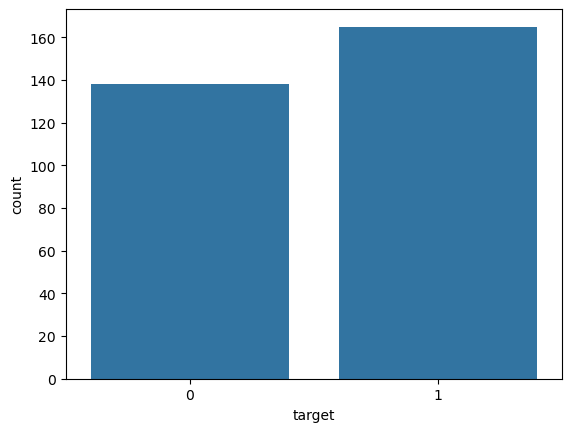

In [7]:
#2. Data Visualization:
#a. Visualize the number of patients having a heart disease and not having
#a heart disease
plt.figure()
sns.countplot(data=df,x='target')
plt.show()

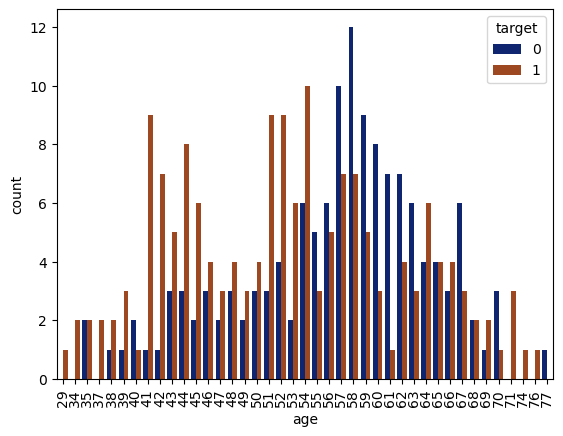

In [13]:
#b. Visualize the age and whether a patient has disease or not
plt.figure()
sns.countplot(data=df,x='age',hue='target',palette='dark')
plt.xticks(rotation=90)
plt.show()

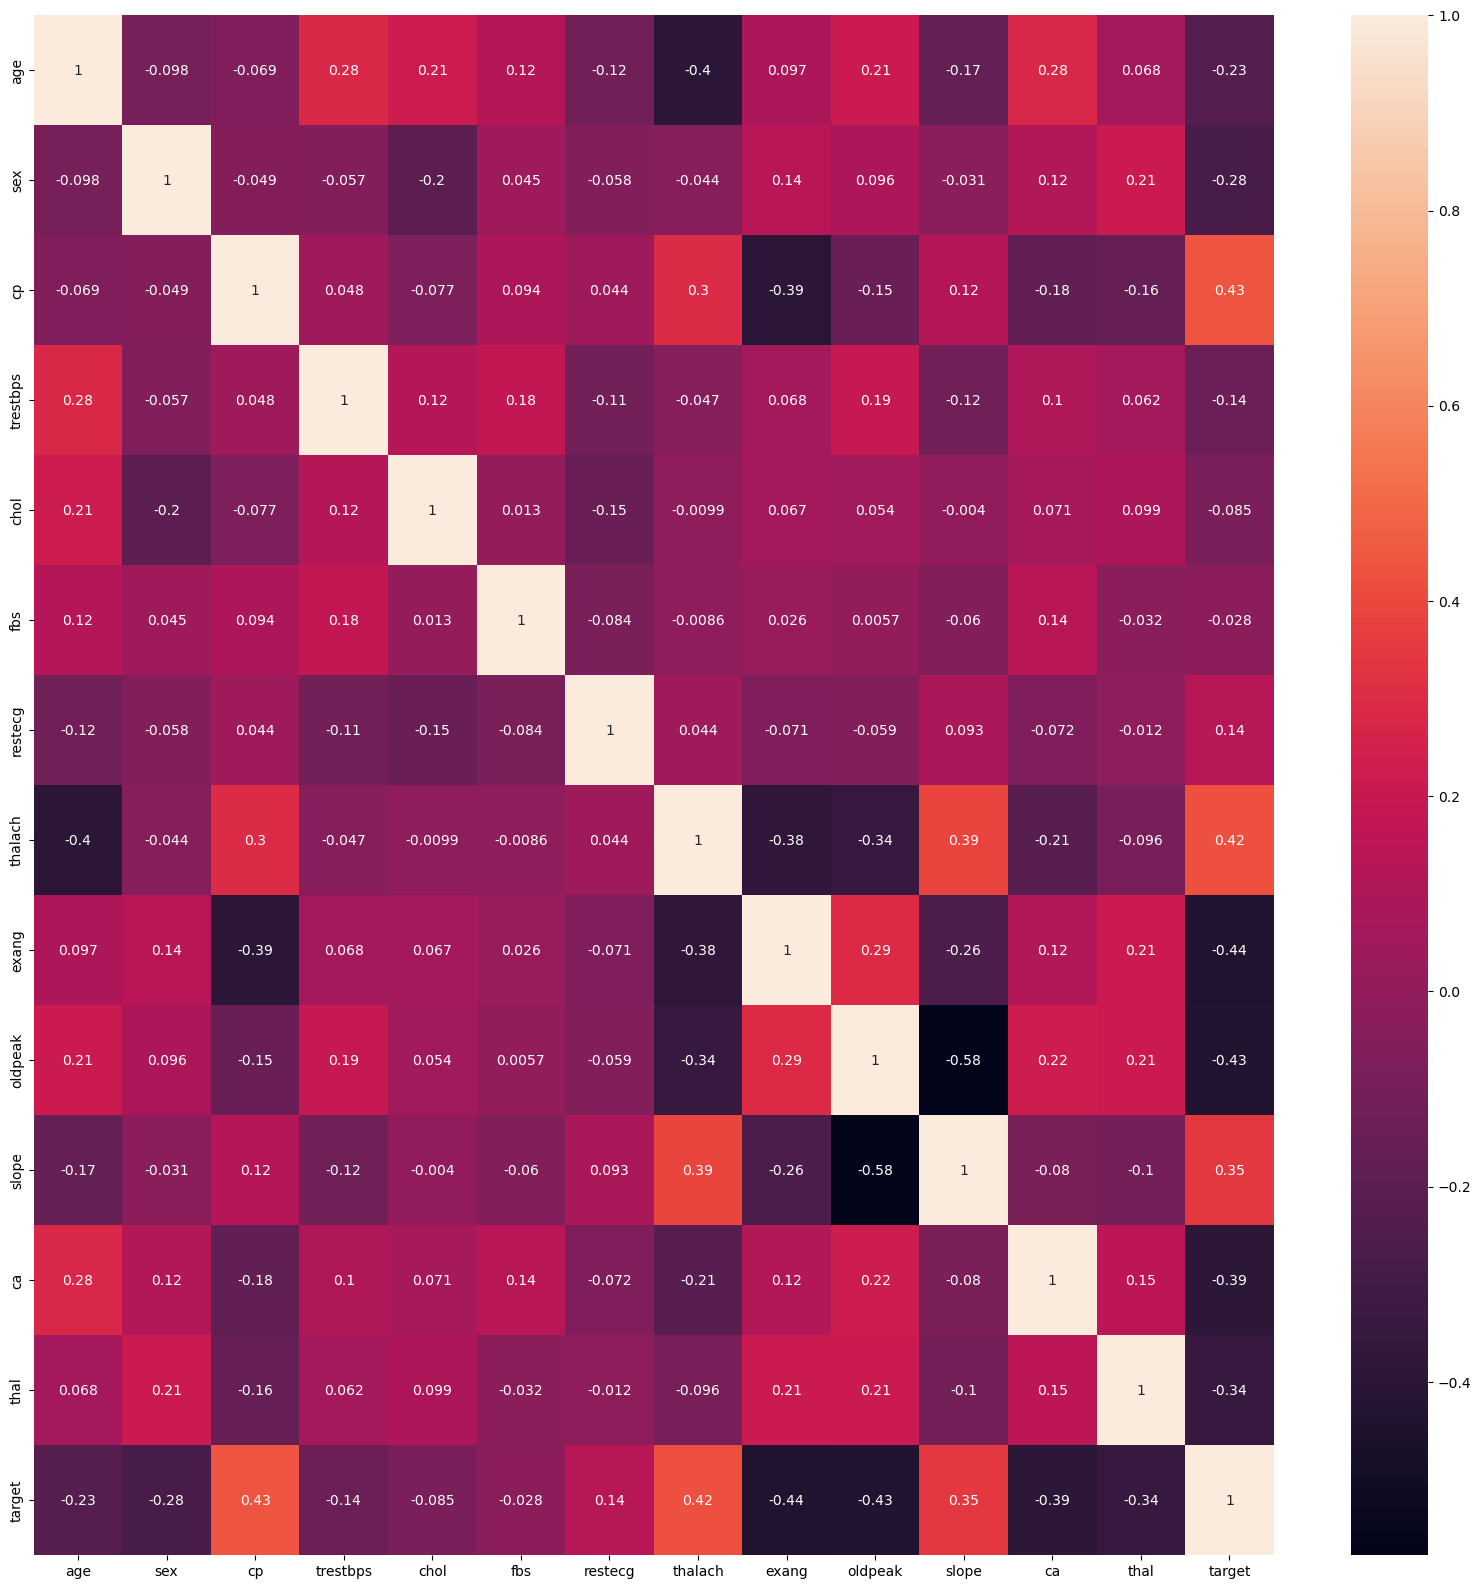

In [15]:
#c. Visualize correlation between all features using a heat map
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True)
plt.show()


In [36]:
#3. Logistic Regression:
#a. Build a simple logistic regression model:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in df.columns:
  if i!='target':
    df[[i]]=sc.fit_transform(df[[i]])
#i. Divide the dataset in 70:30 ratio
x=df.drop(columns=['target'])
y=df['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
#ii. Build the model on train set and predict the values on test set
logr.fit(xtrain,ytrain)
logr_pred=logr.predict(xtest)
#iii. Build the confusion matrix and get the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
logr_con=confusion_matrix(ytest,logr_pred)
logr_acc=accuracy_score(ytest,logr_pred)
print("acc:",logr_acc,"log_con:",logr_con)
with open("log_reg_model.pkl", "wb") as file:
    pickle.dump(logr, file)

acc: 0.8131868131868132 log_con: [[32  9]
 [ 8 42]]


In [20]:
!pip install graphviz

best params: {'criterion': 'gini', 'max_leaf_nodes': 150} dt score: 0.7738430583501006
acc: 0.7142857142857143 dt_con: [[33  8]
 [18 32]]


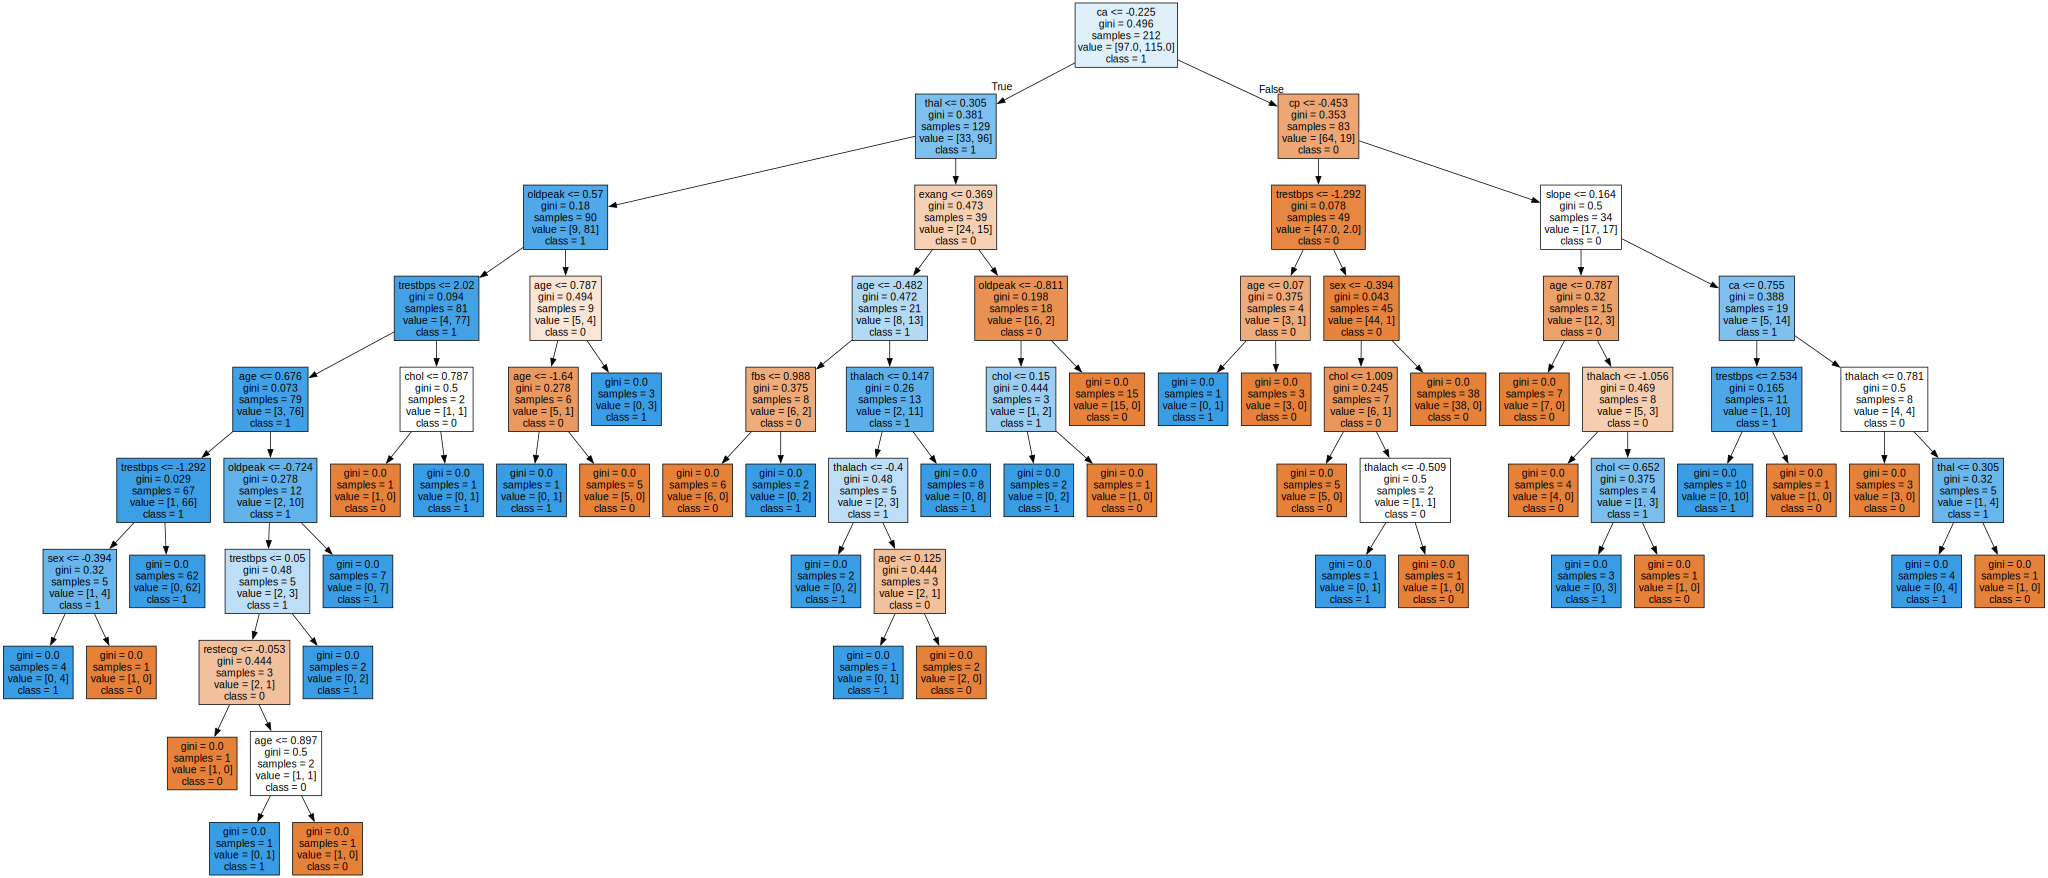

In [32]:
#4. Decision Tree:
#a. Build a decision tree model:
#i. Divide the dataset in 70:30 ratio
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
#ii. Build the model on train set and predict the values on test set
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
parameters={'criterion':['gini','entropy'],'max_leaf_nodes':[None,50,150,200,250,400]}
dt=DecisionTreeClassifier()
dt_cv=GridSearchCV(estimator=dt,param_grid=parameters,cv=3)
dt_cv.fit(xtrain,ytrain)
dt=dt_cv.best_estimator_
print("best params:",dt_cv.best_params_,"dt score:",dt_cv.best_score_)
dt_pred=dt_cv.predict(xtest)
#iii. Build the confusion matrix and calculate the accuracy
dt_con=confusion_matrix(ytest,dt_pred)
dt_acc=accuracy_score(ytest,dt_pred)
print("acc:",dt_acc,"dt_con:",dt_con)
#iv. Visualize the decision tree using the Graphviz package
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source
graph=Source(tree.export_graphviz(dt,out_file=None,filled=True,feature_names=xtrain.columns,class_names=['0','1']))
display(SVG(graph.pipe(format='svg')))
with open("decision_tree_model.pkl", "wb") as file:
    pickle.dump(dt, file)

In [30]:
#5. Random Forest:
#a. Build a Random Forest model:
#i. Divide the dataset in 70:30 ratio
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
#ii. Build the model on train set and predict the values on test set
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_leaf_nodes':[None,50,150,200,250,400],'n_estimators':[100,150]}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(estimator=rf,param_grid=parameters,cv=3)
rf_cv.fit(xtrain,ytrain)
rf=rf_cv.best_estimator_[0]
print("best params:",rf_cv.best_params_,"rf score:",rf_cv.best_score_)
rf_pred=rf_cv.predict(xtest)
#iii. Build the confusion matrix and calculate the accuracy
rf_con=confusion_matrix(ytest,rf_pred)
rf_acc=accuracy_score(ytest,rf_pred)
print("acc:",rf_acc,"dt_con:",rf_con)
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

best params: {'criterion': 'gini', 'max_leaf_nodes': 200, 'n_estimators': 100} rf score: 0.8255533199195172
acc: 0.8241758241758241 dt_con: [[33  8]
 [ 8 42]]


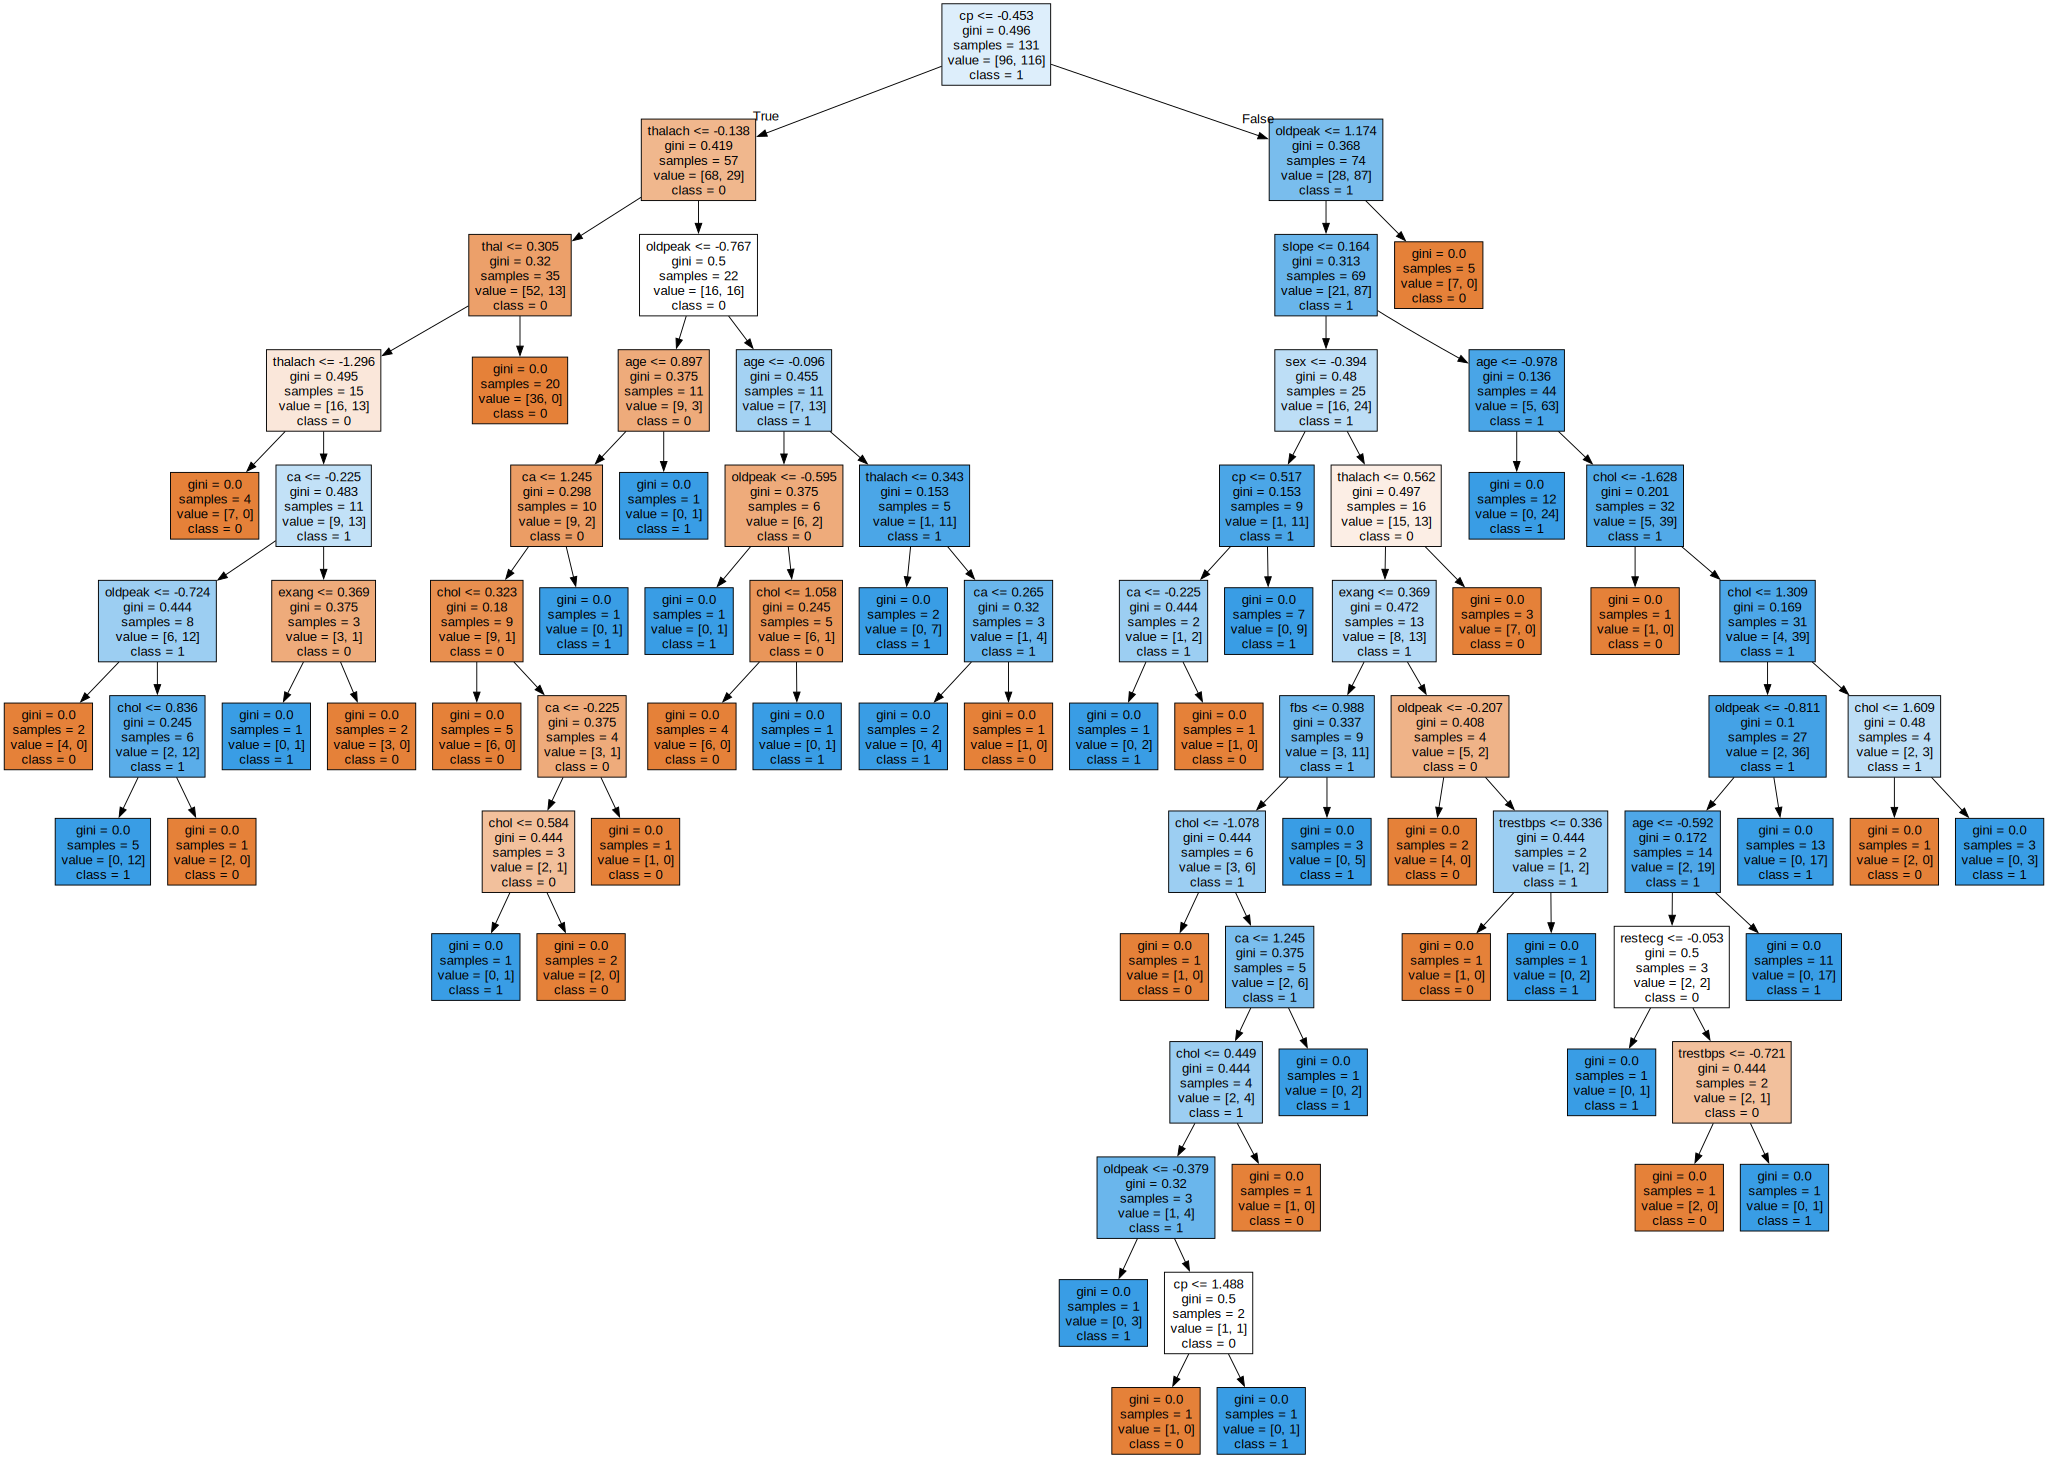

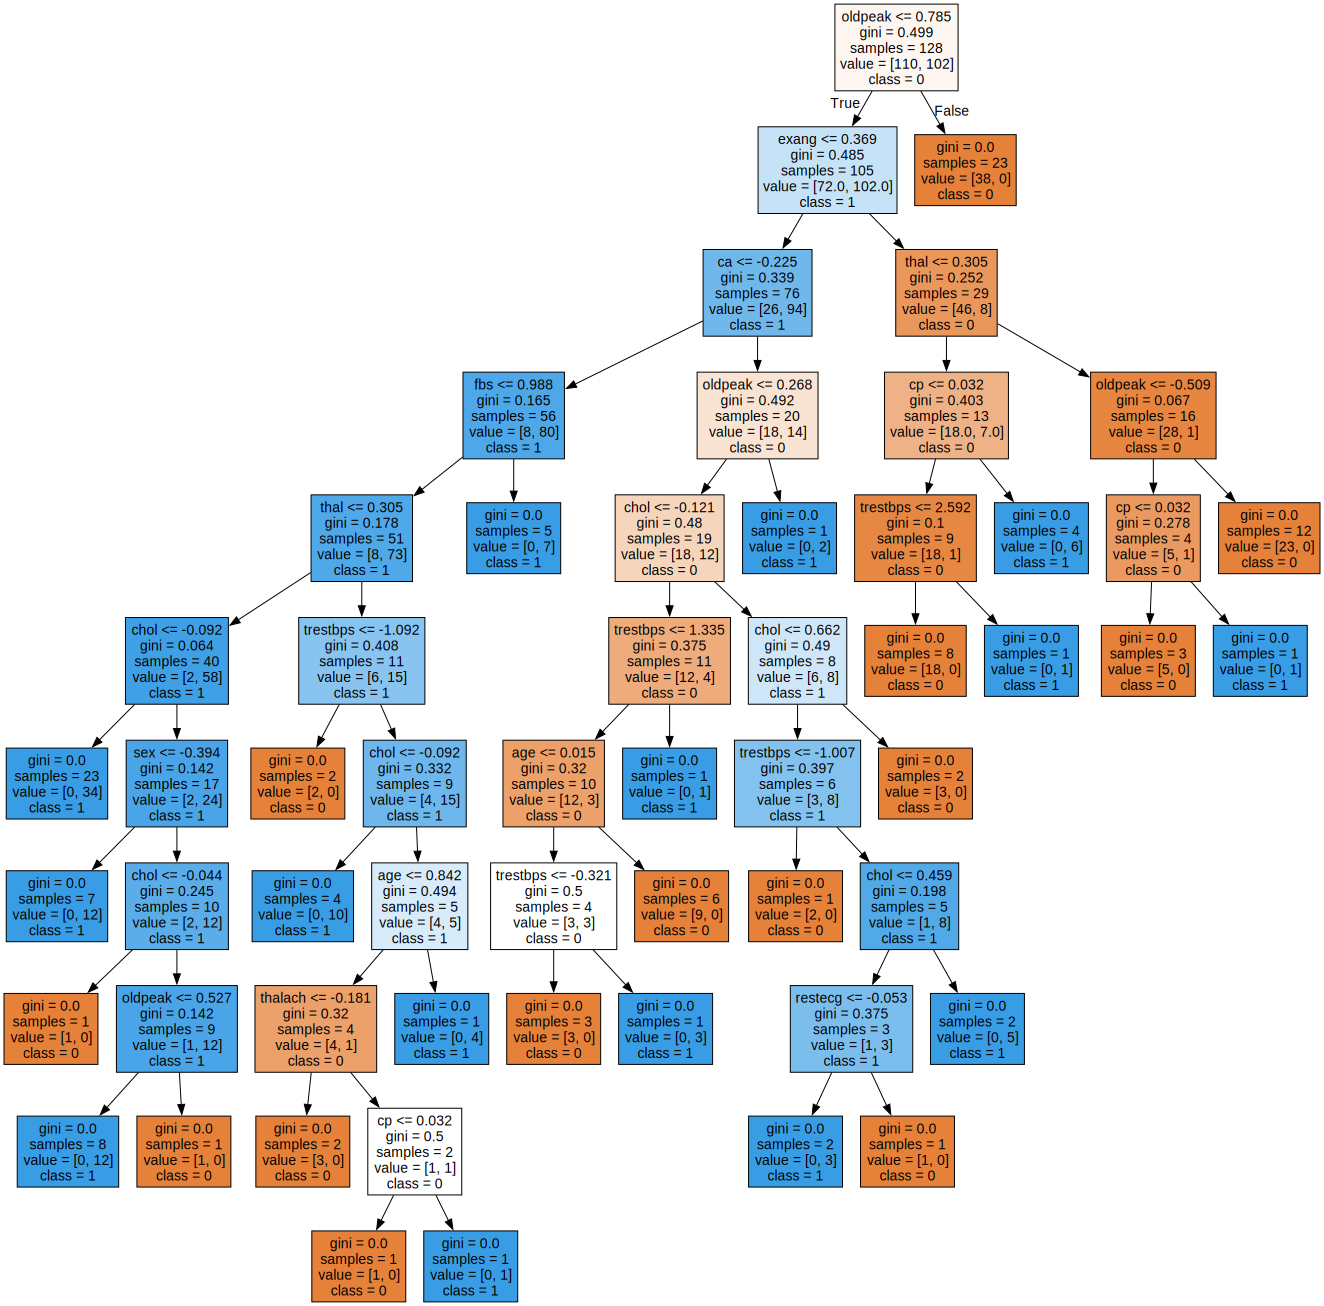

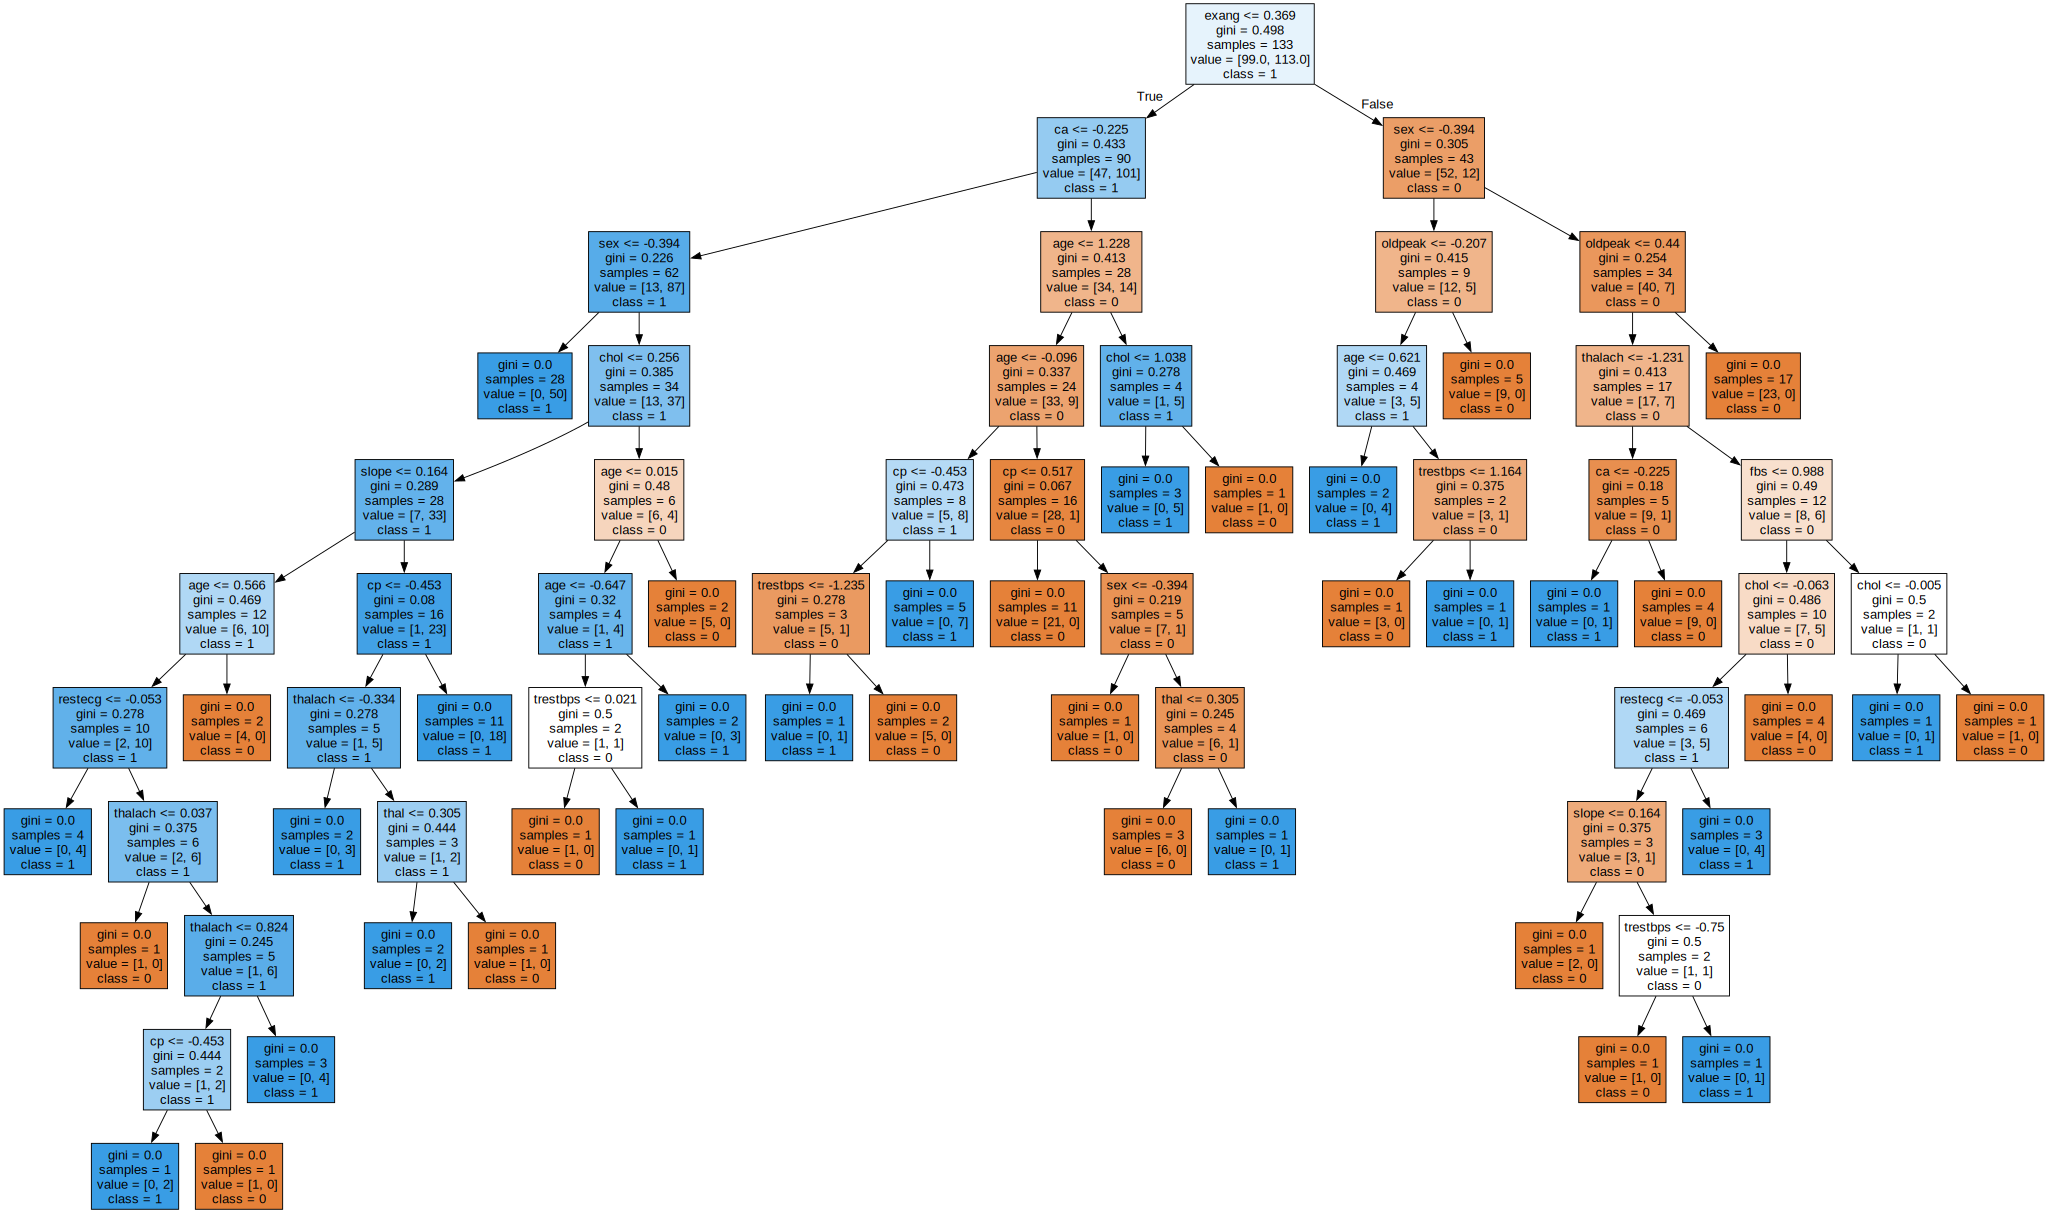

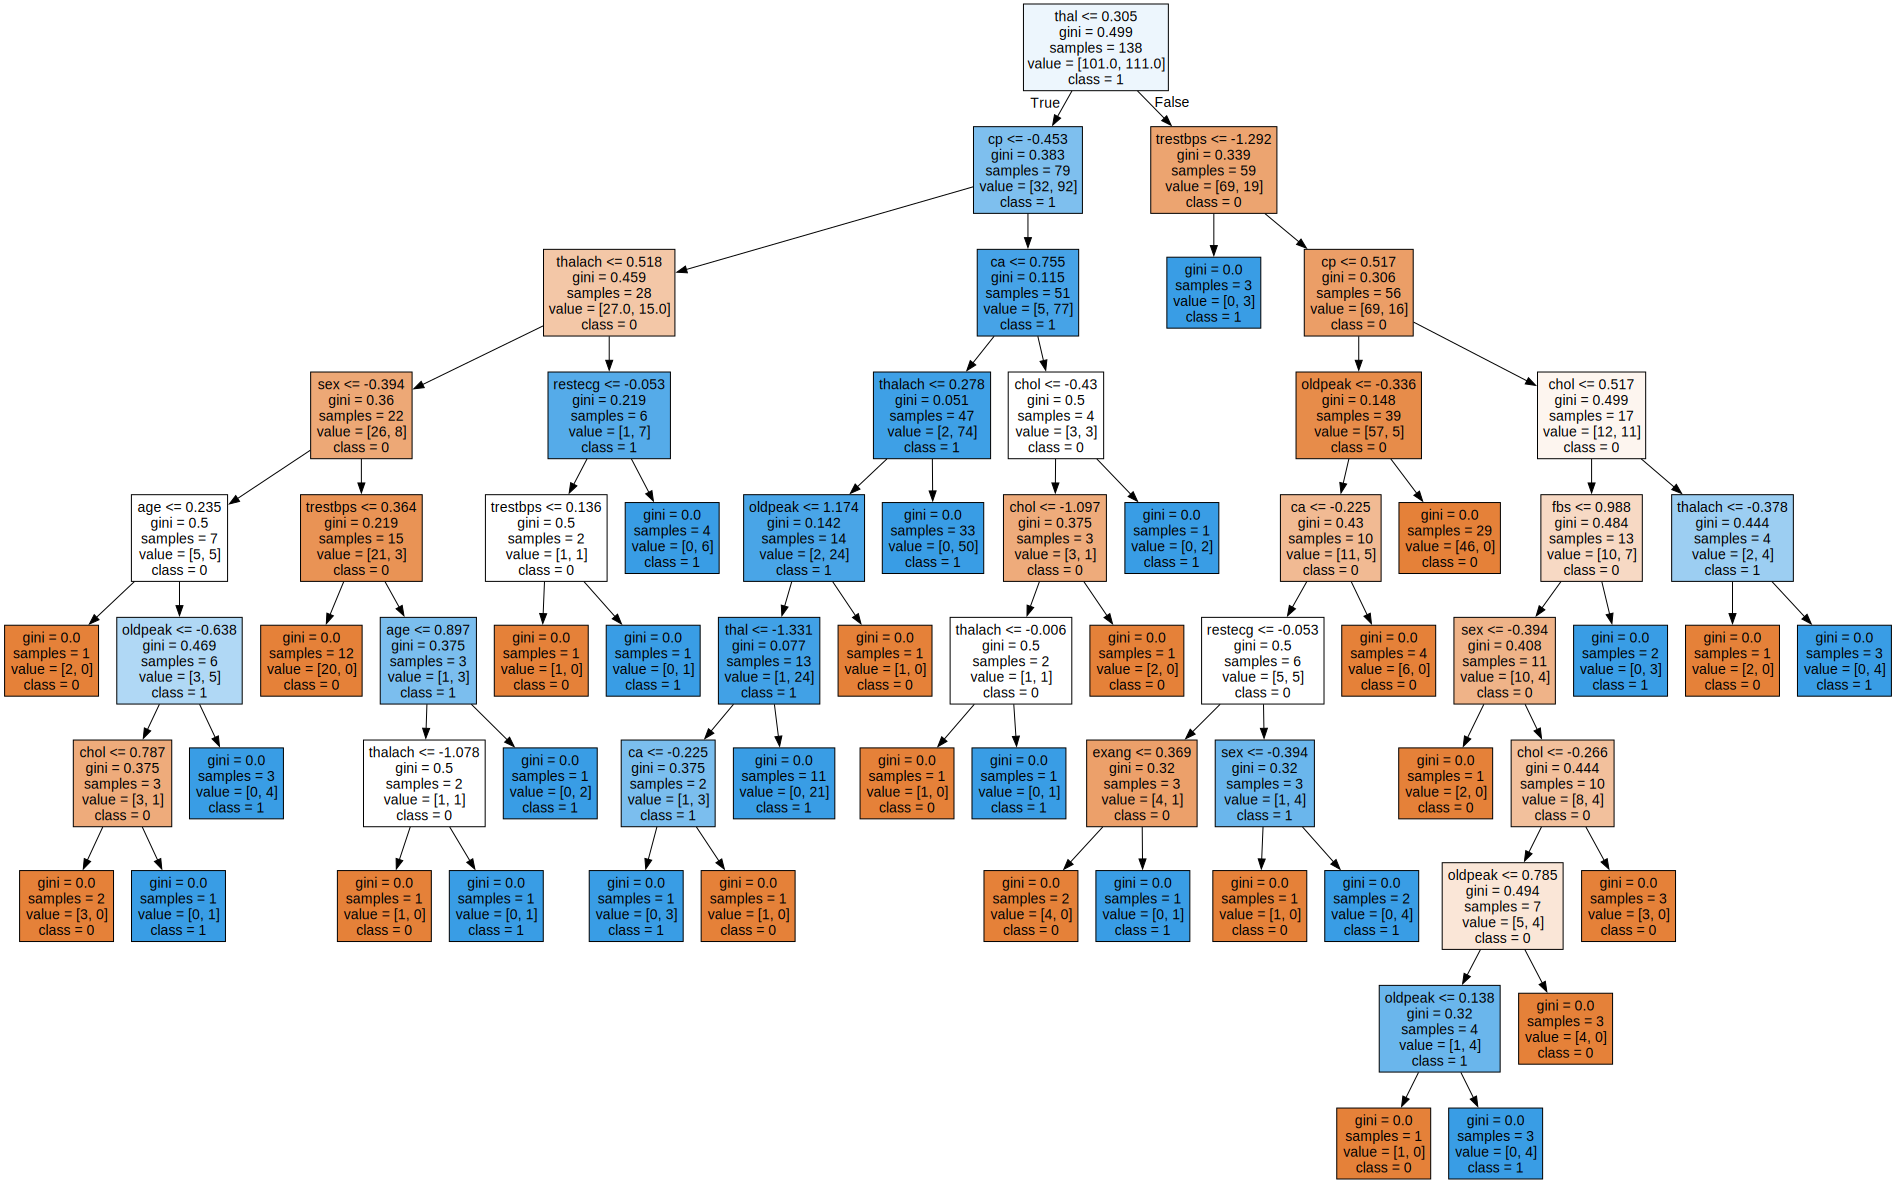

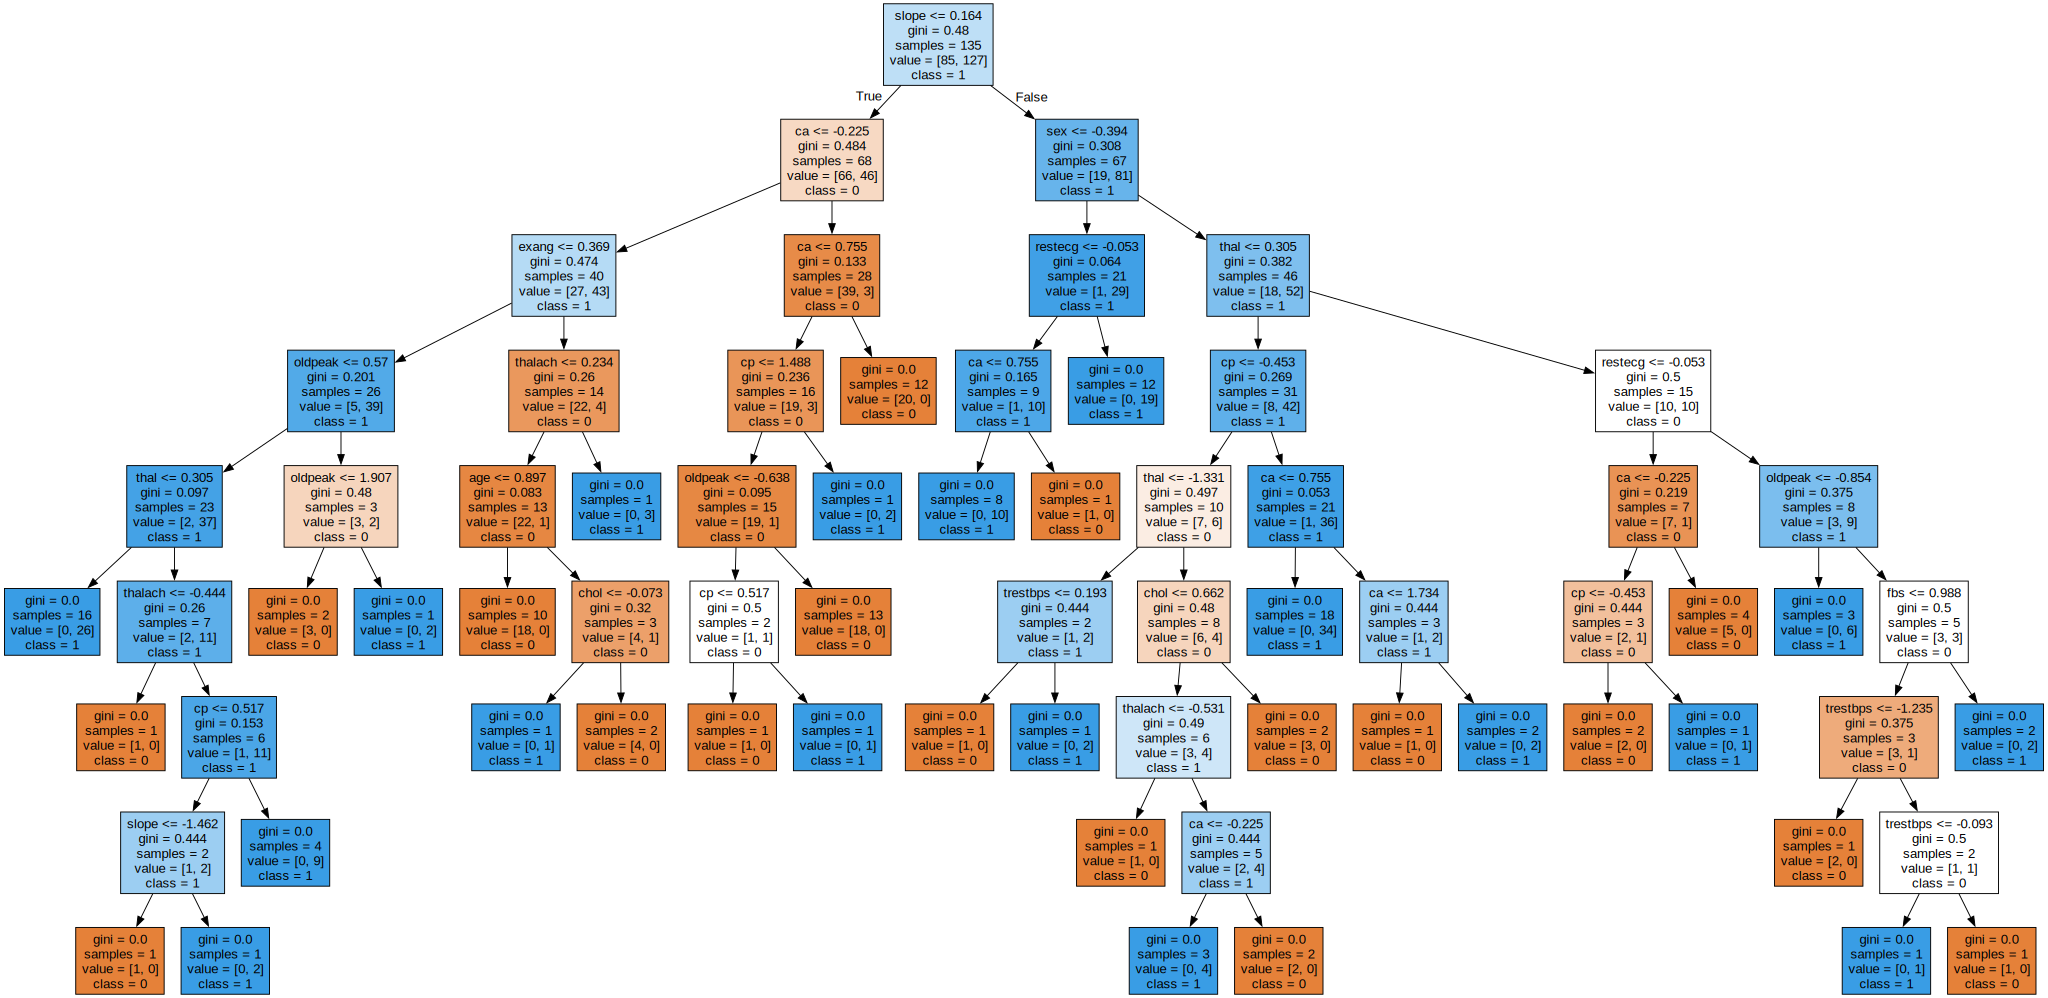

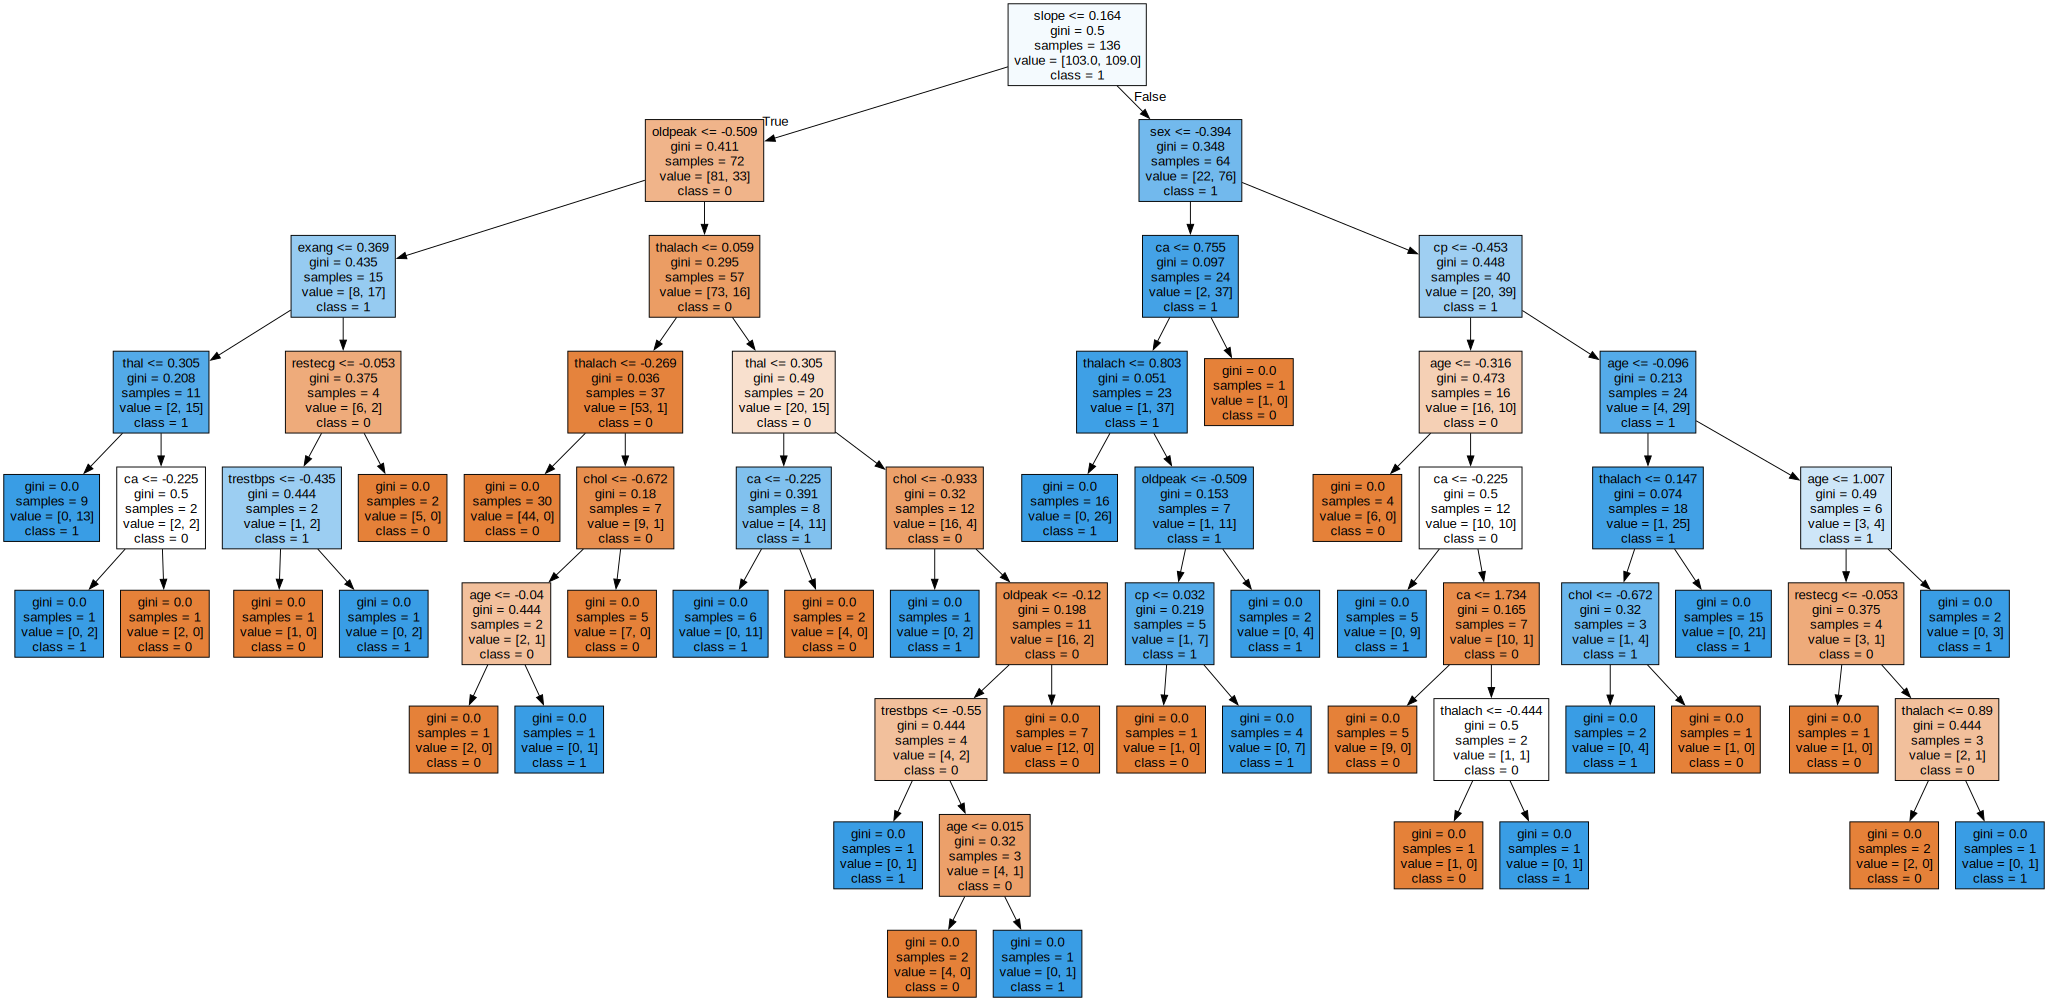

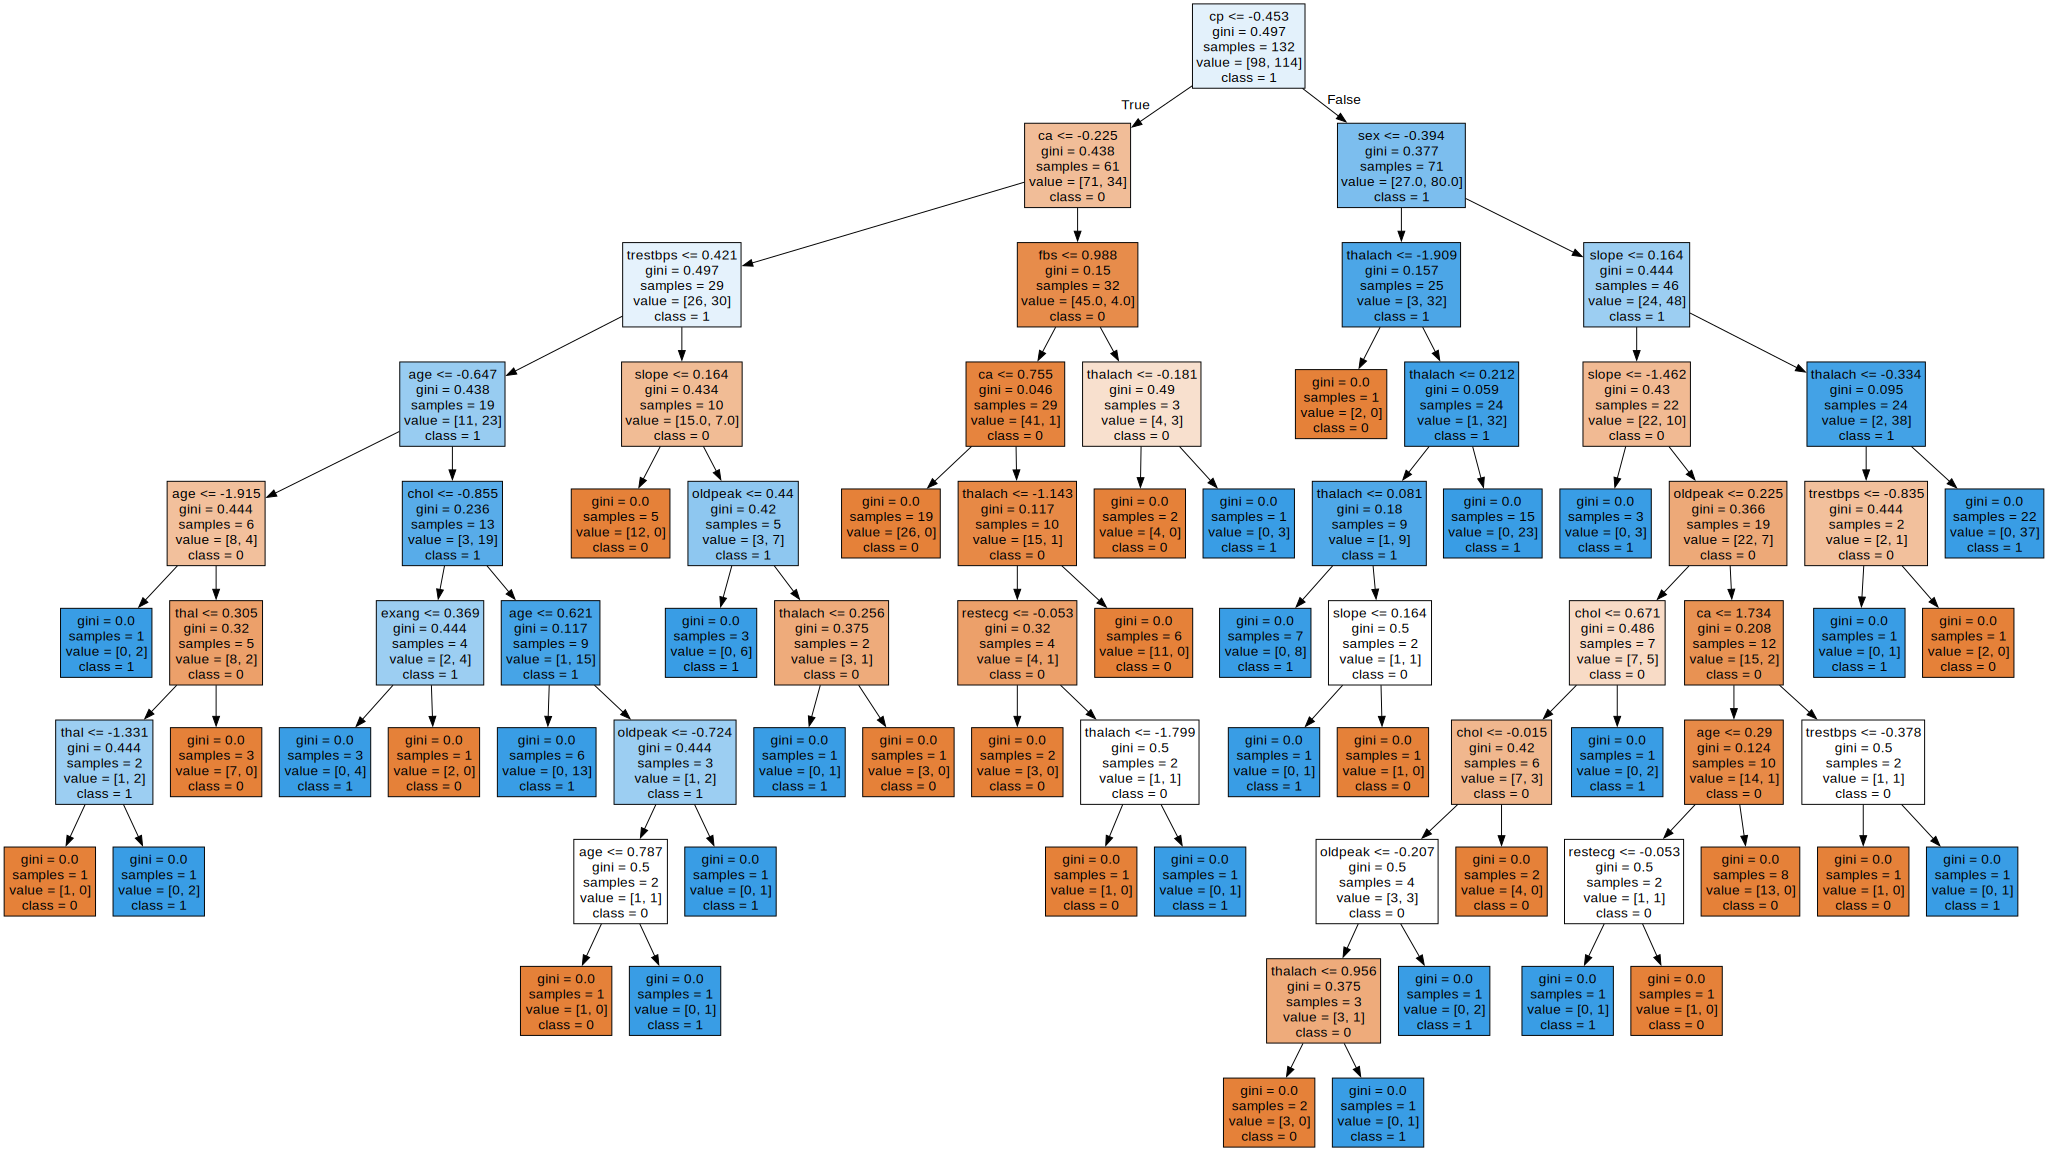

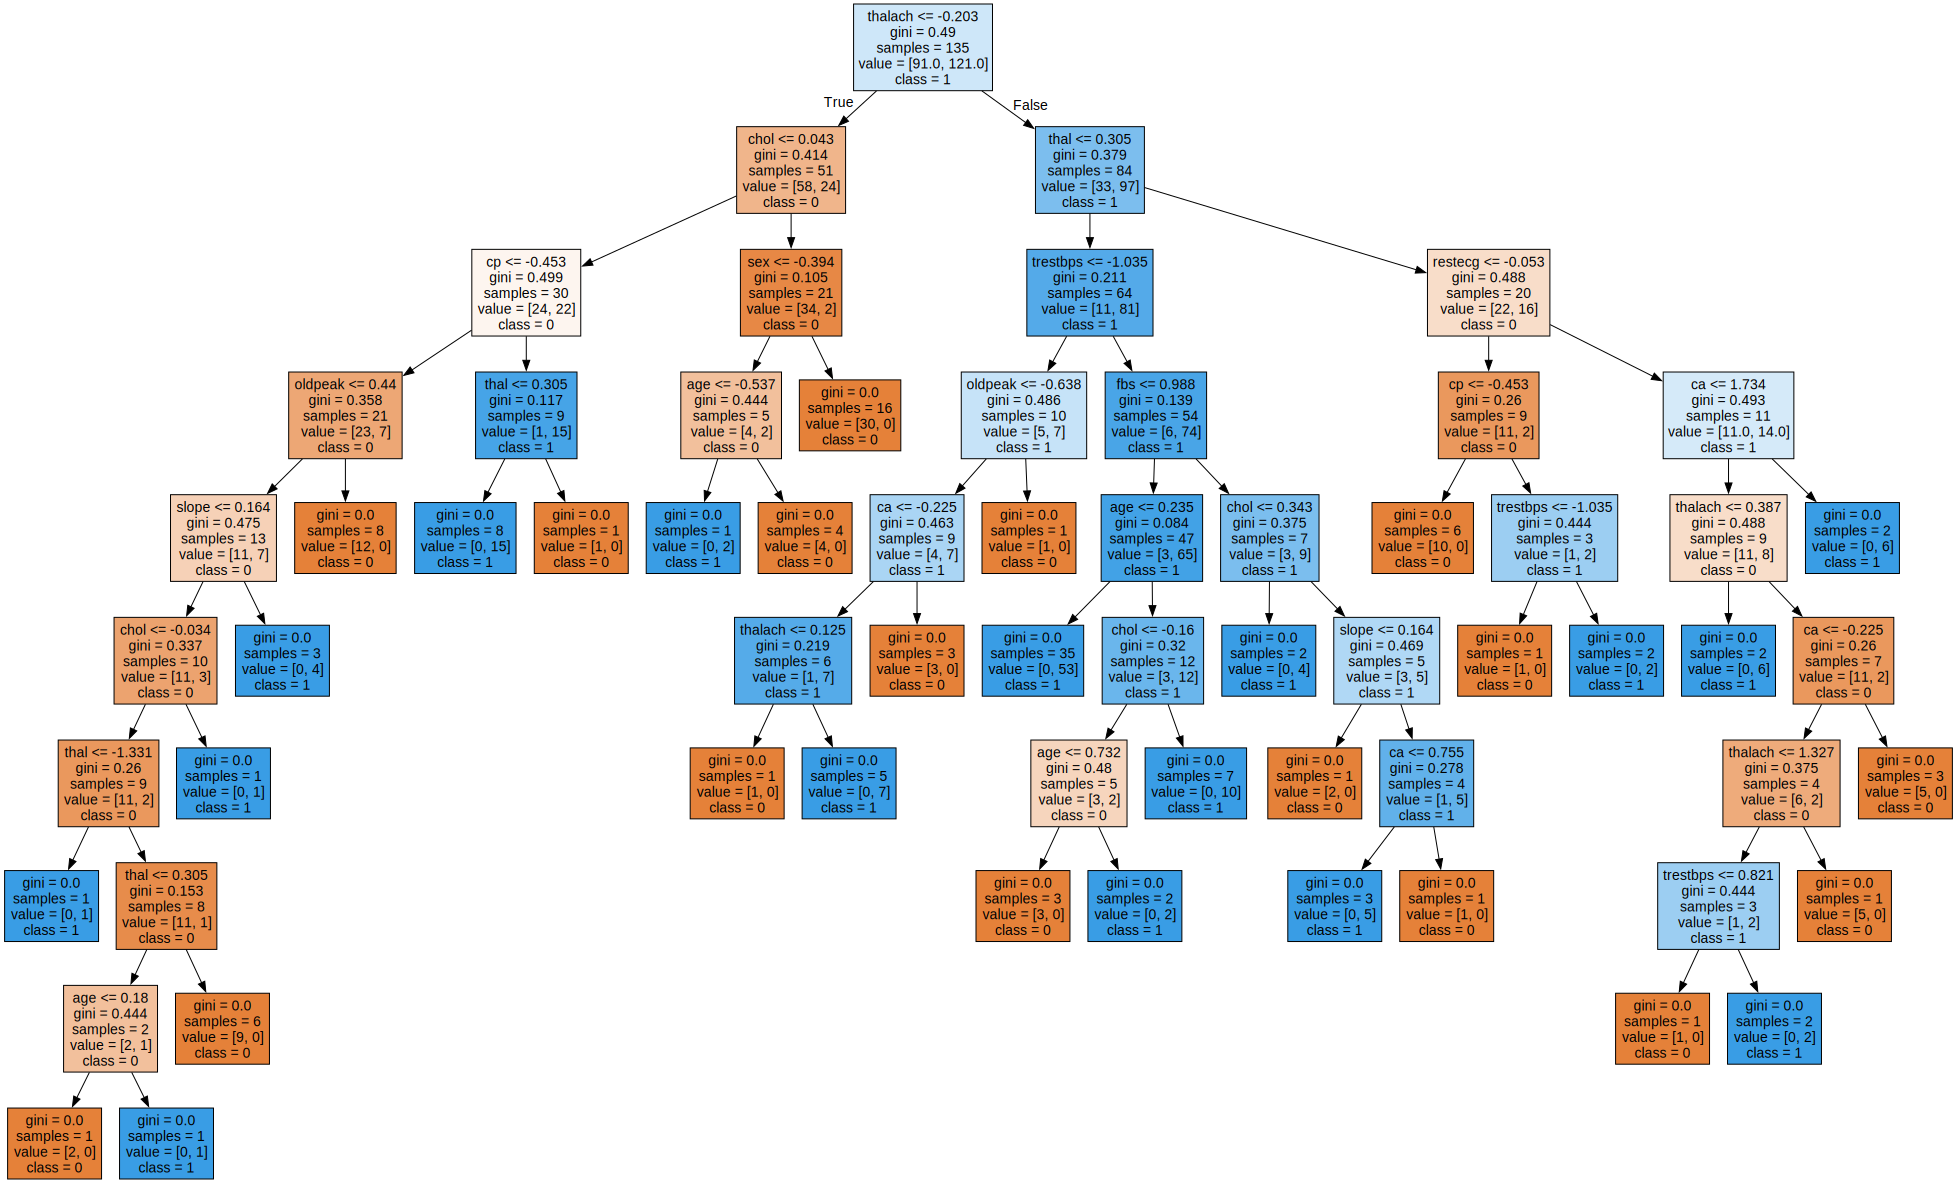

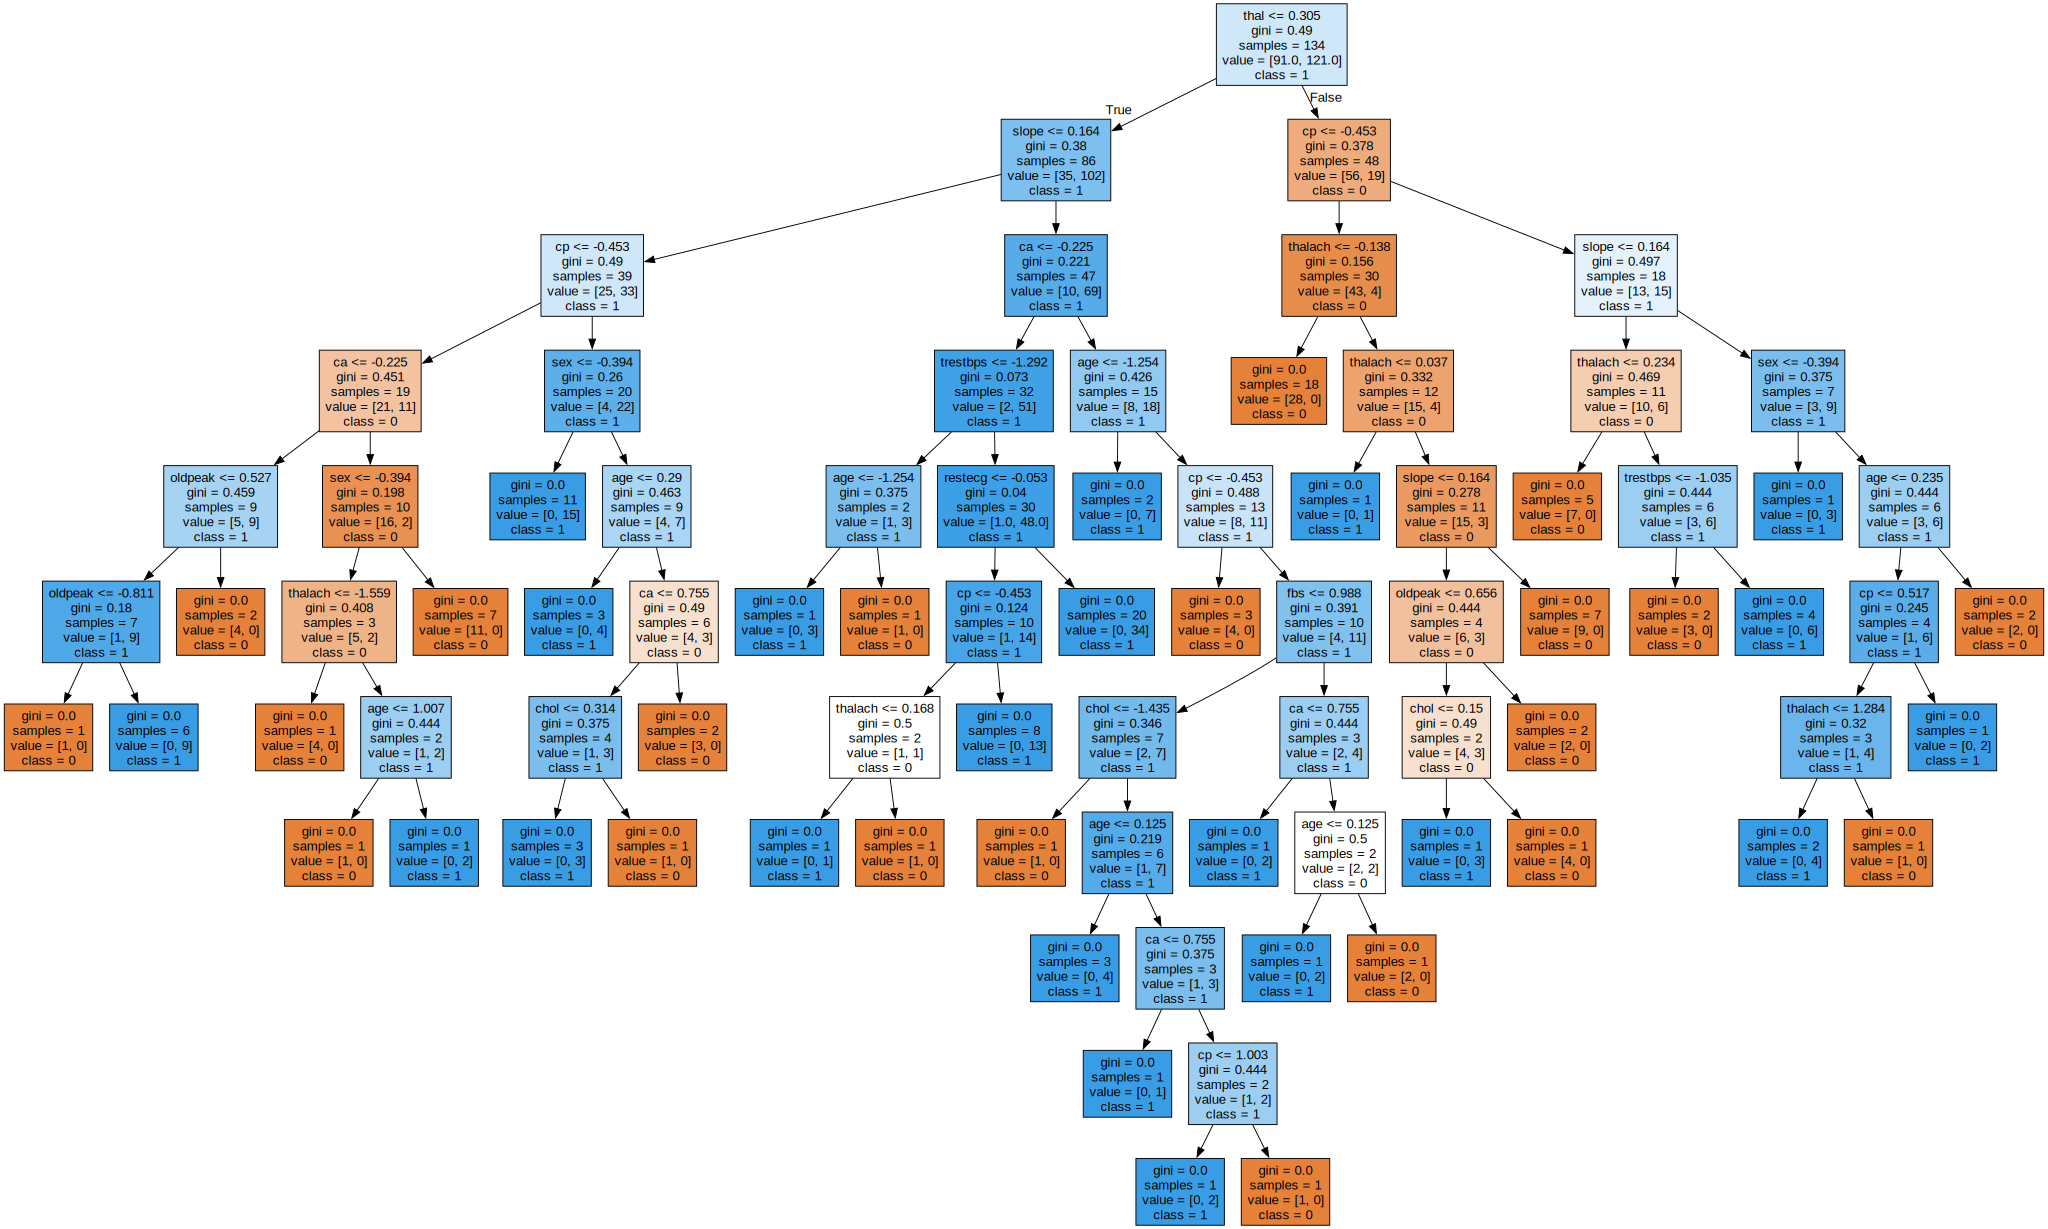

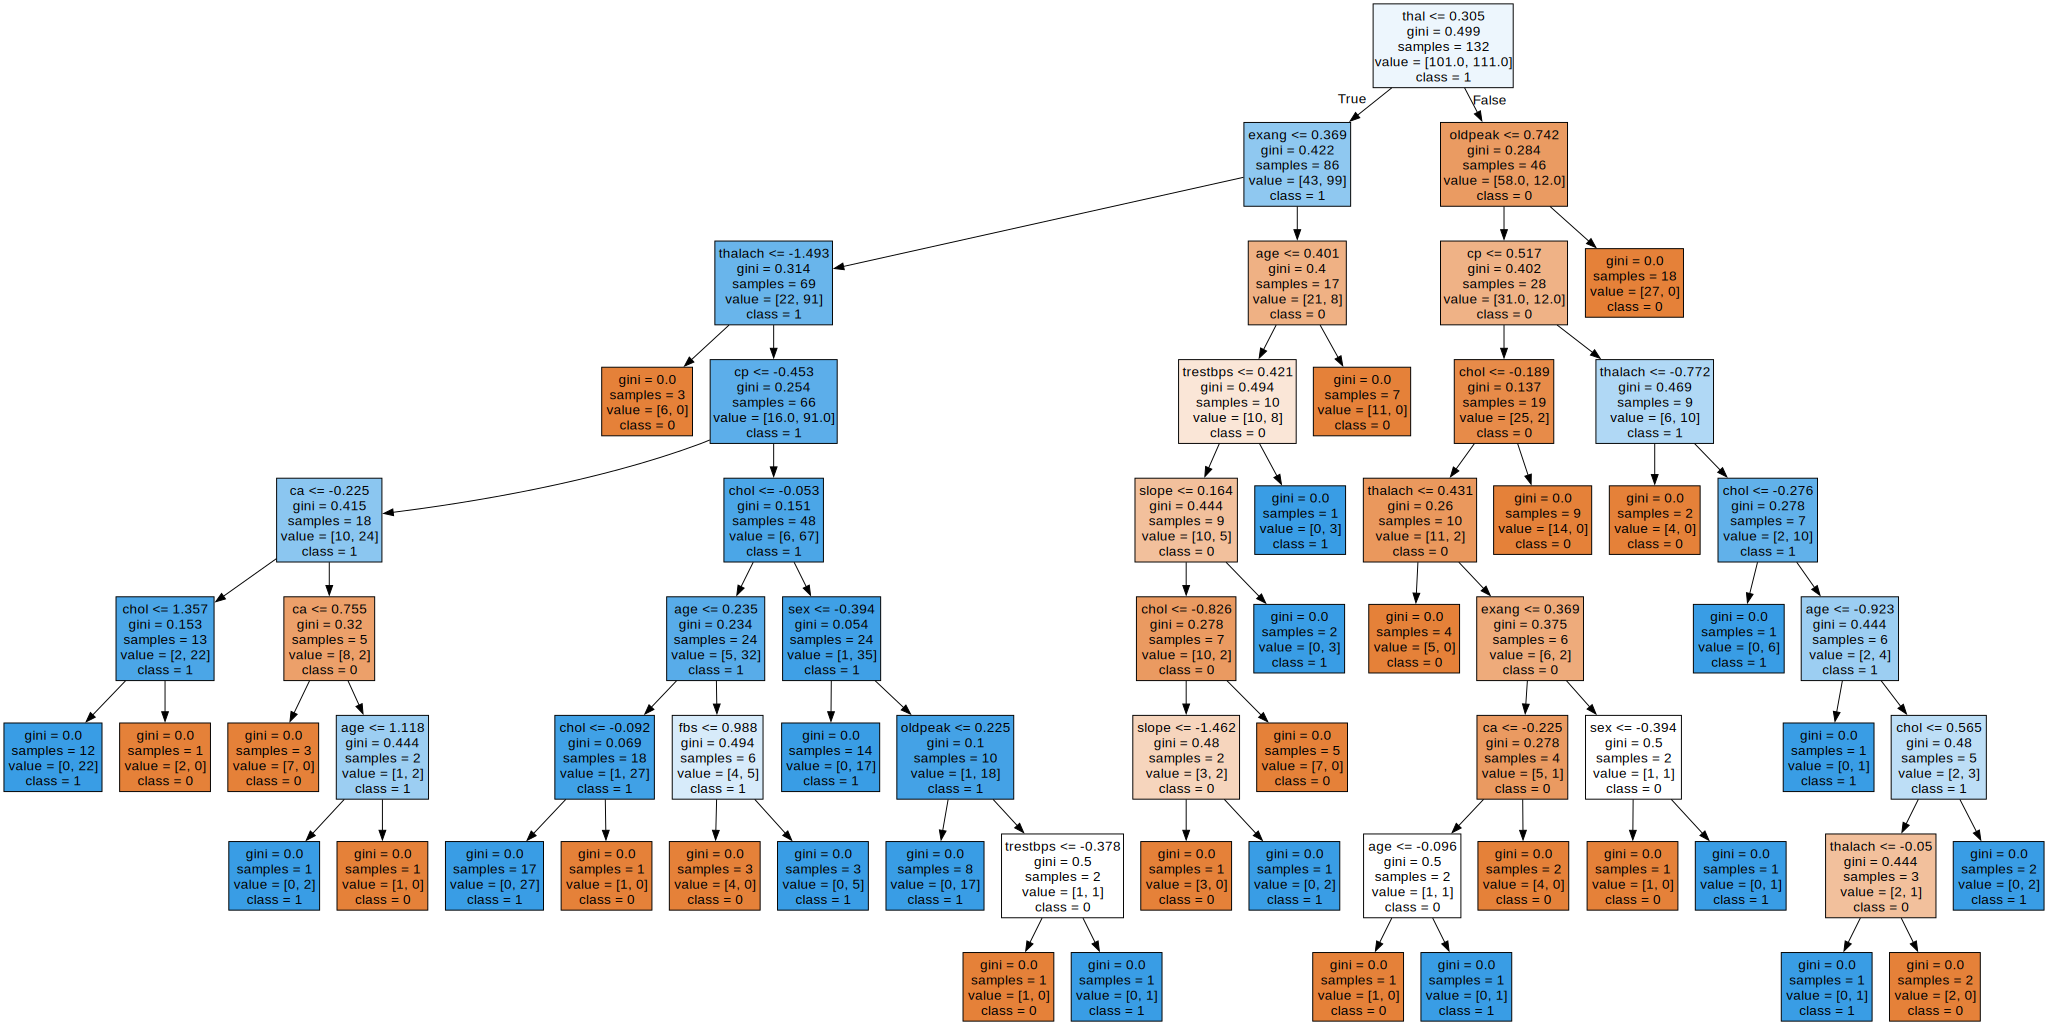

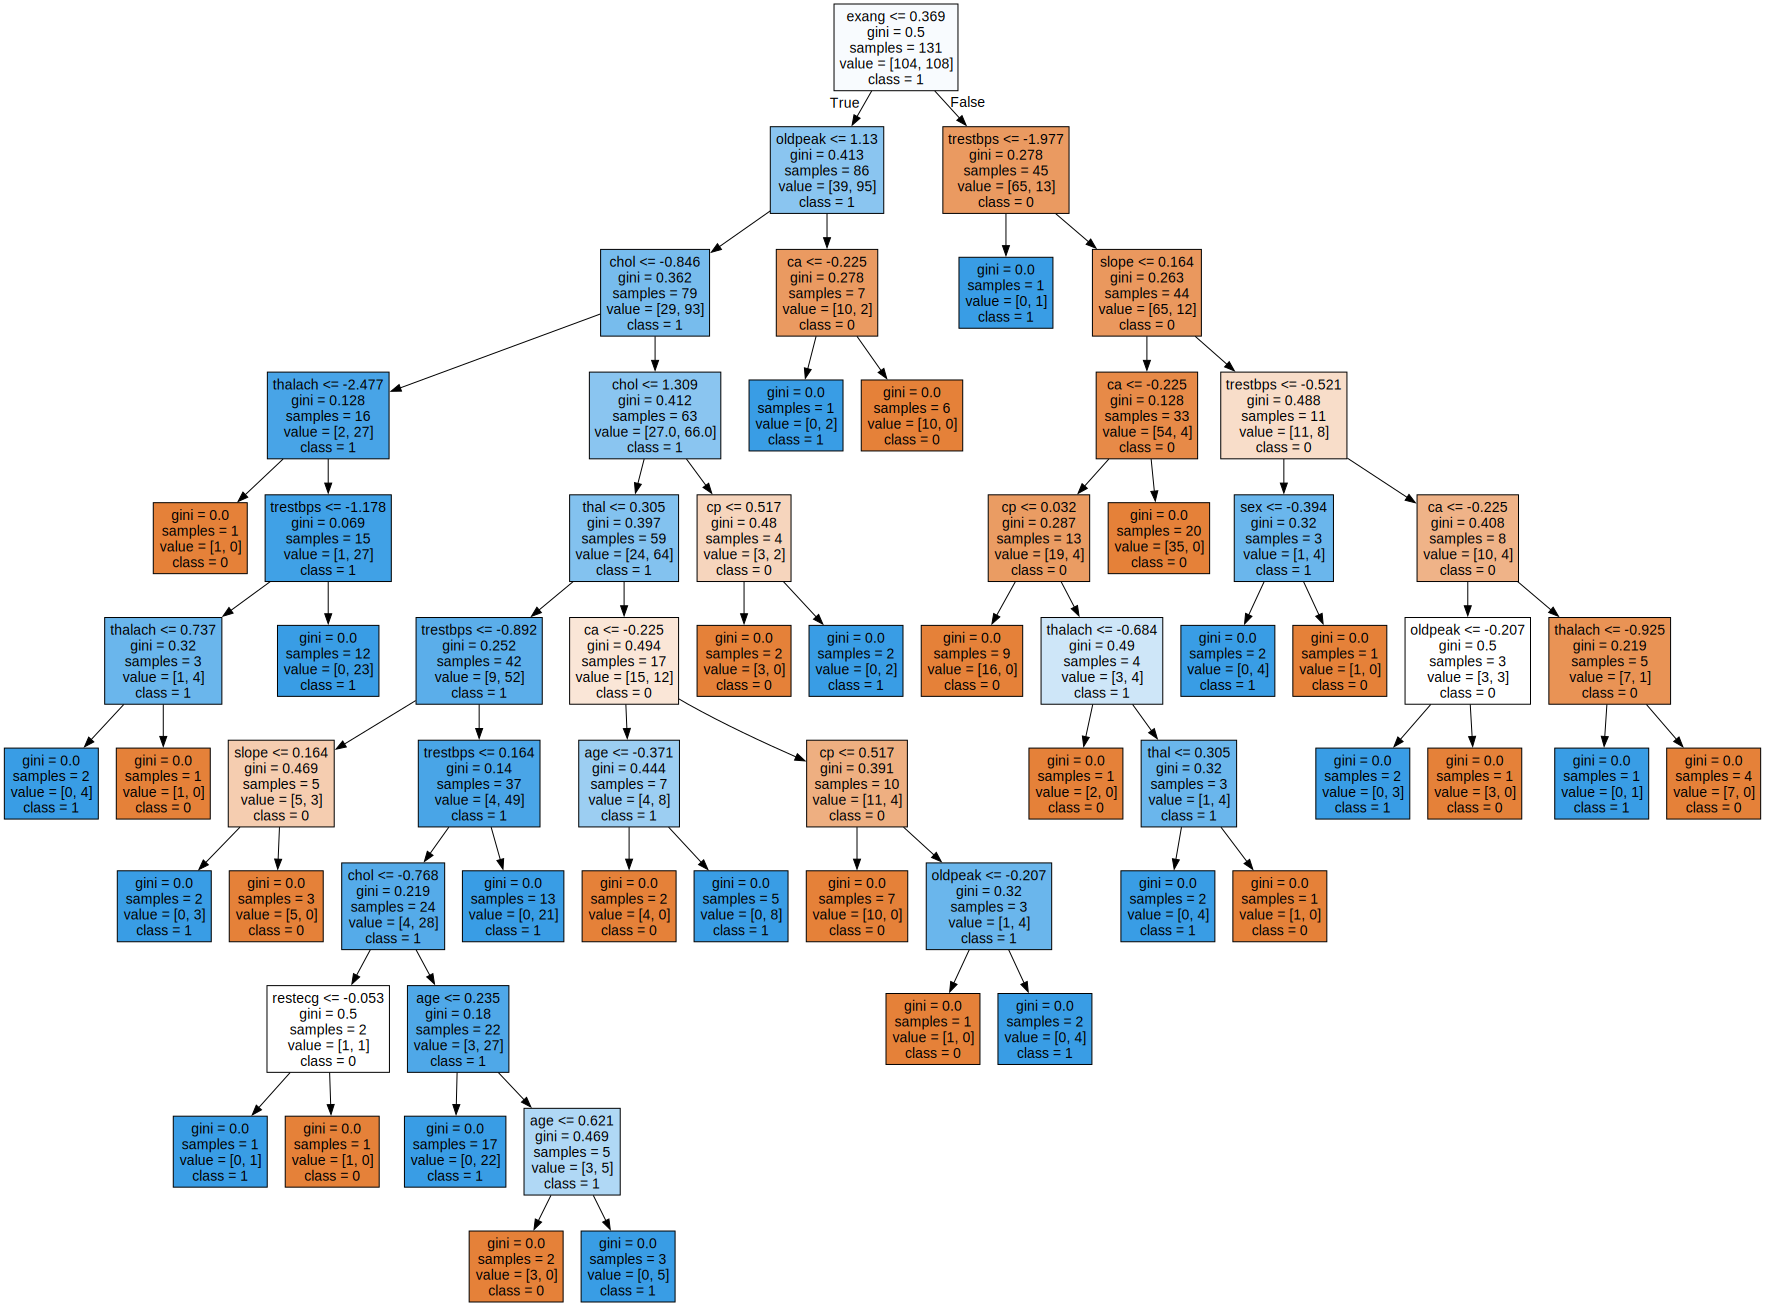

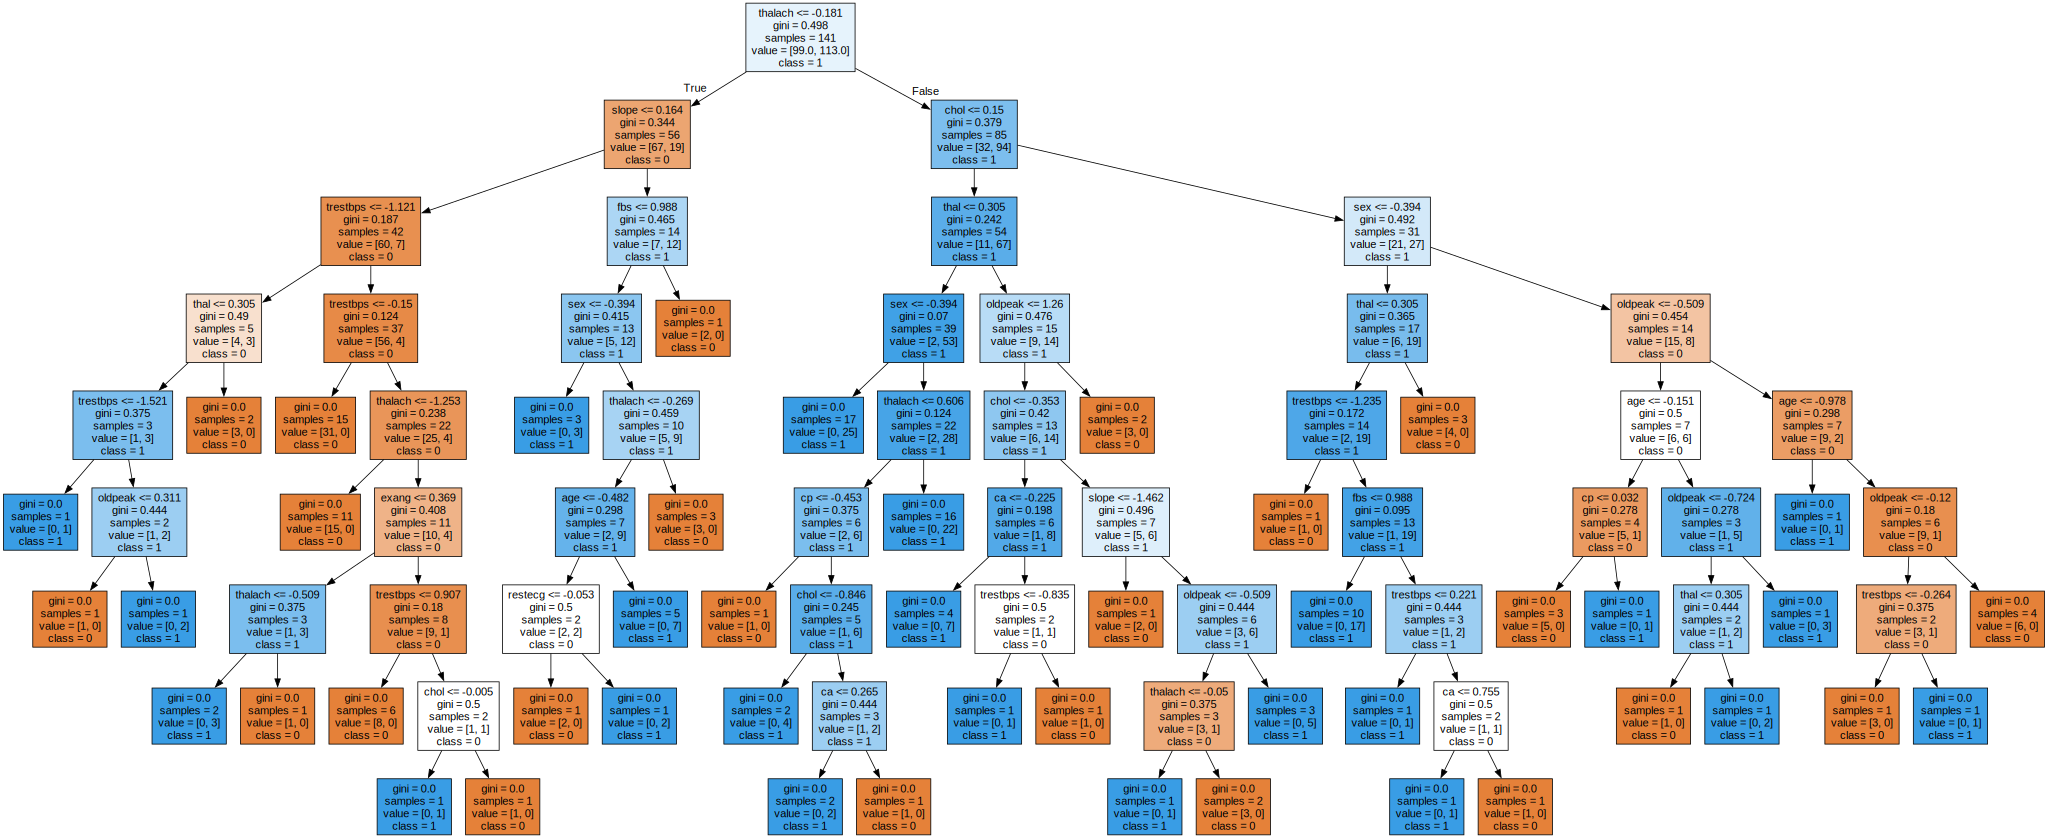

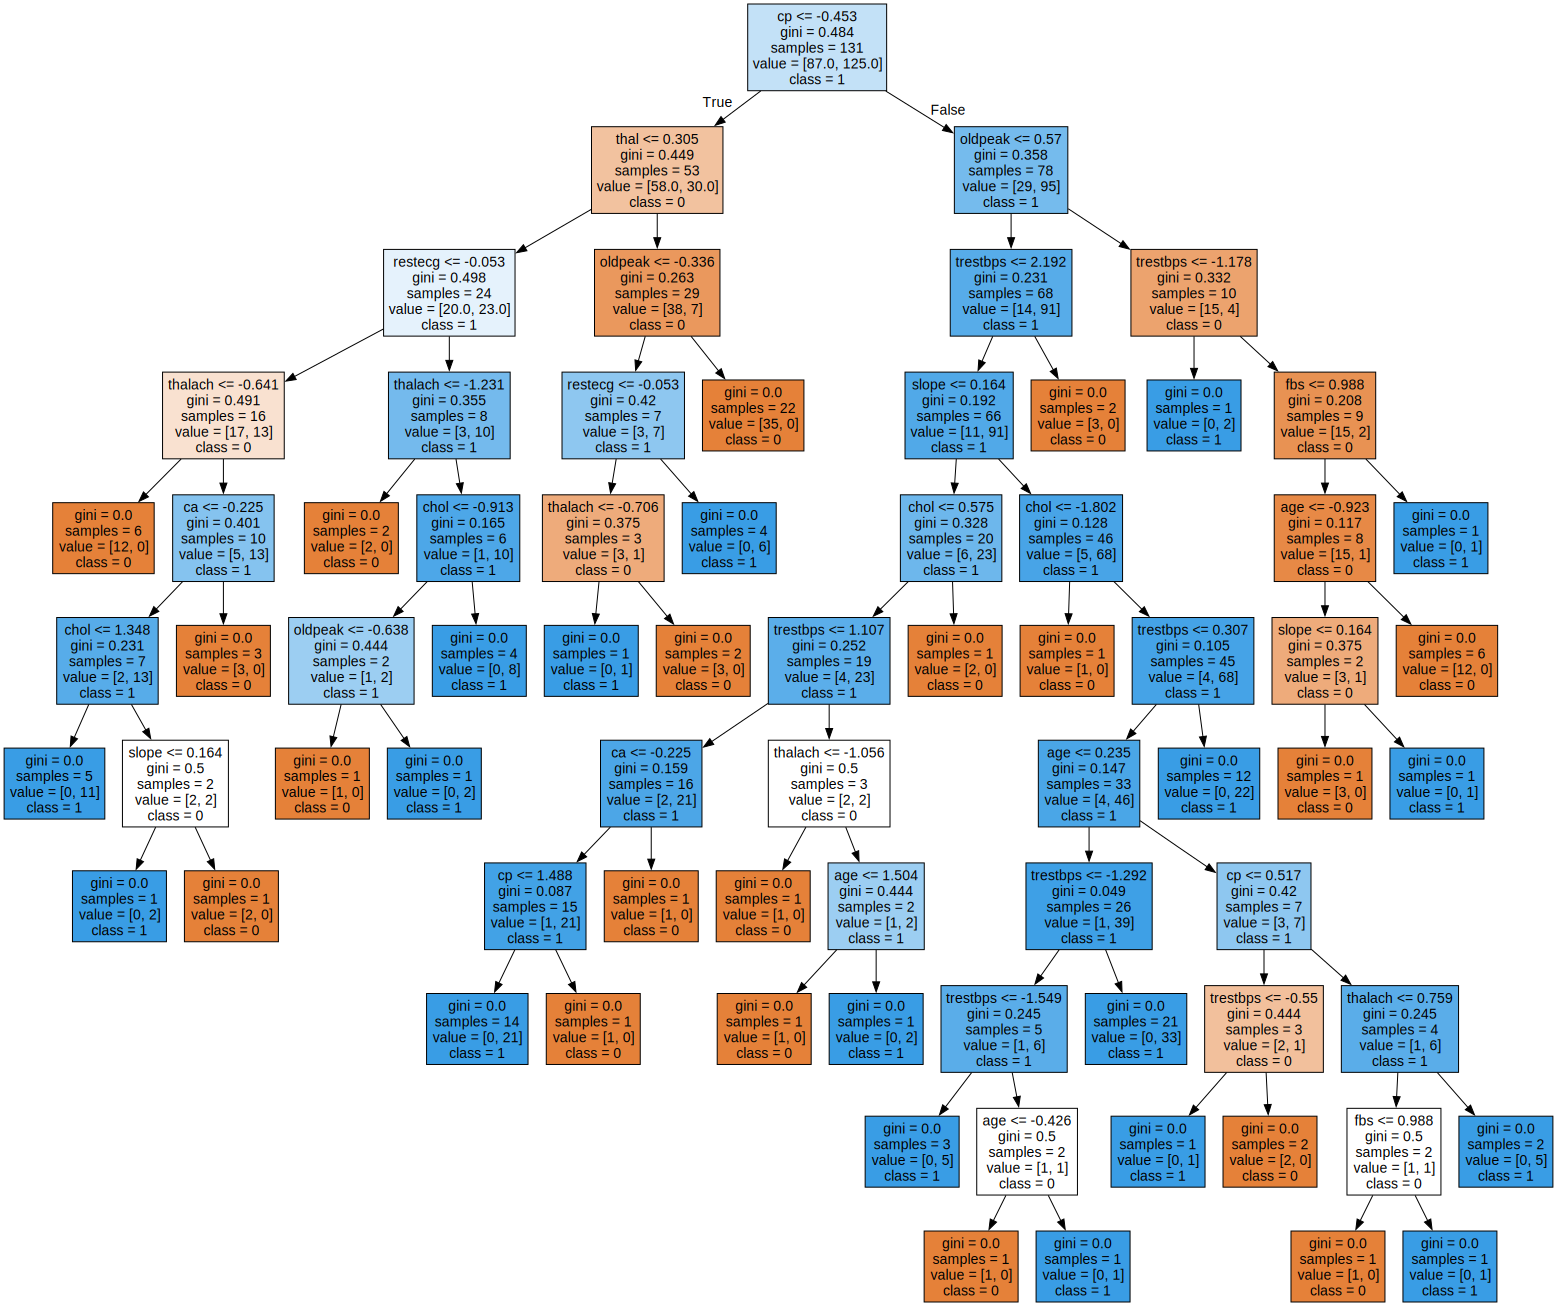

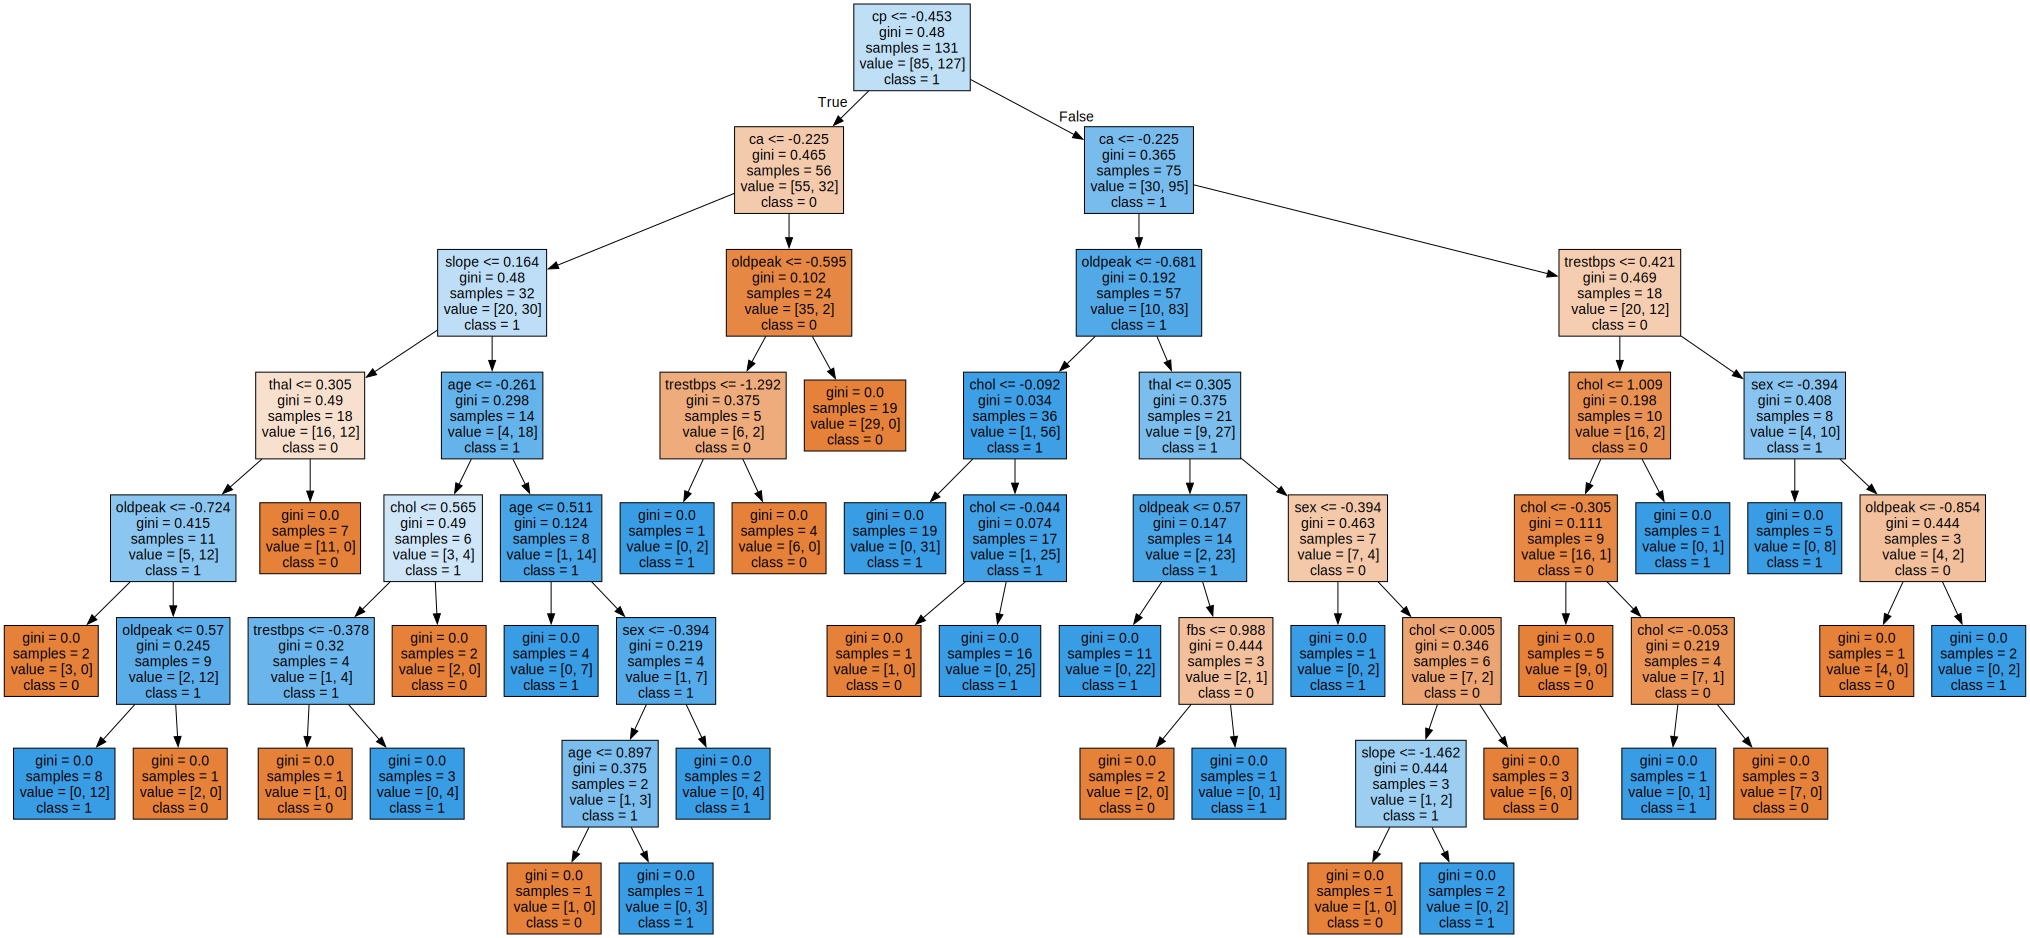

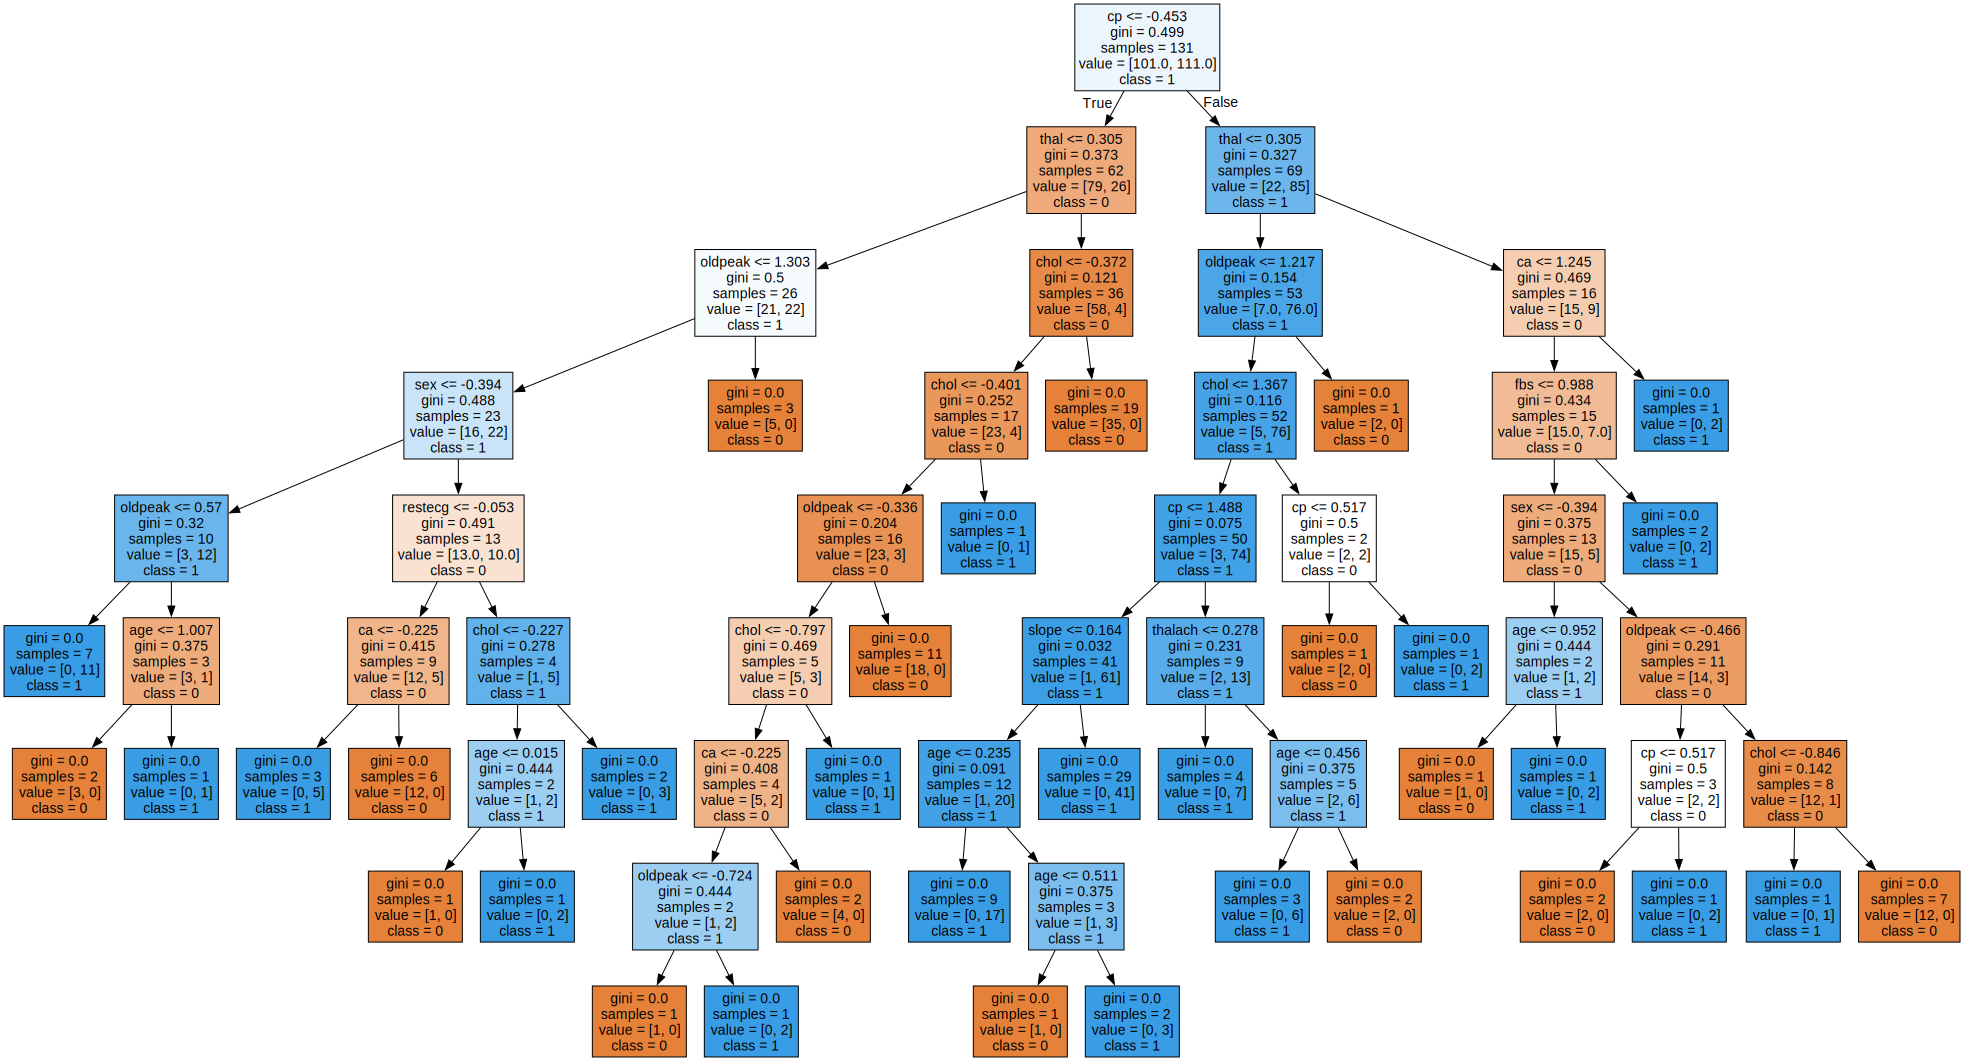

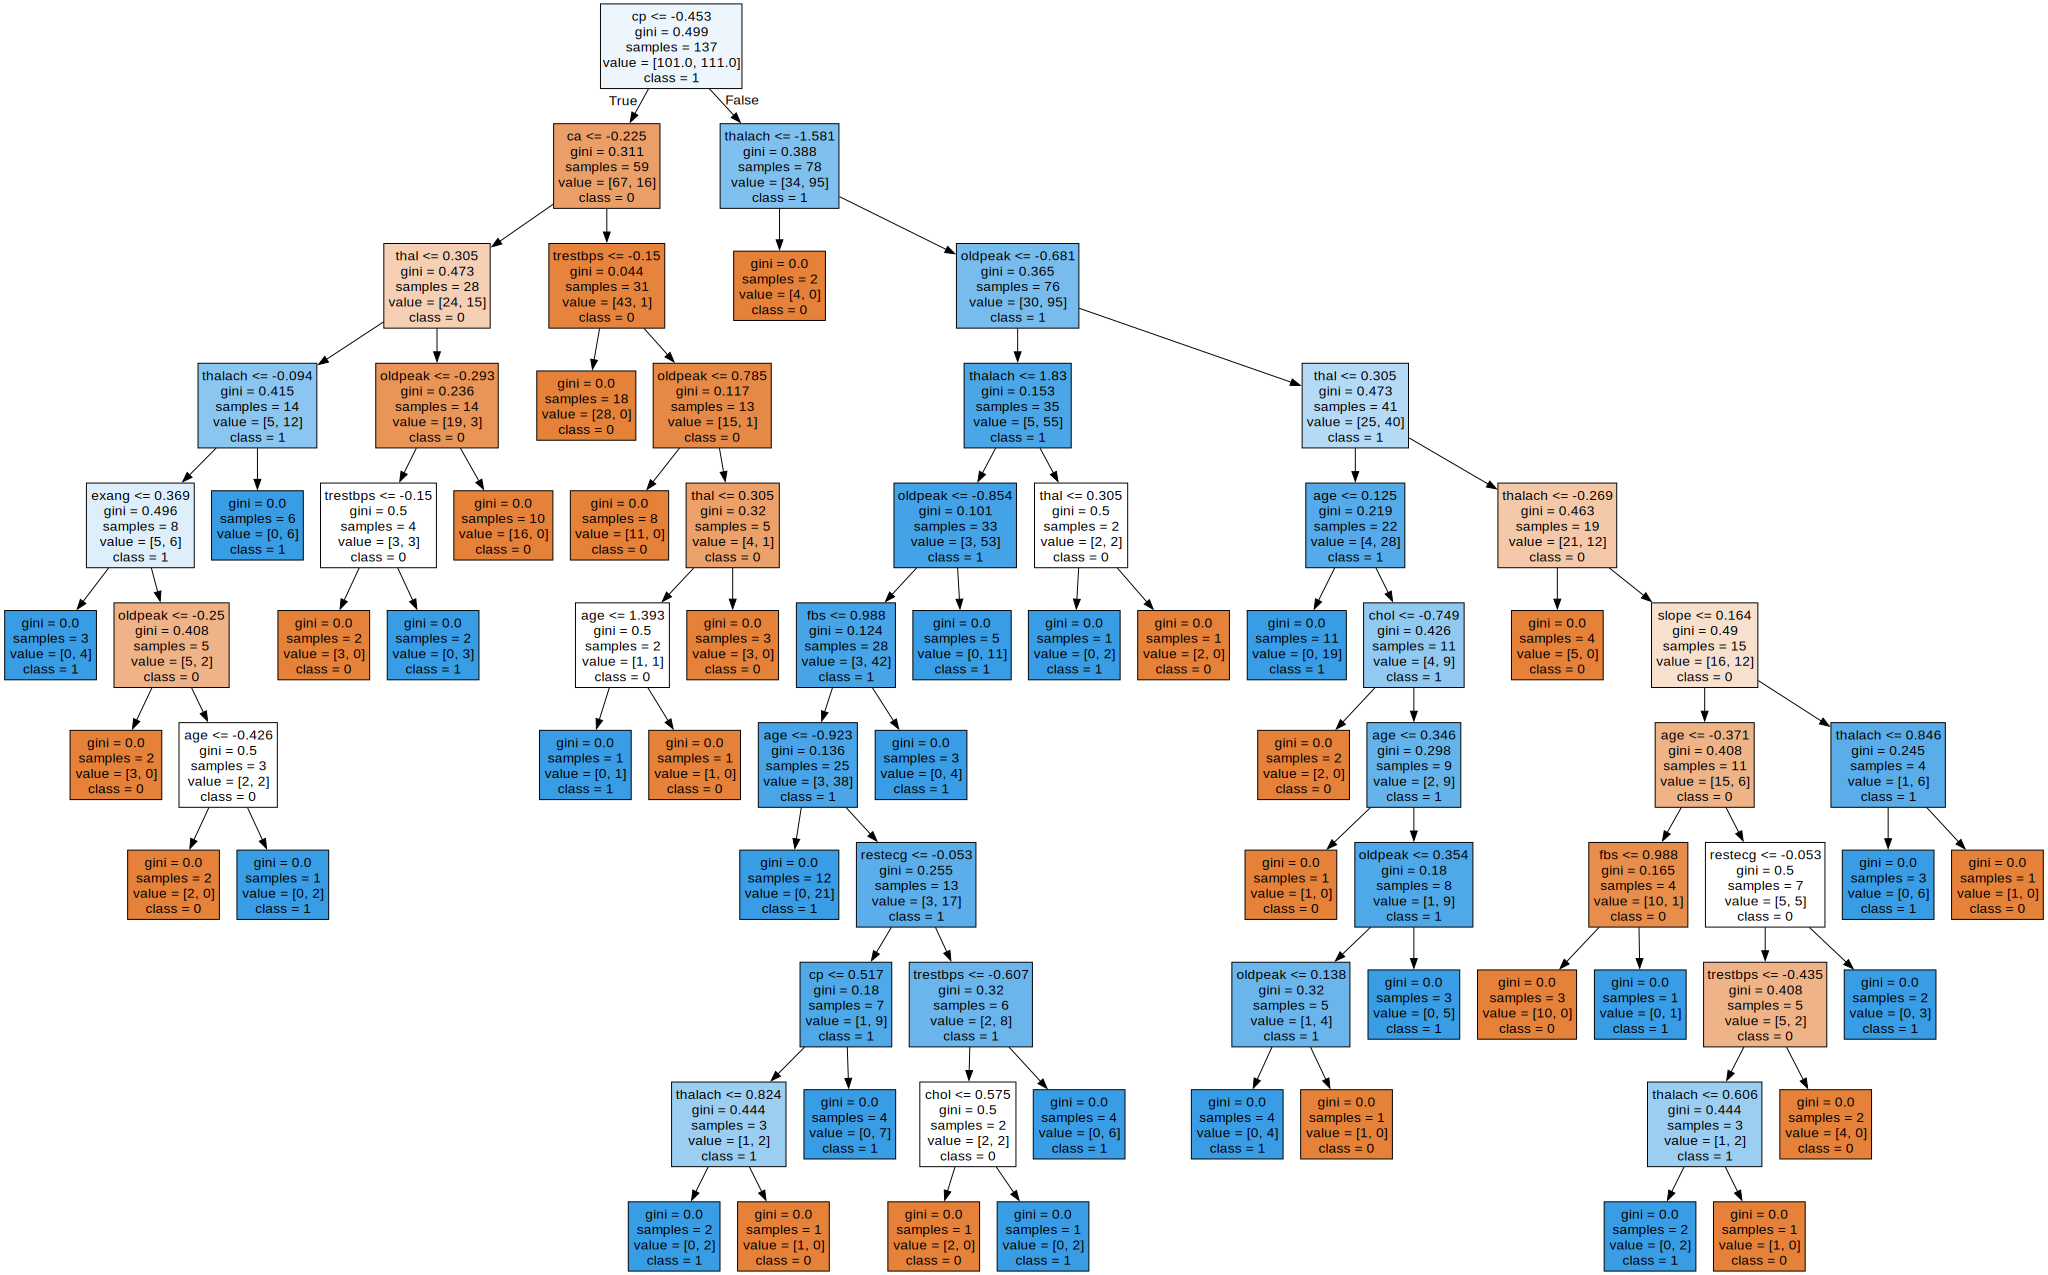

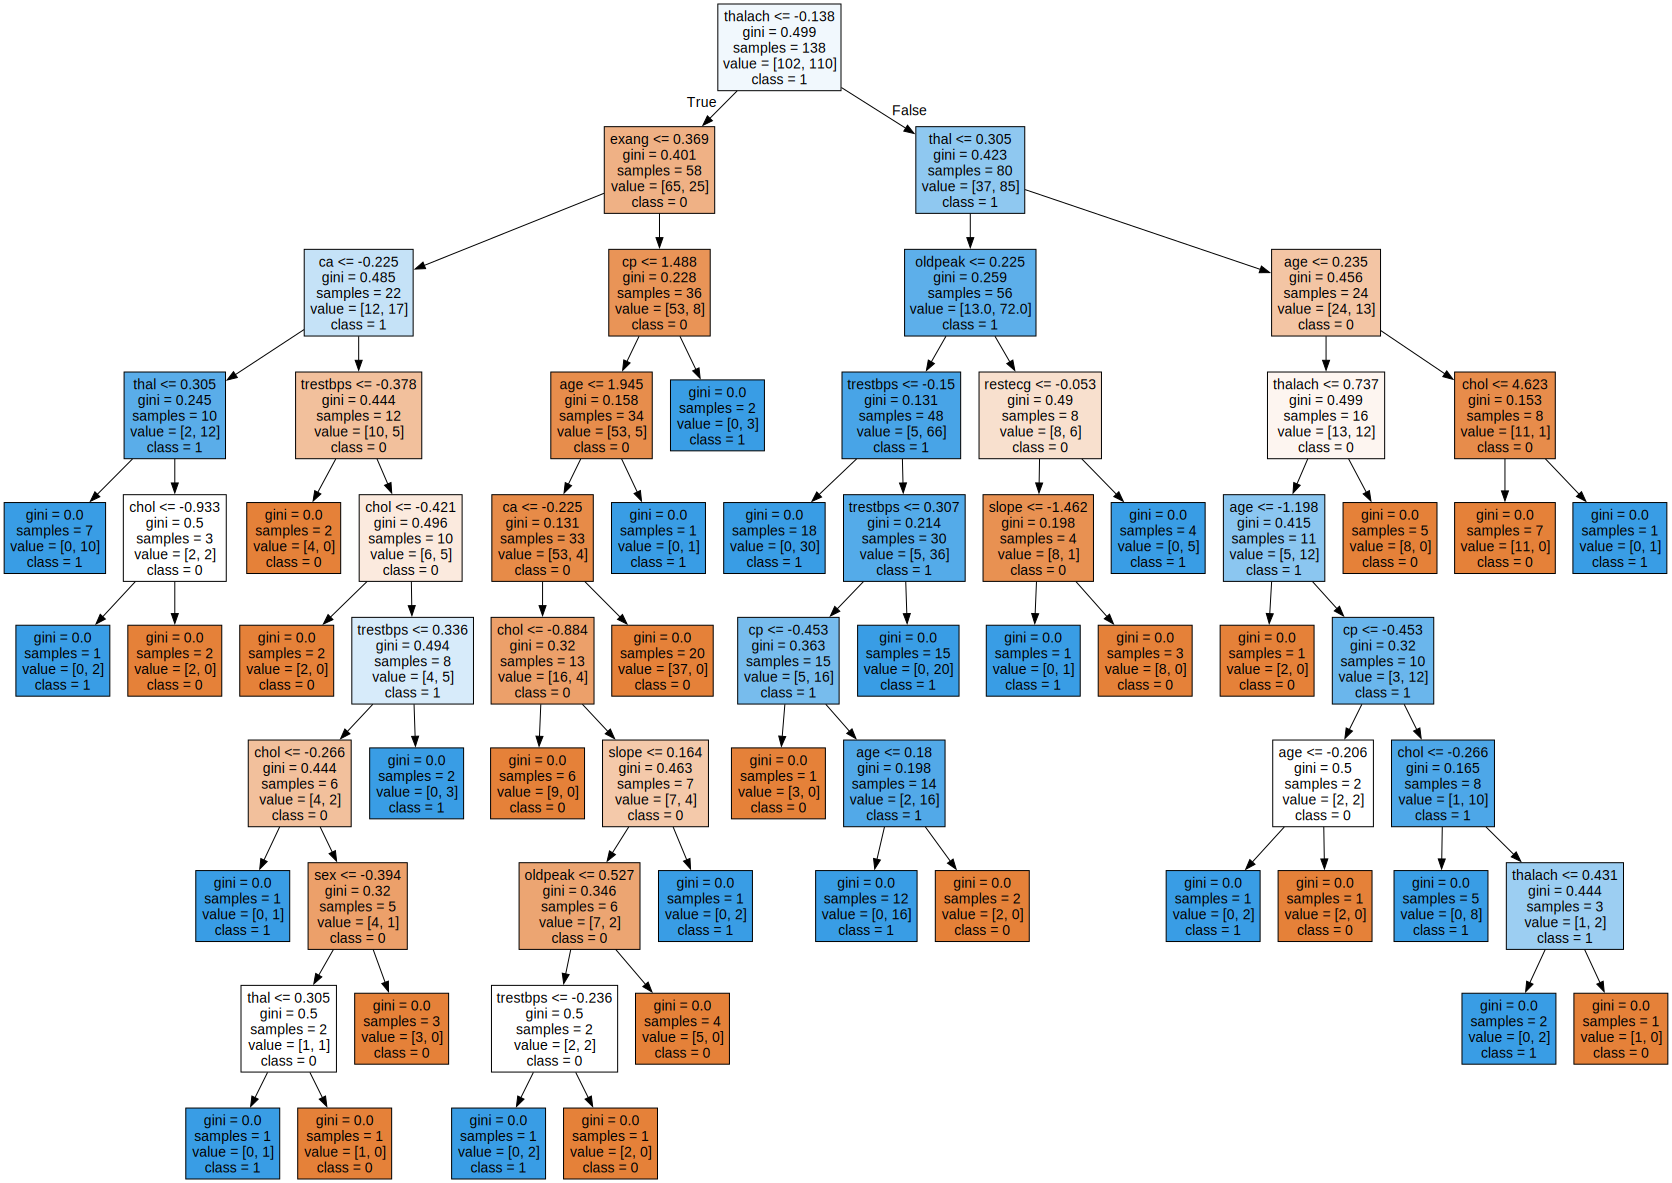

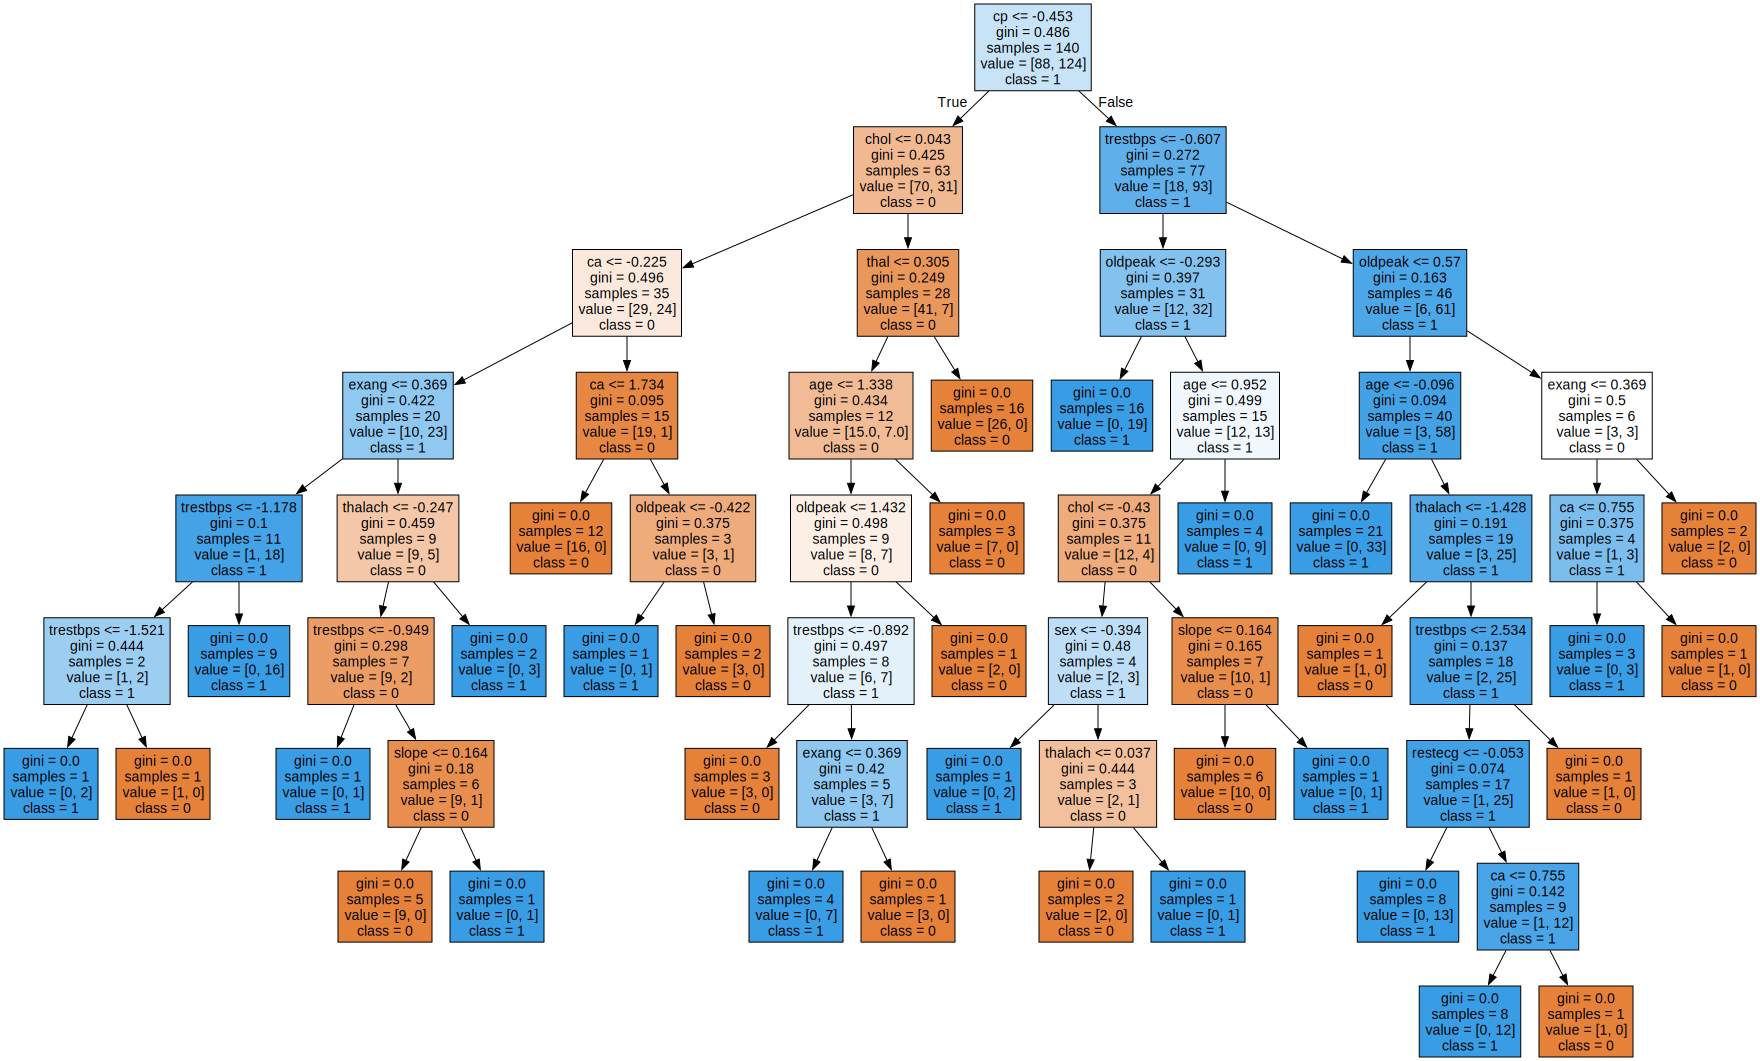

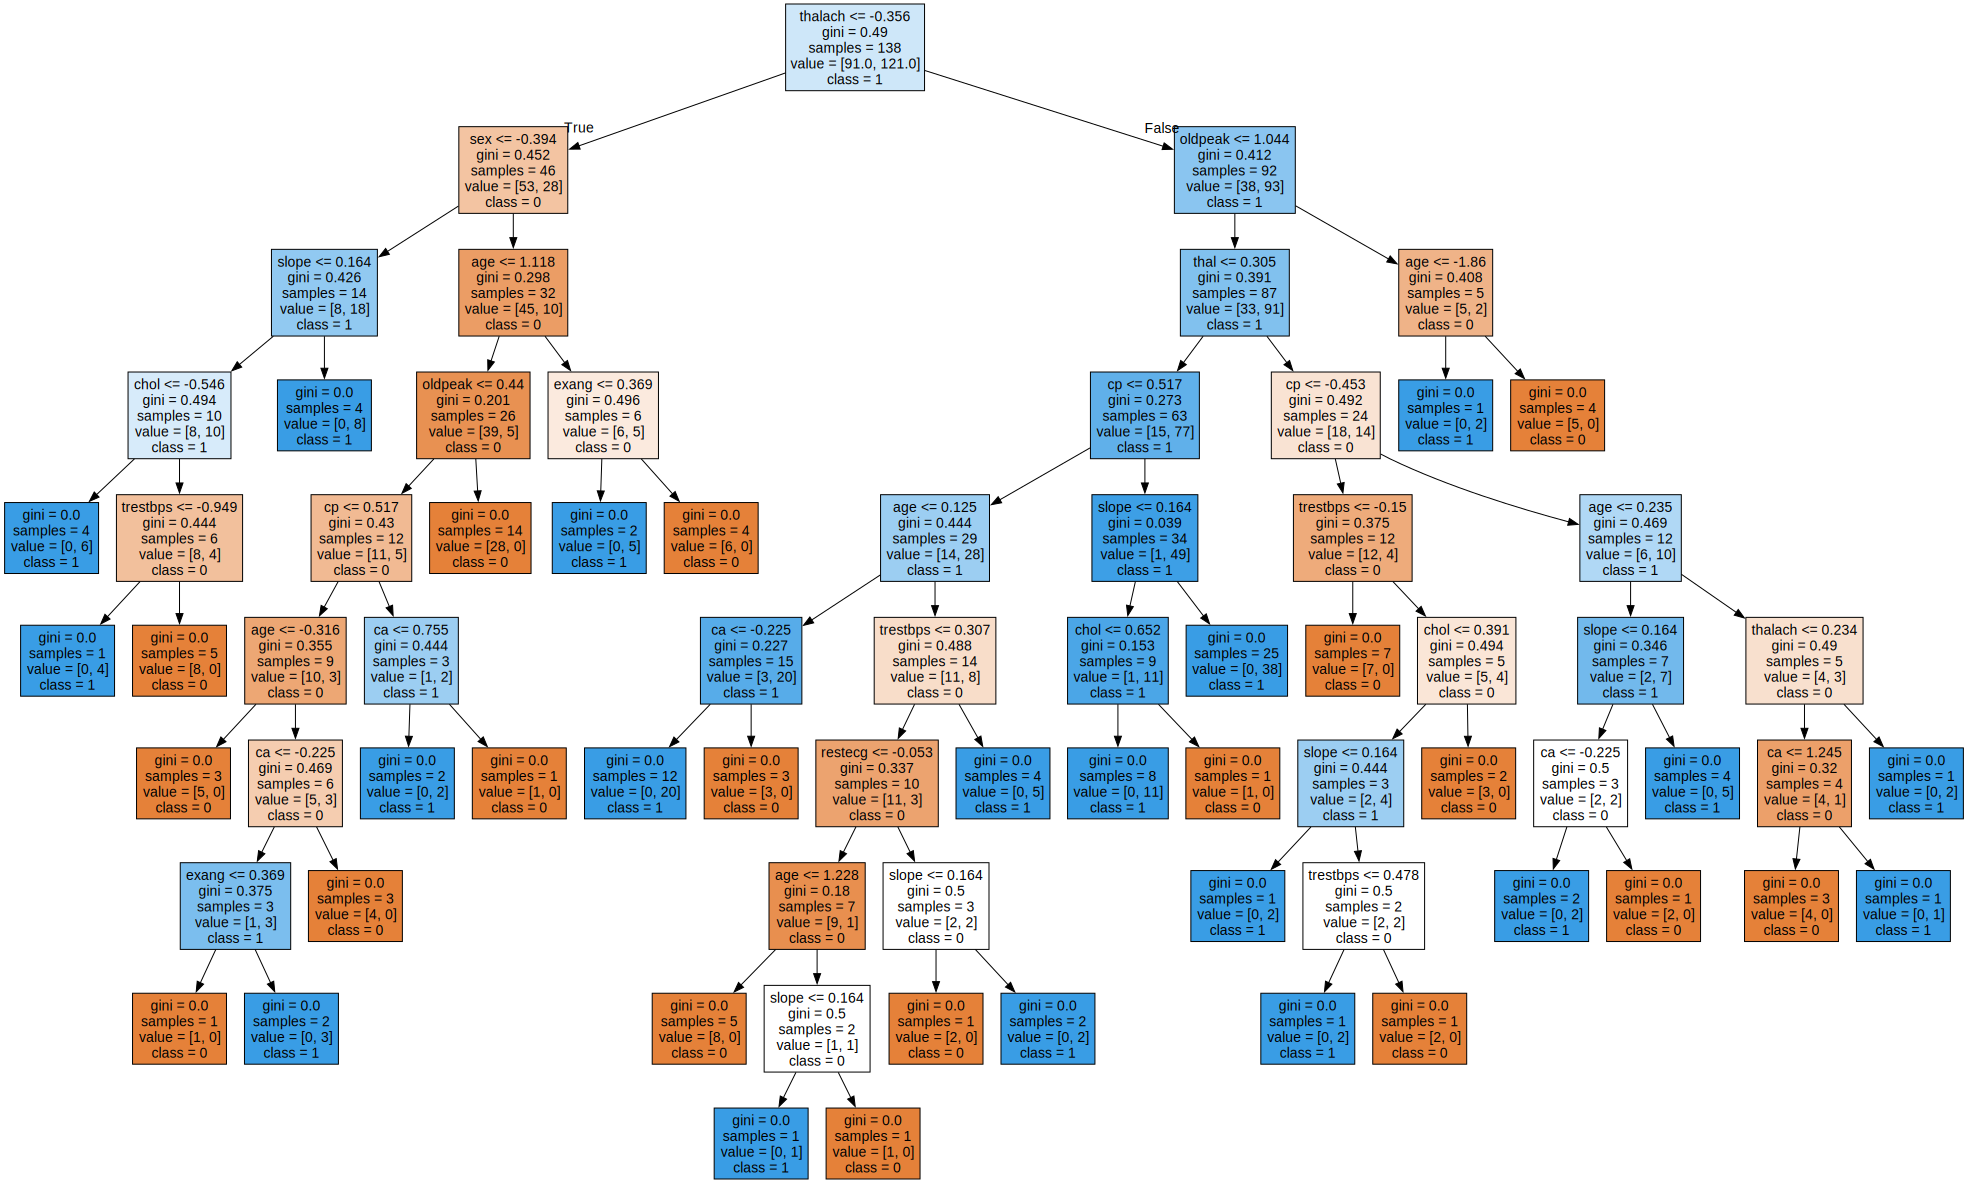

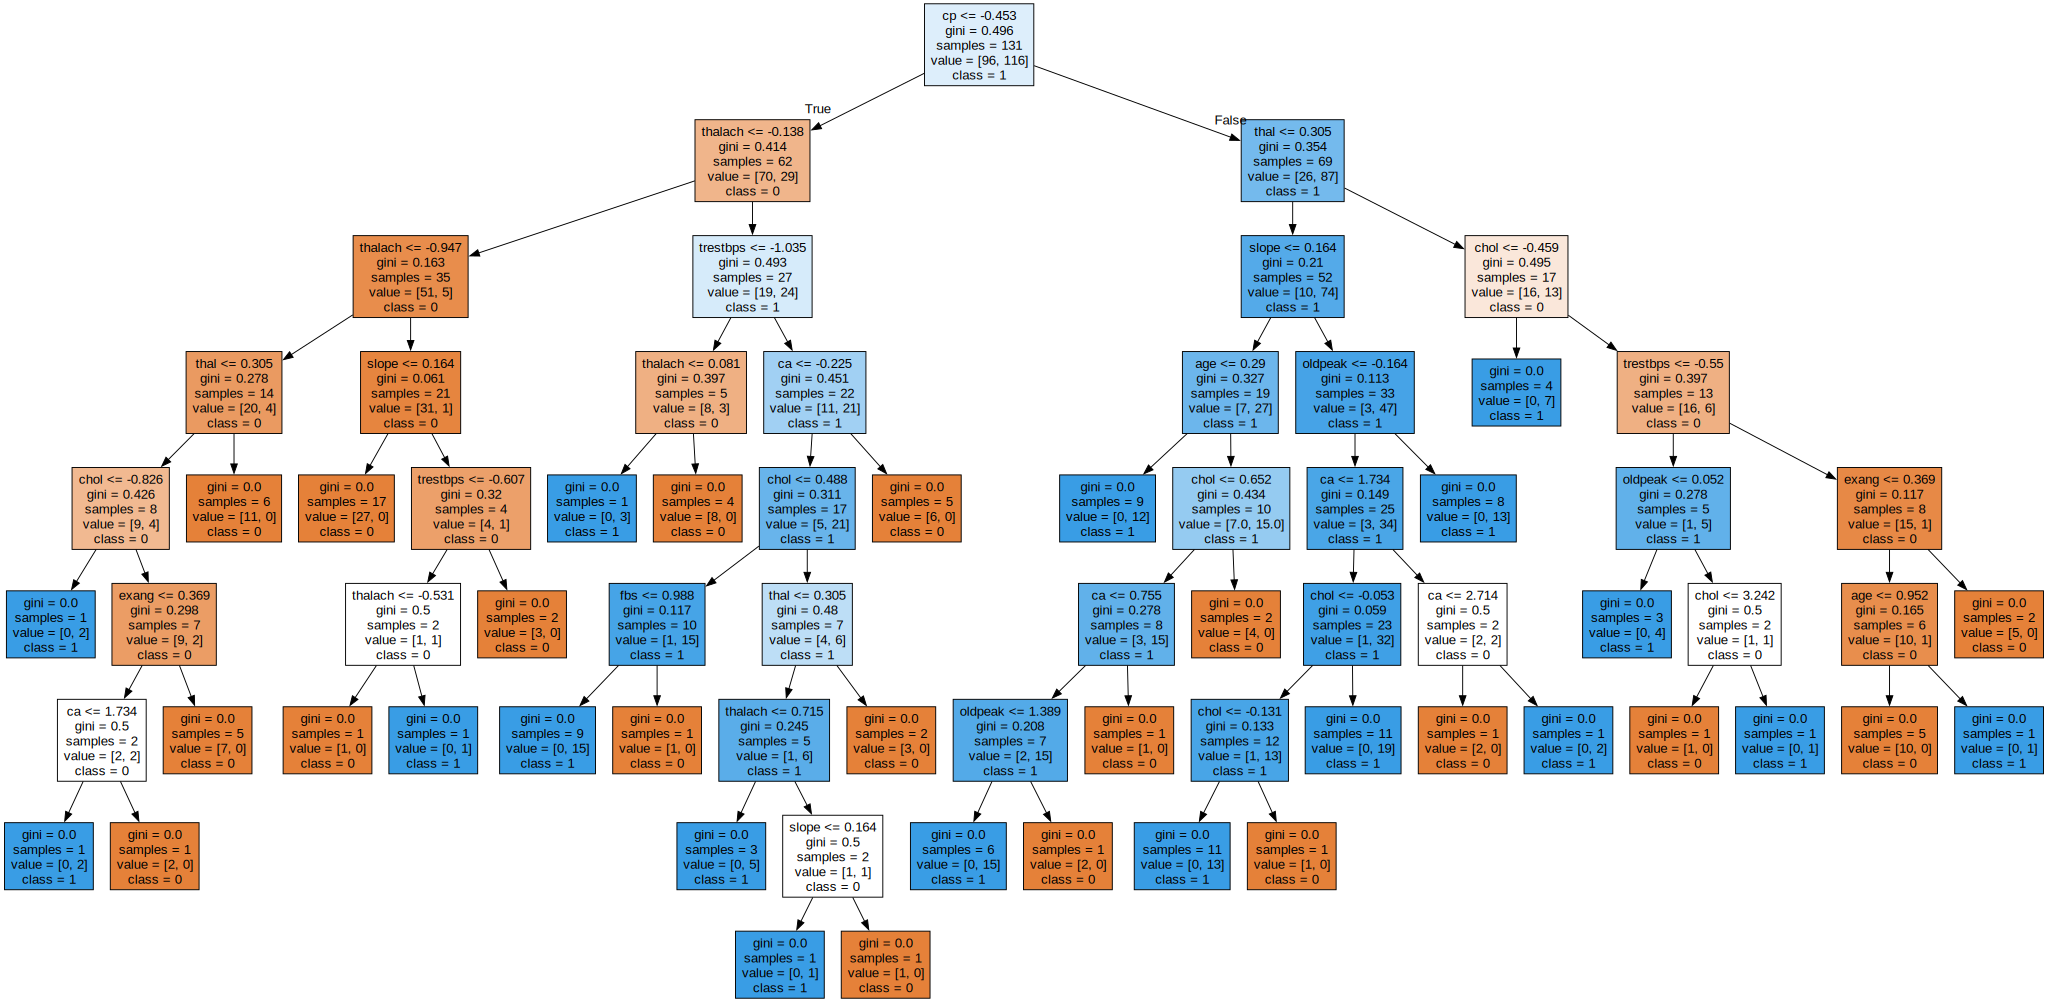

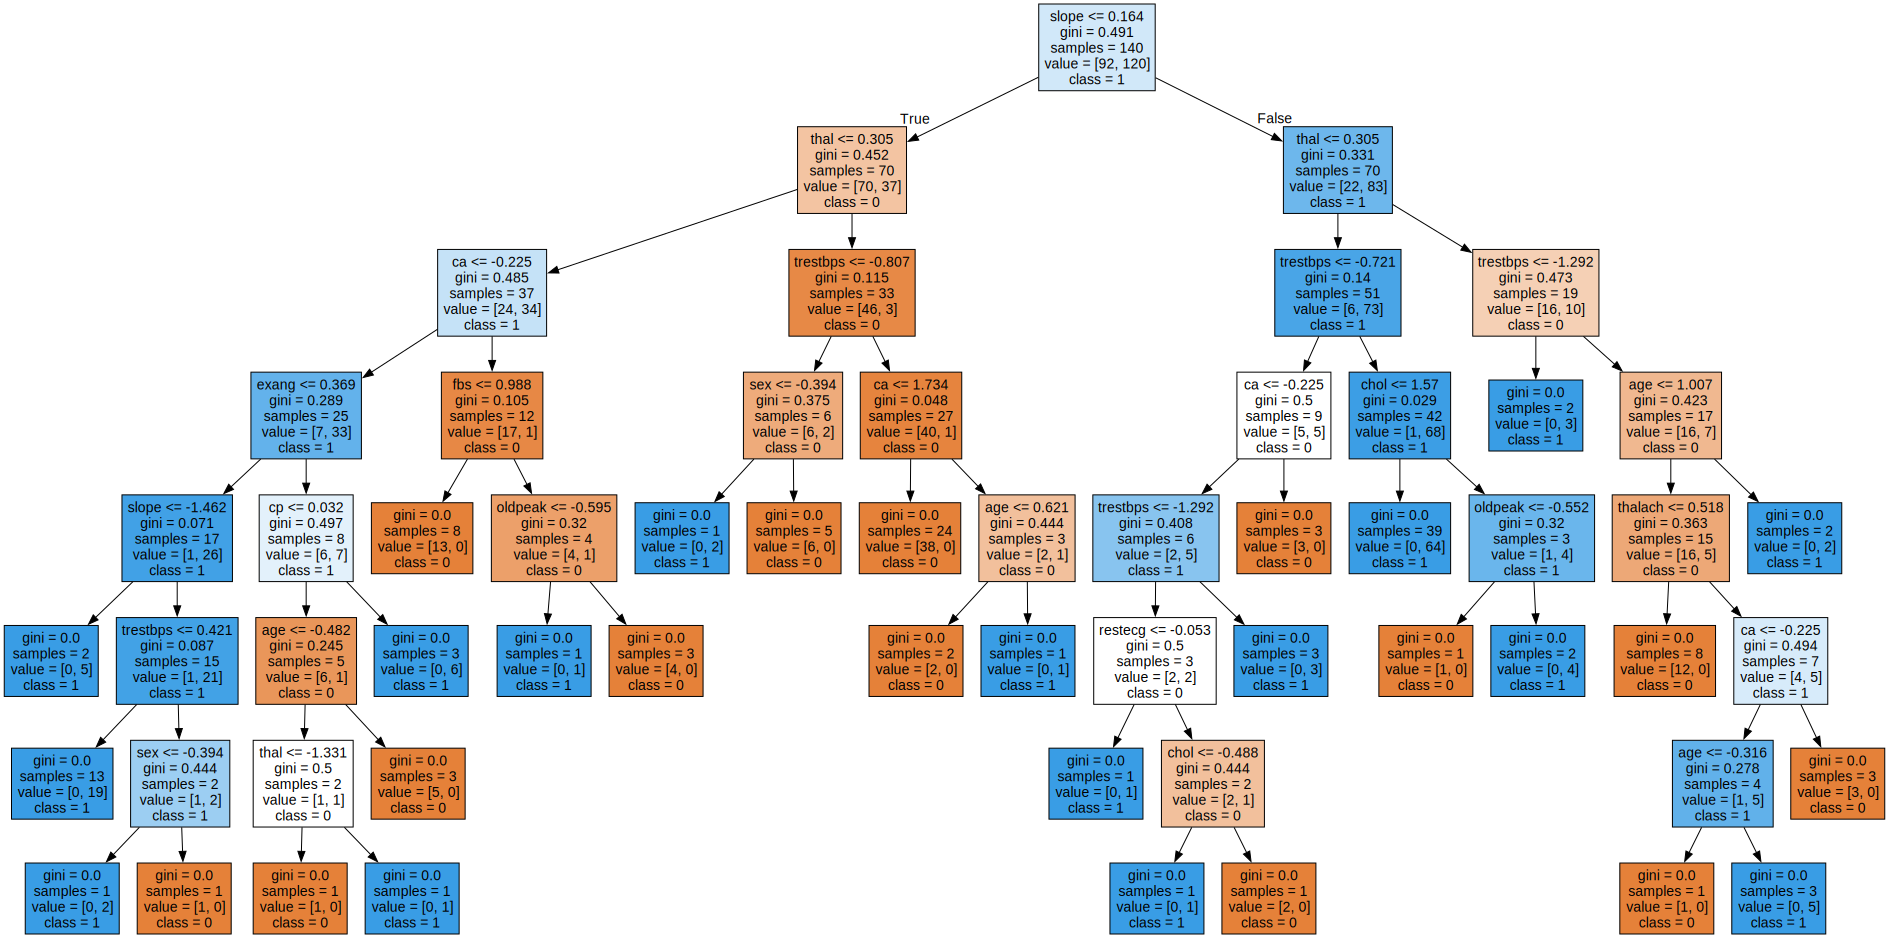

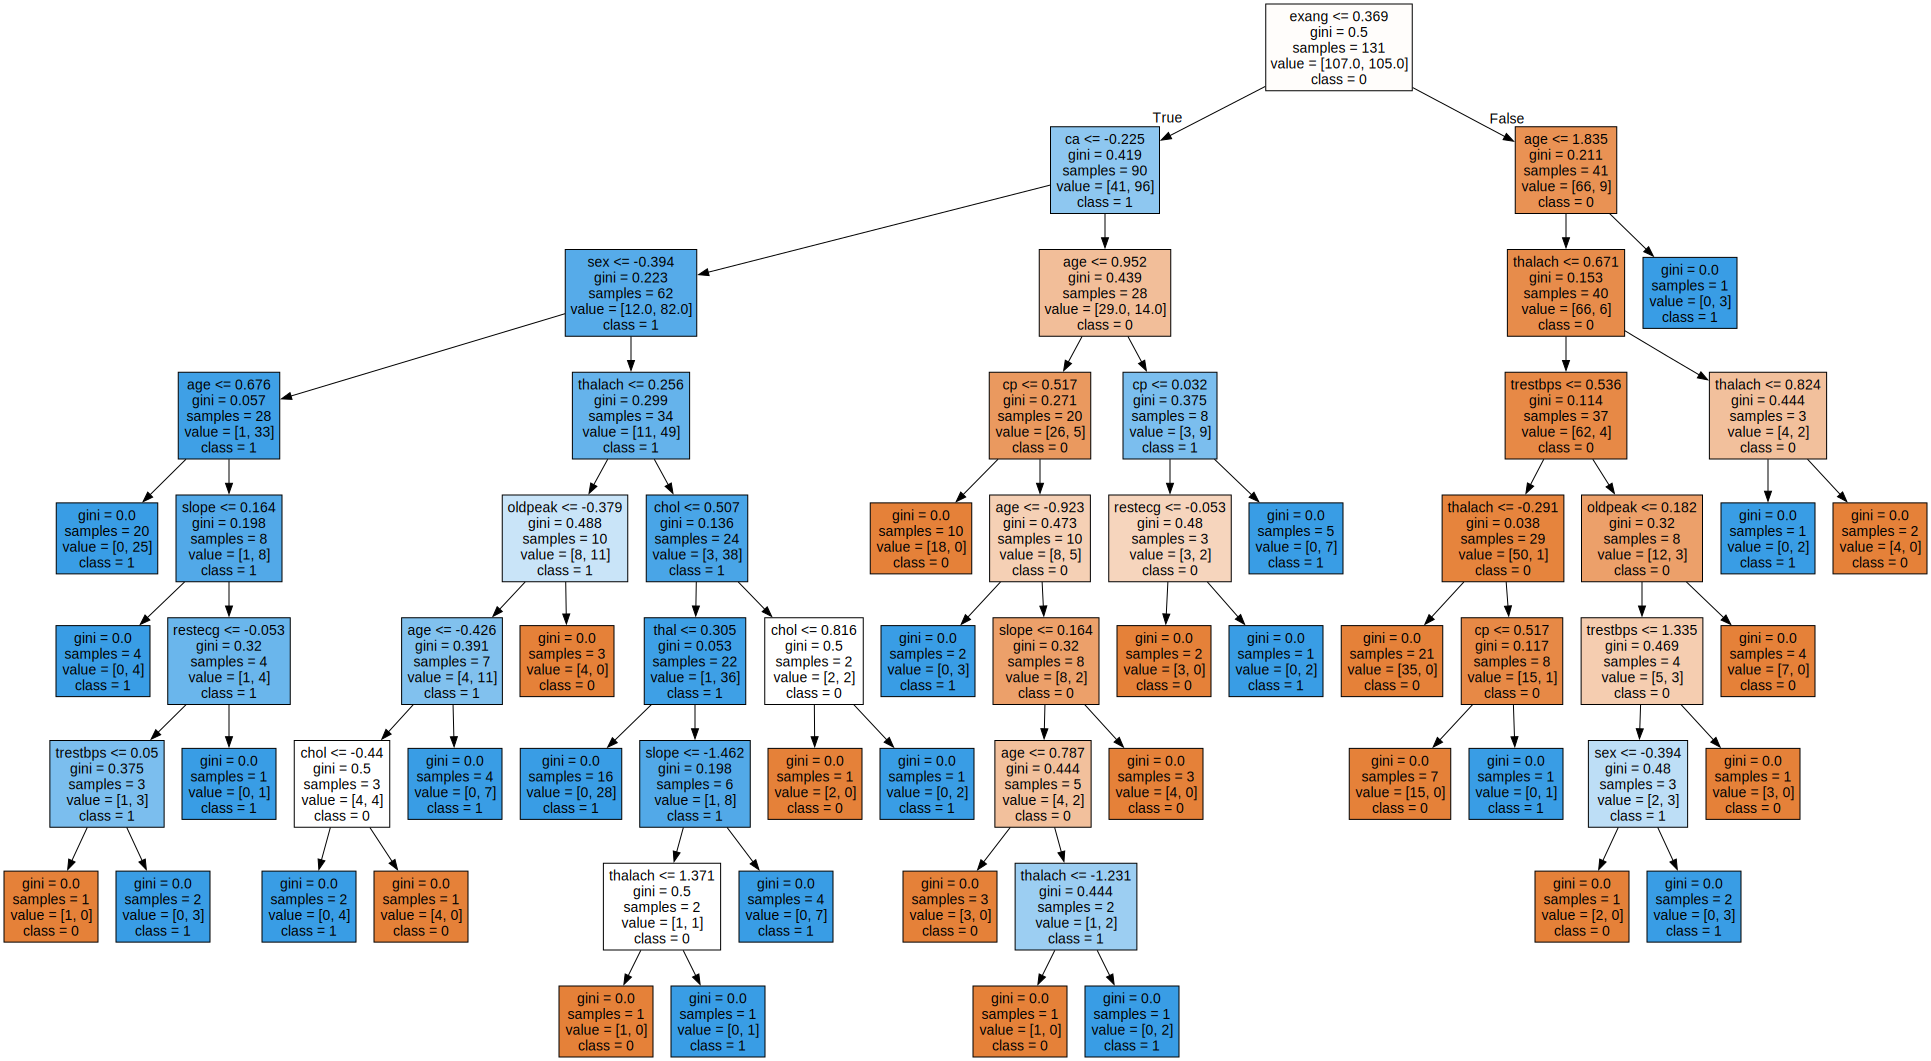

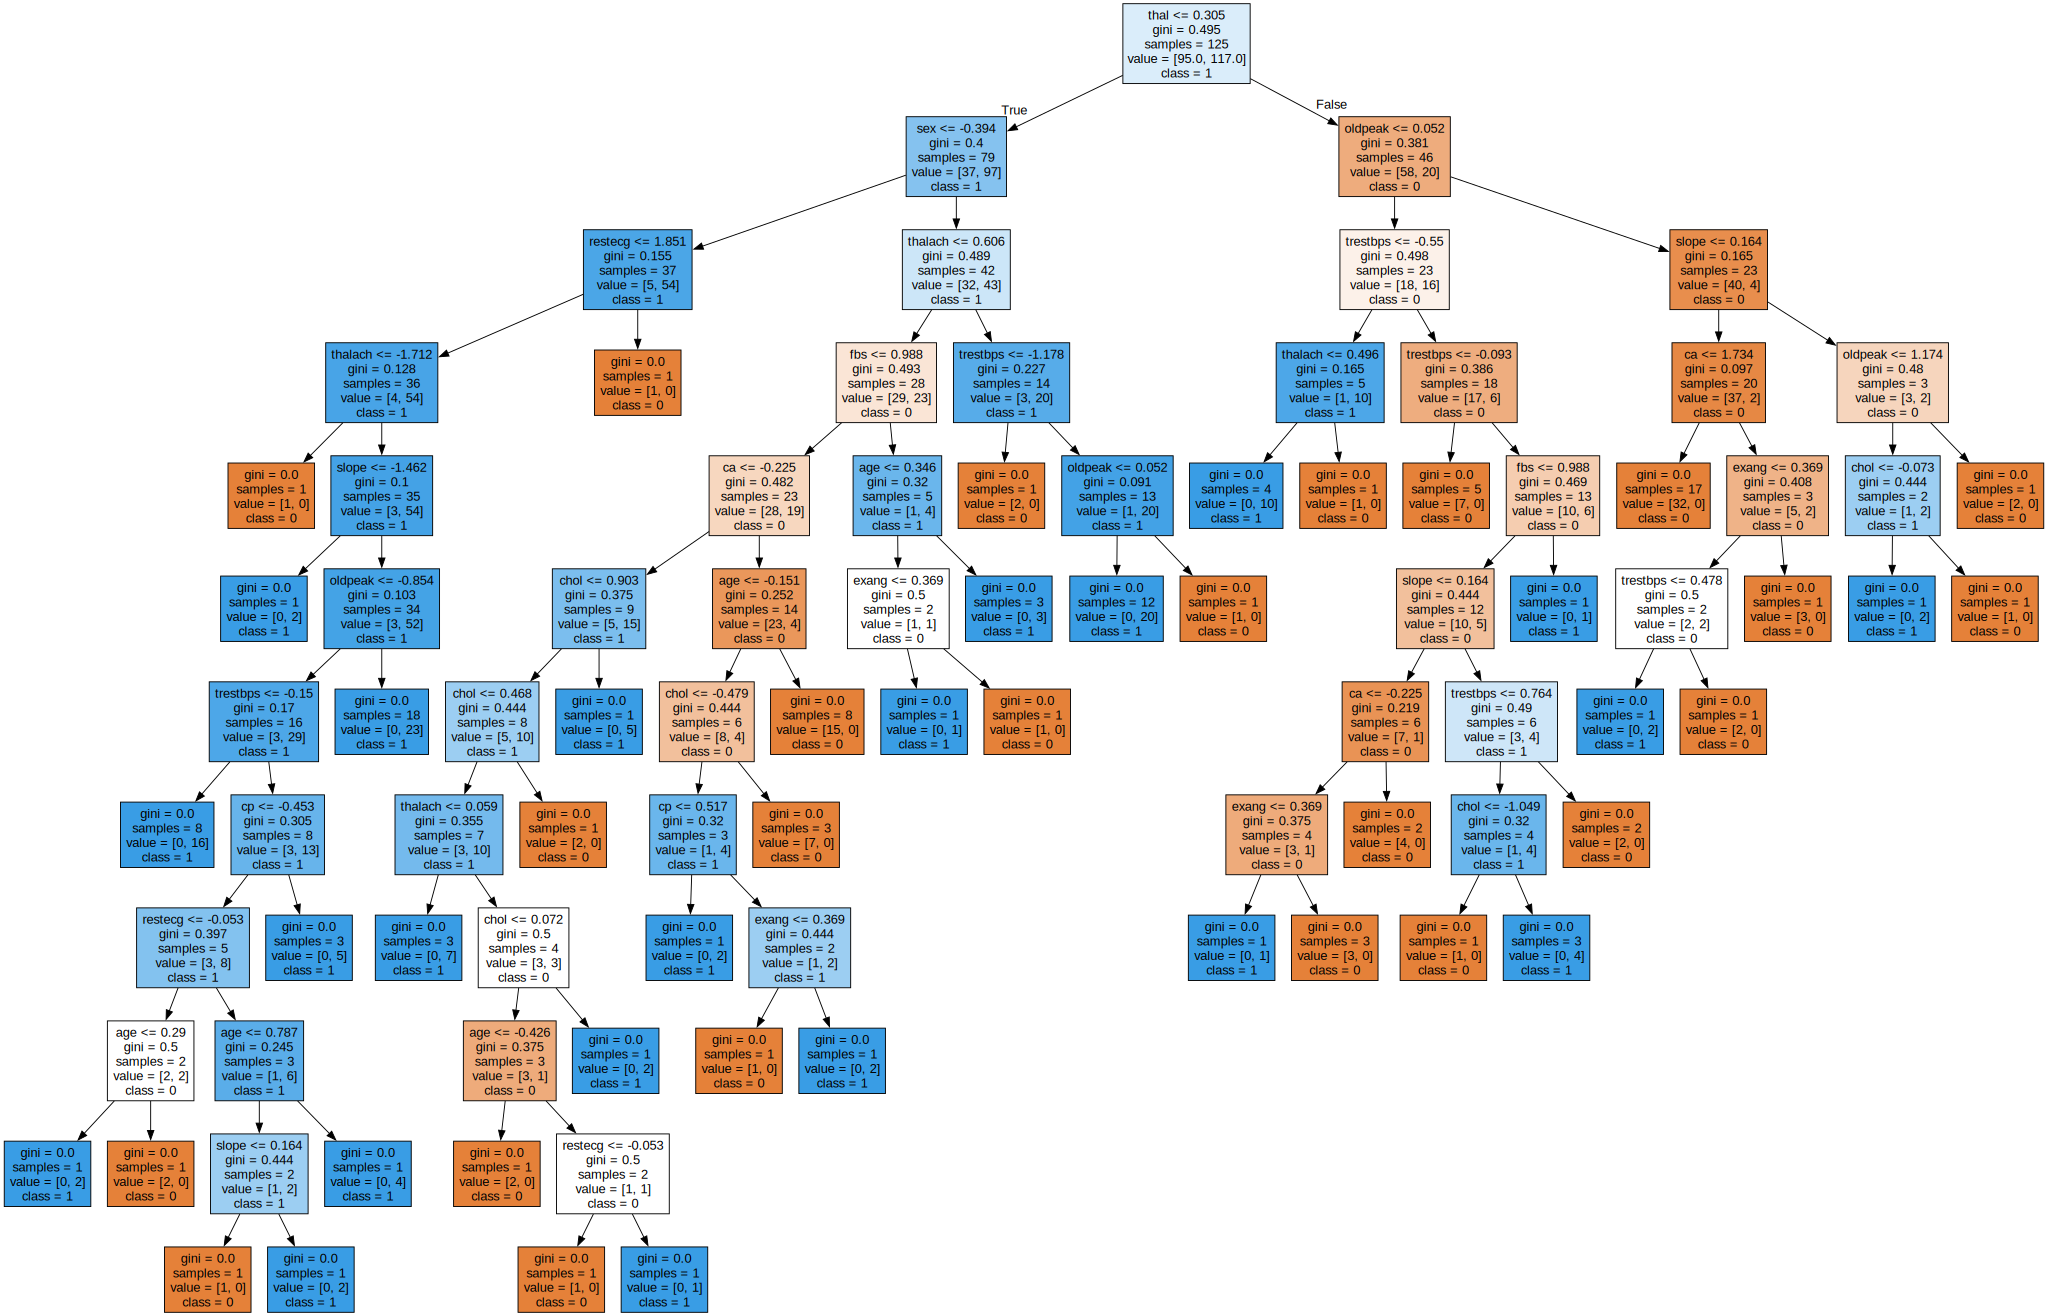

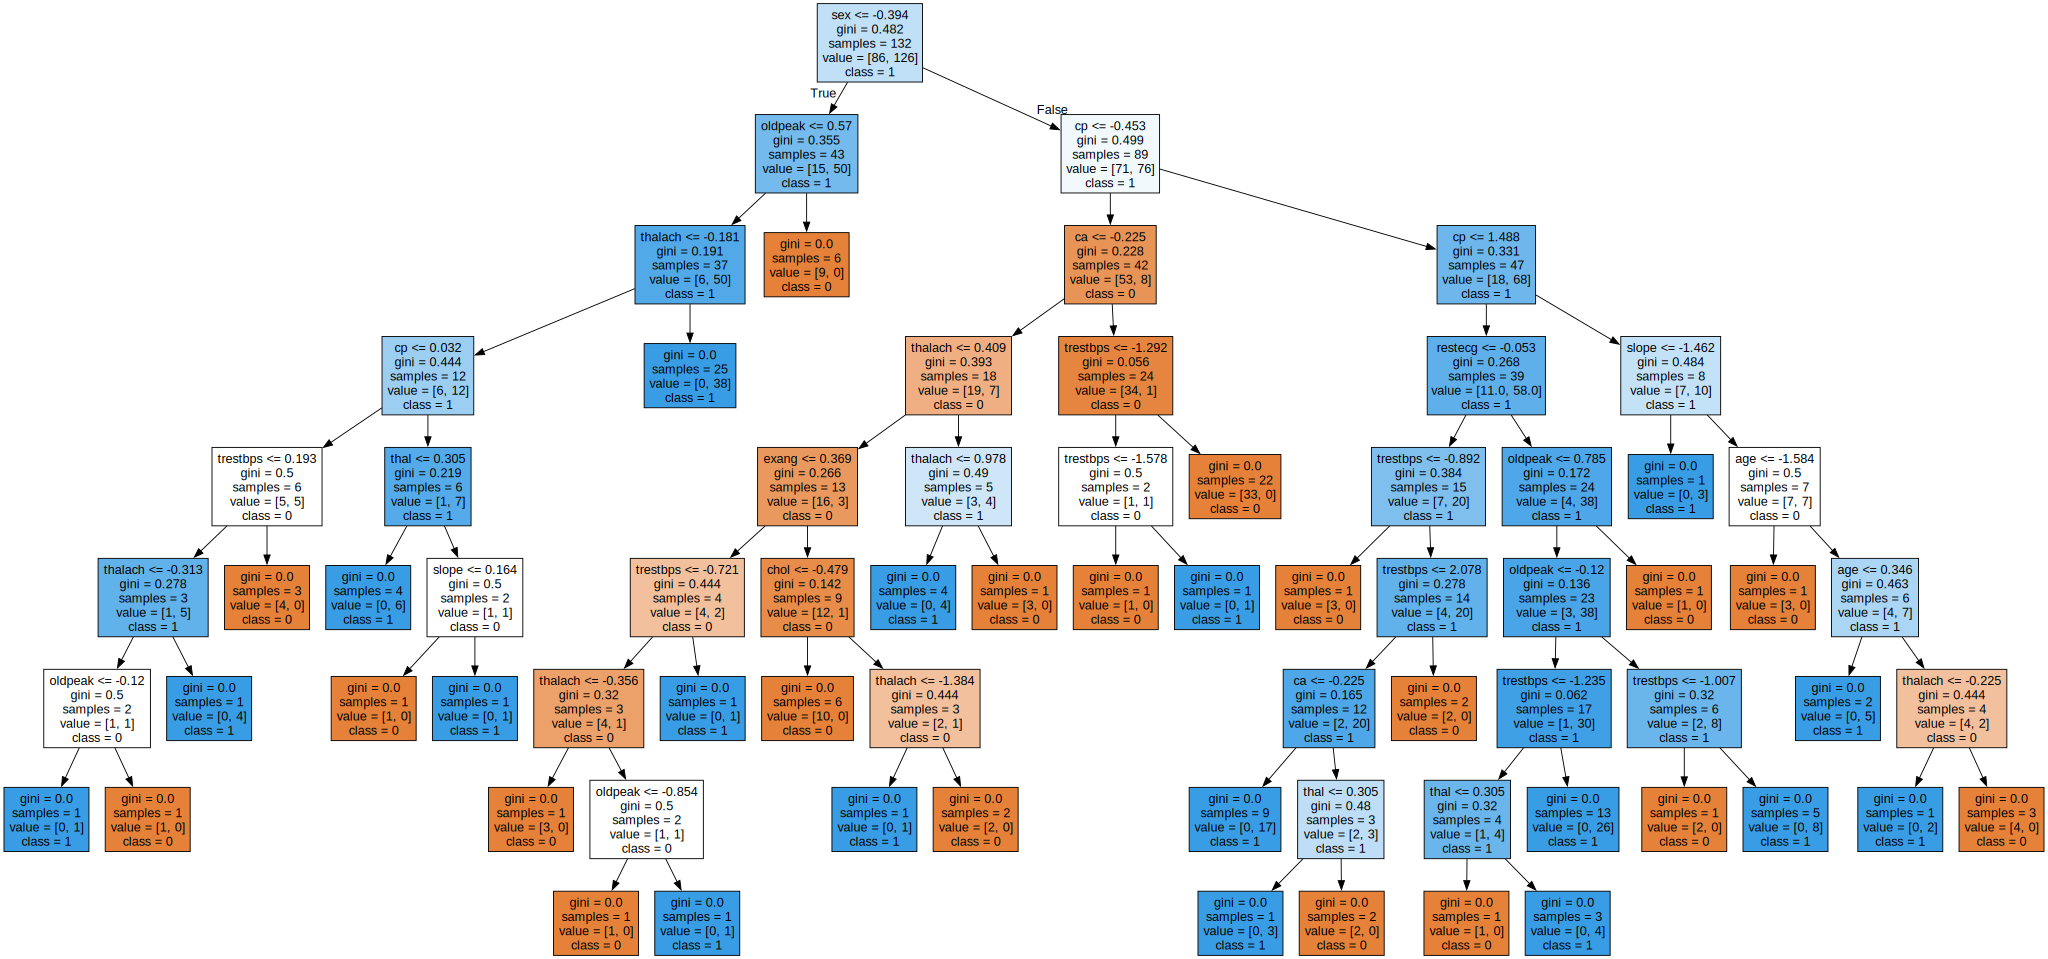

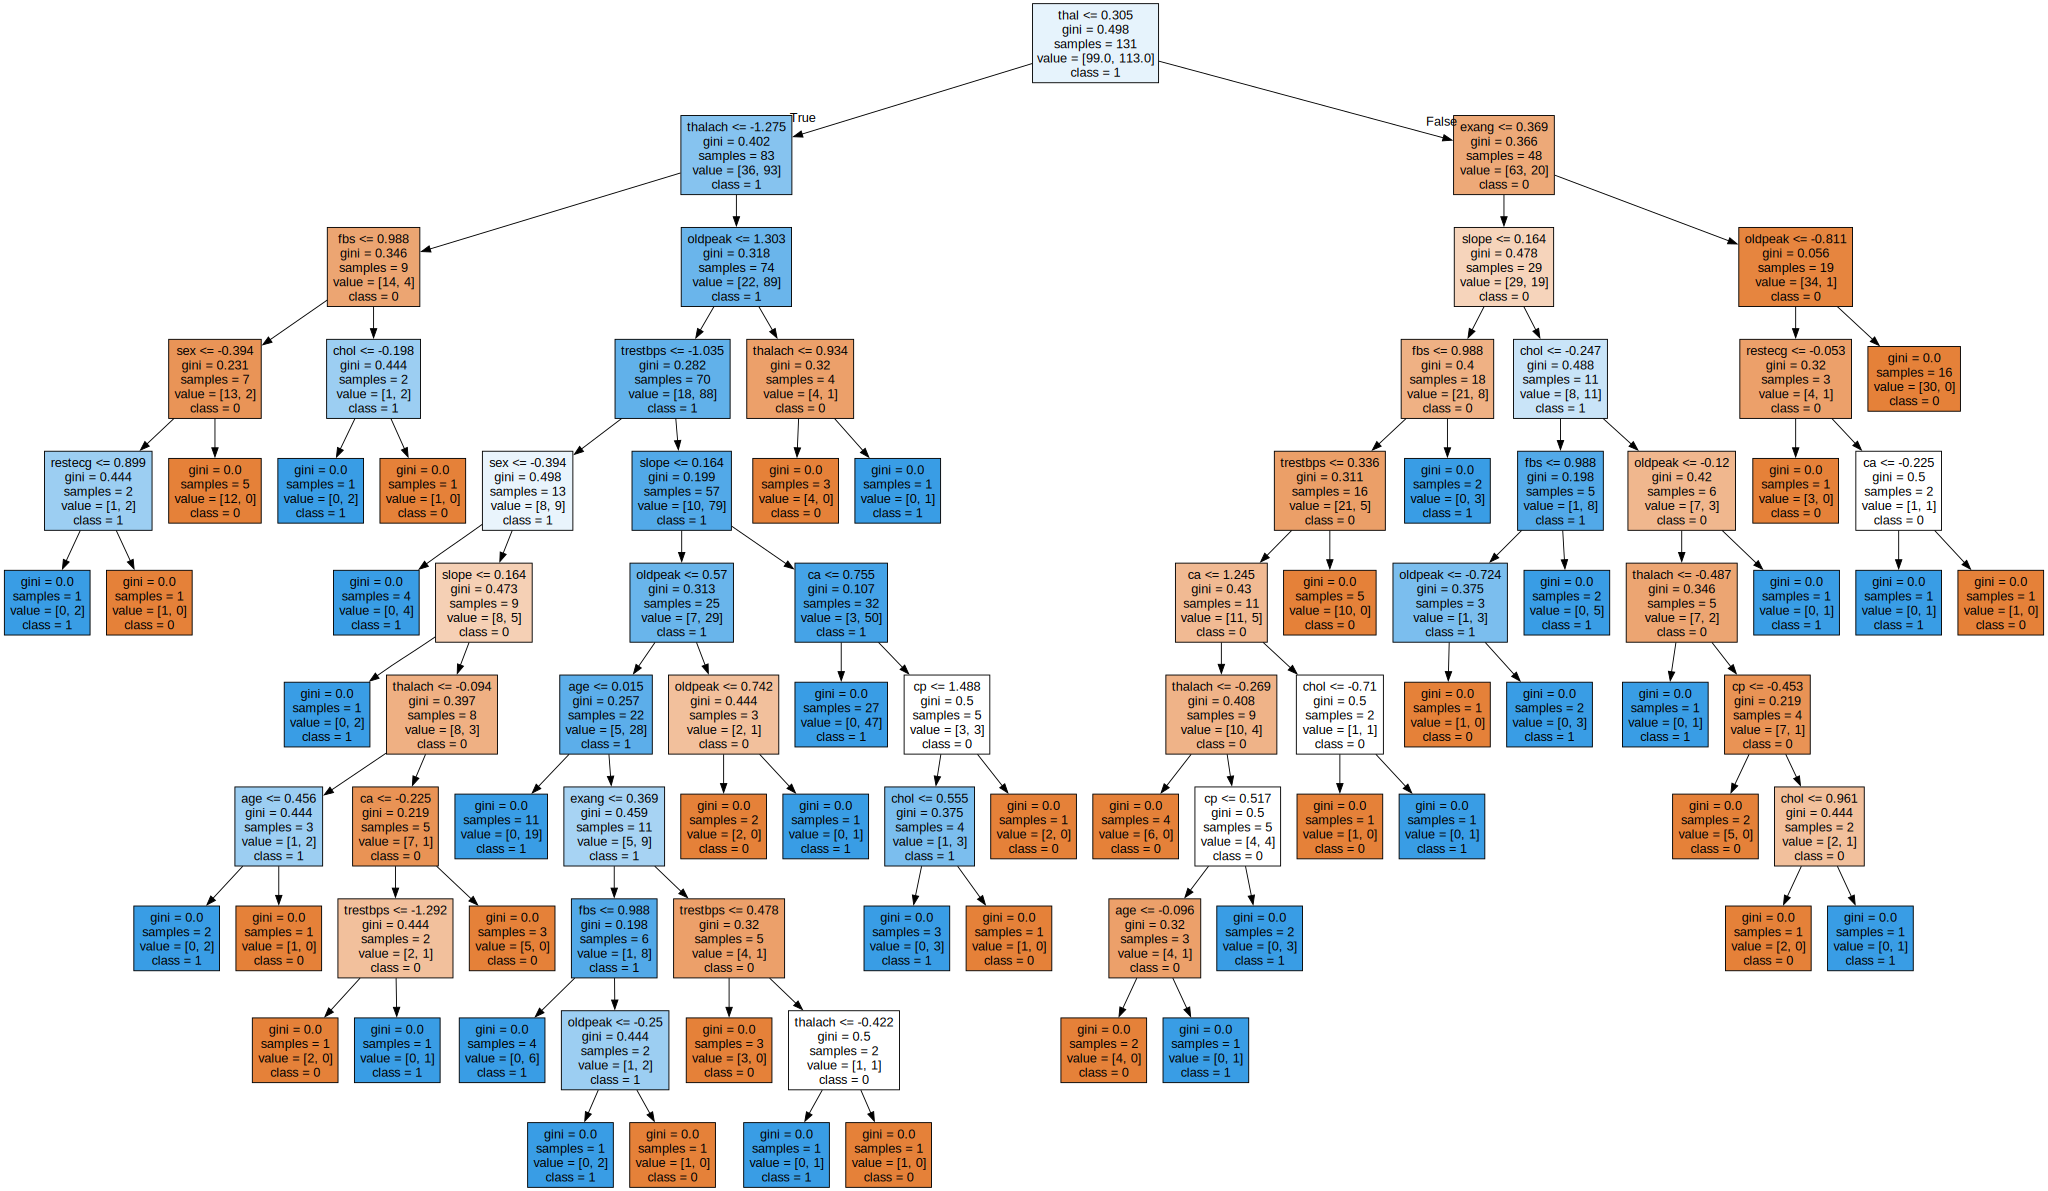

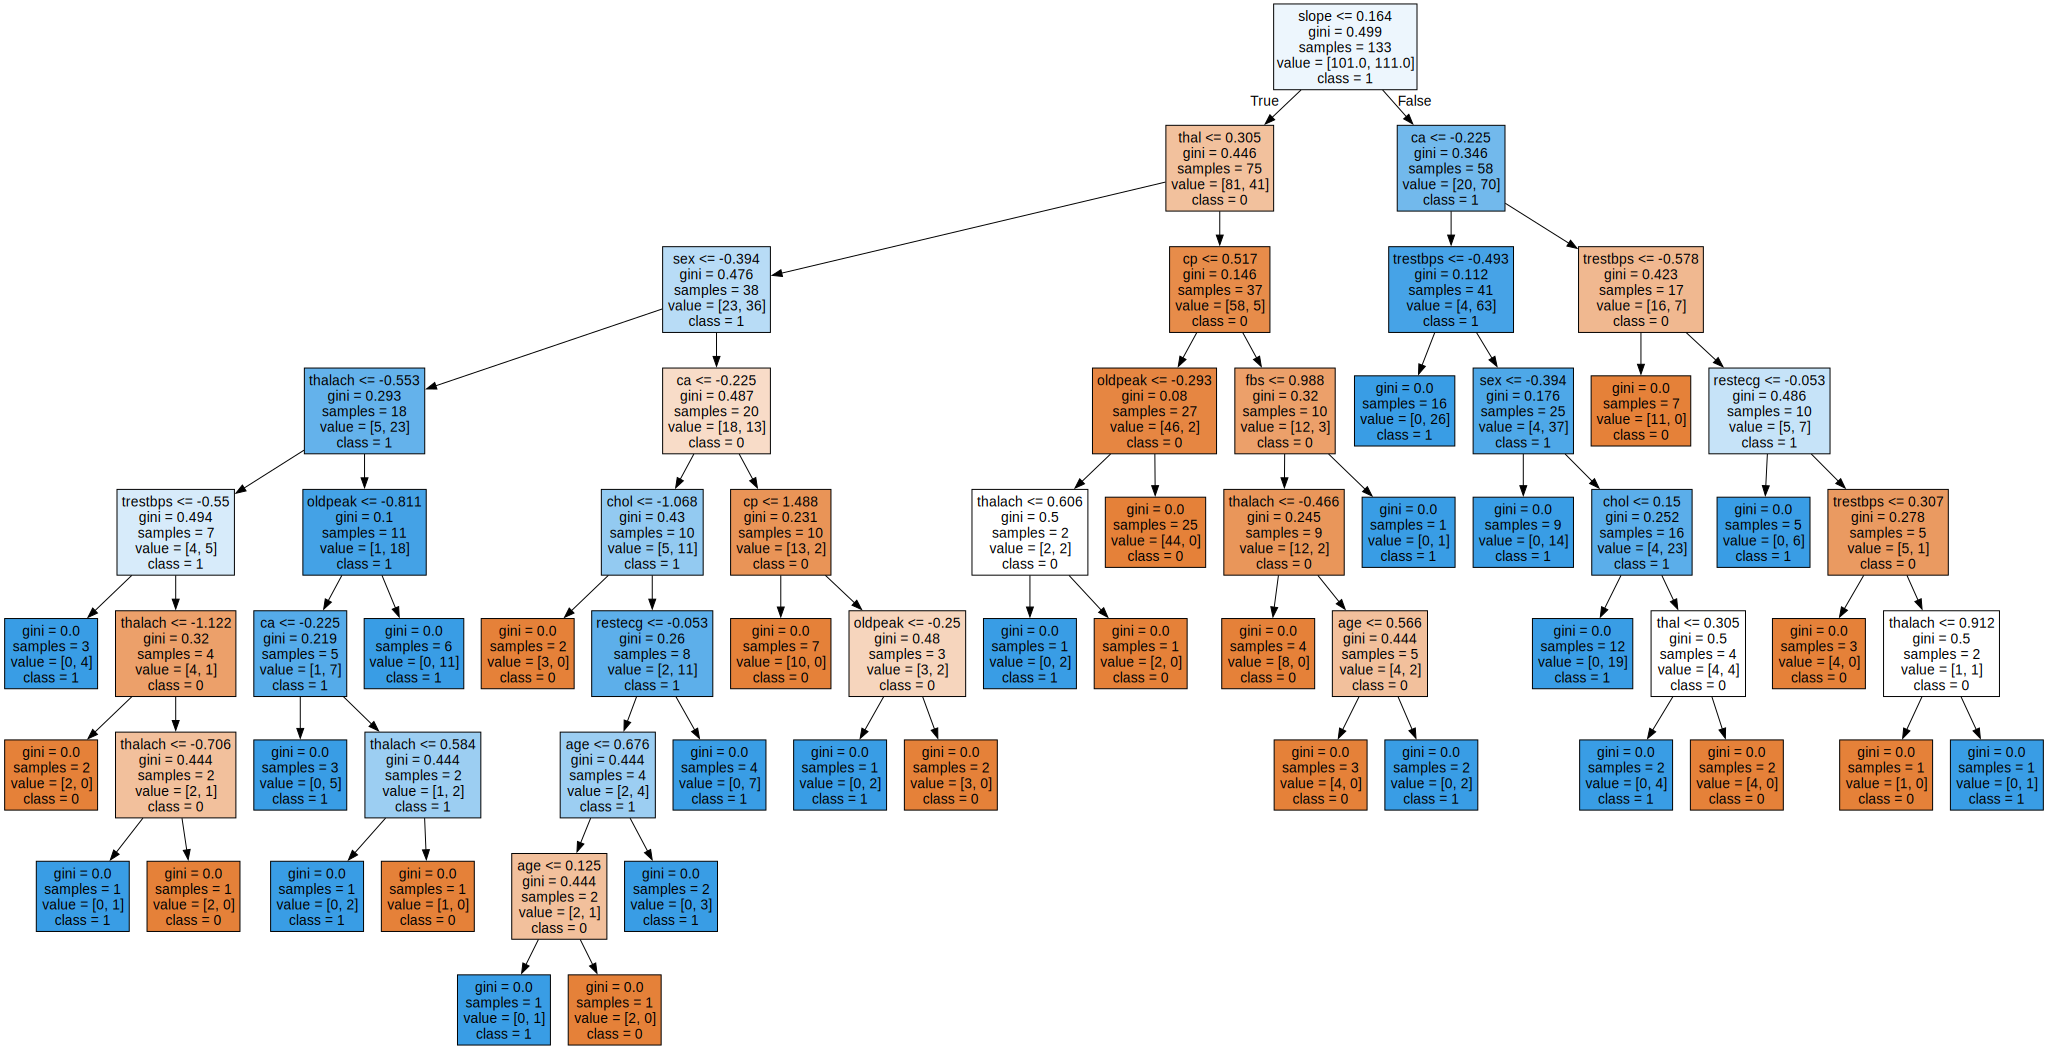

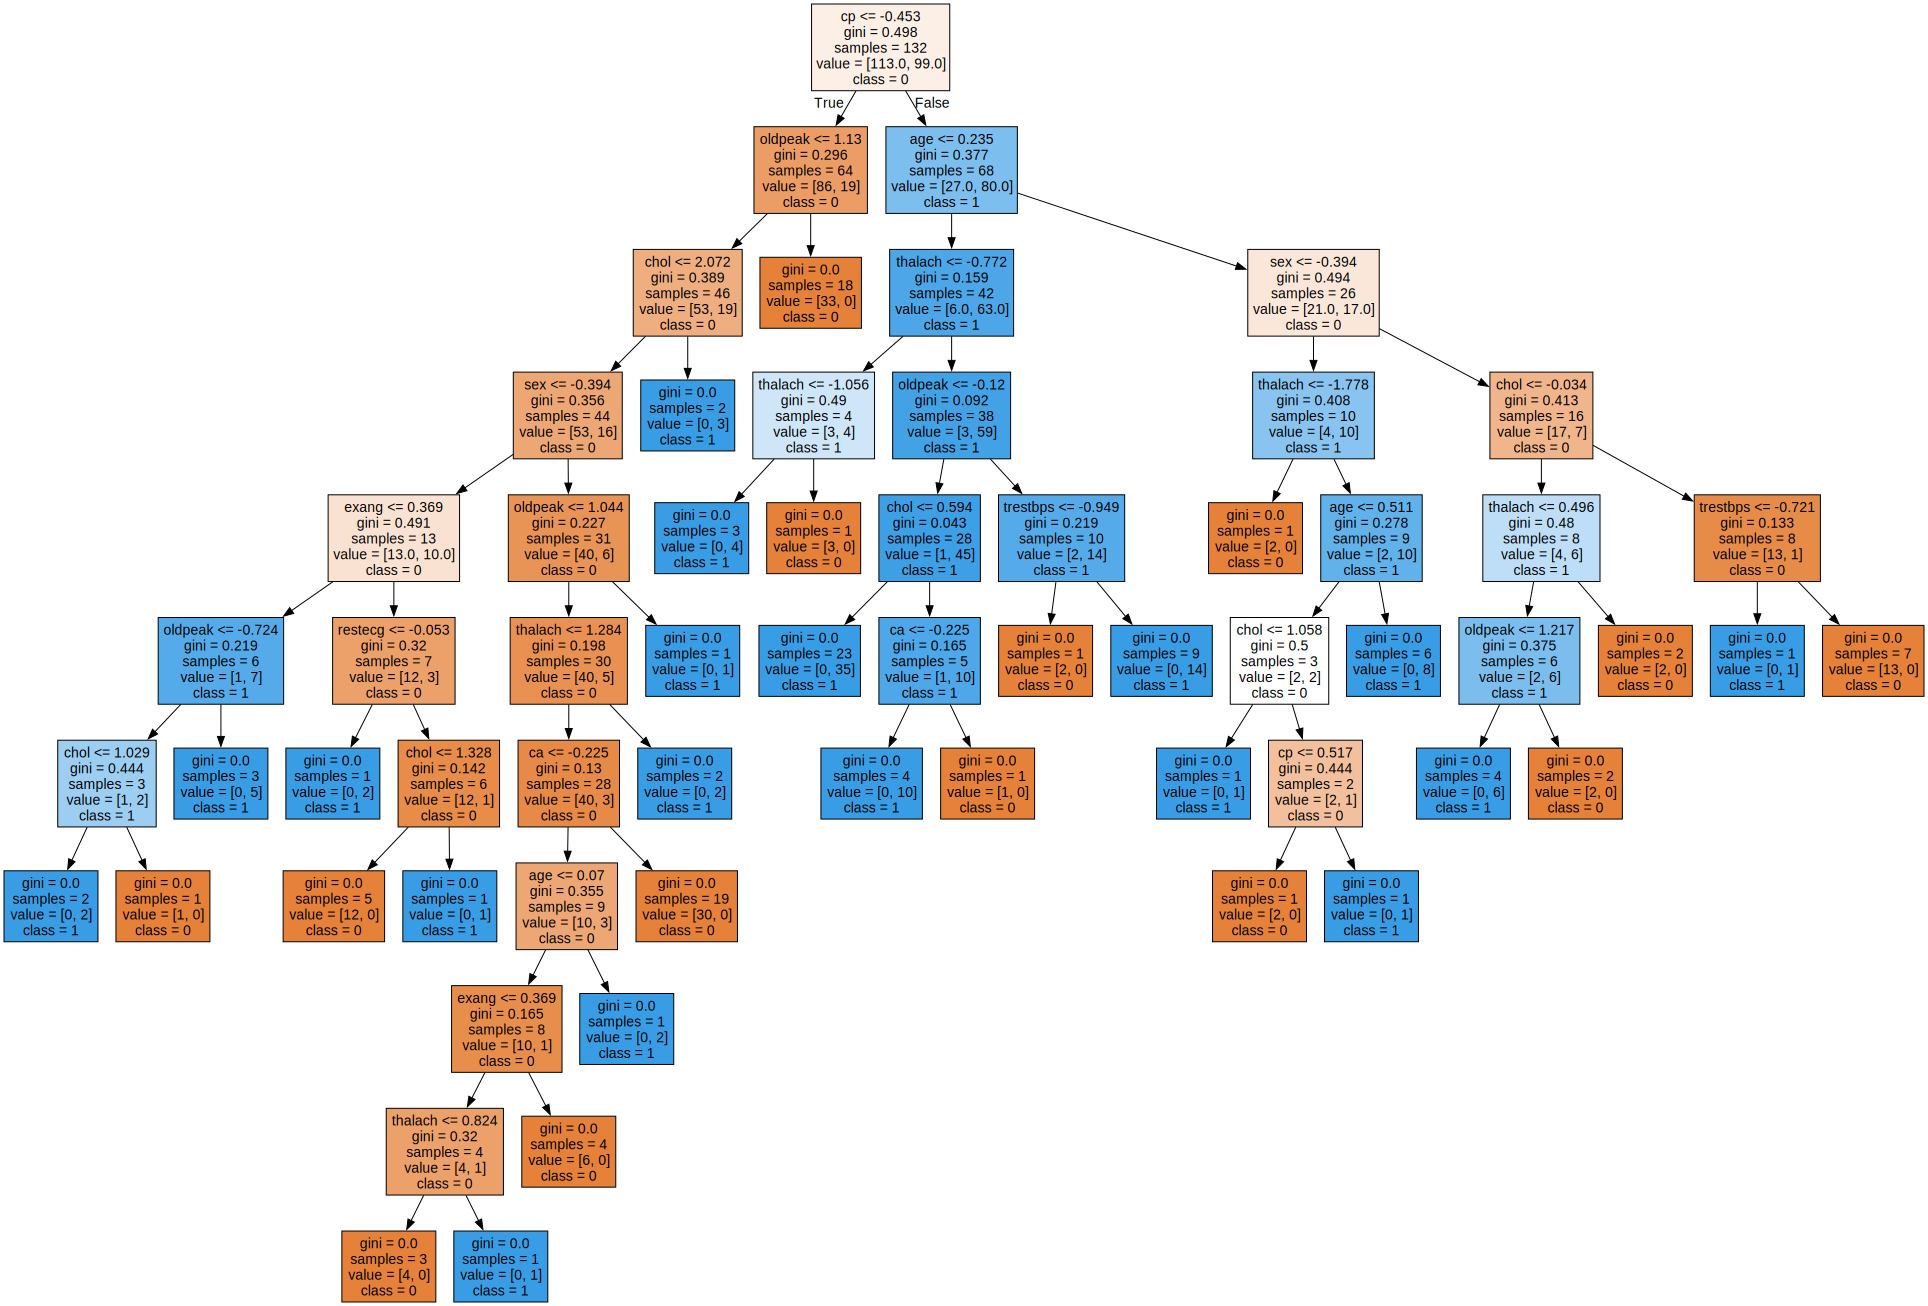

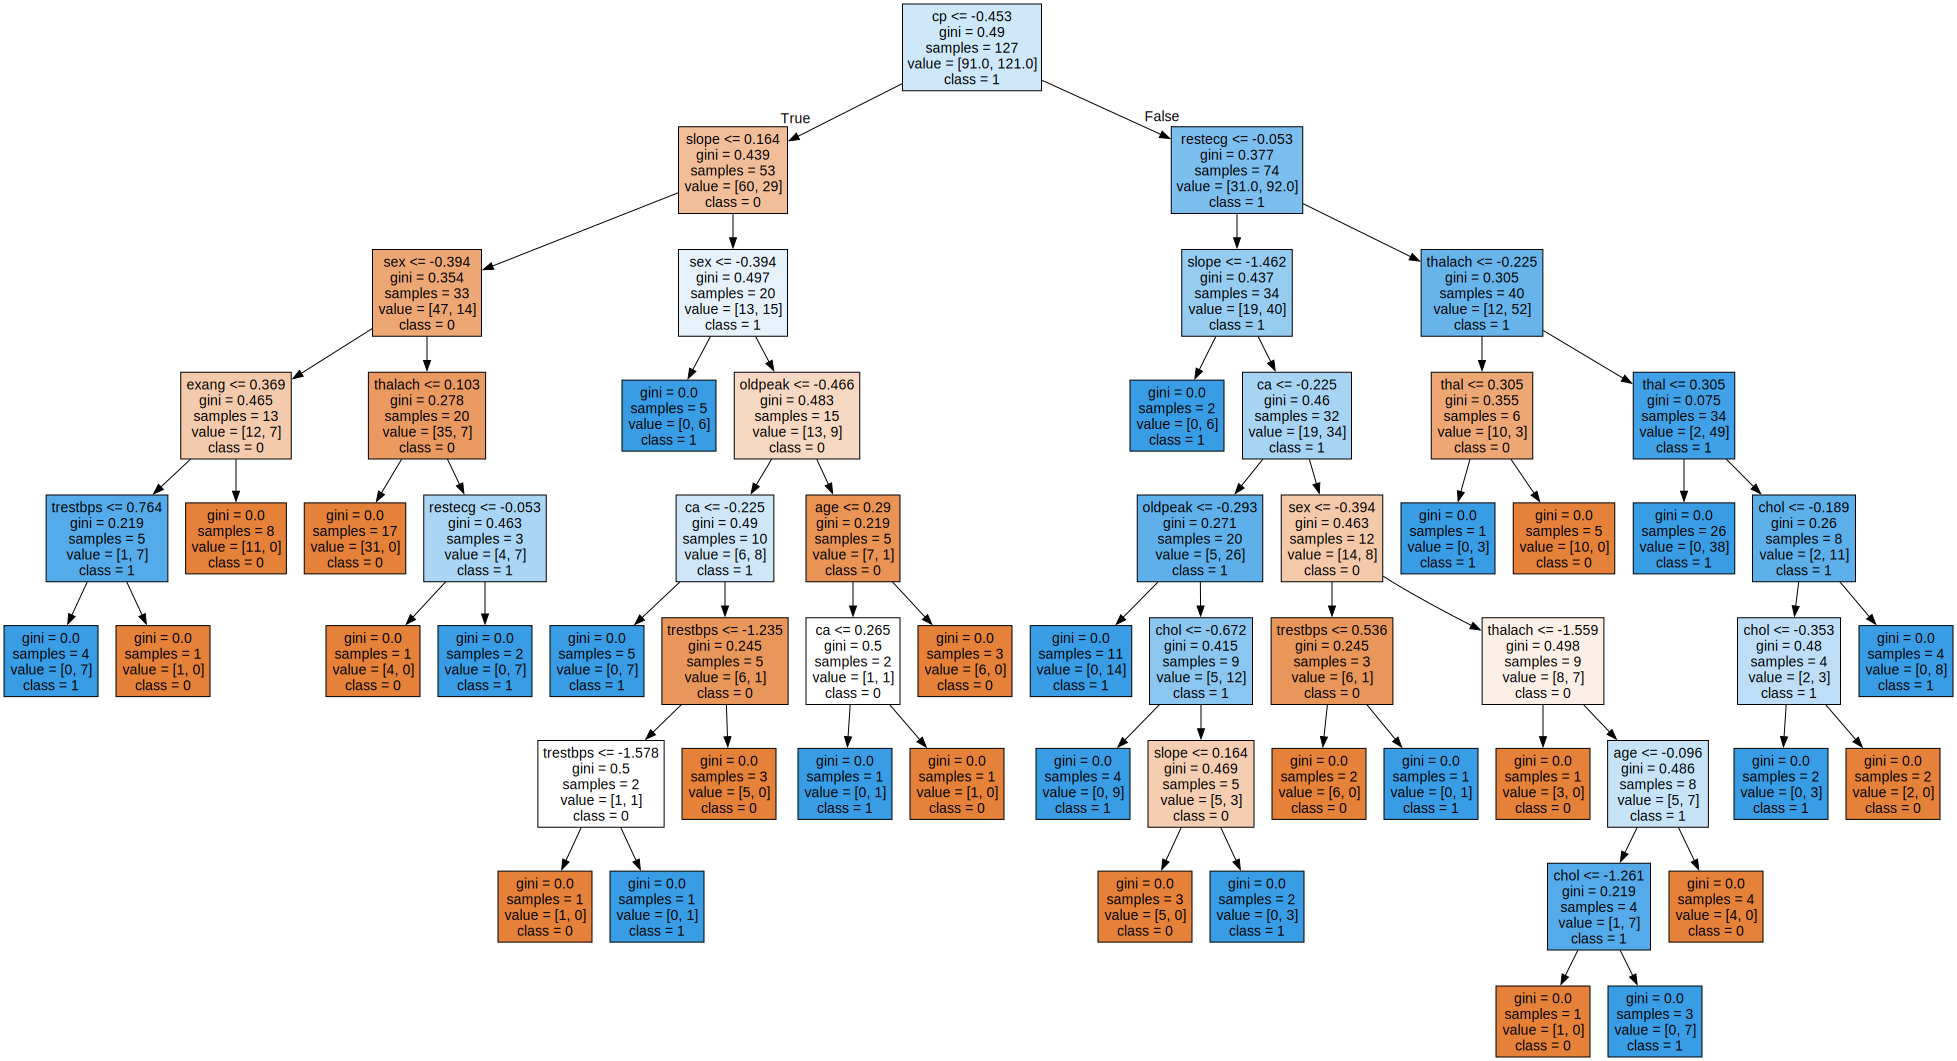

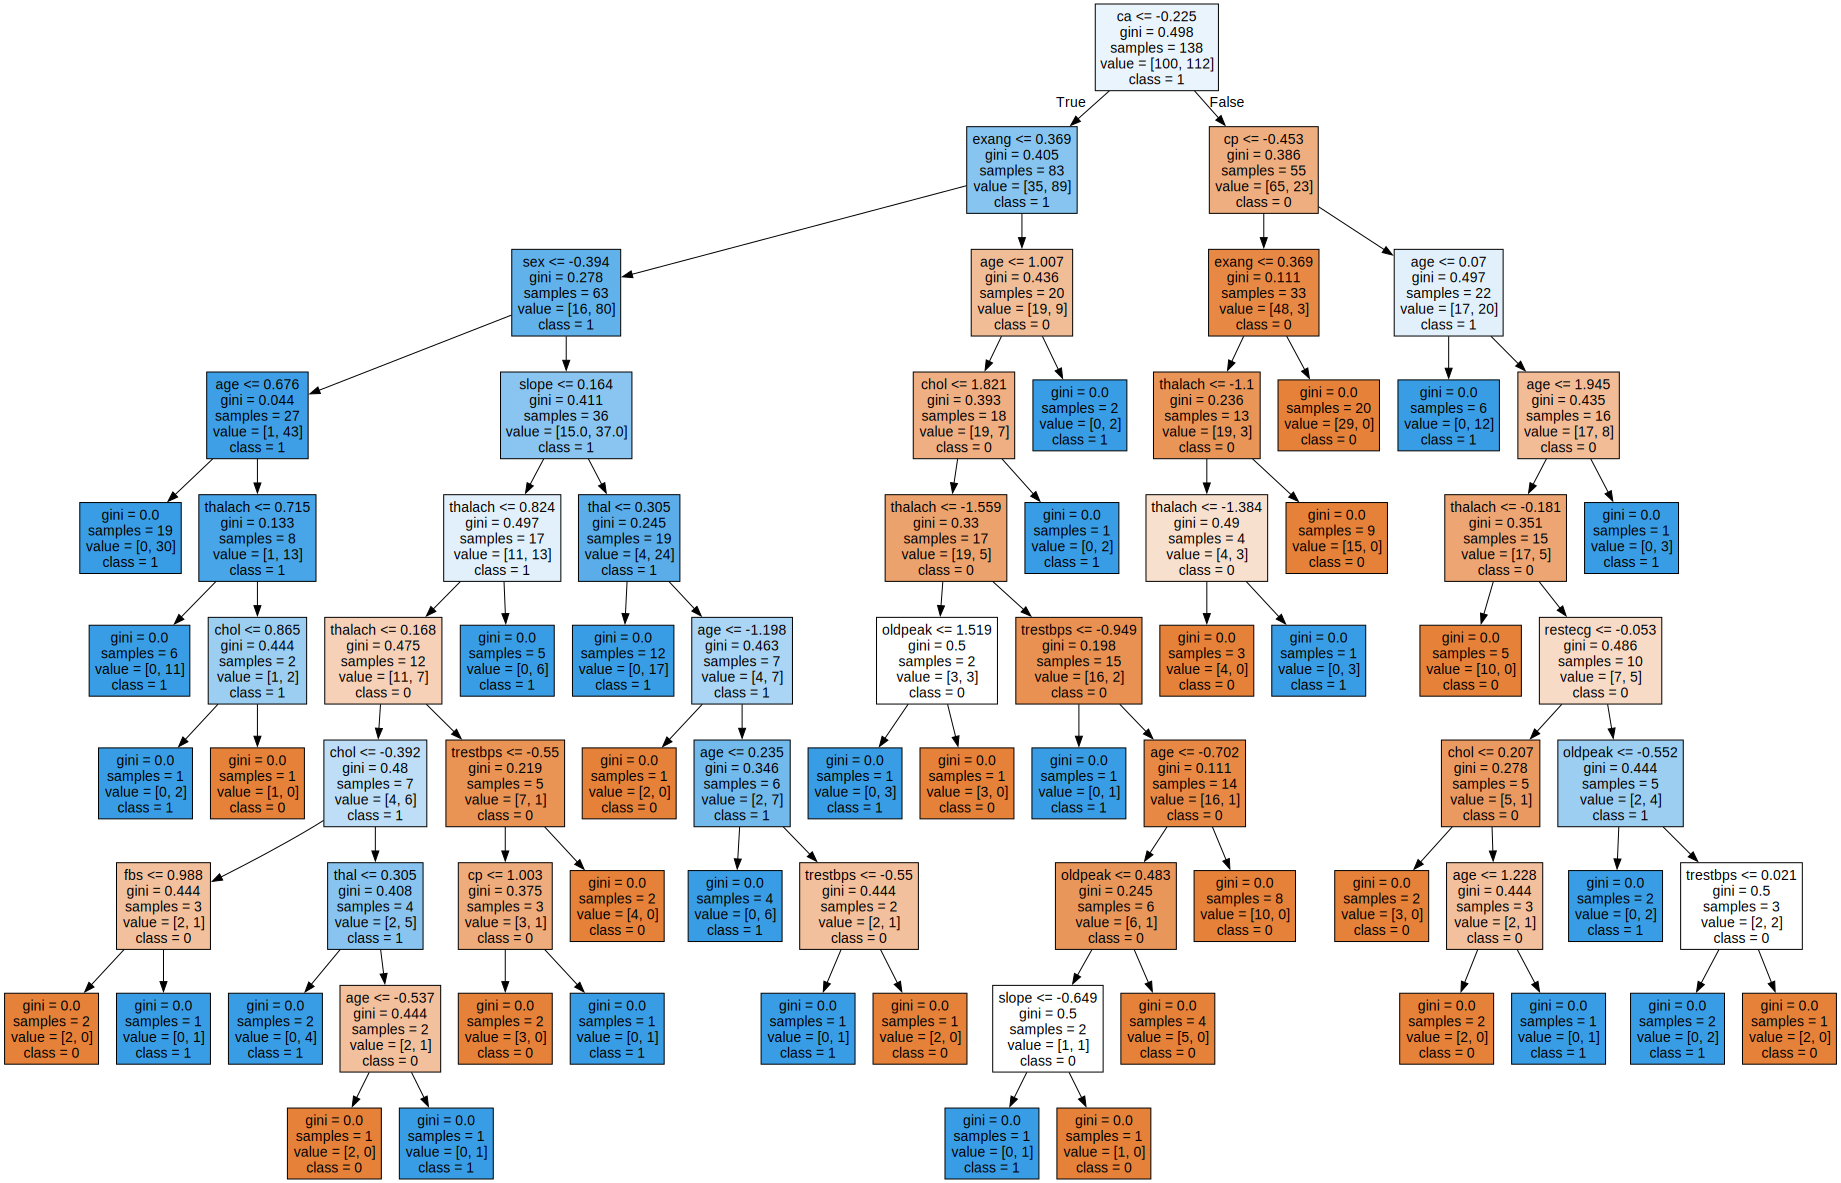

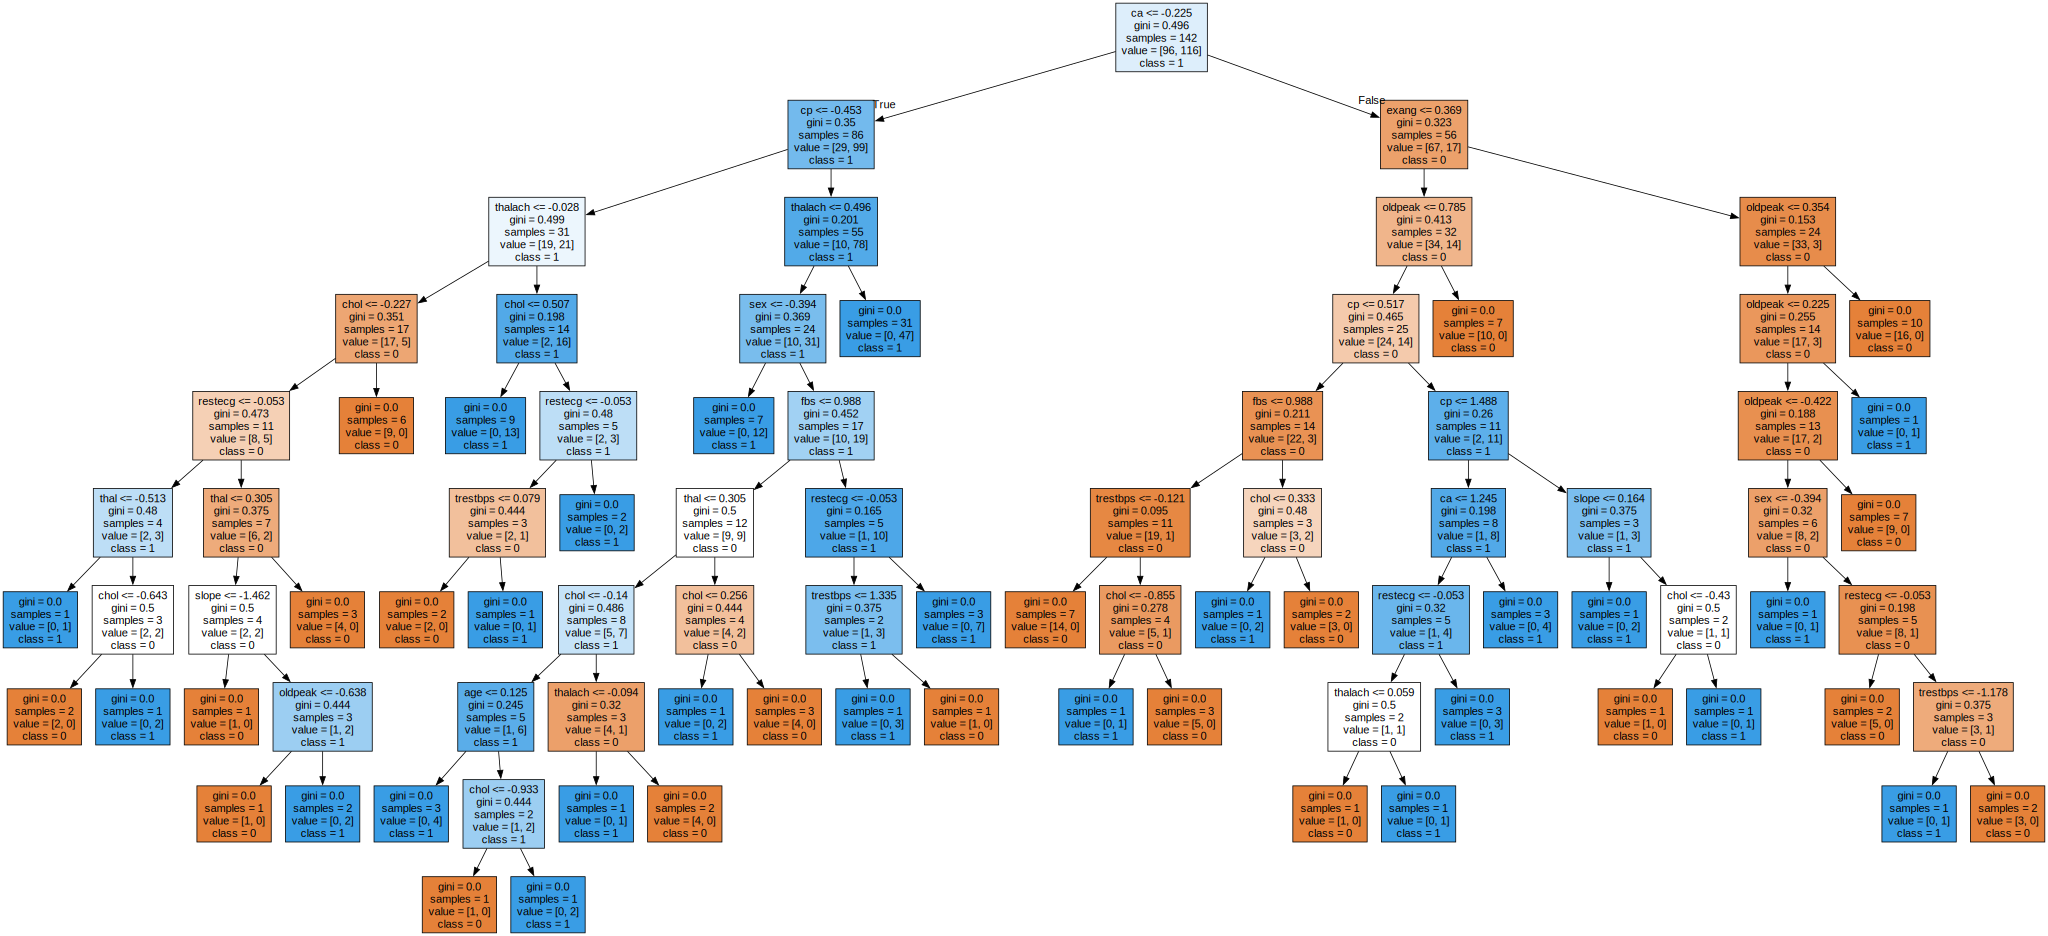

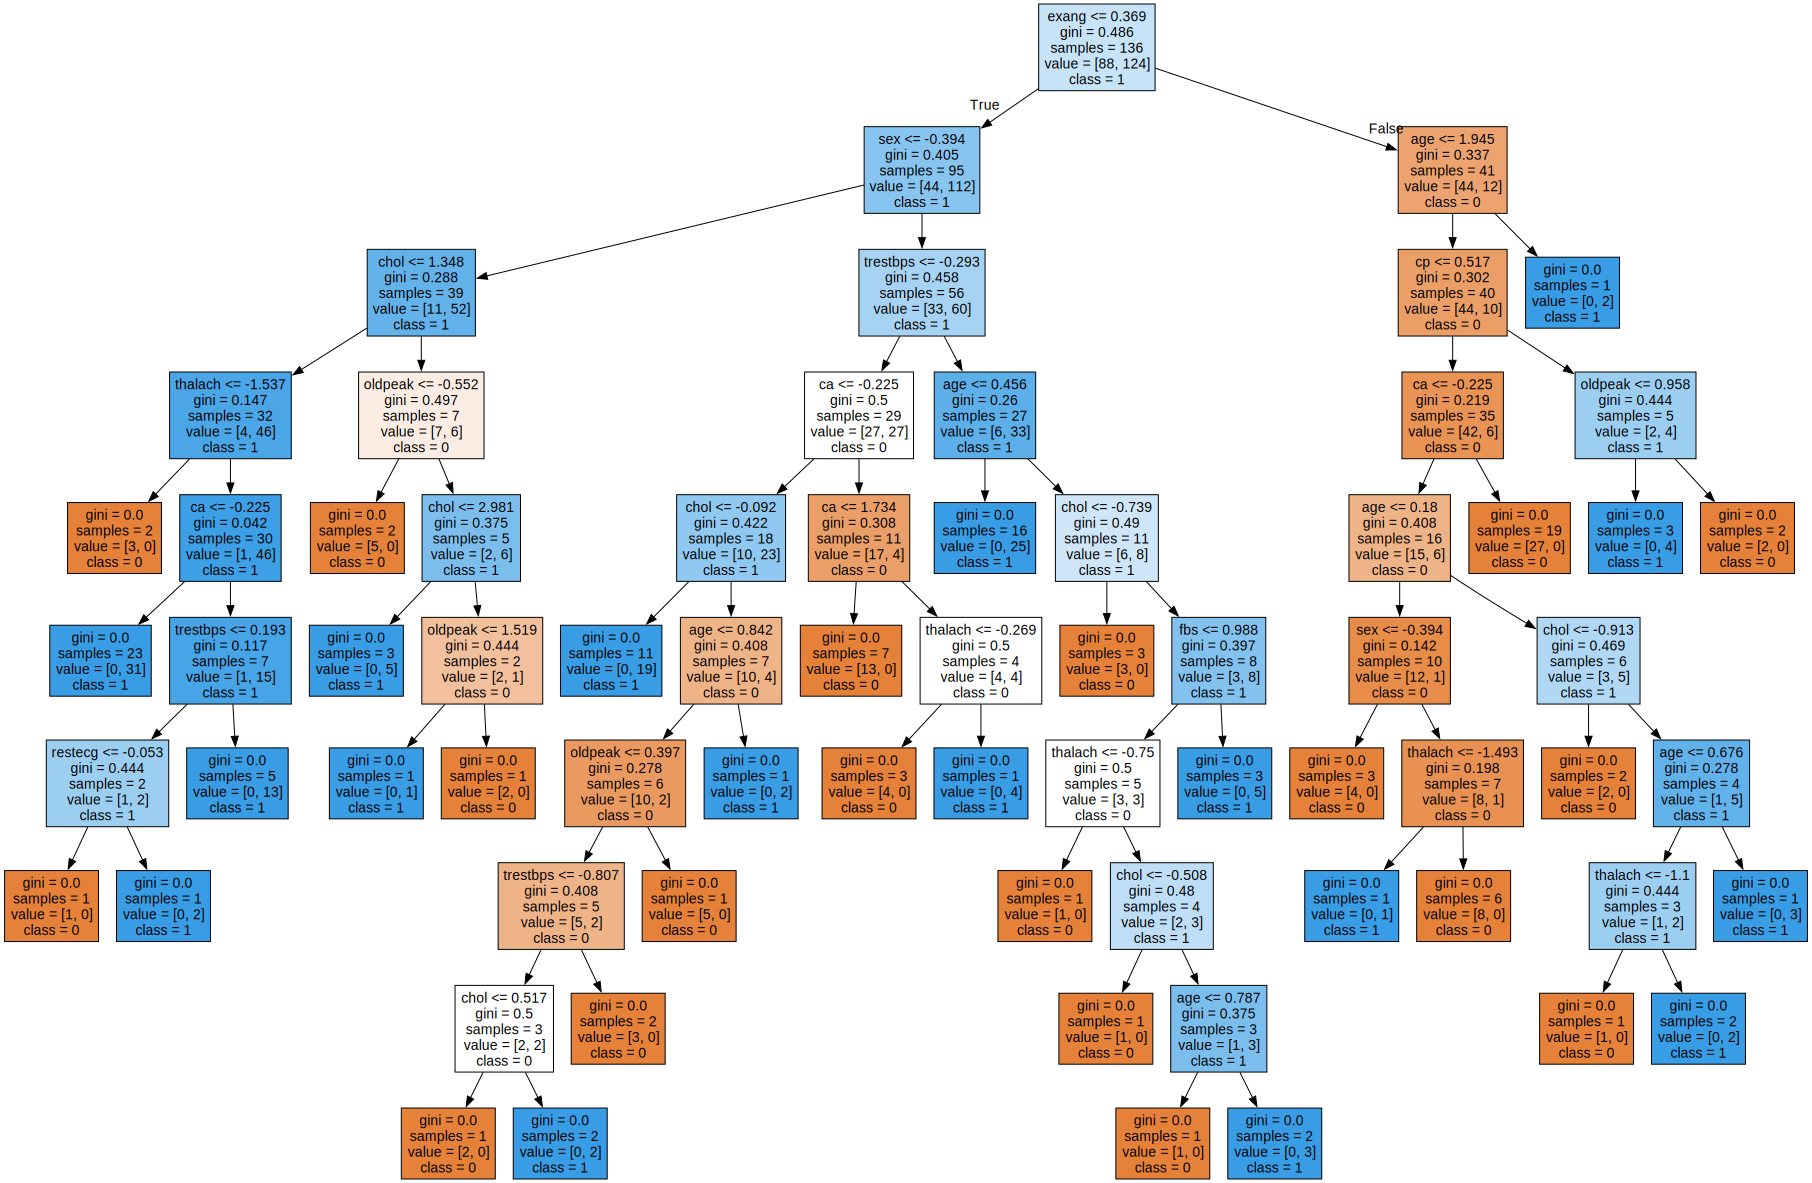

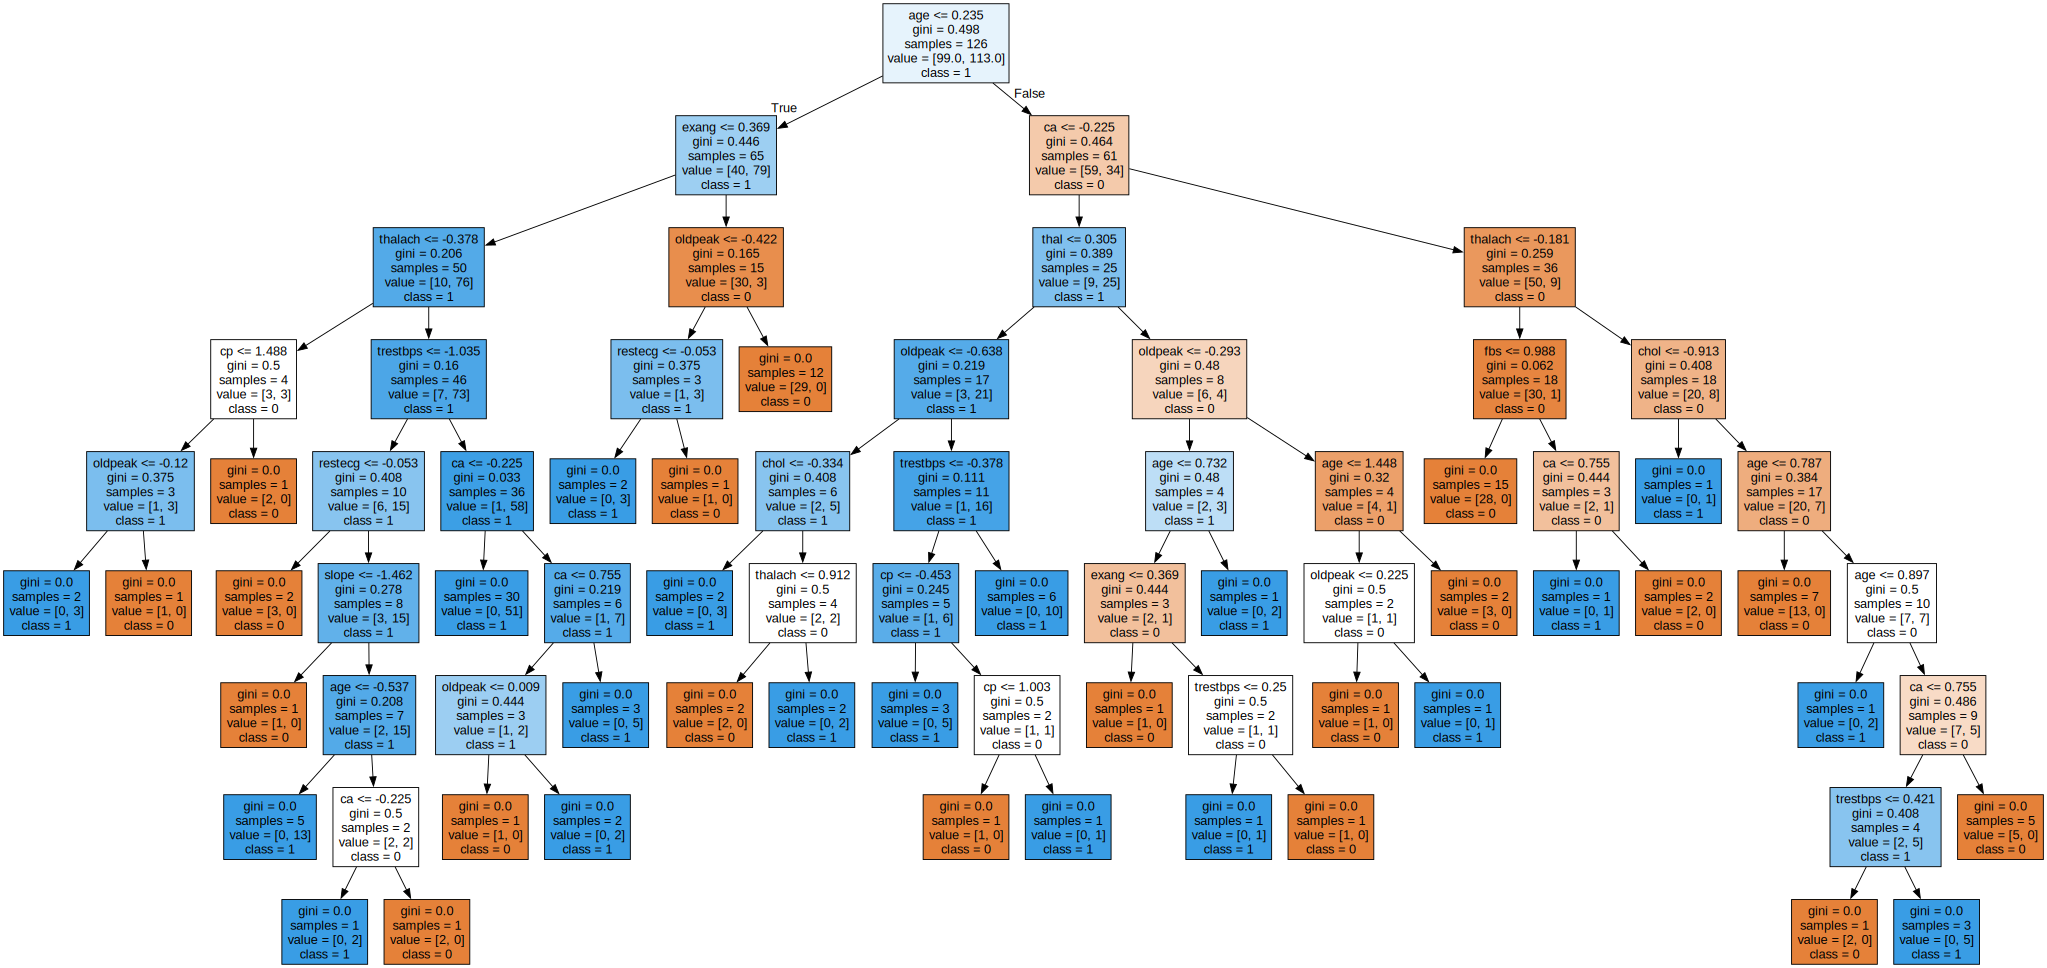

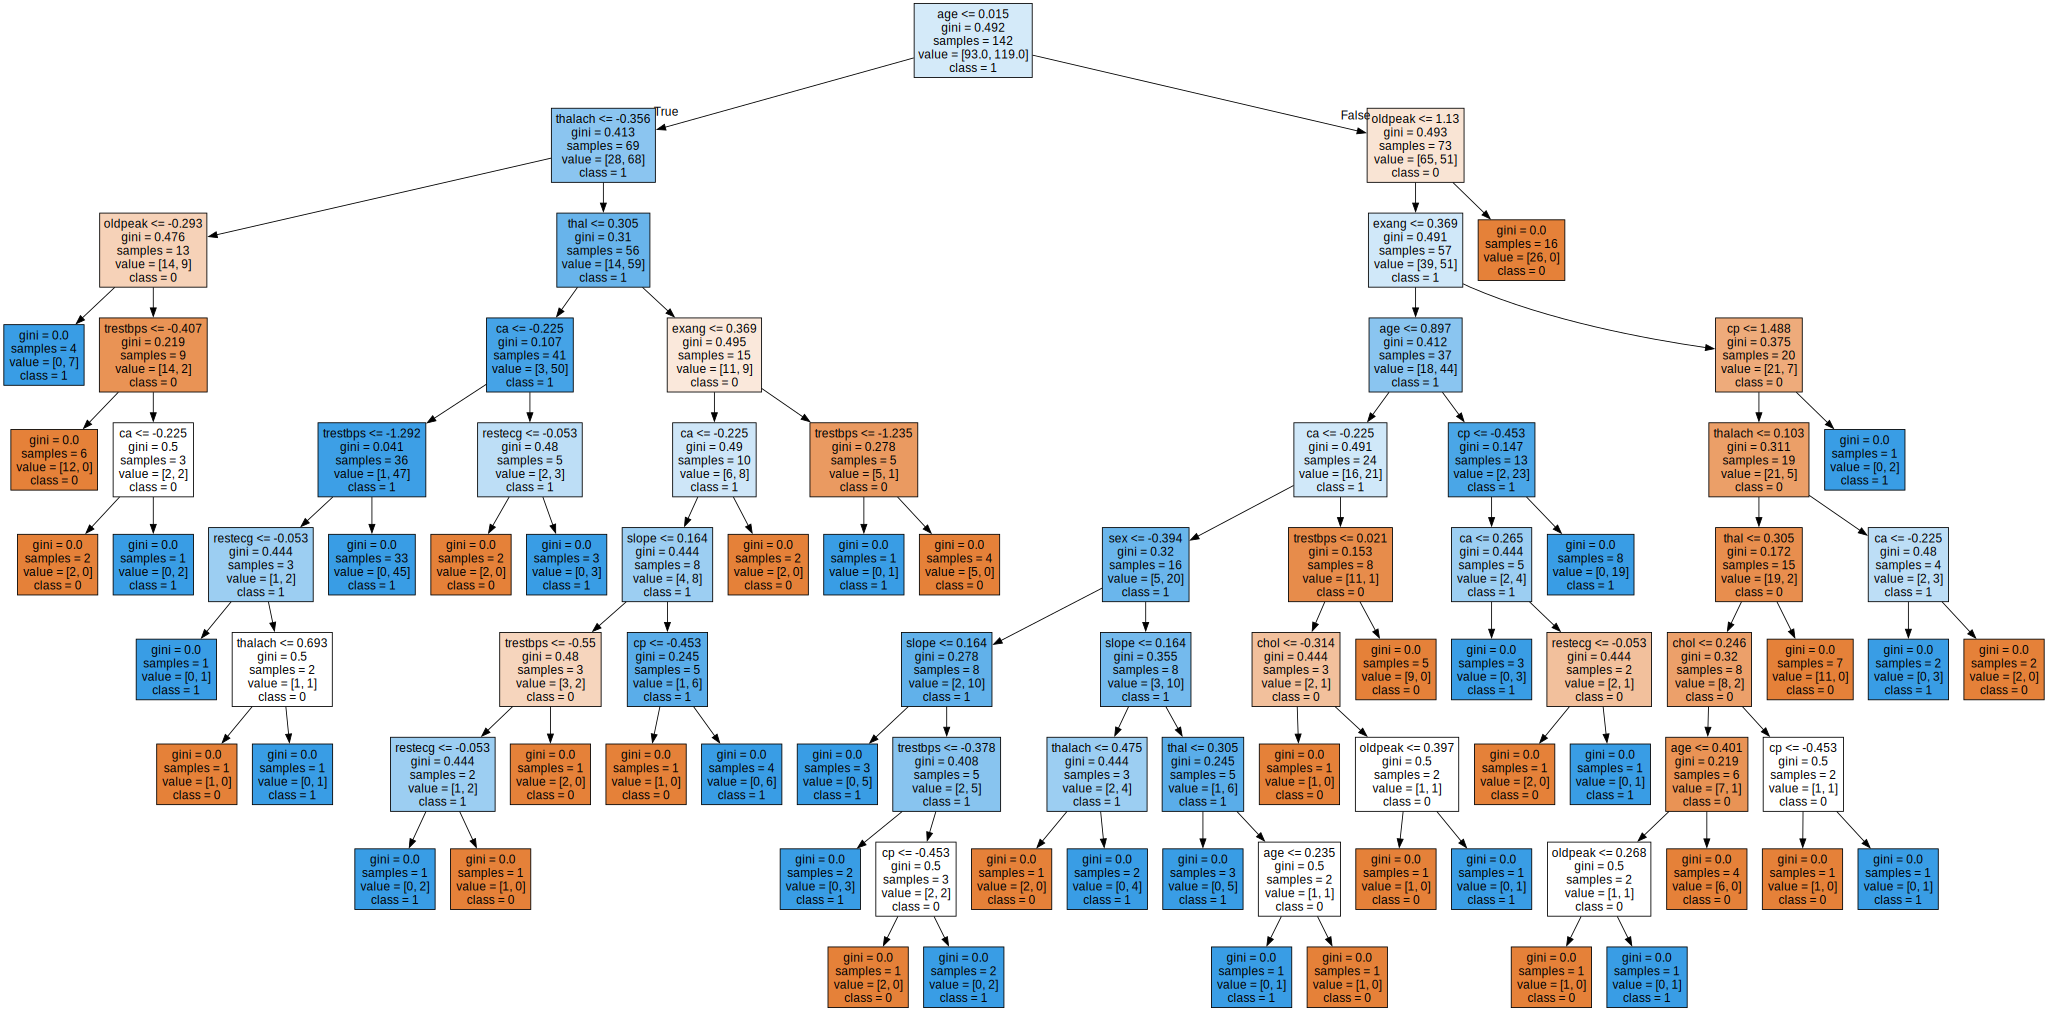

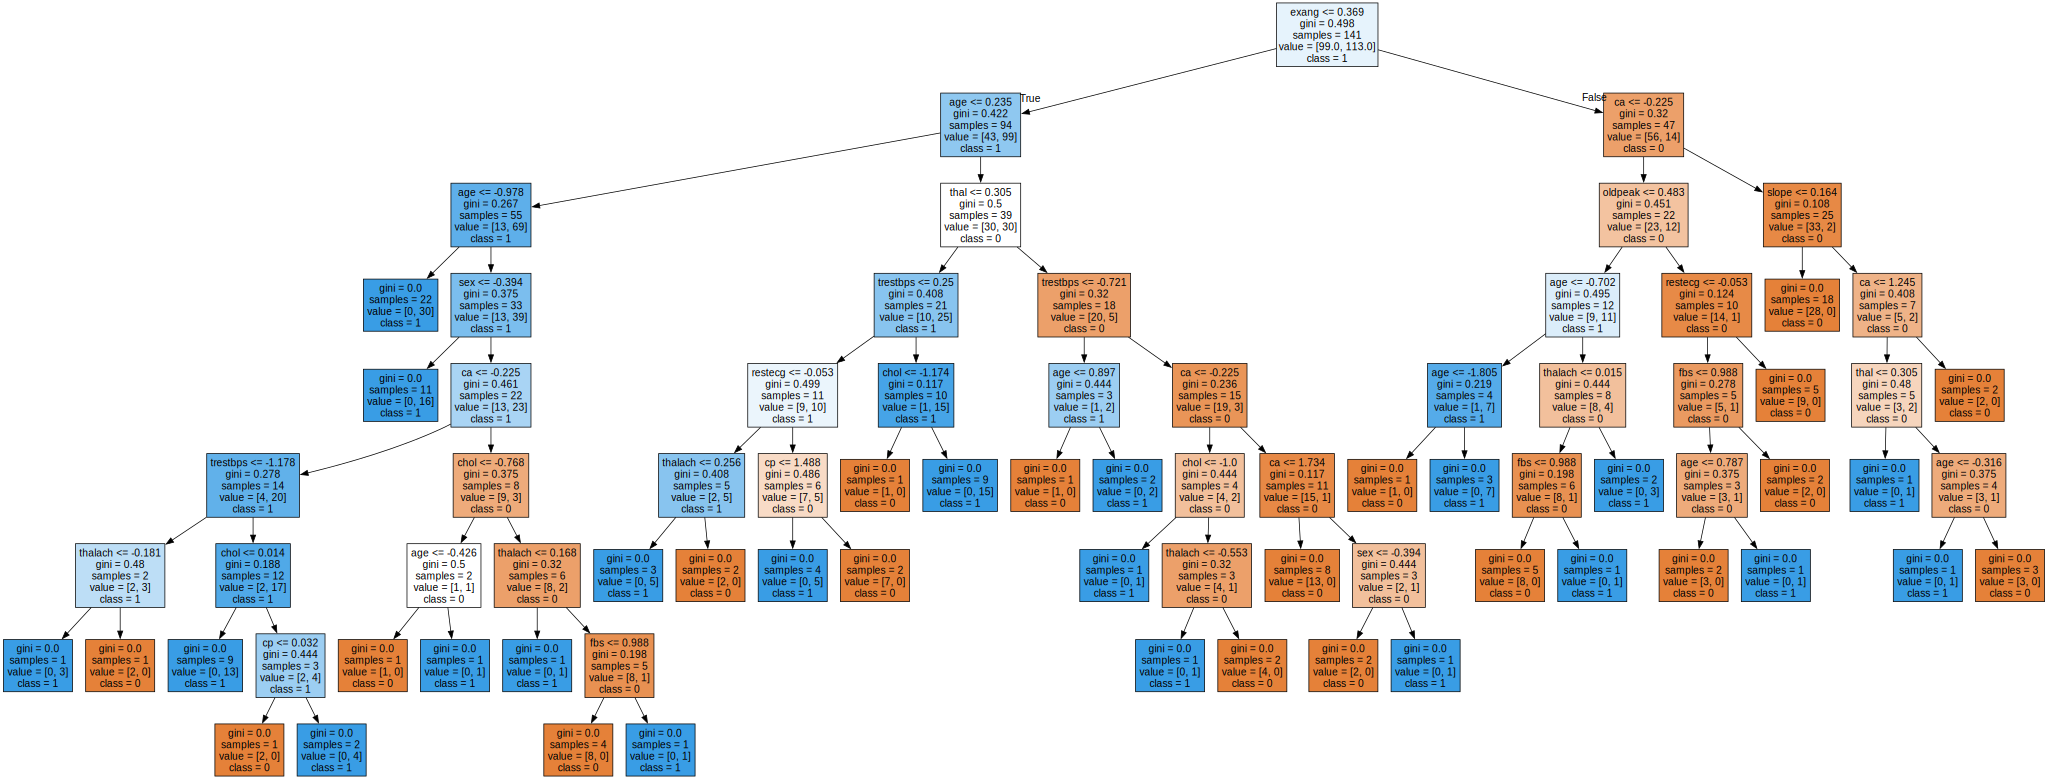

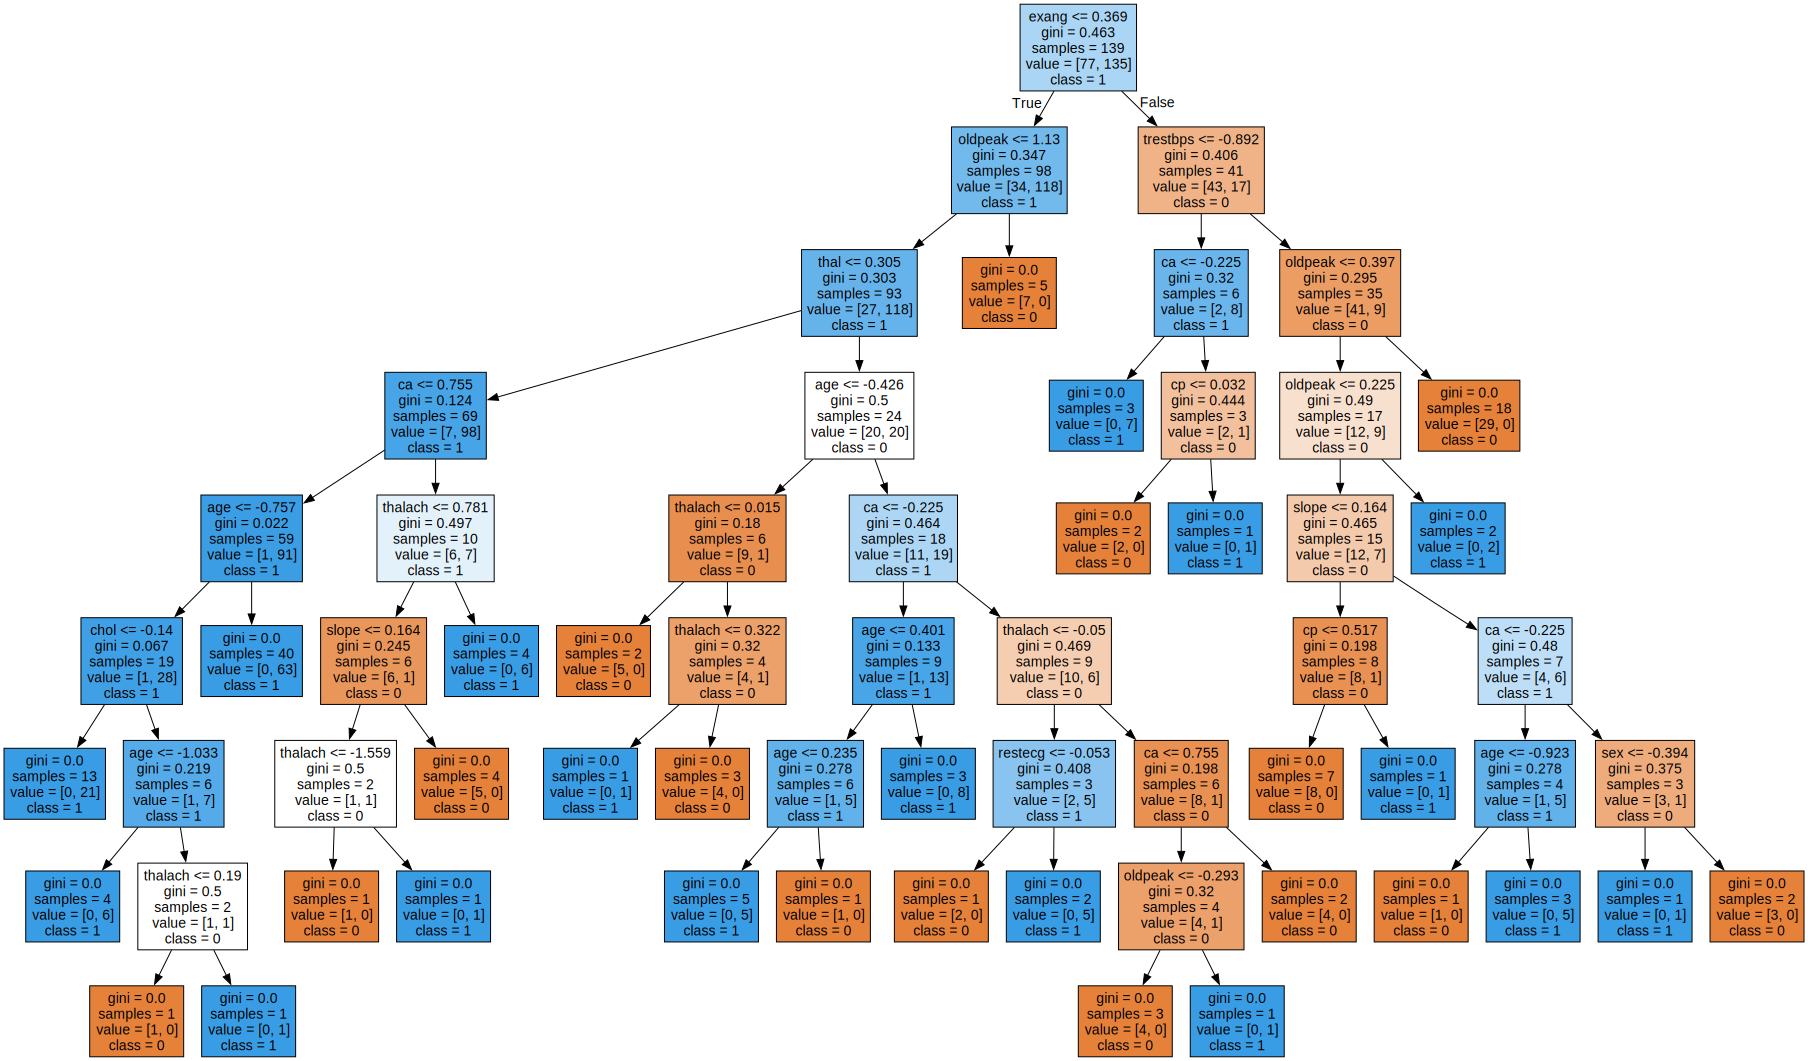

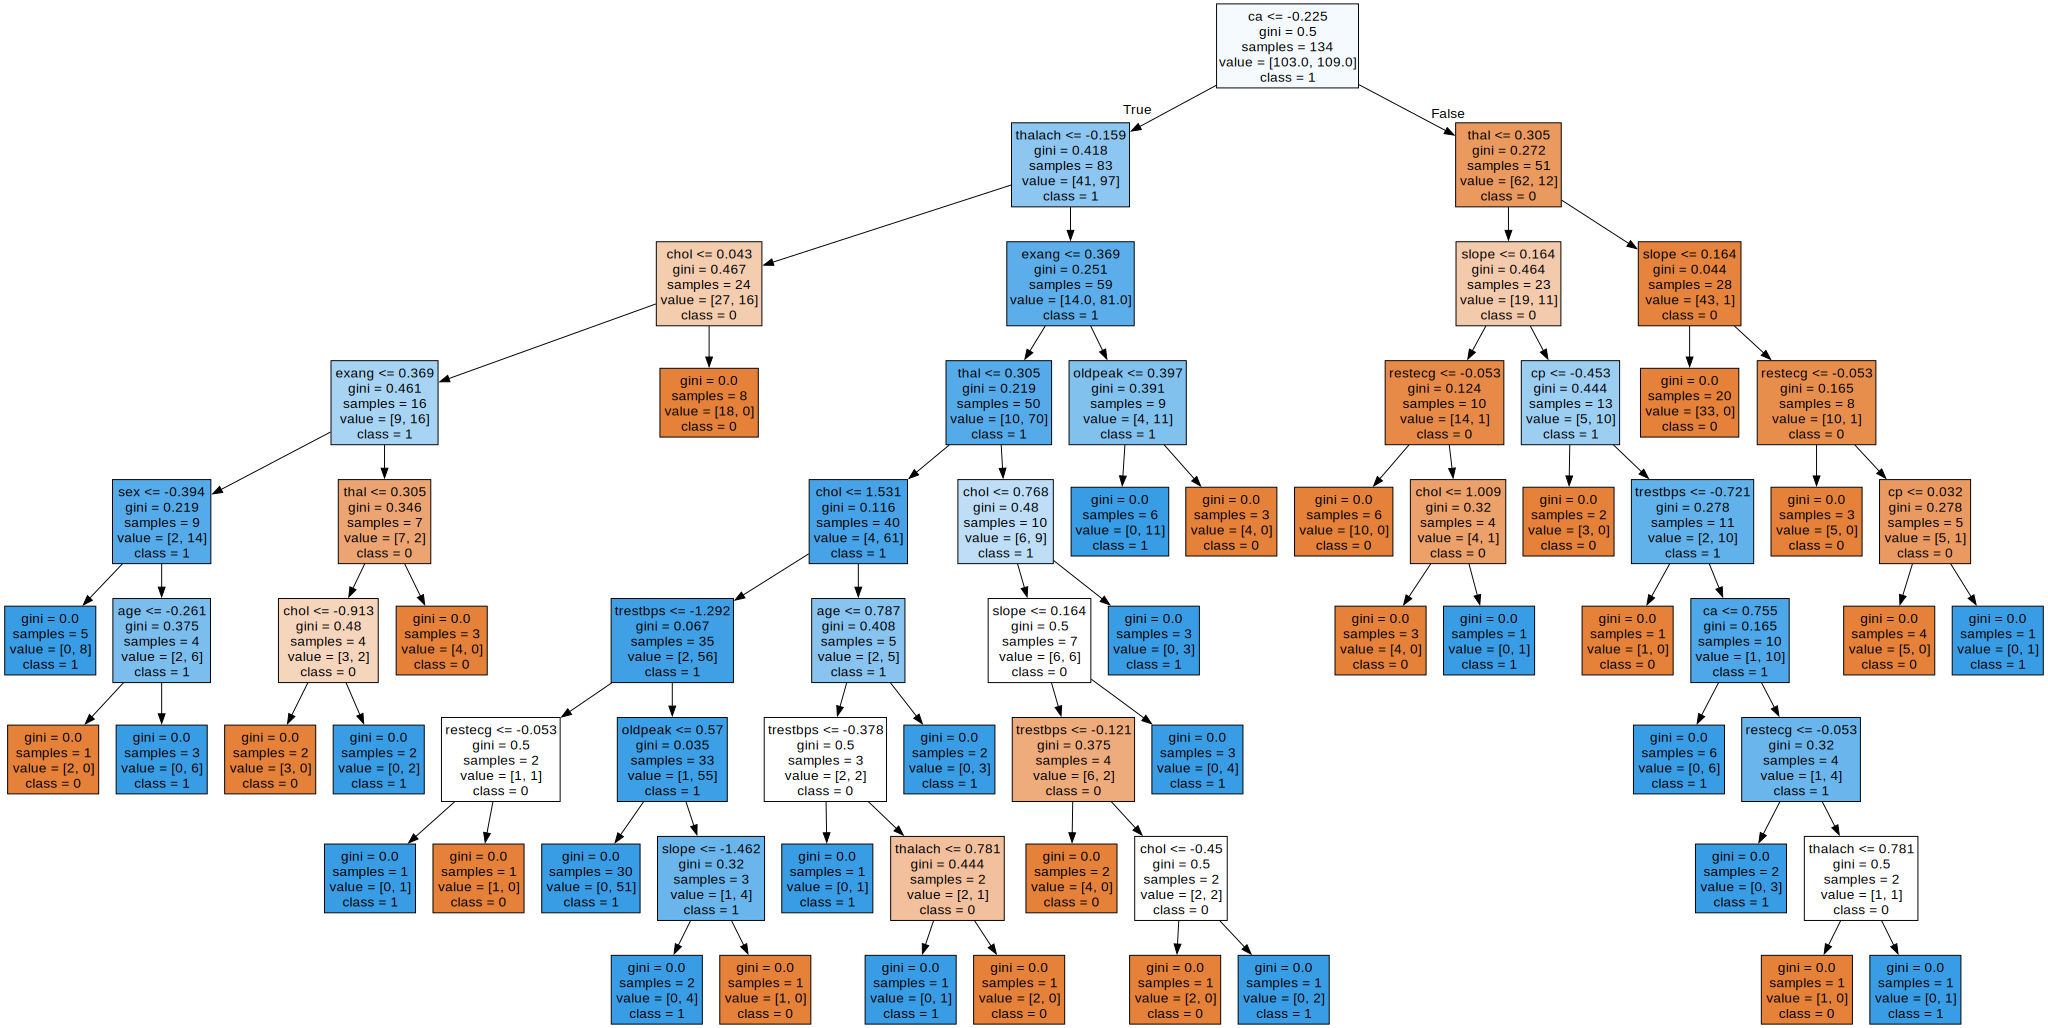

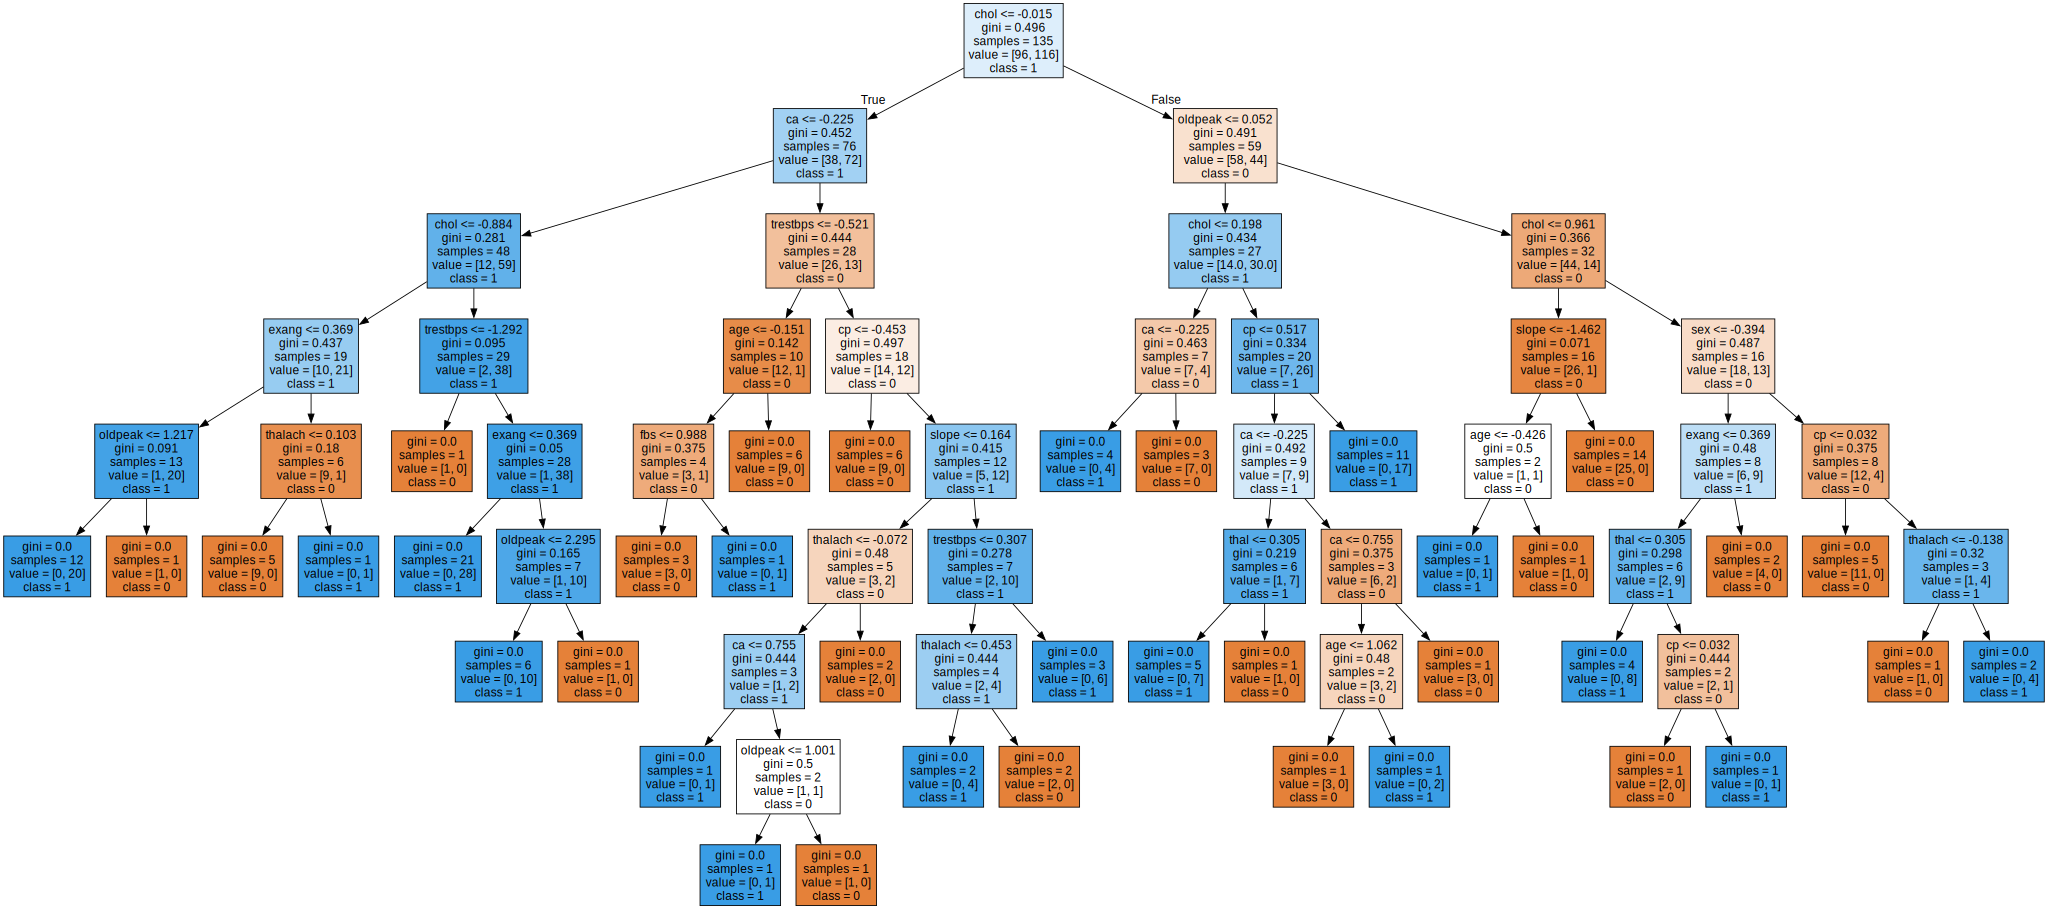

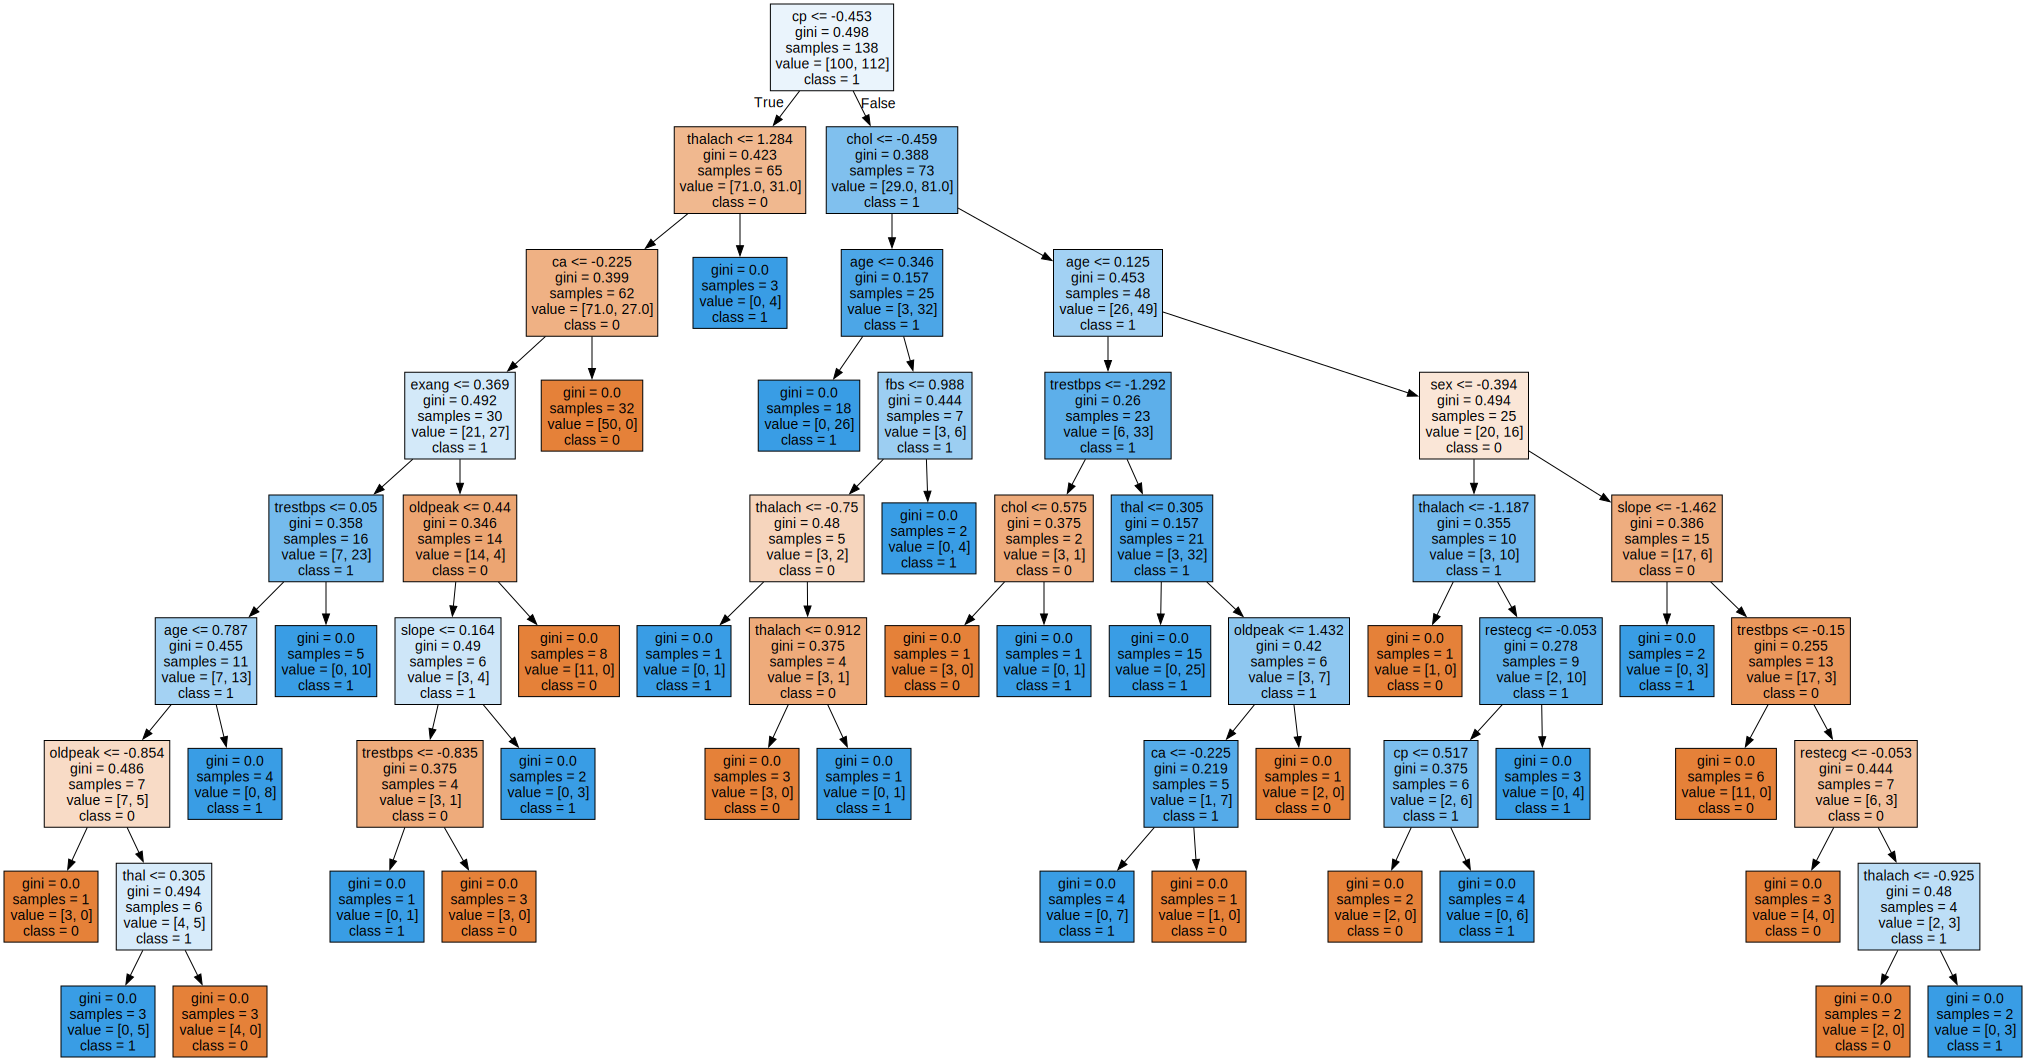

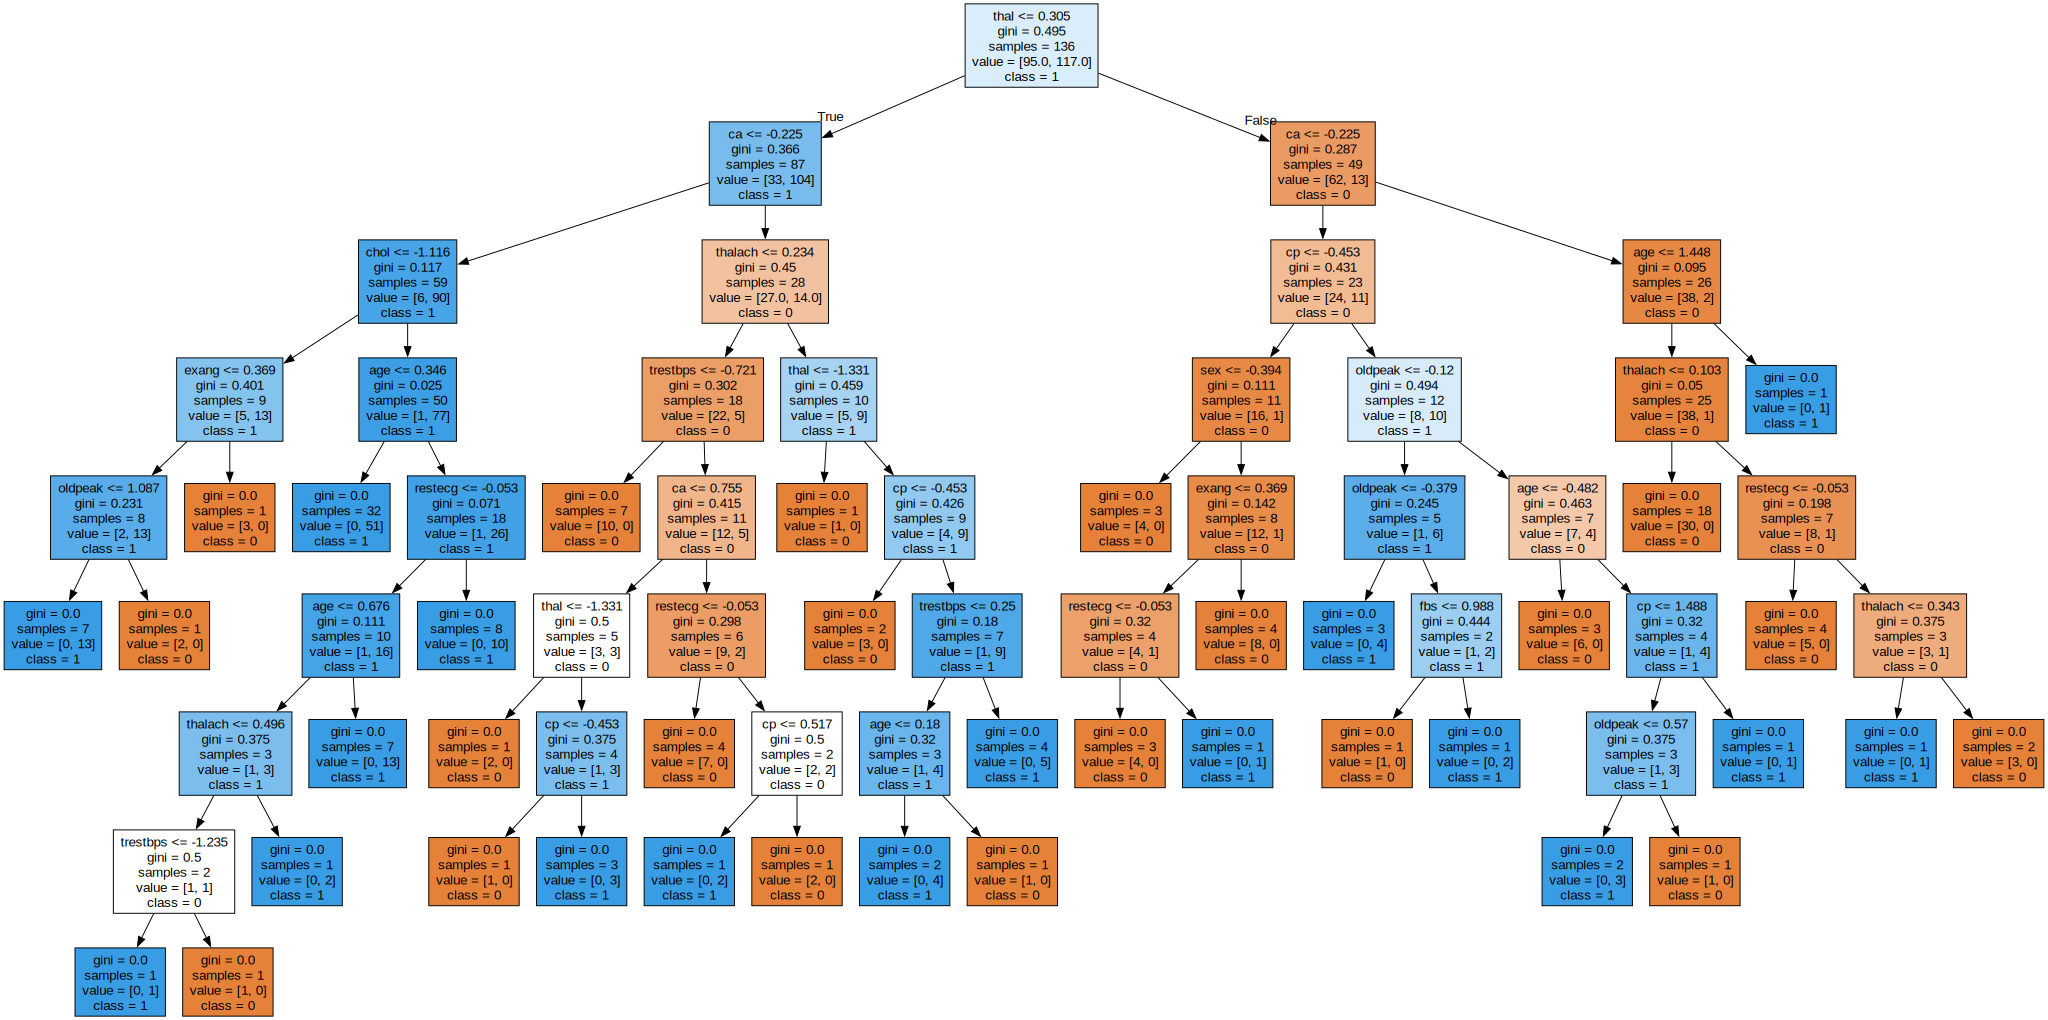

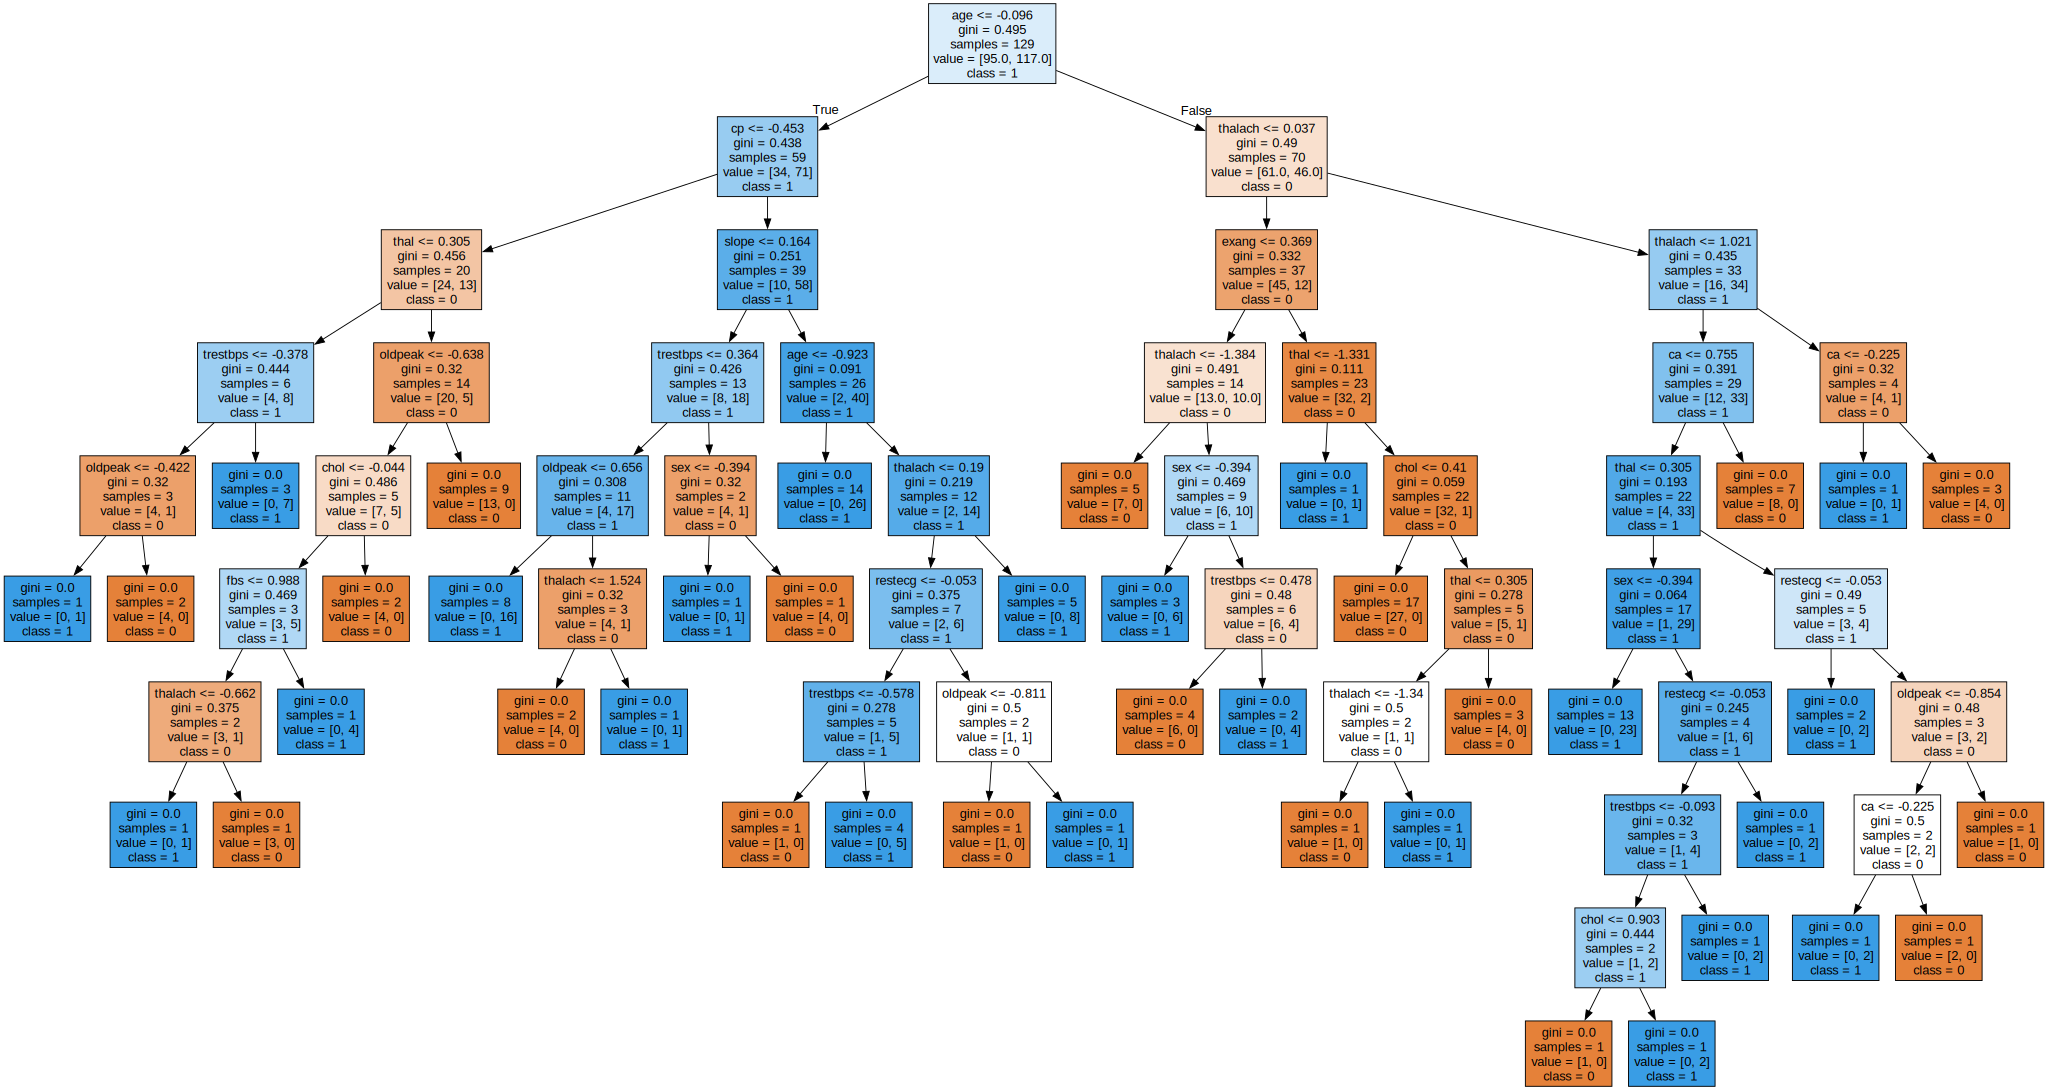

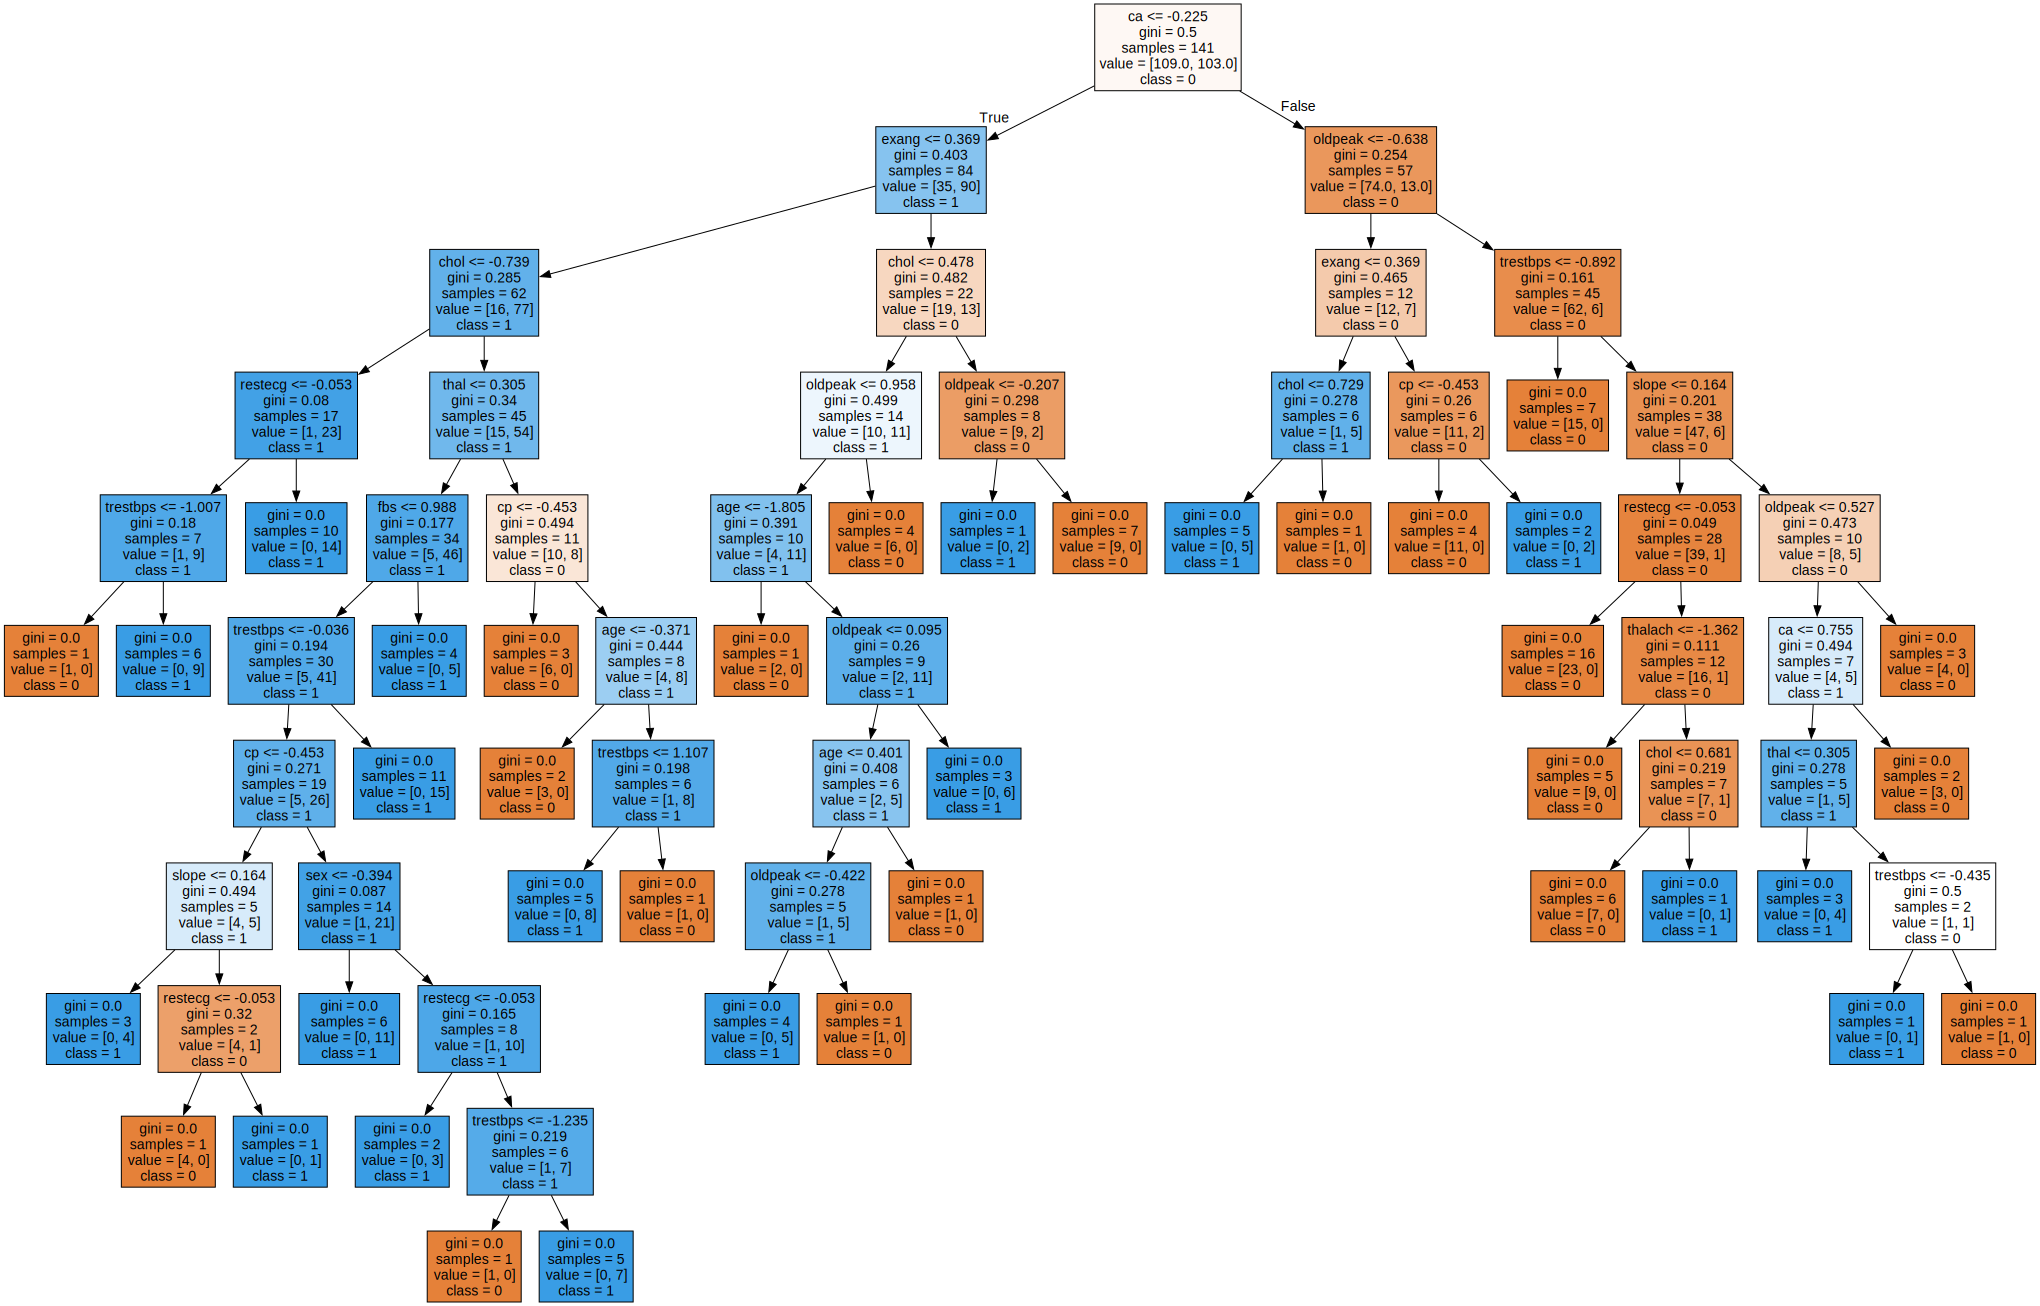

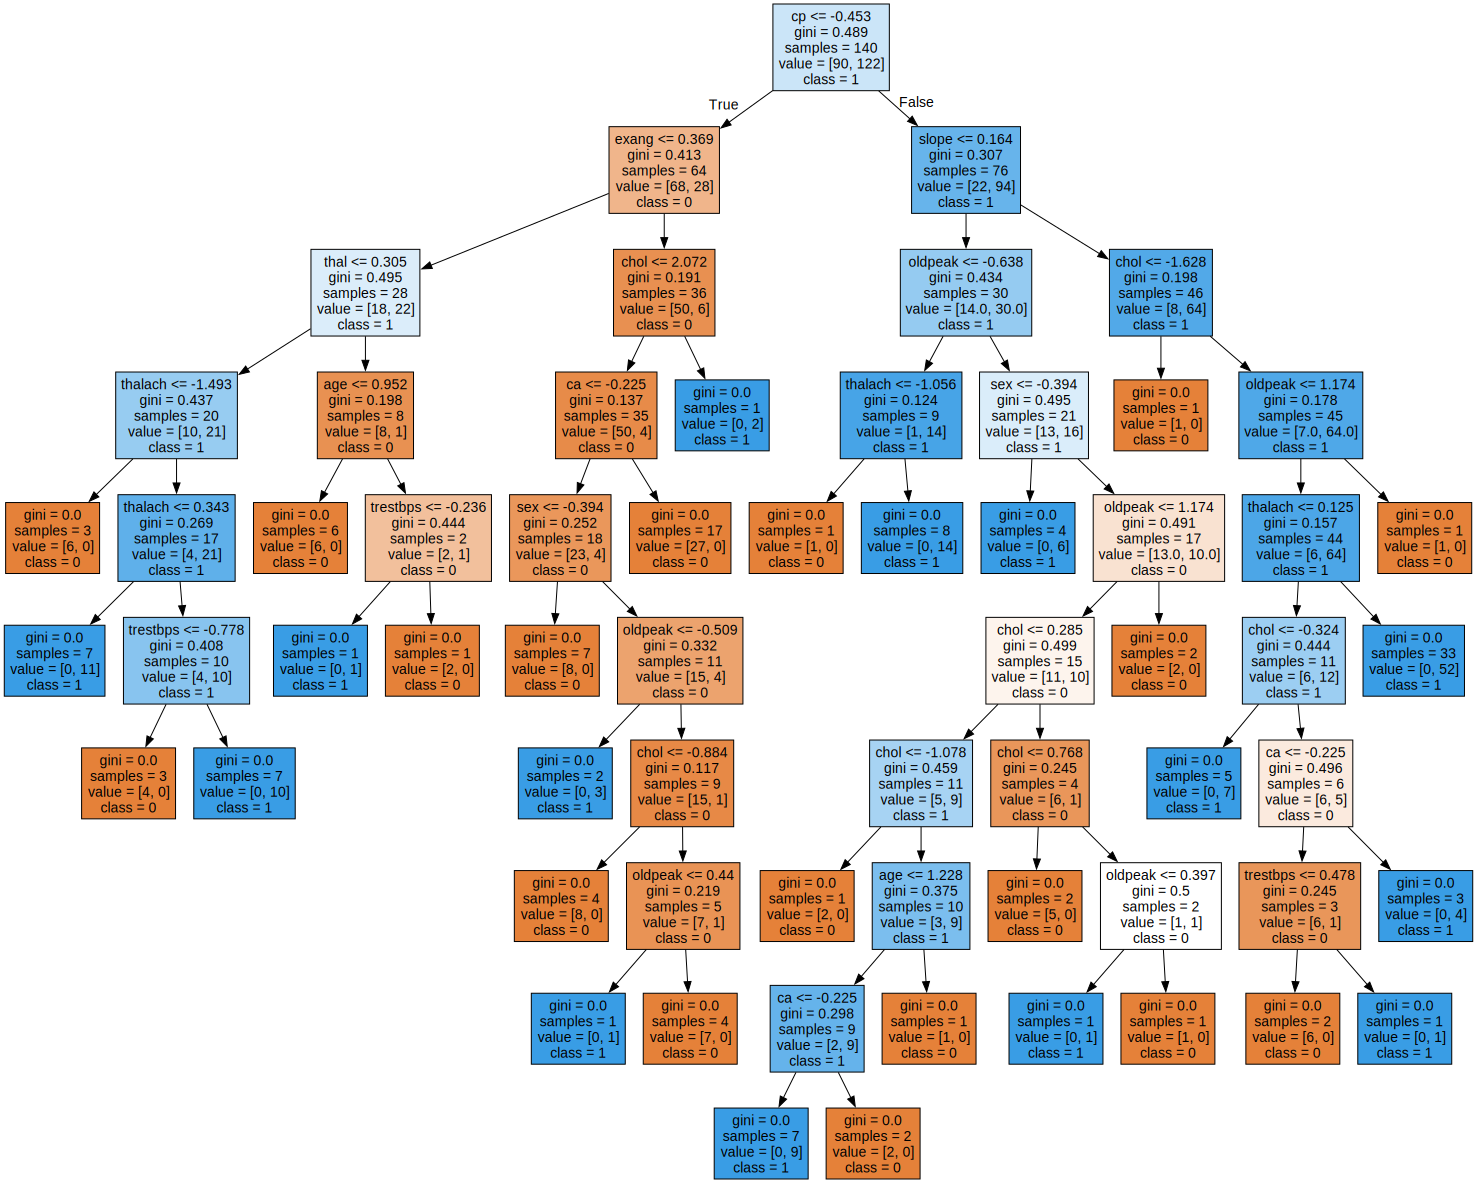

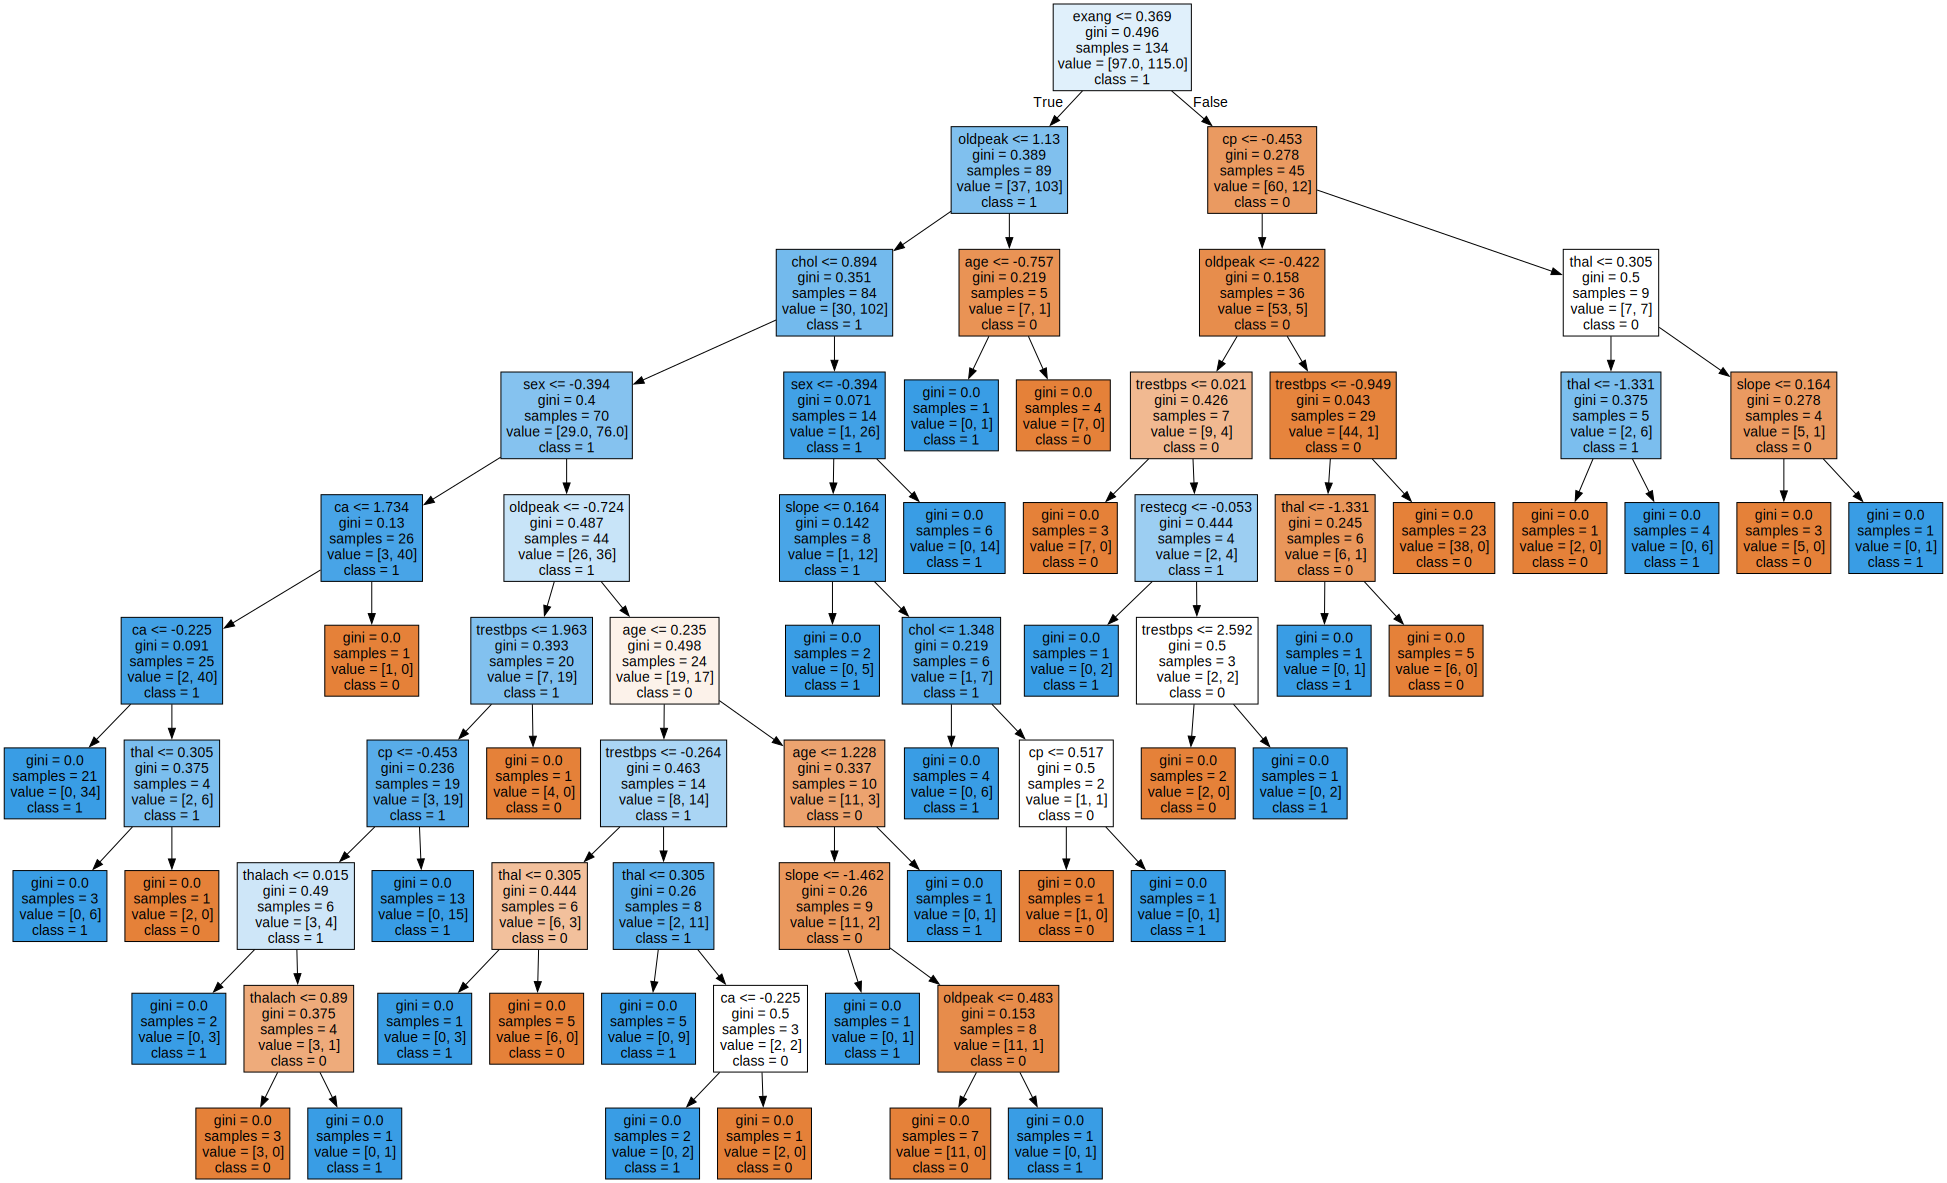

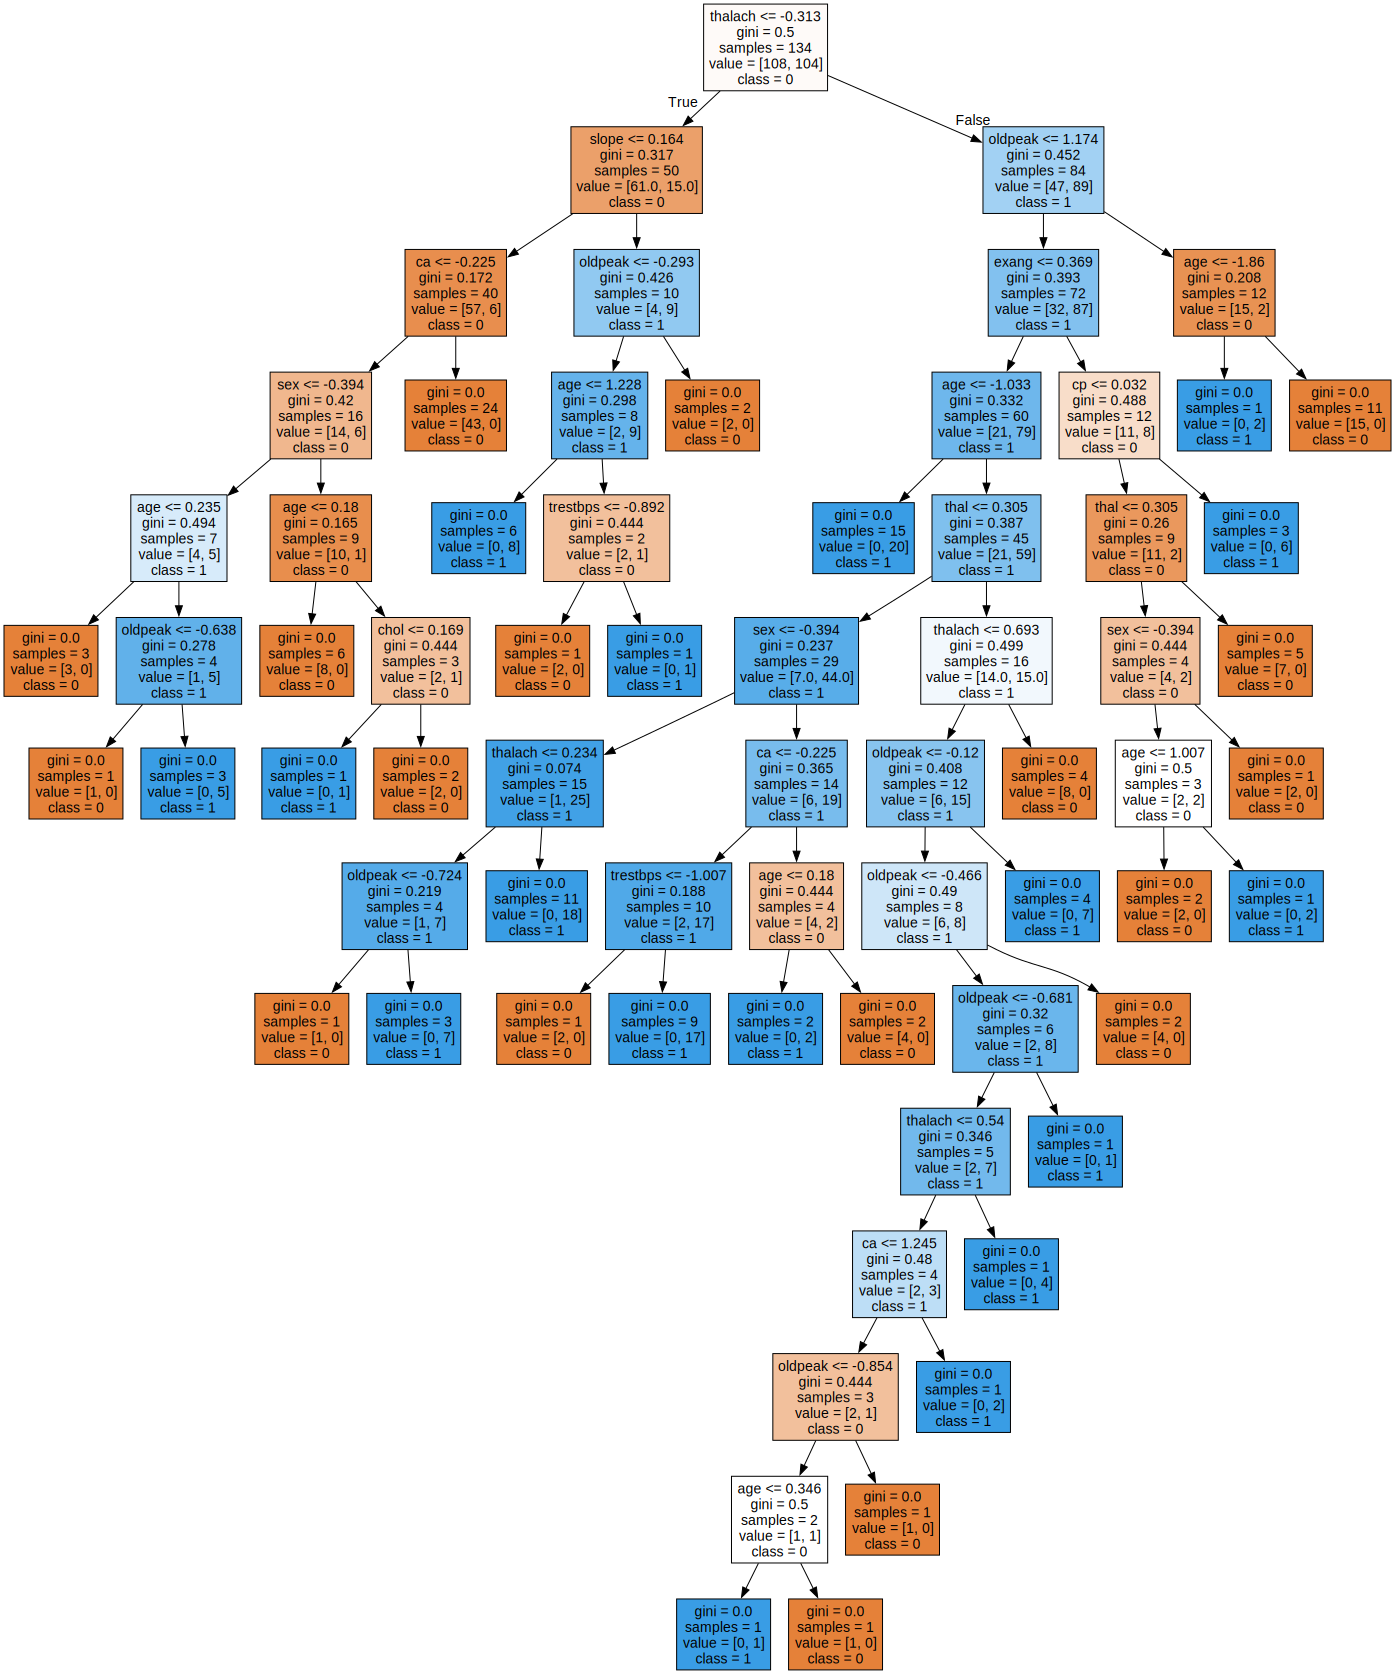

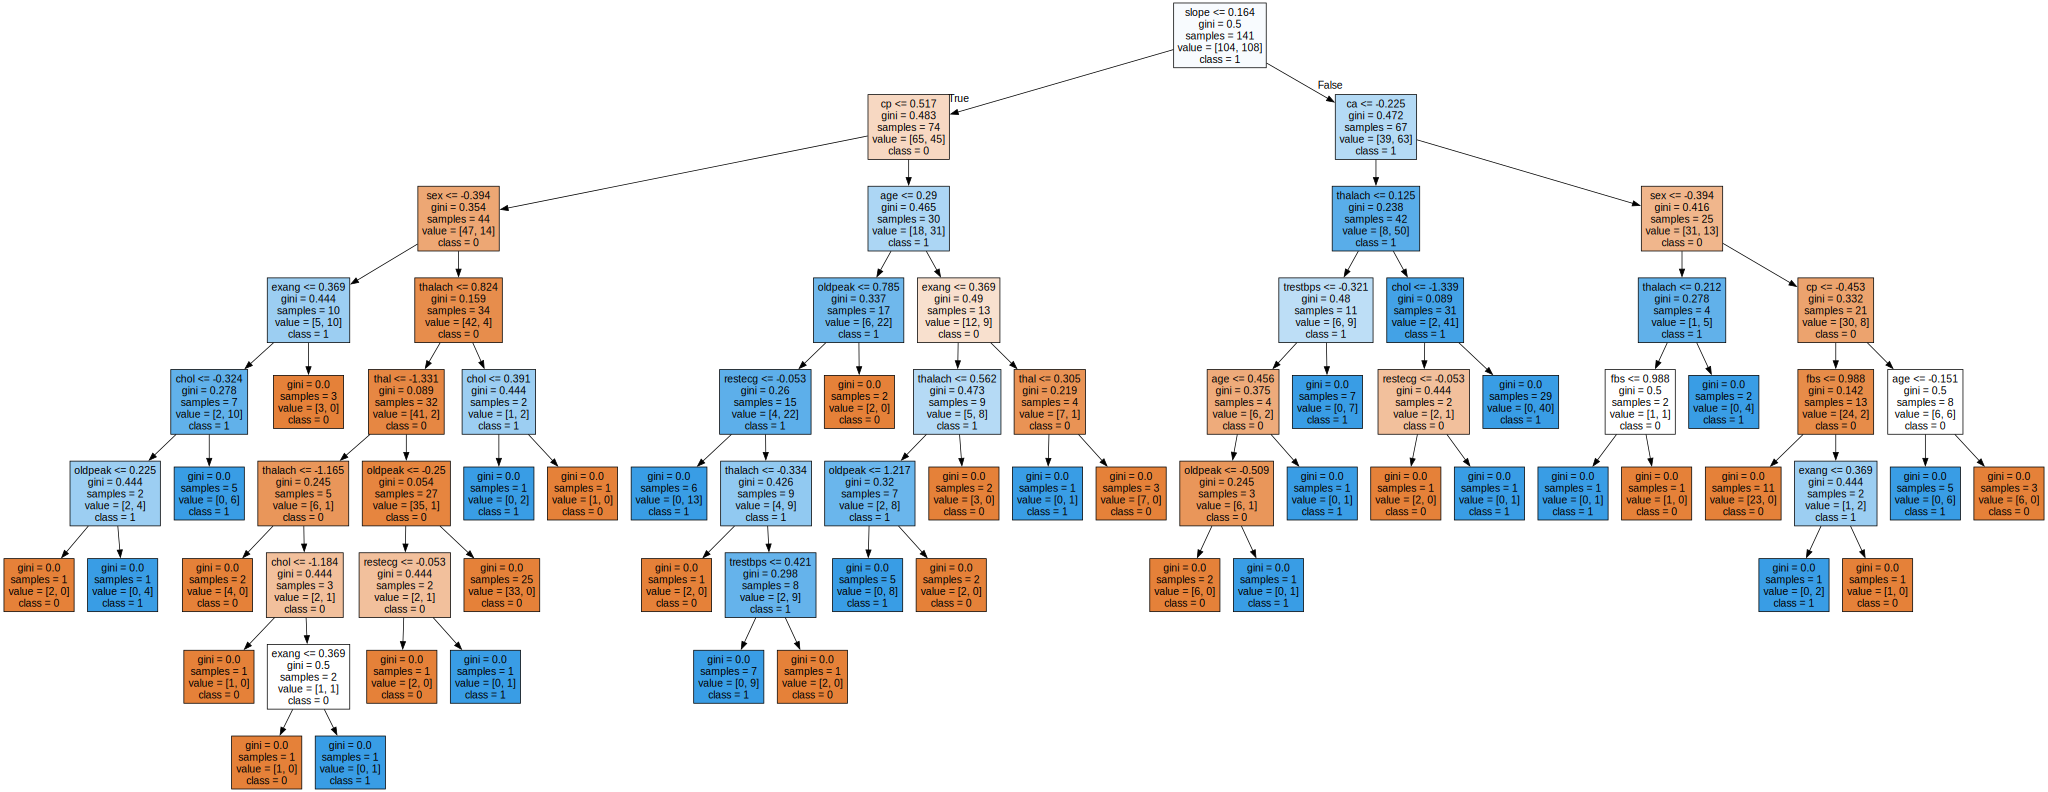

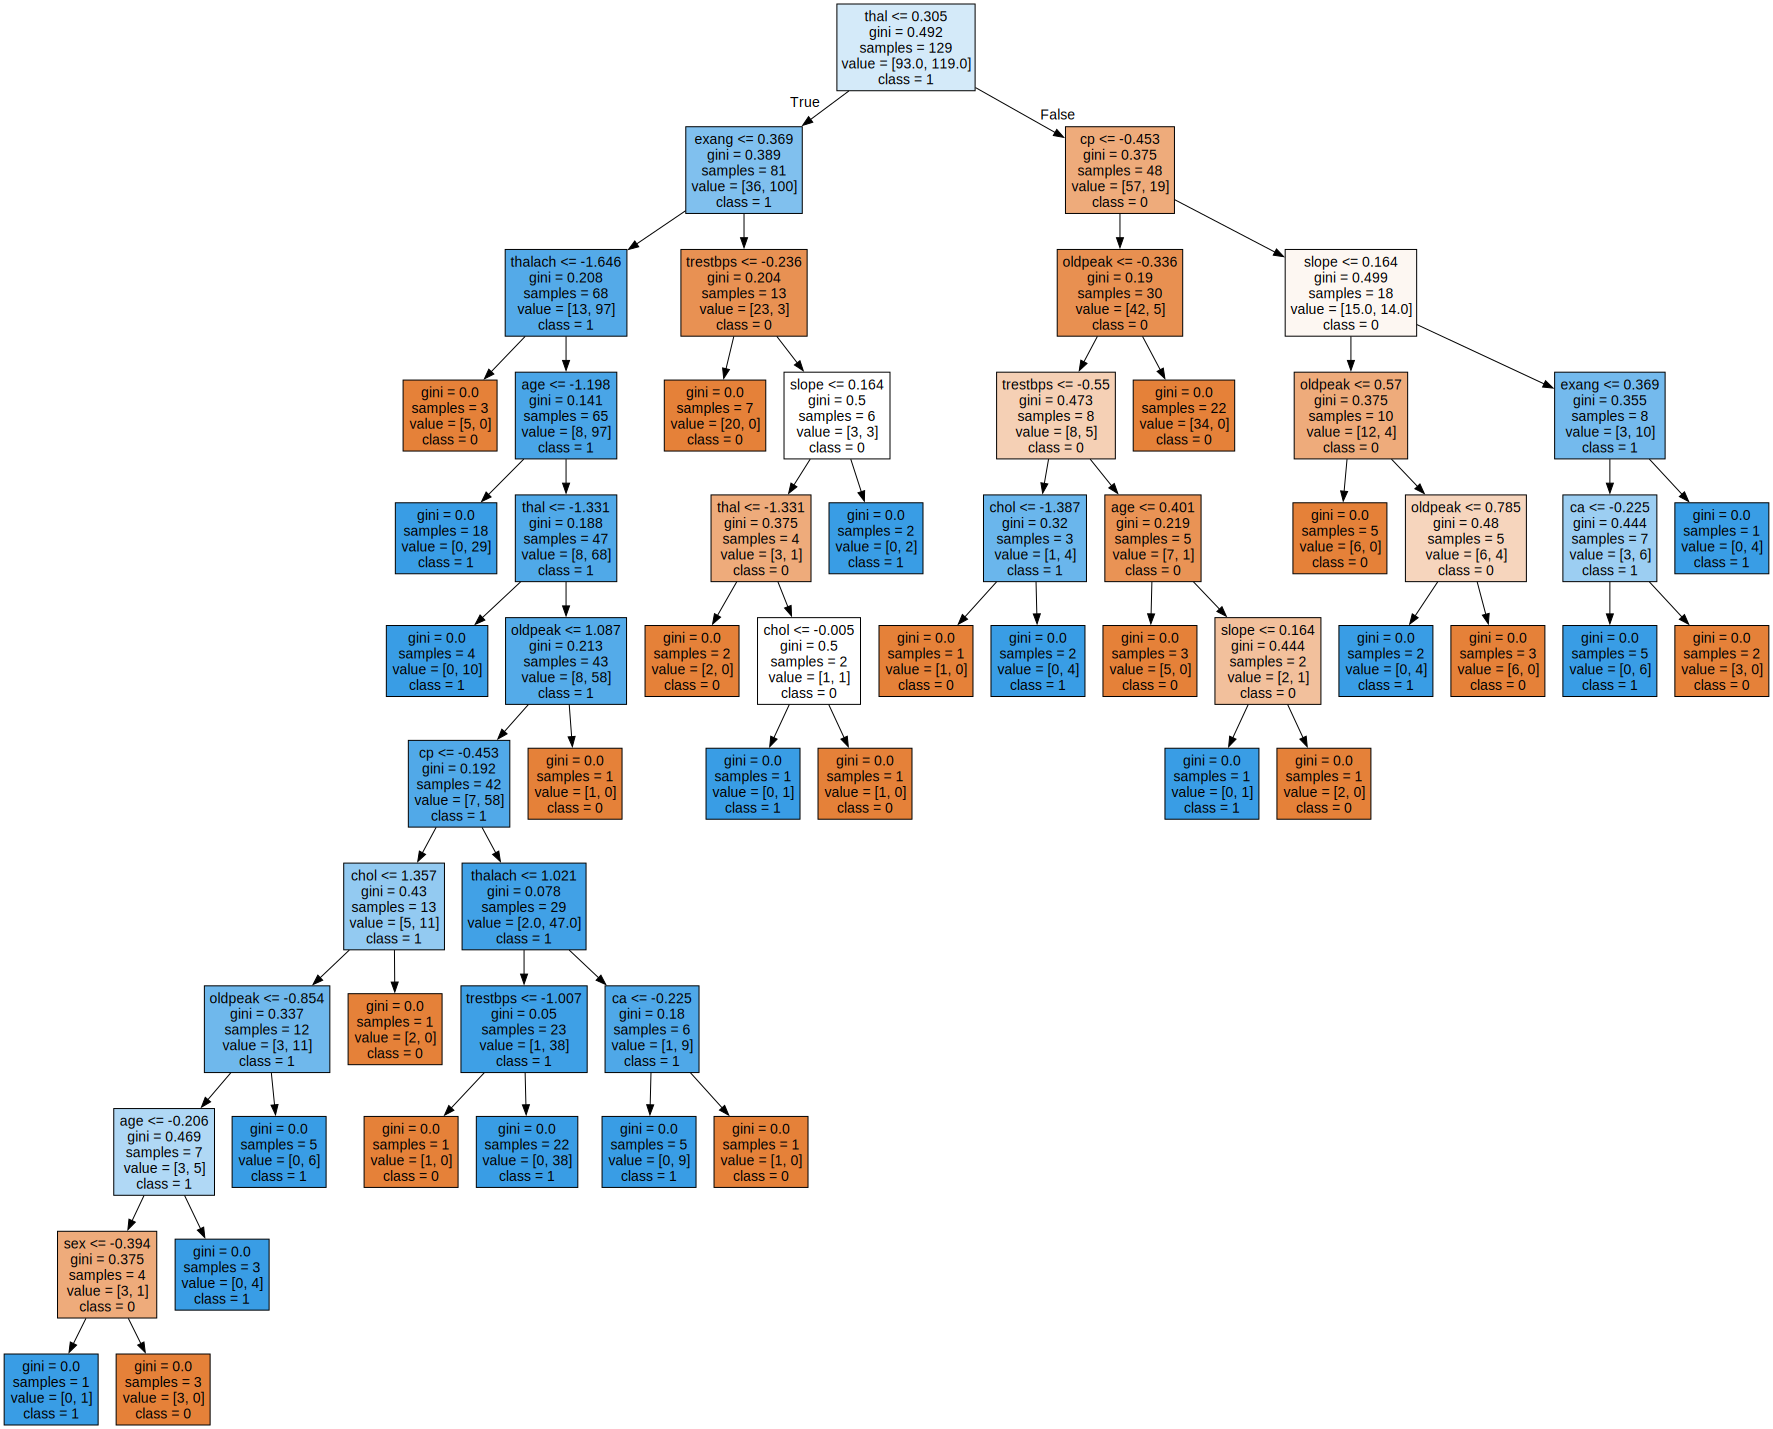

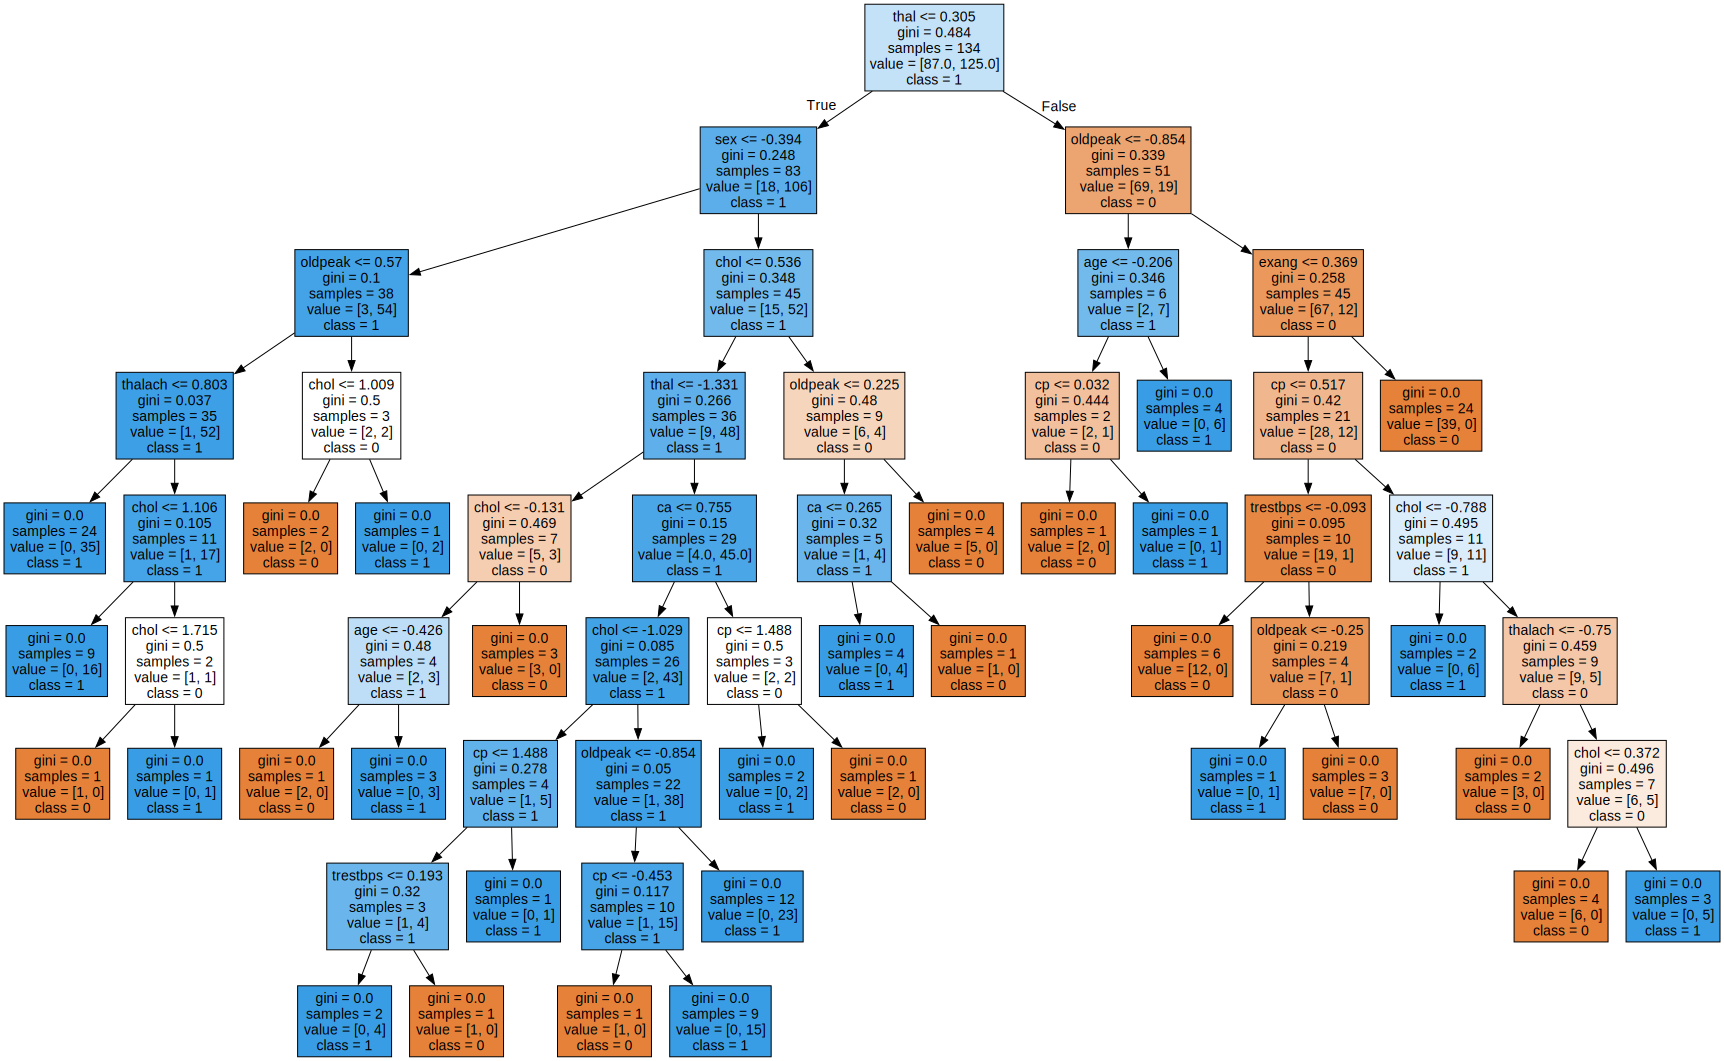

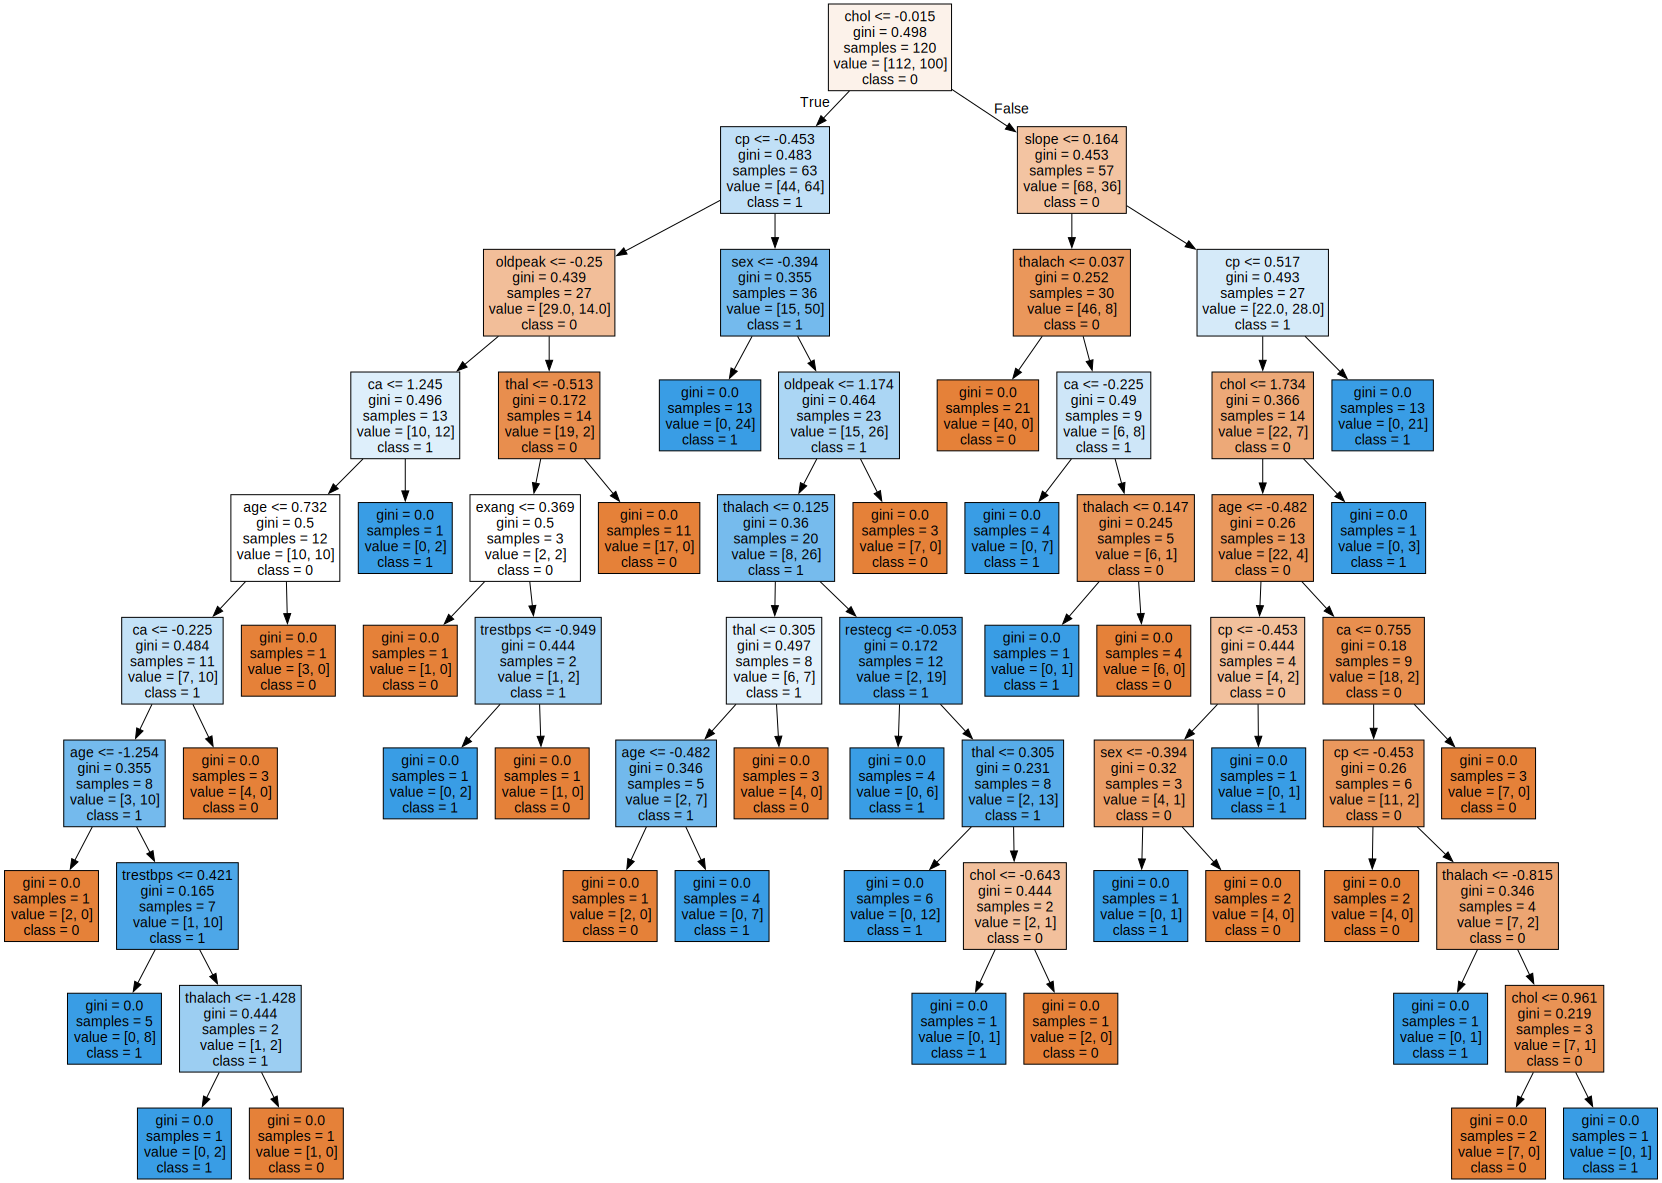

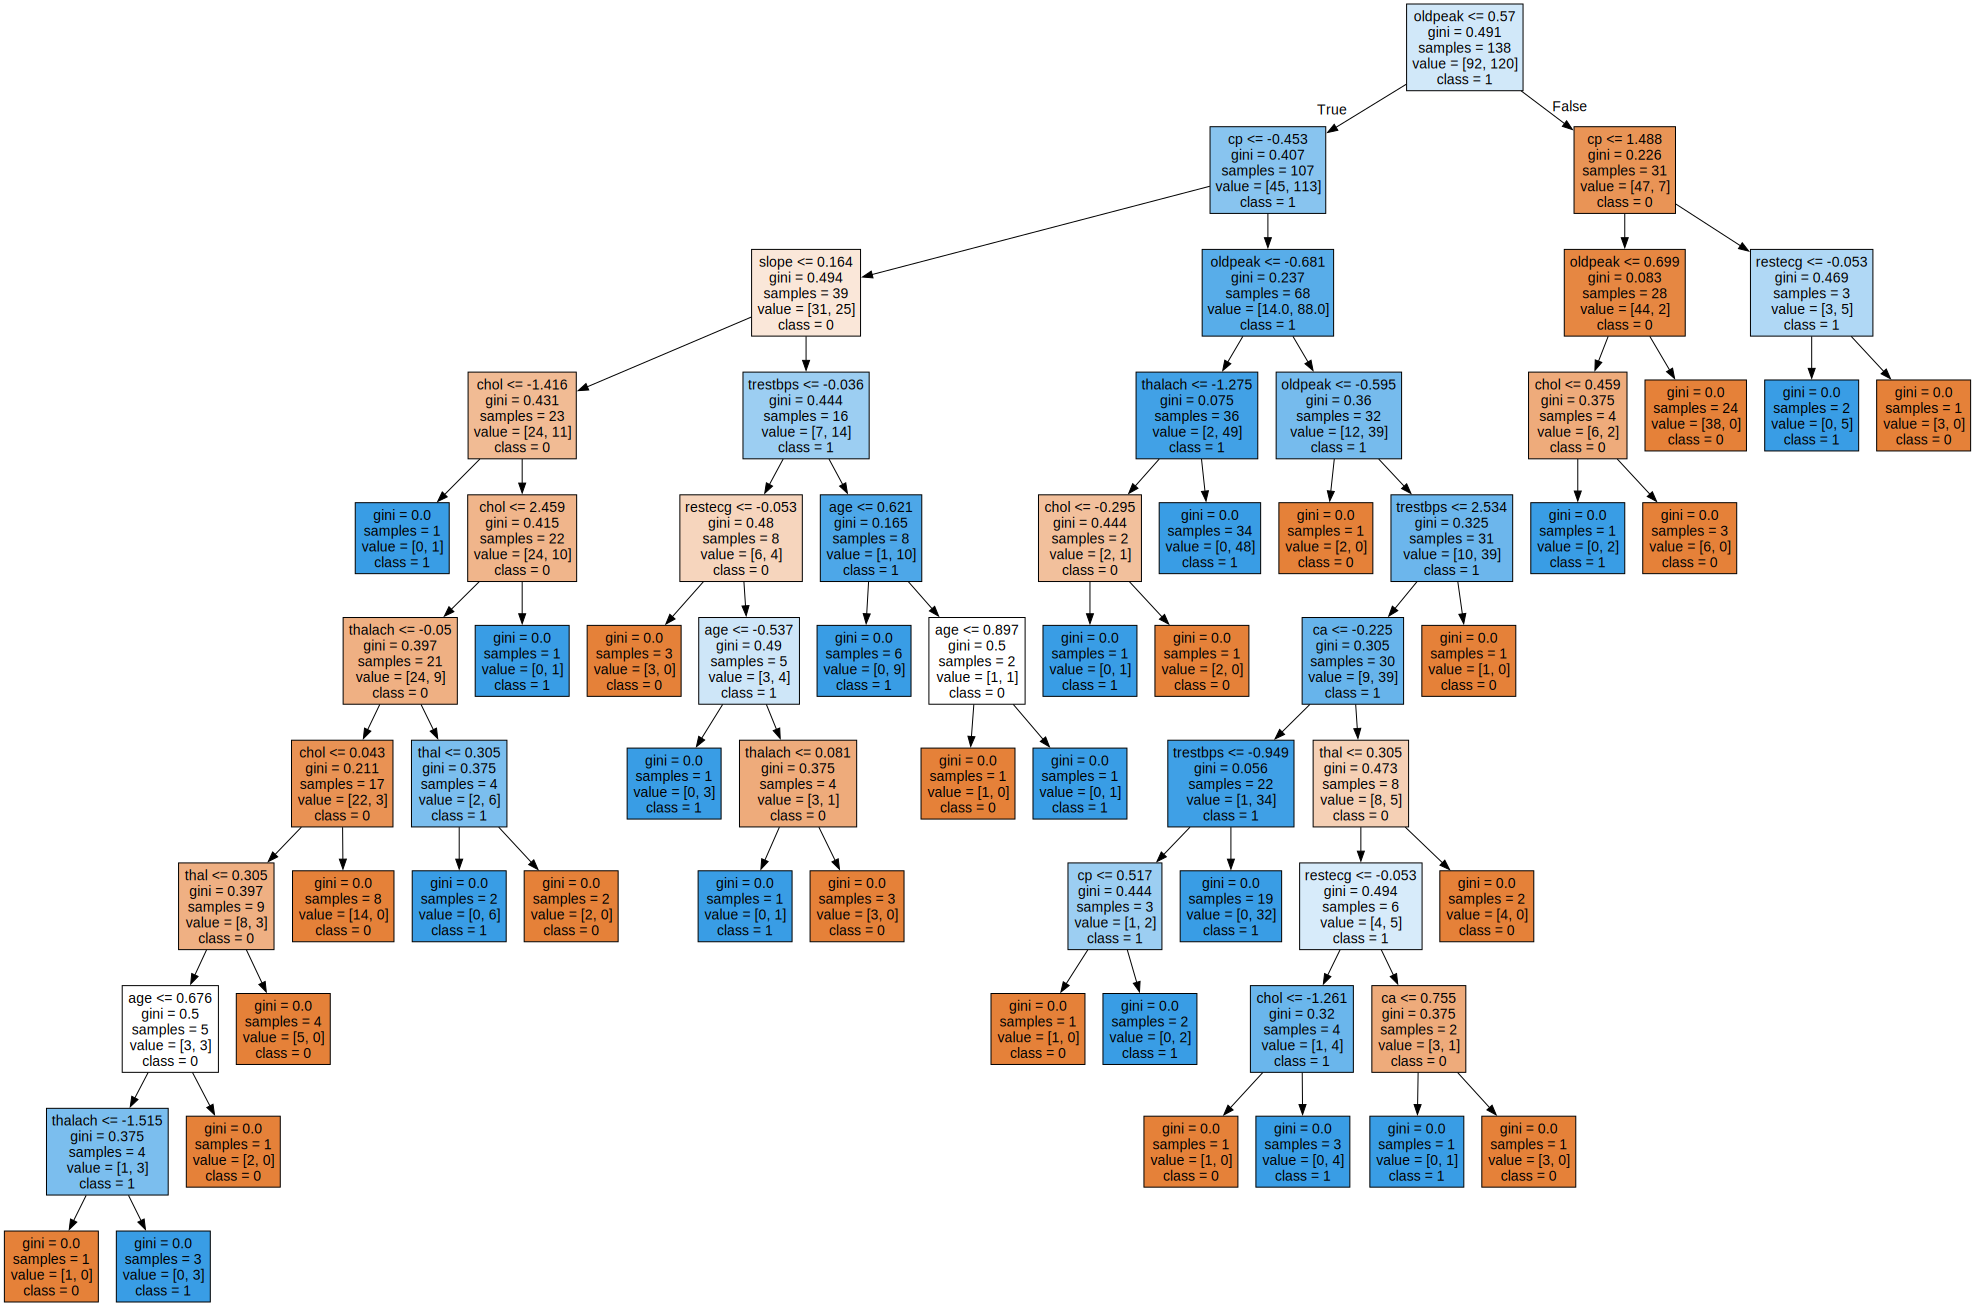

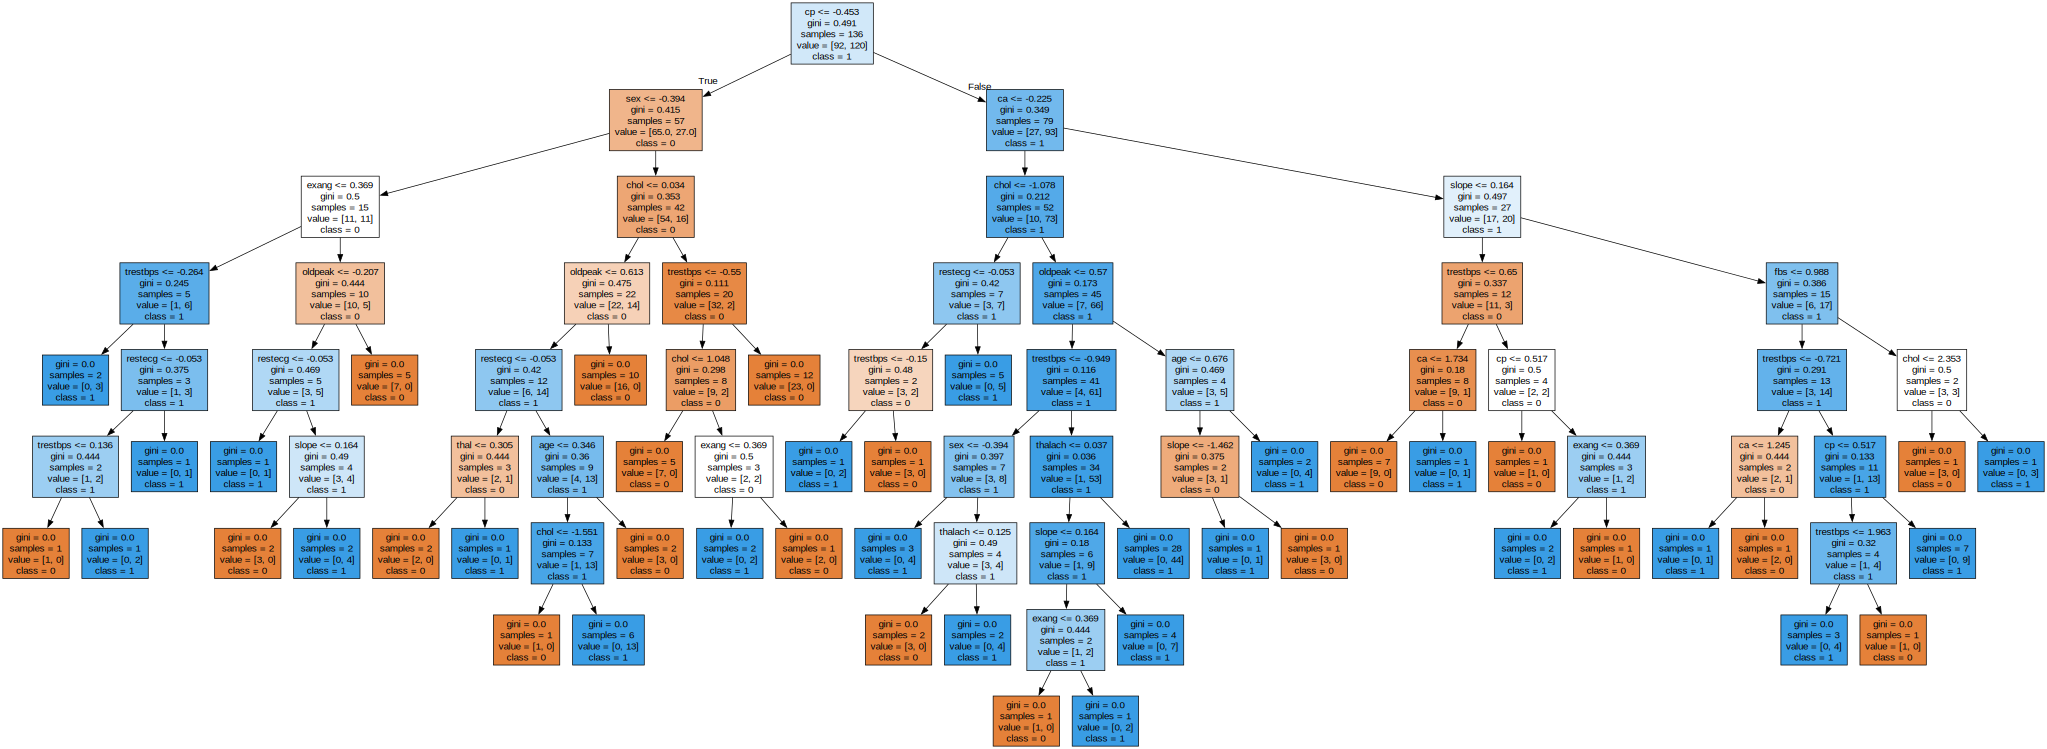

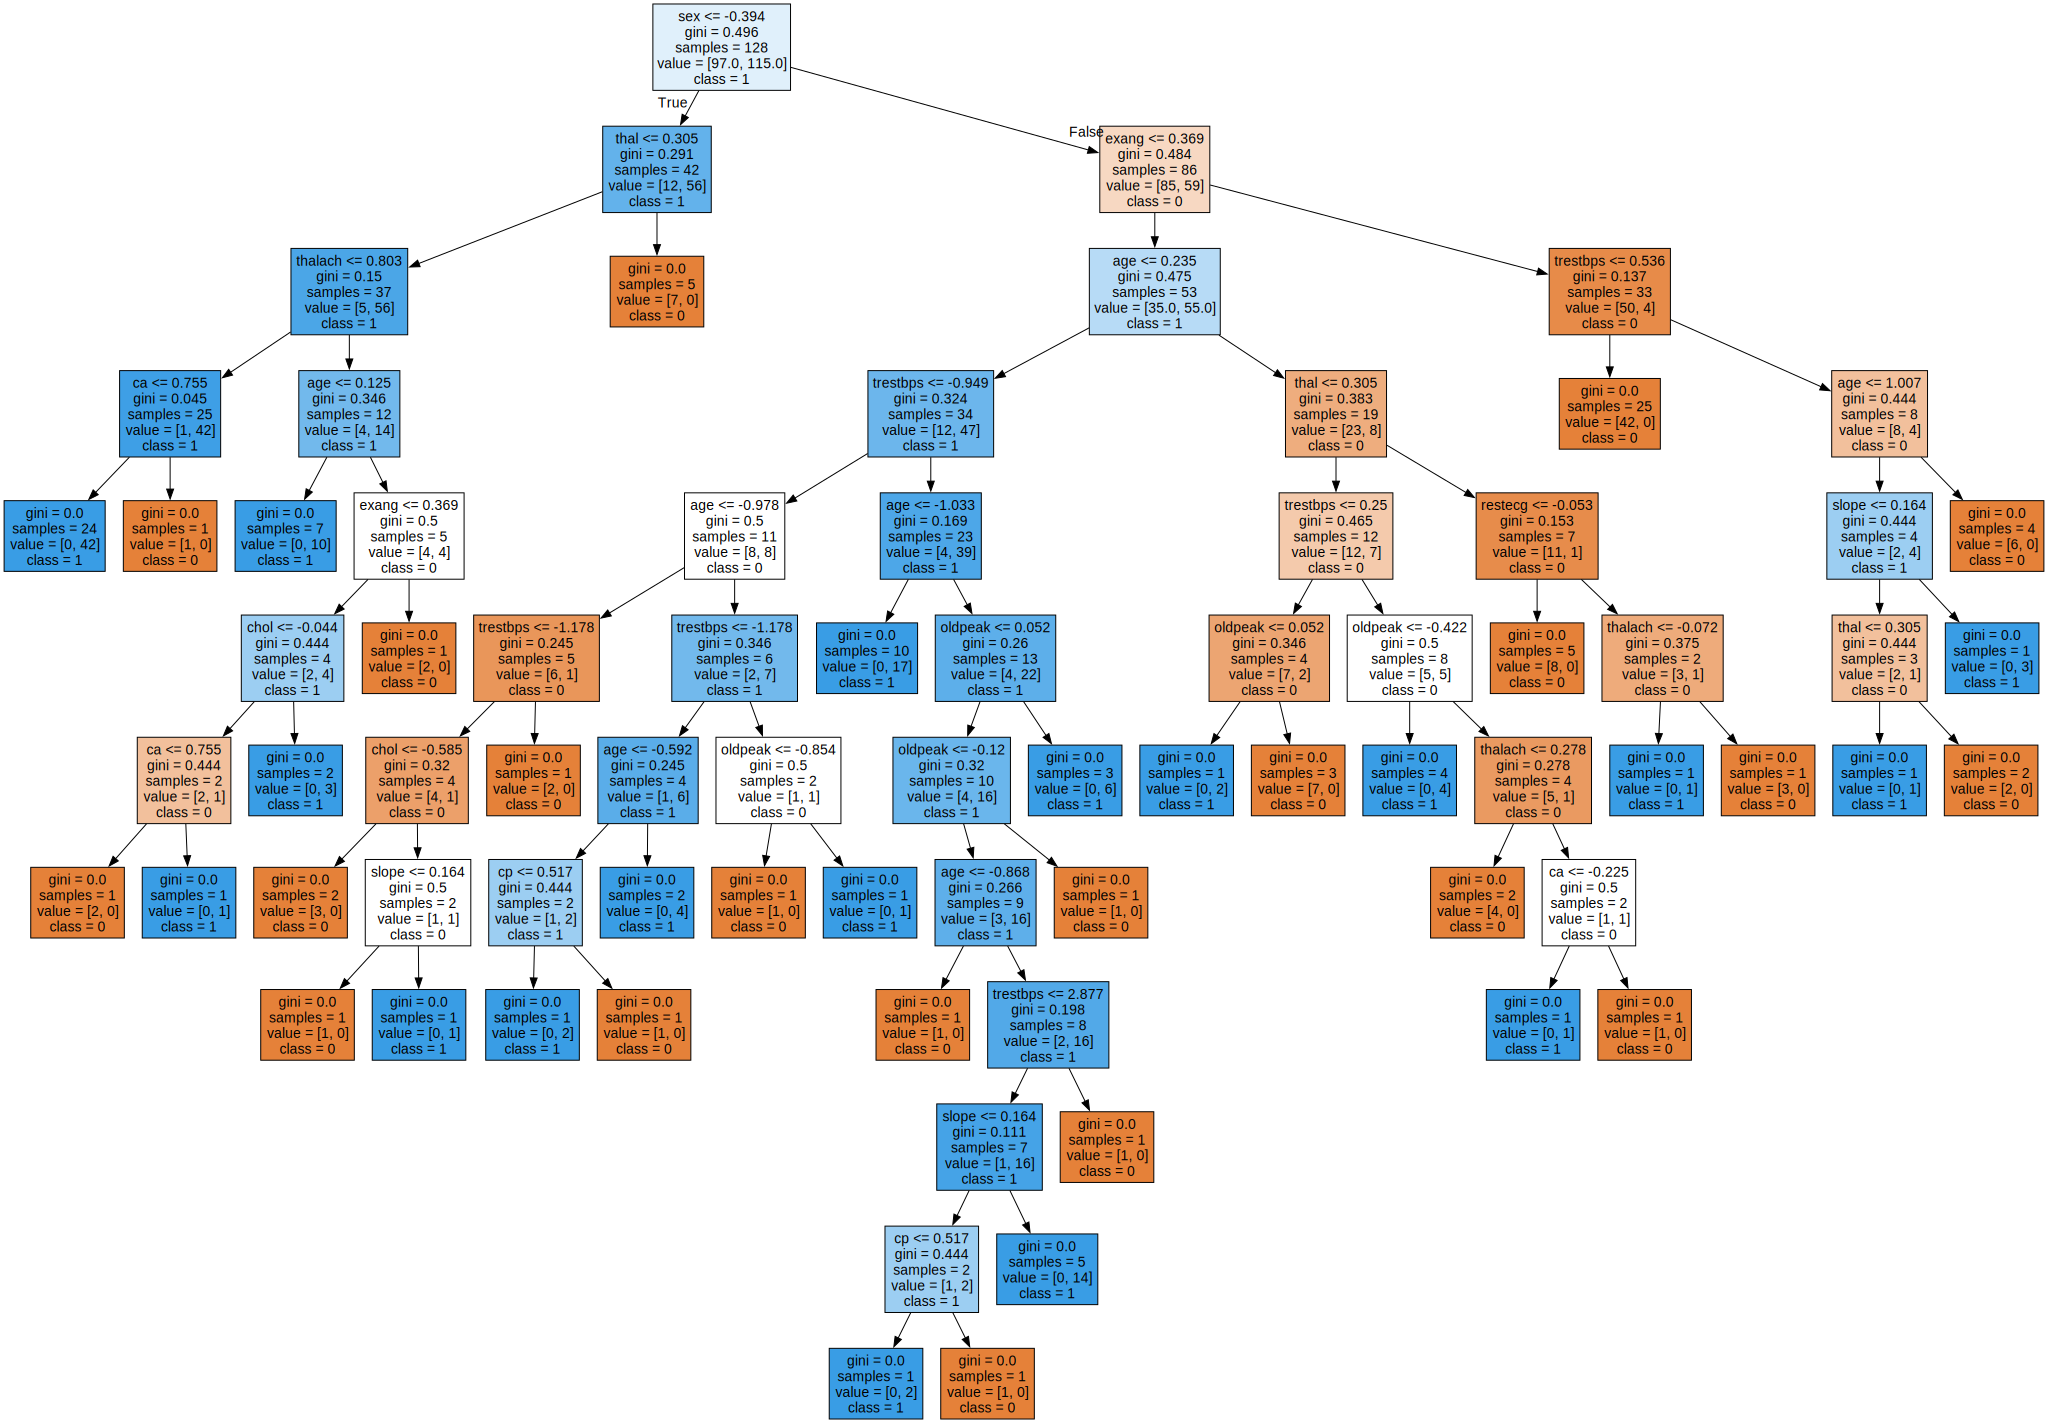

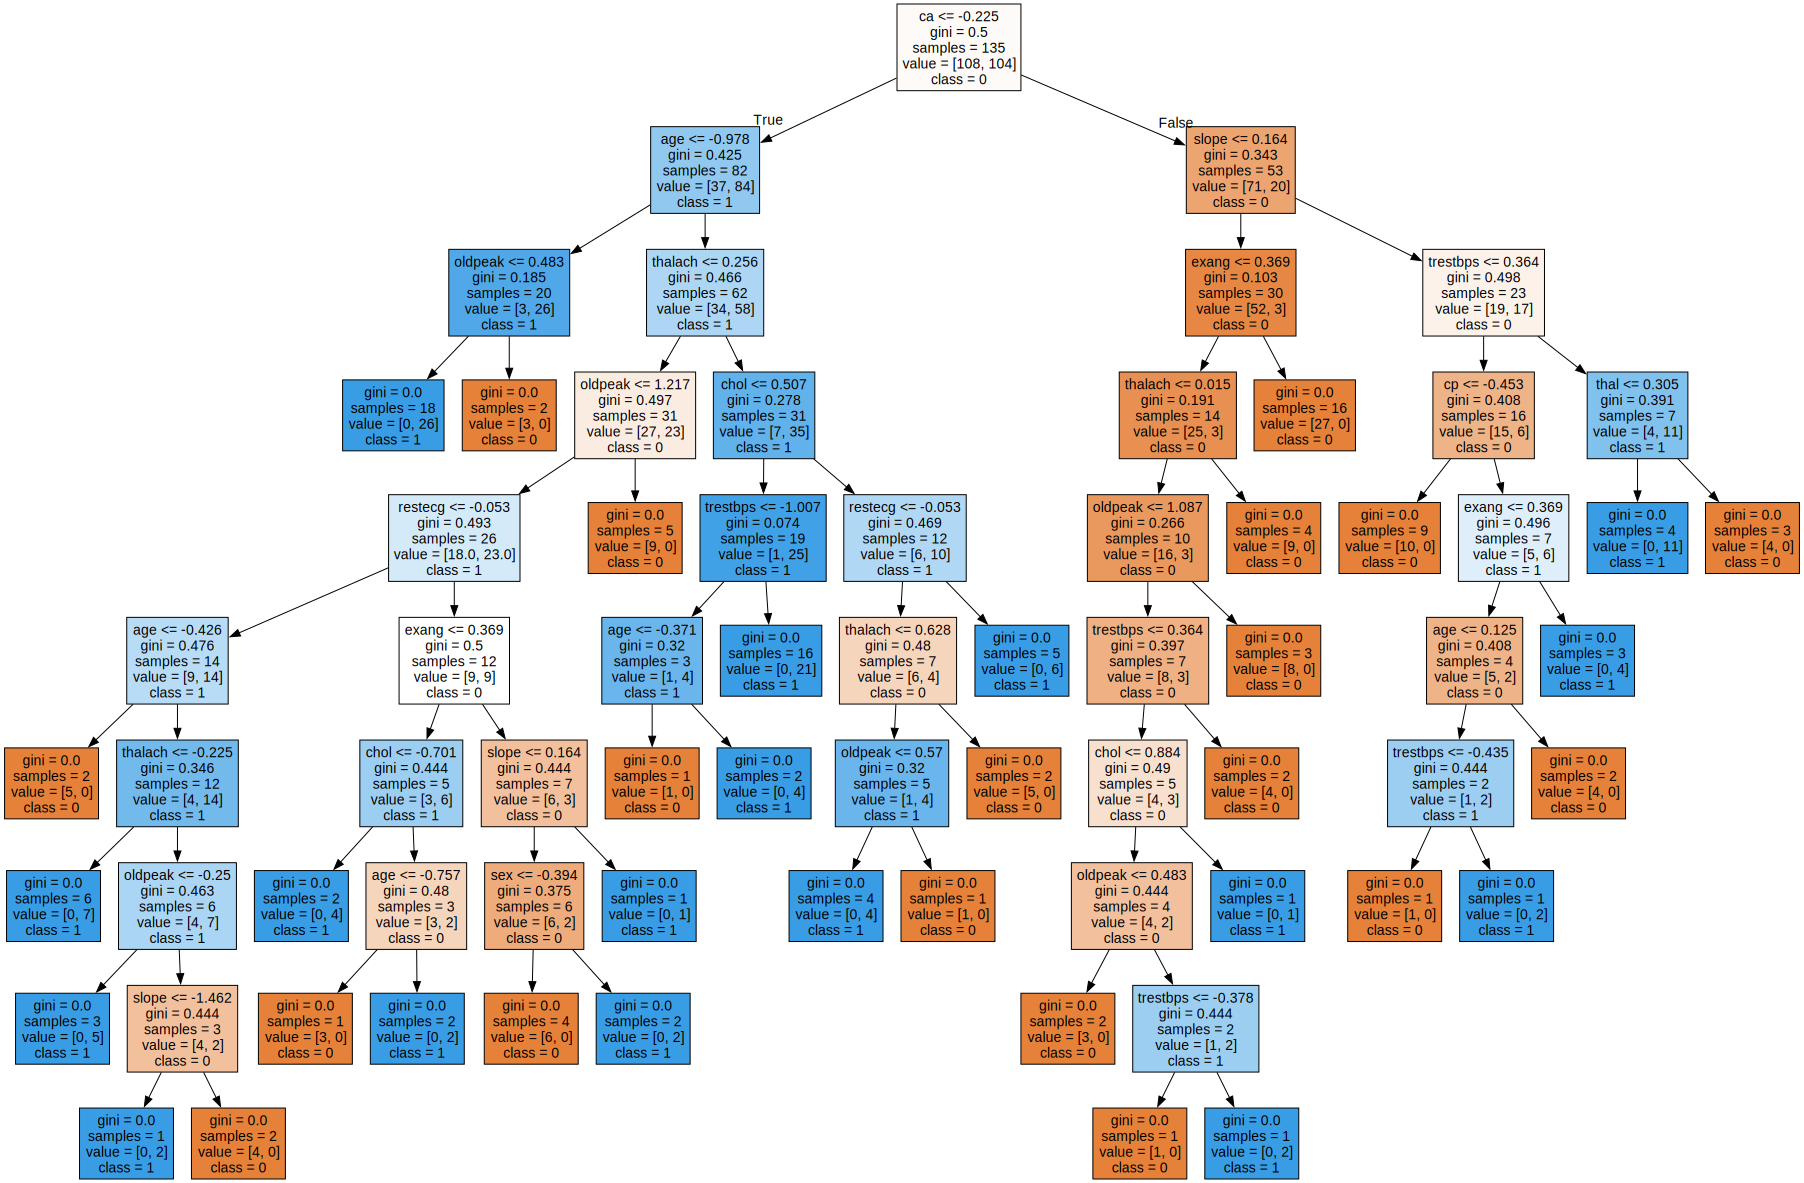

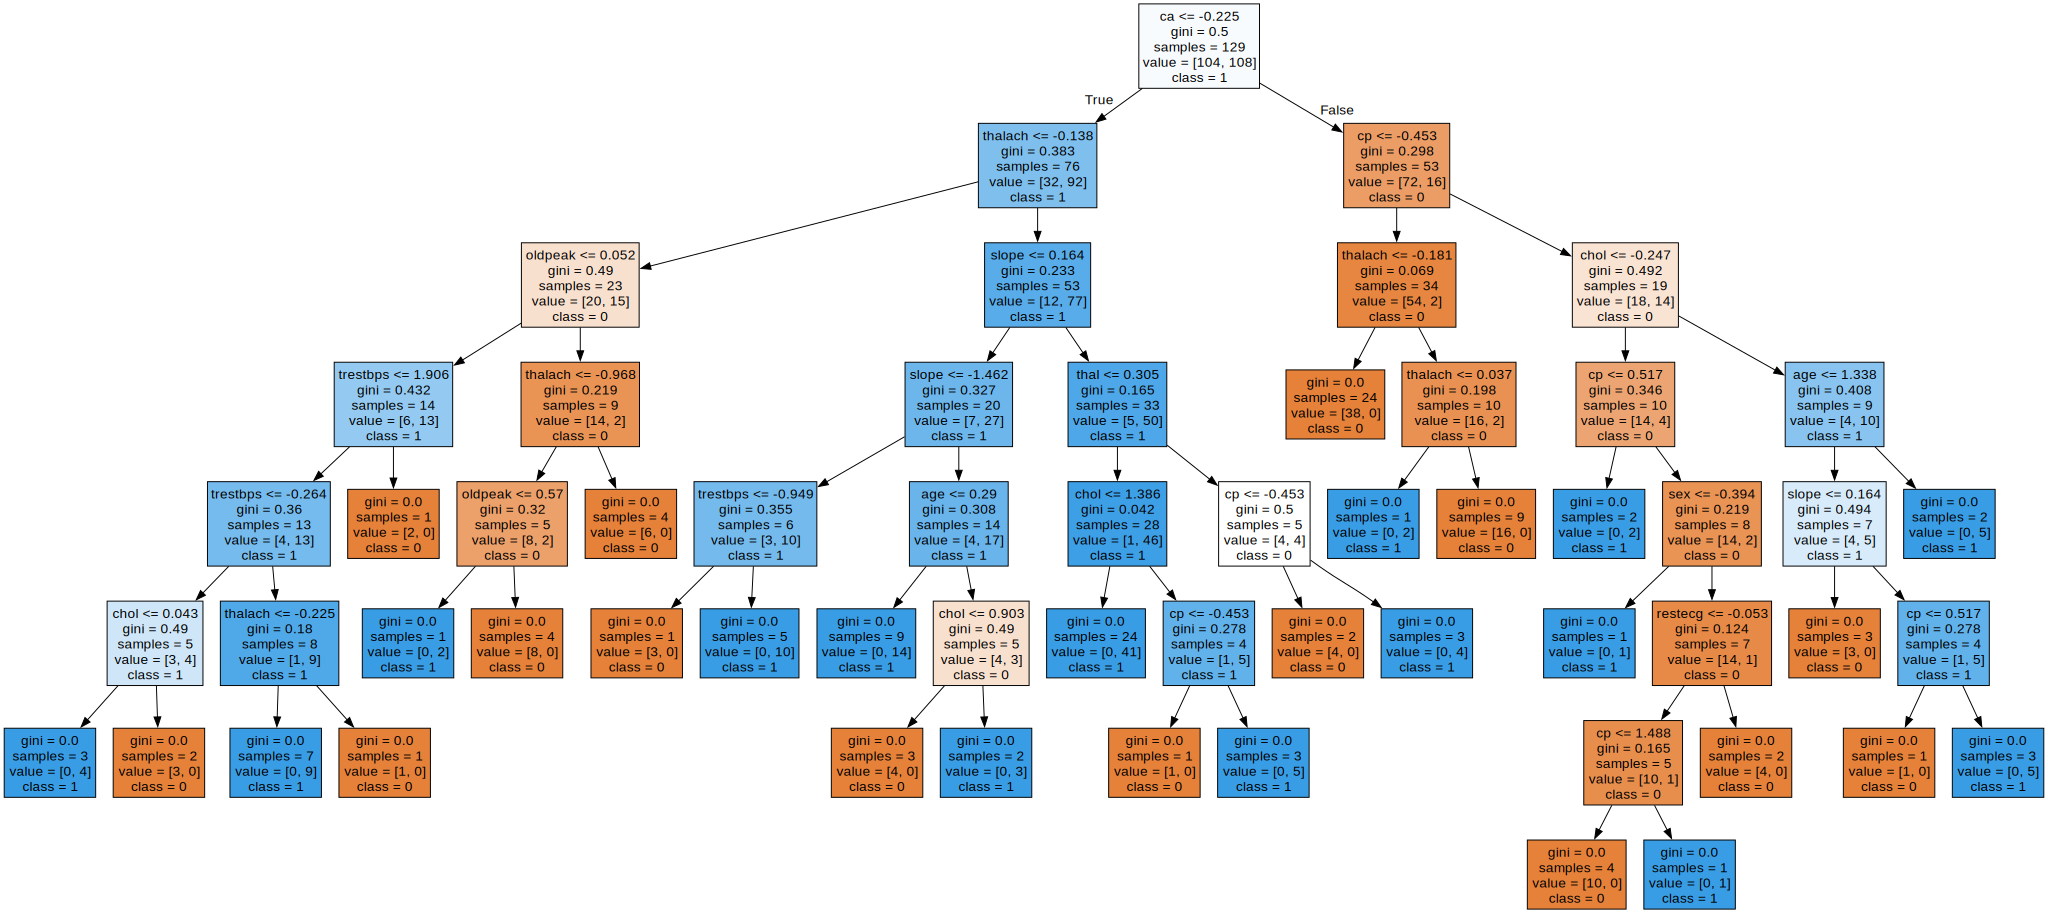

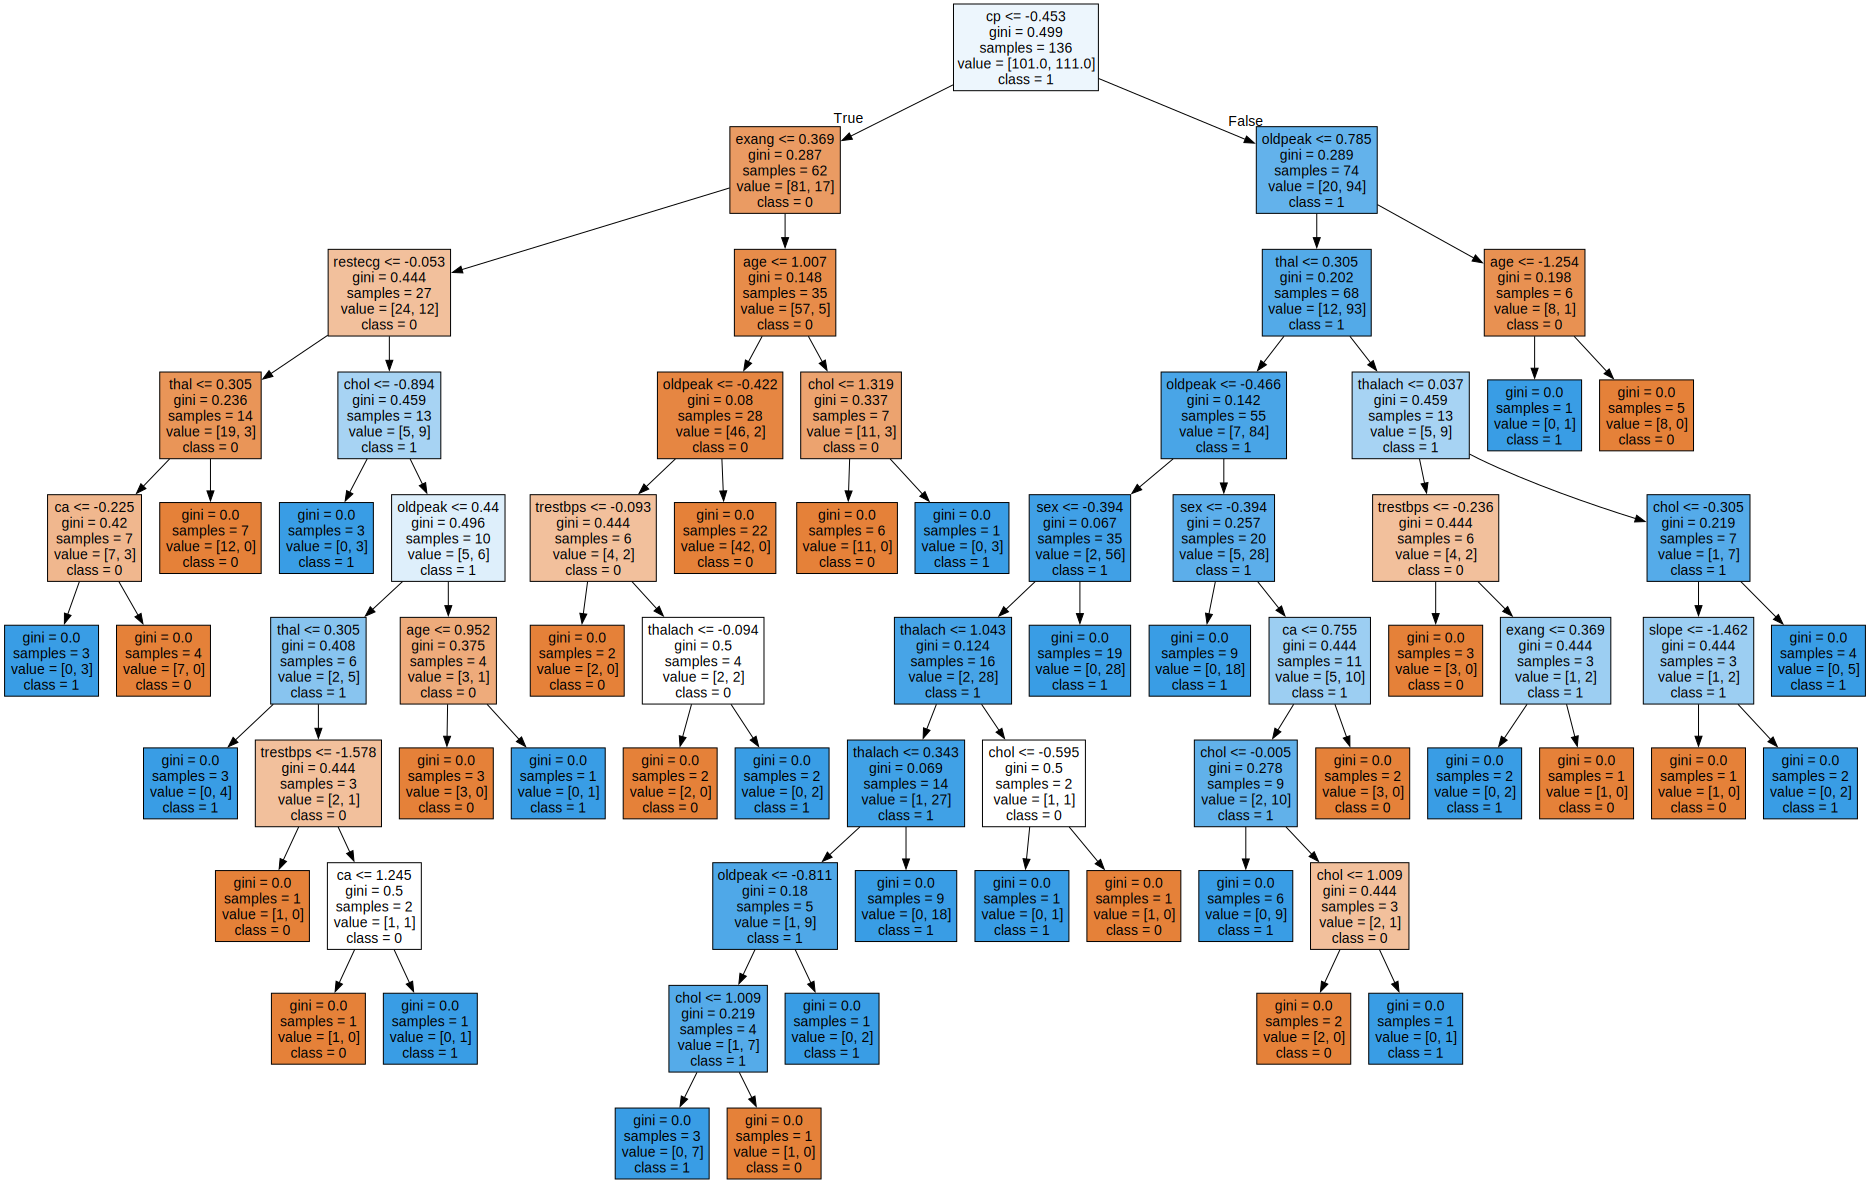

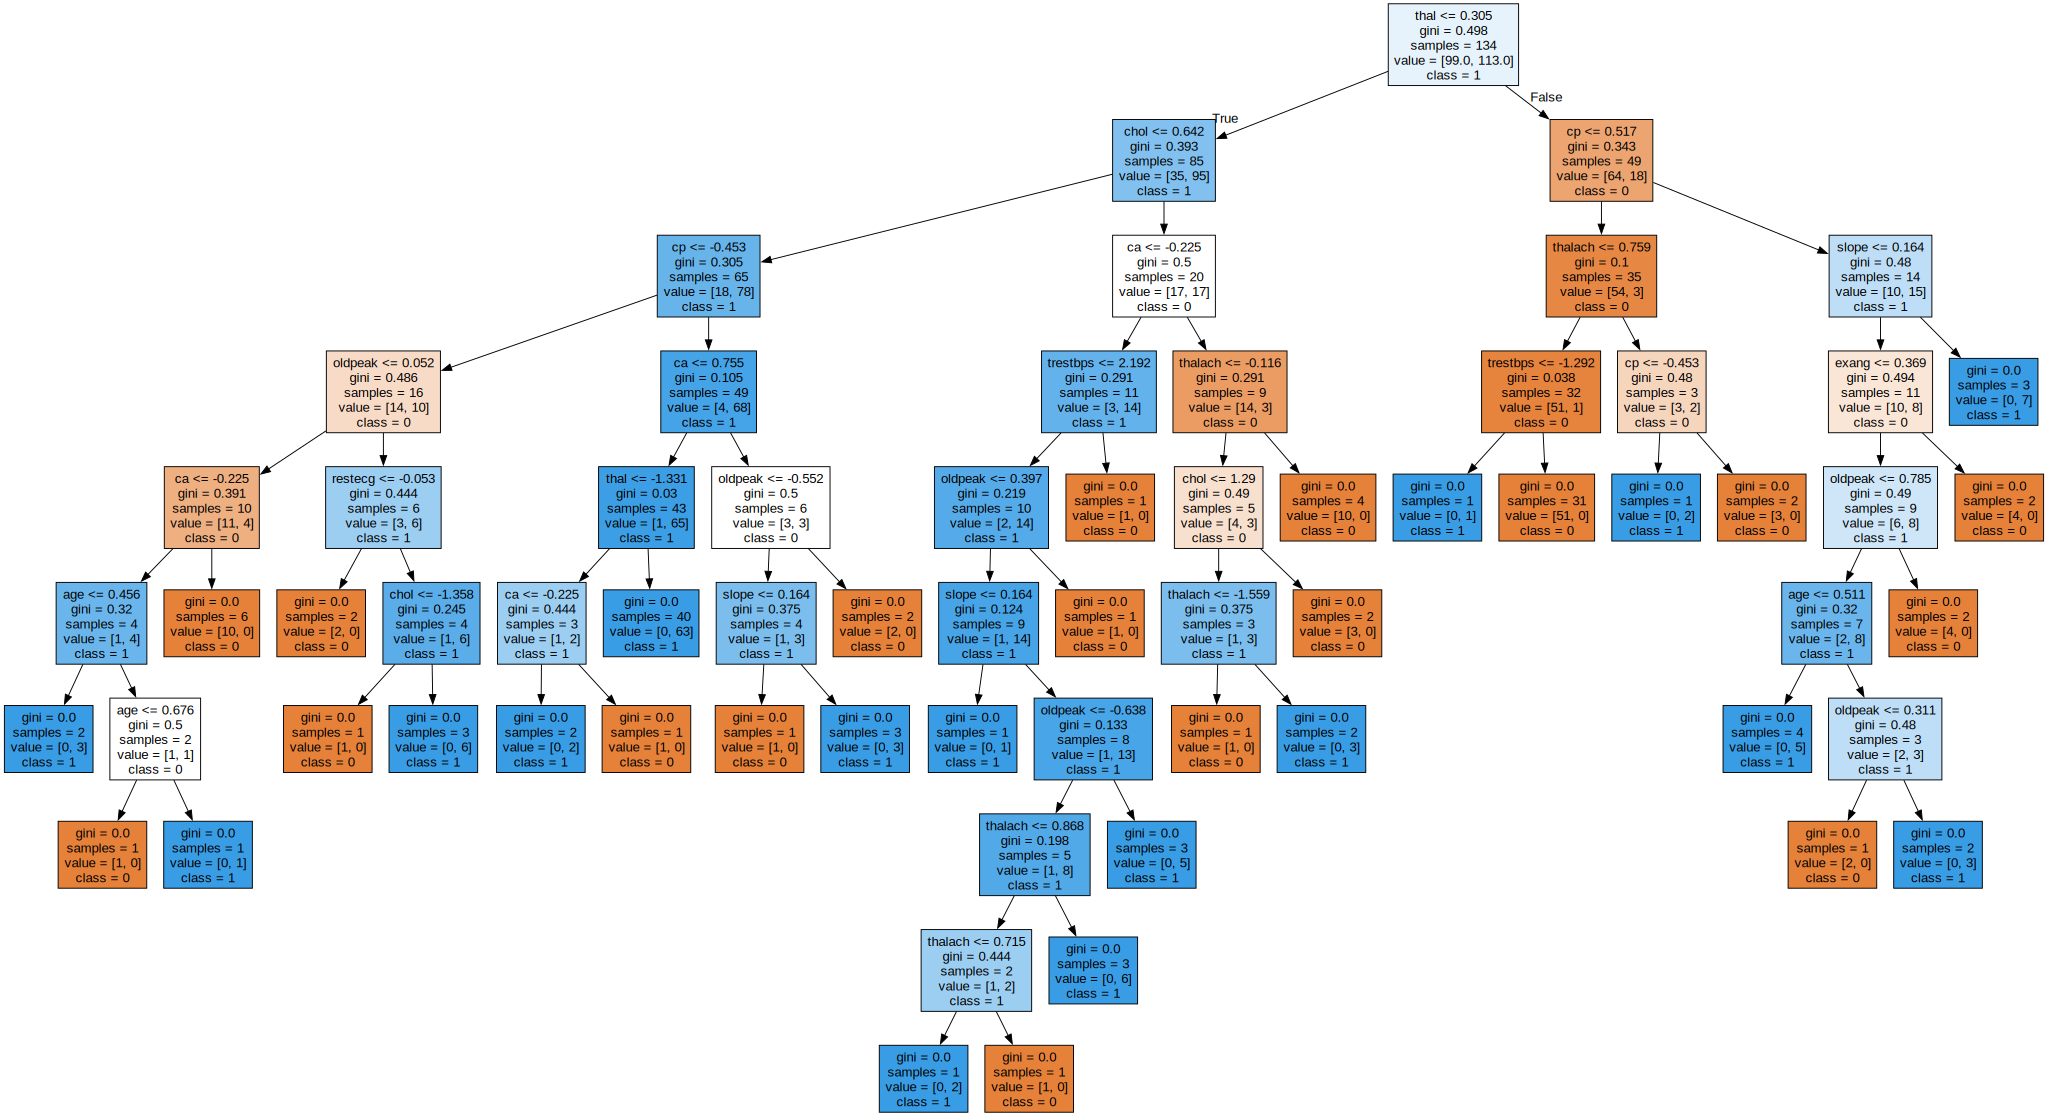

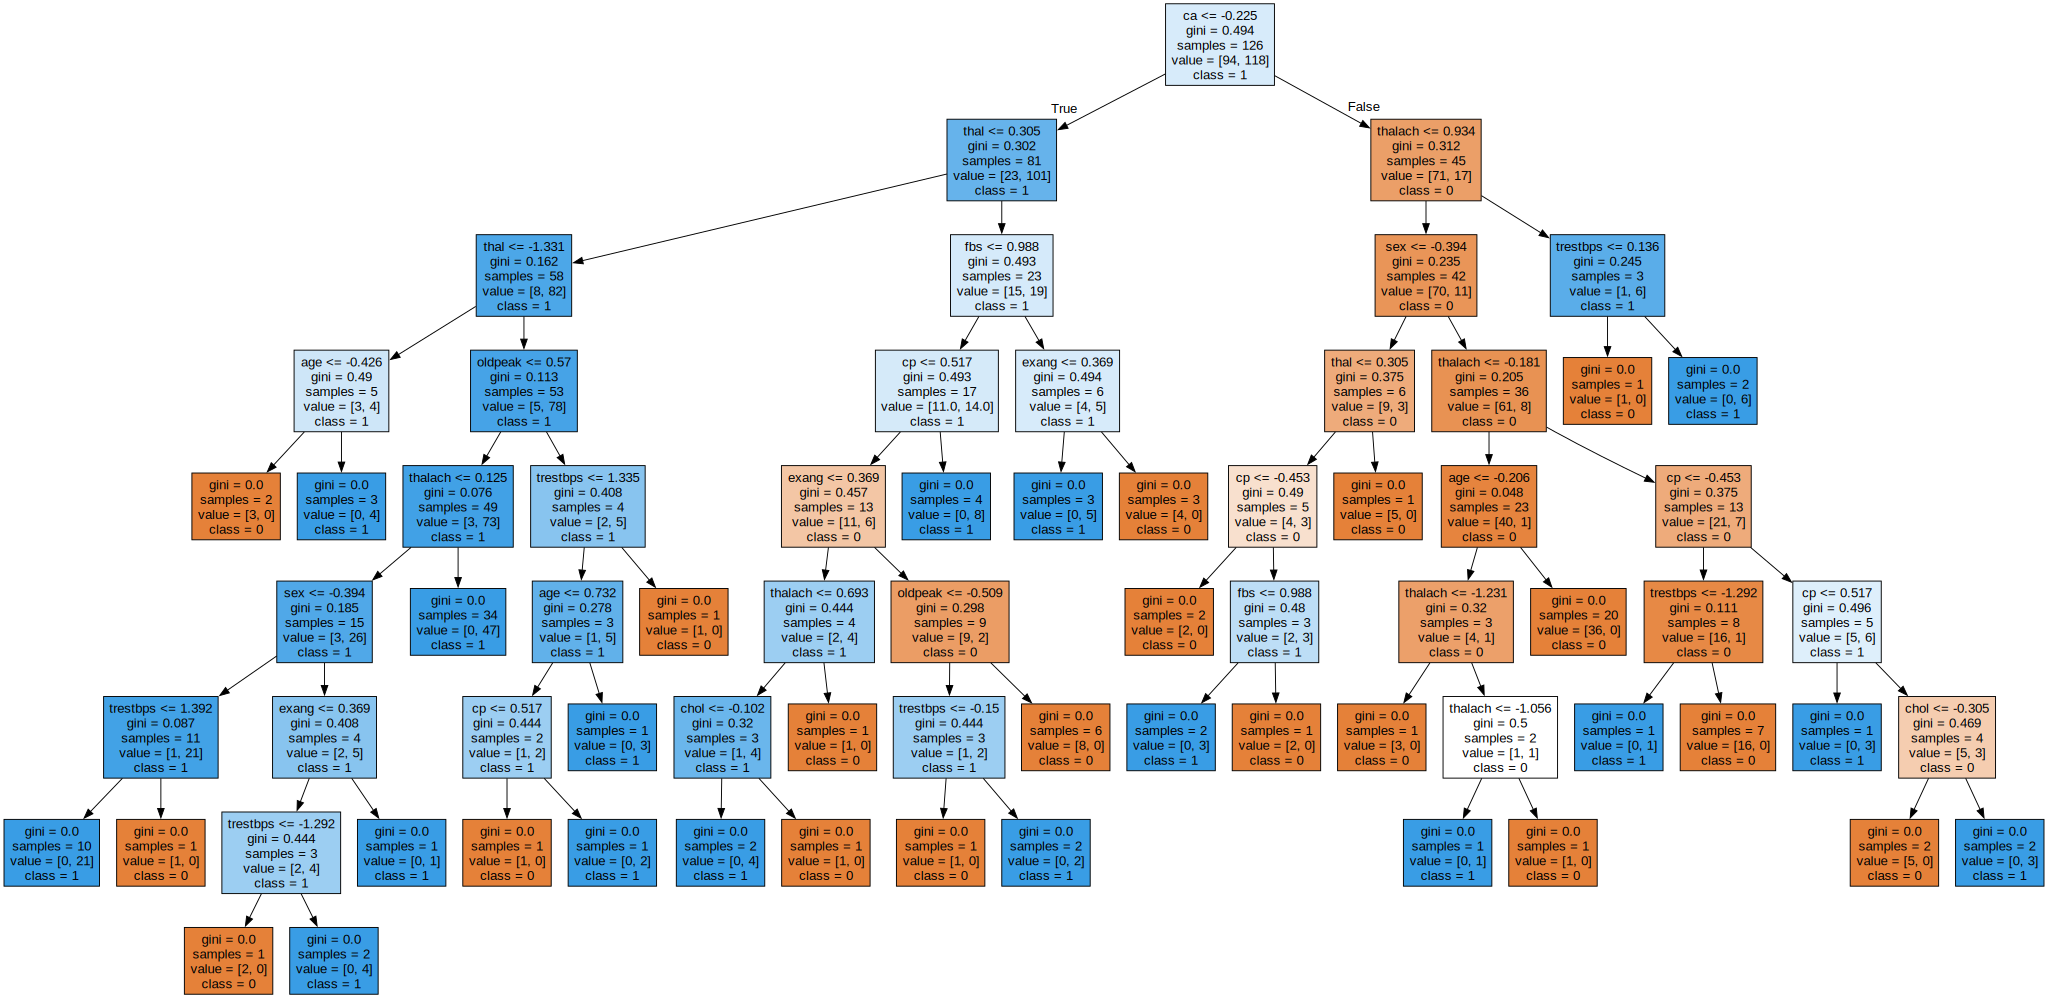

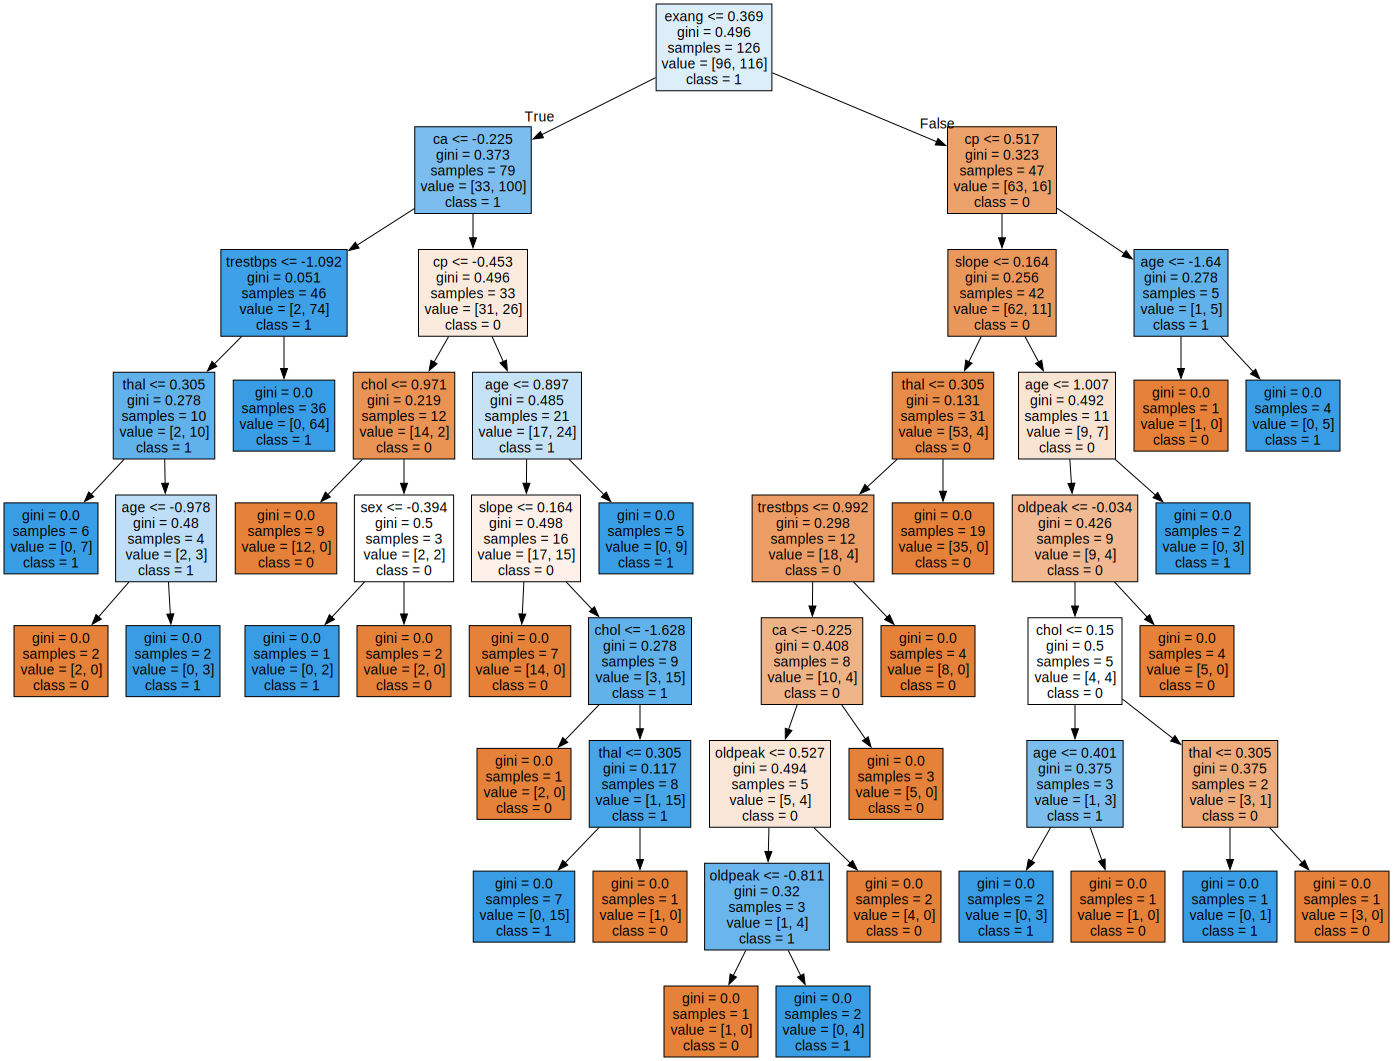

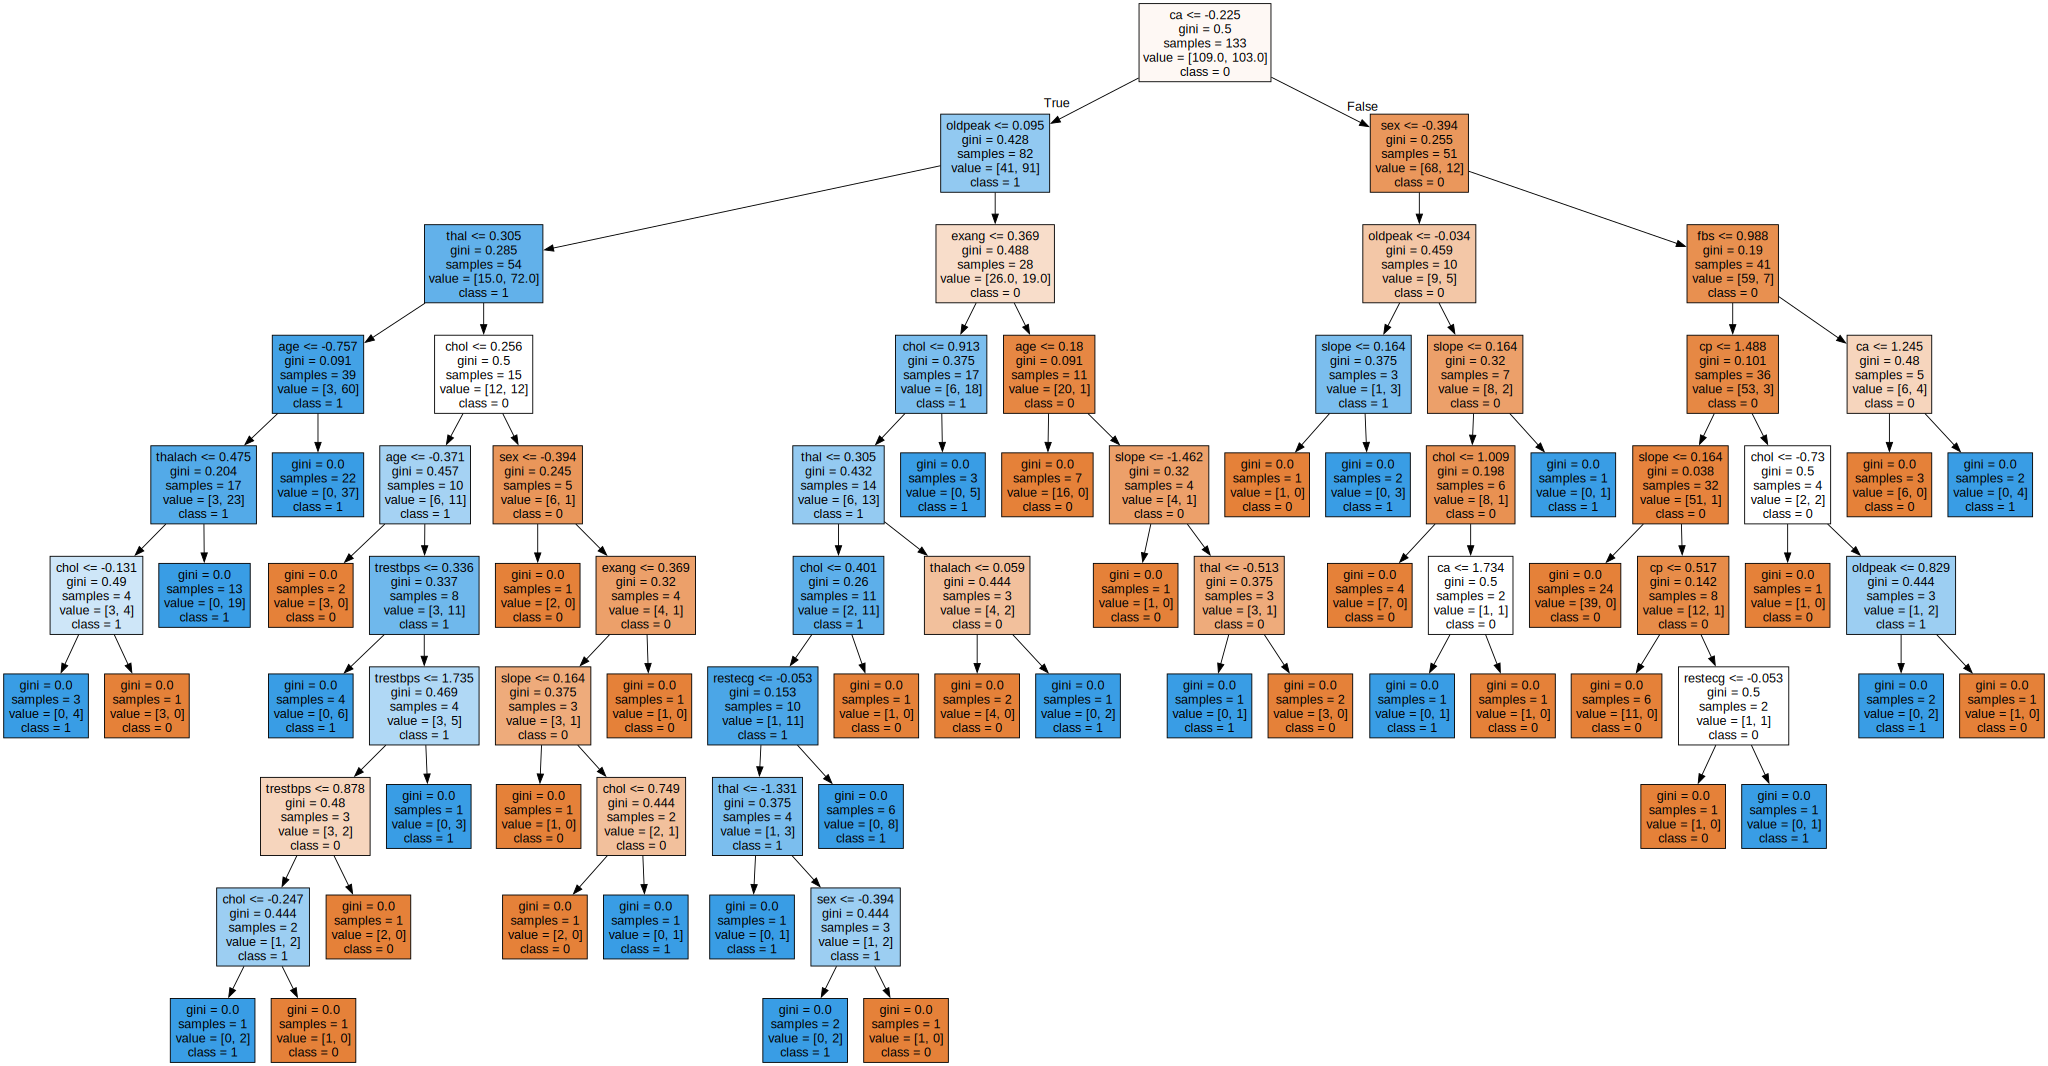

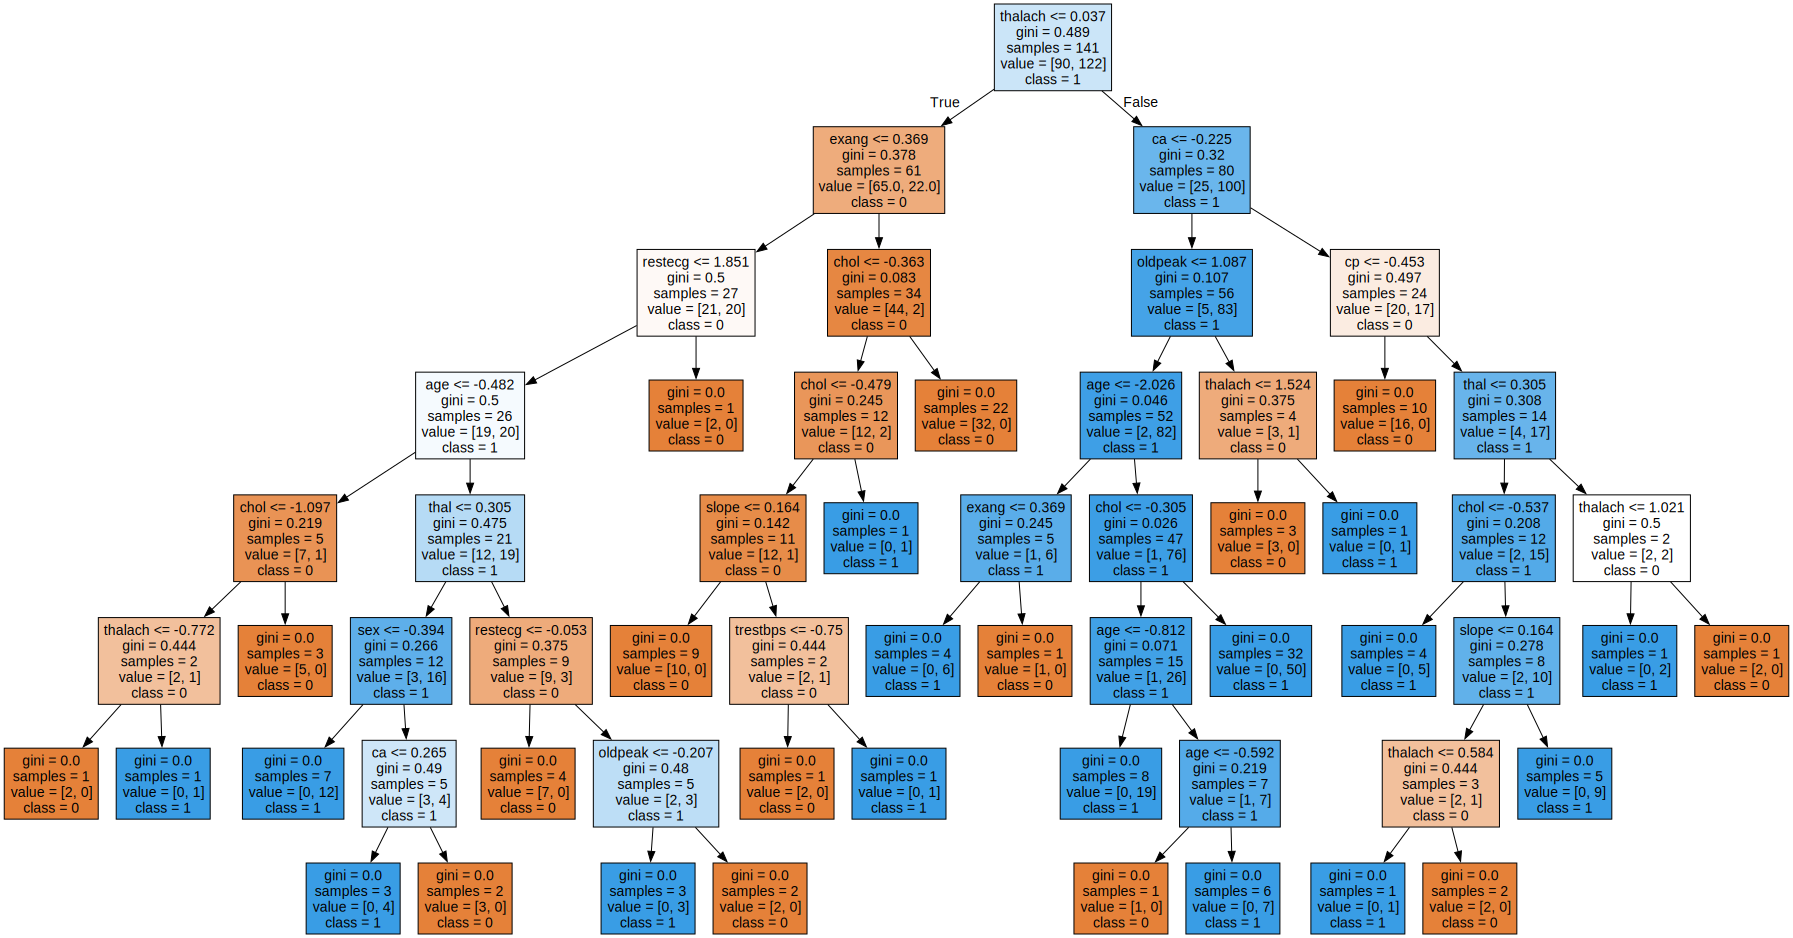

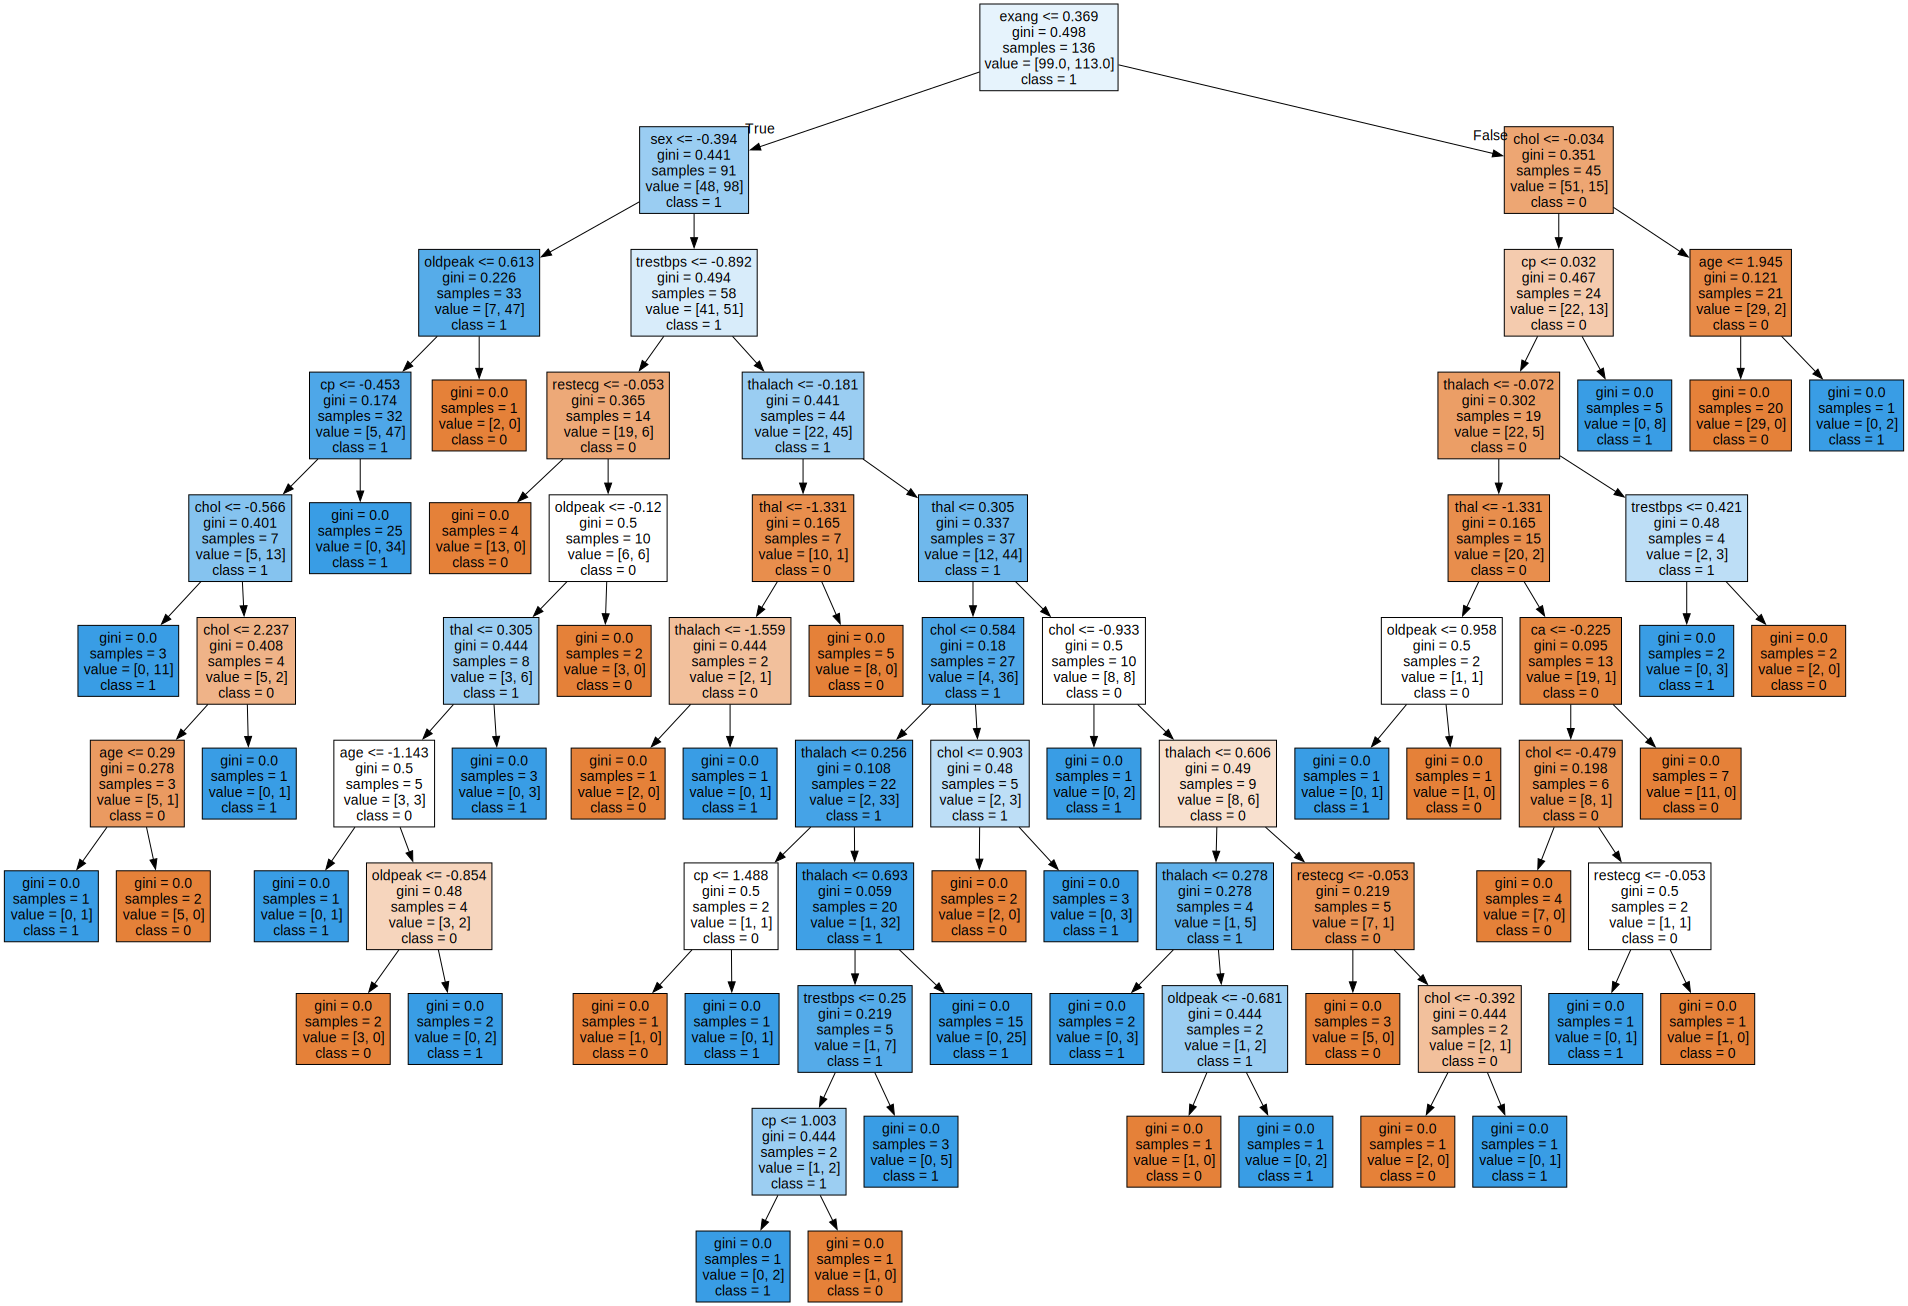

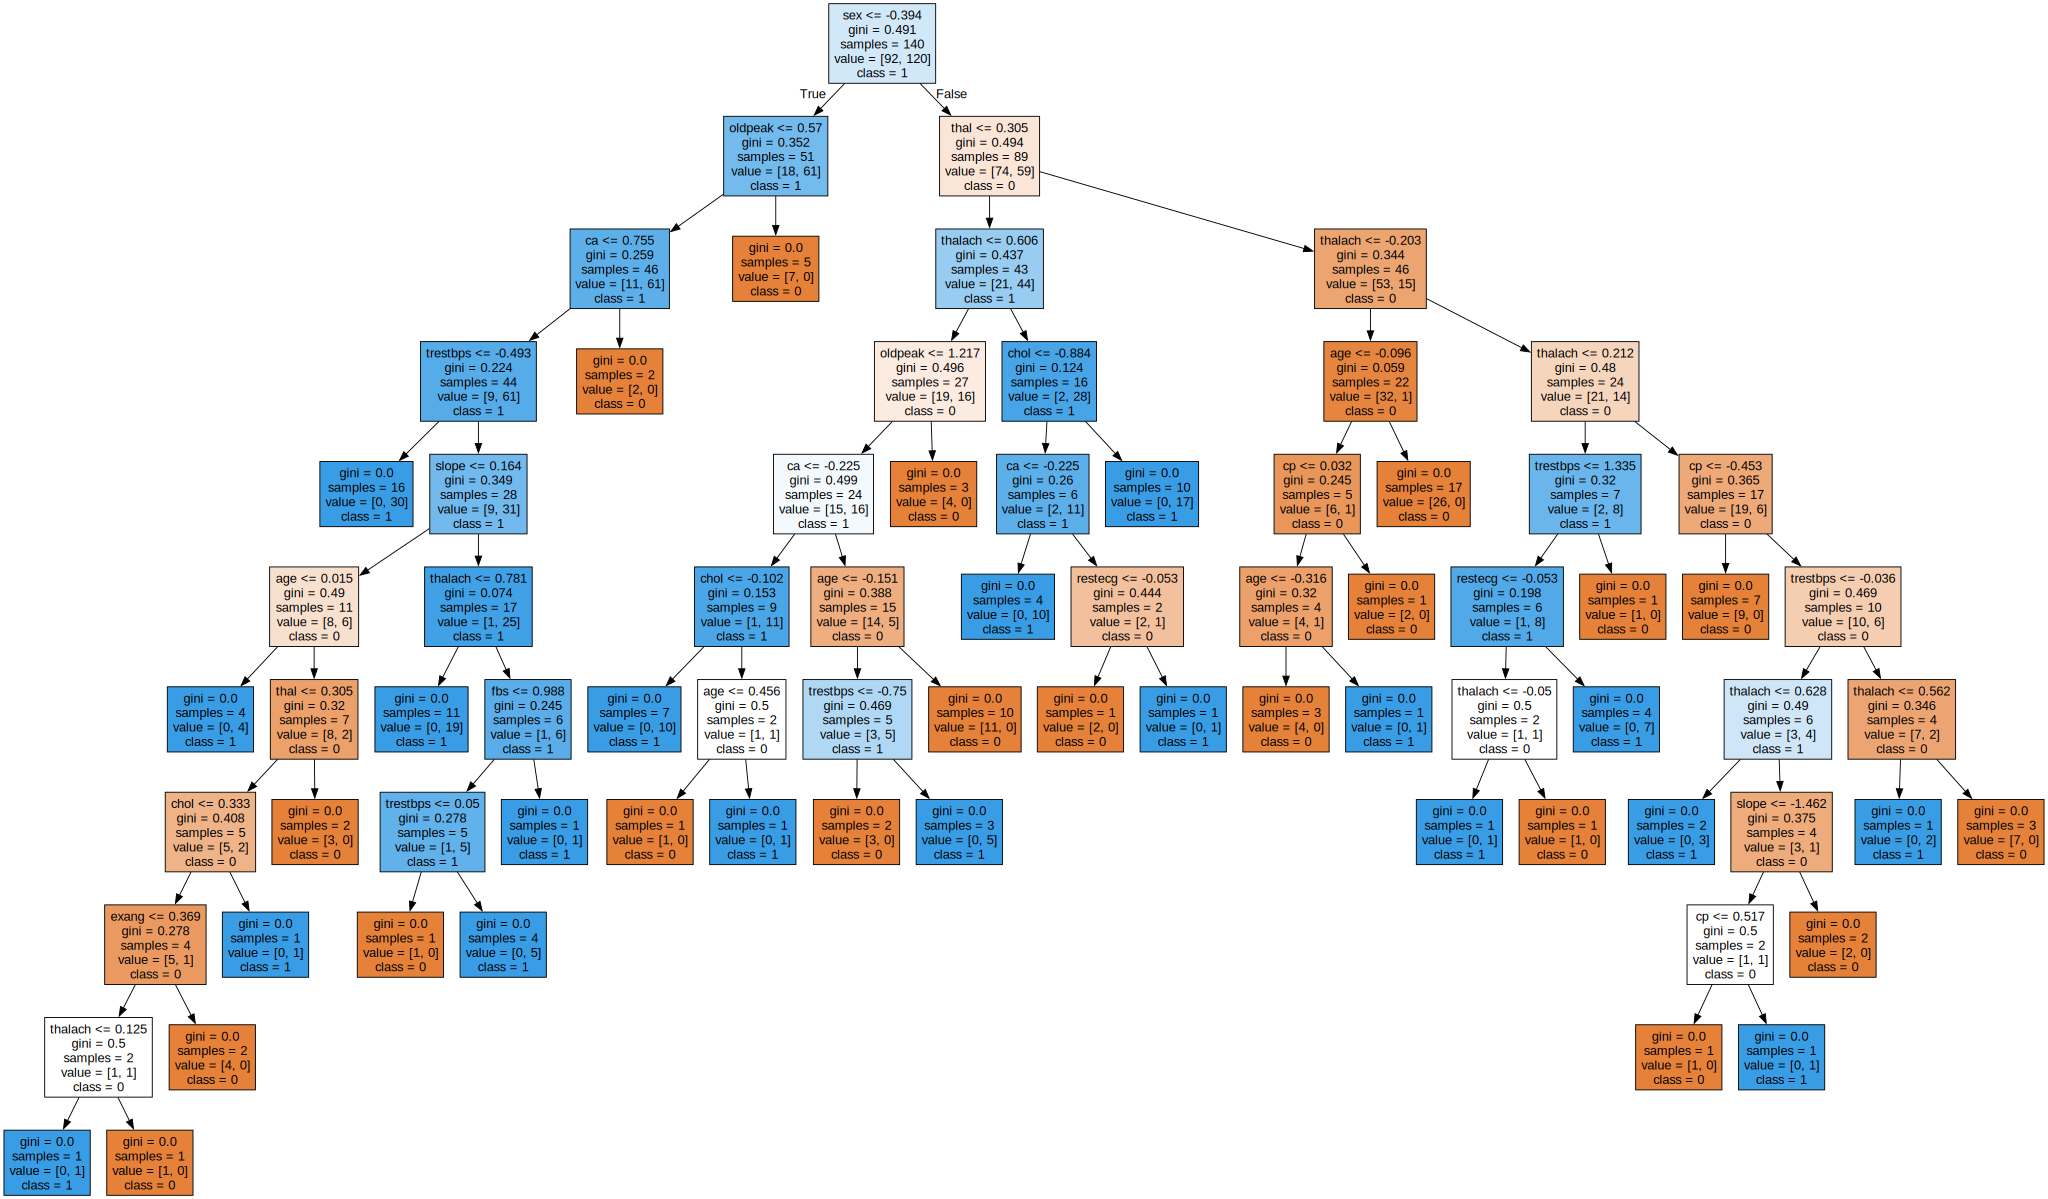

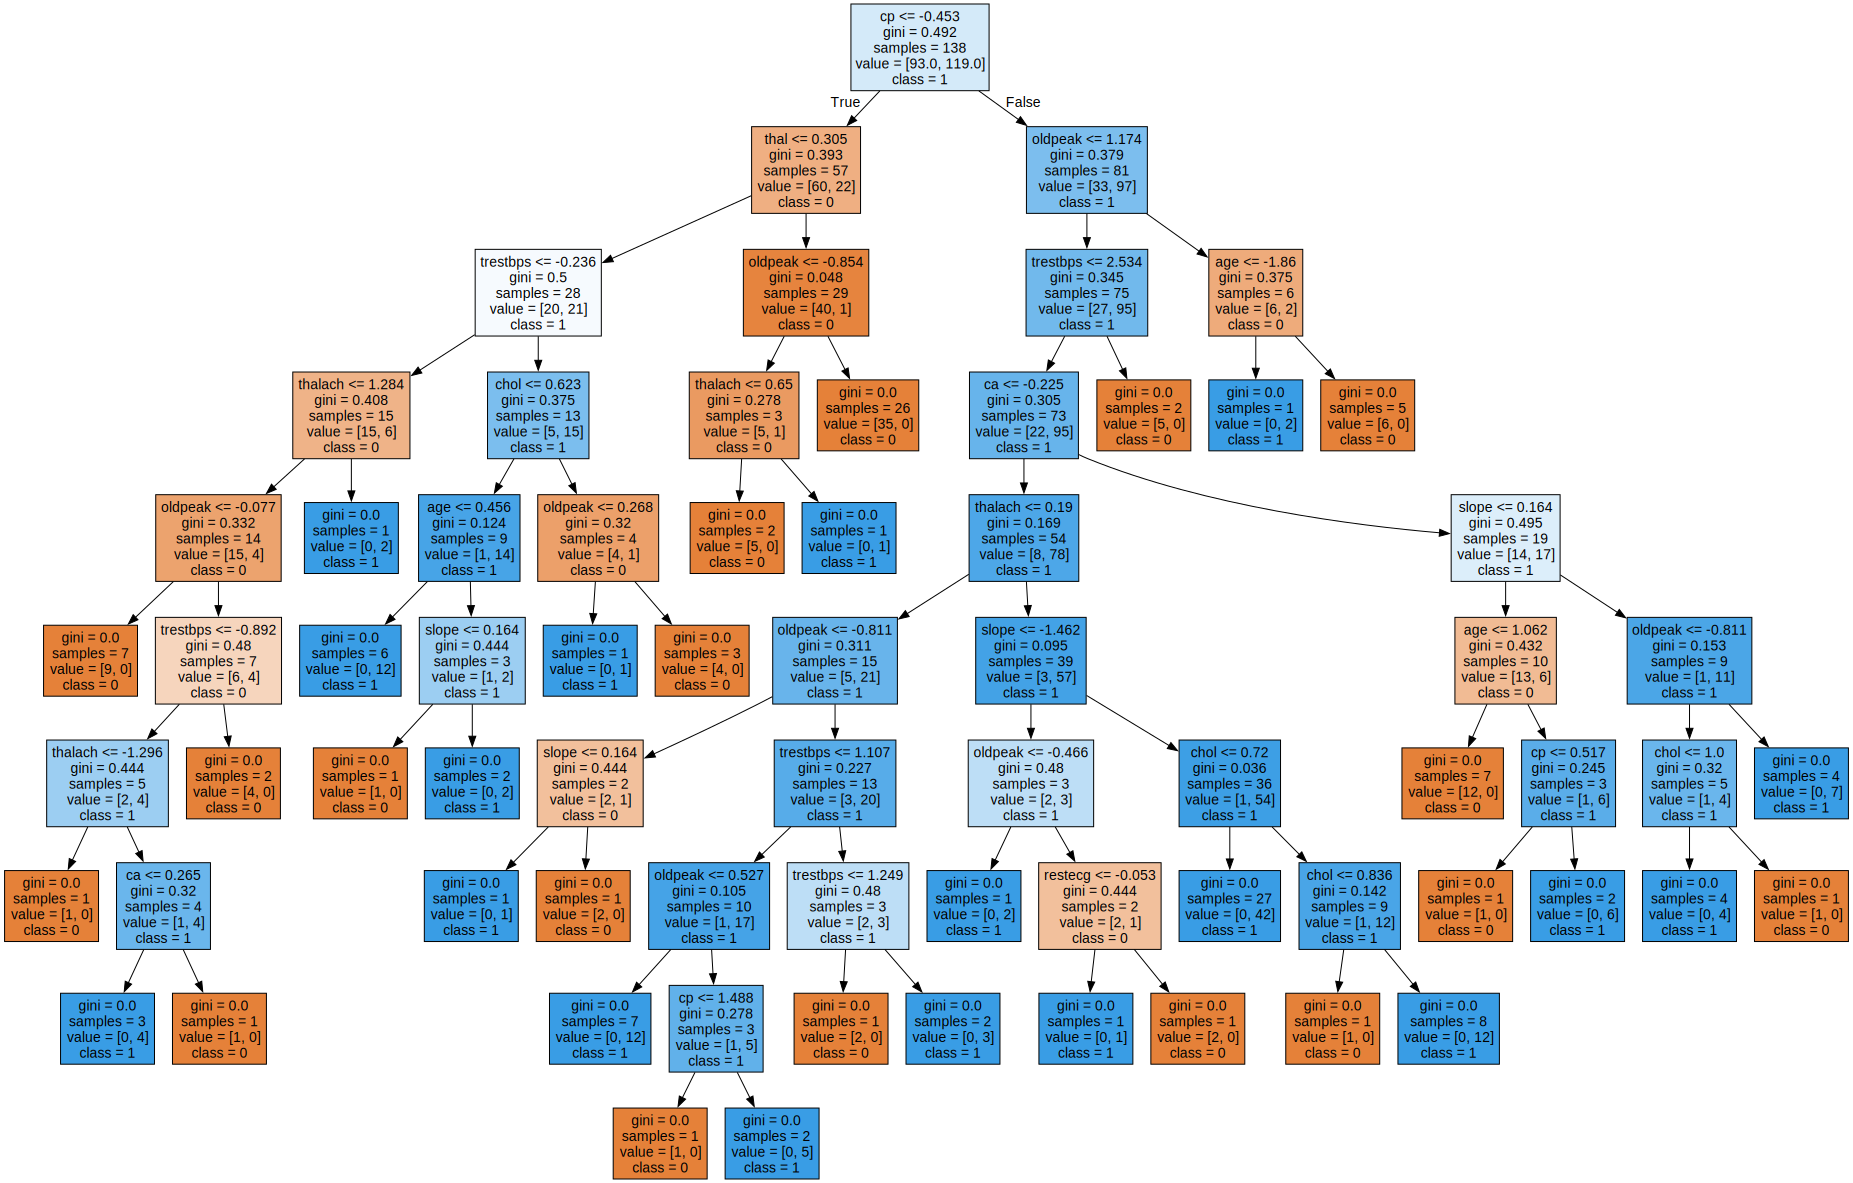

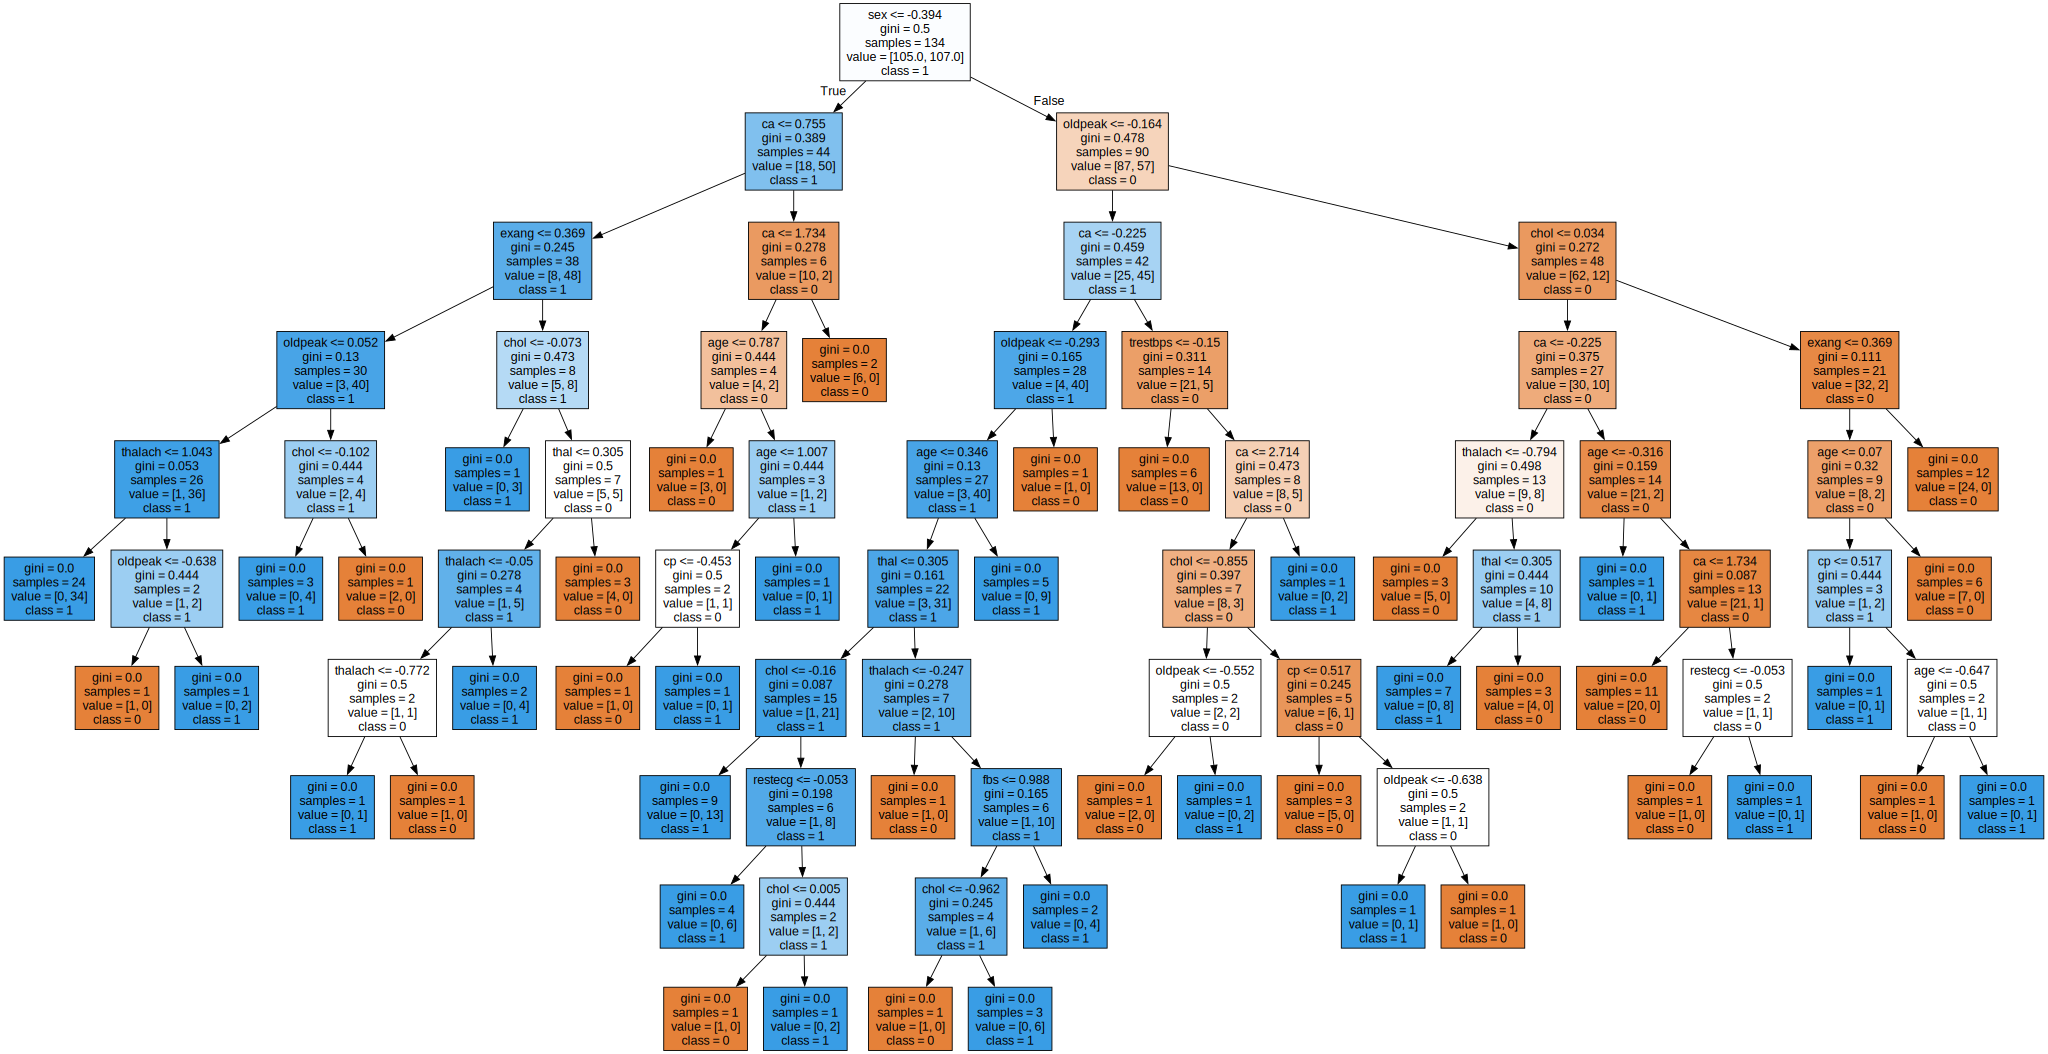

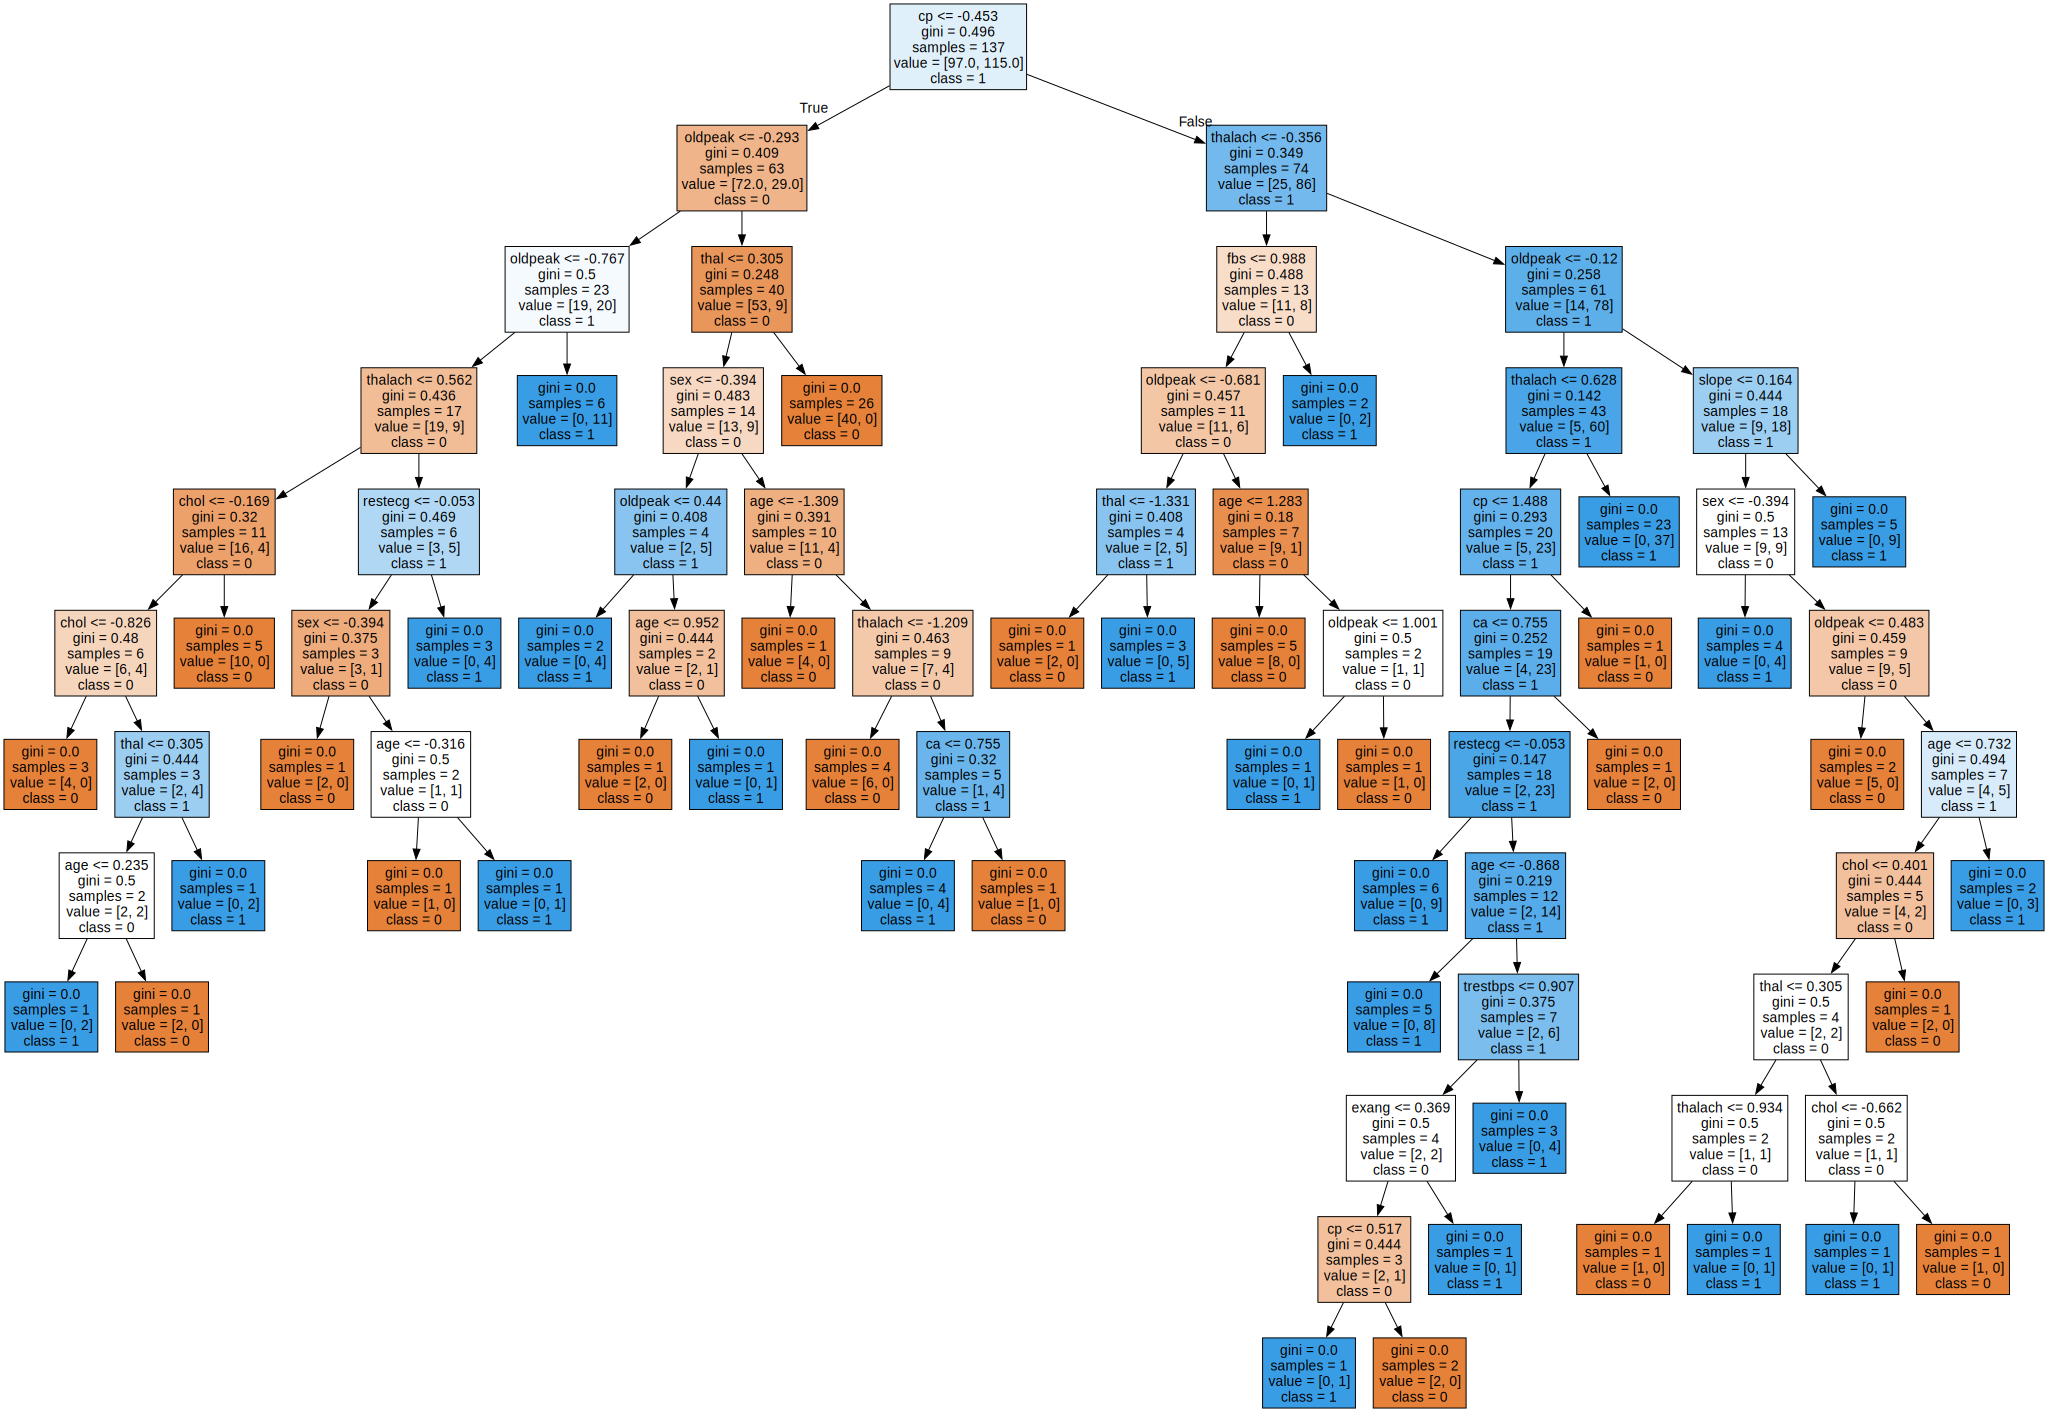

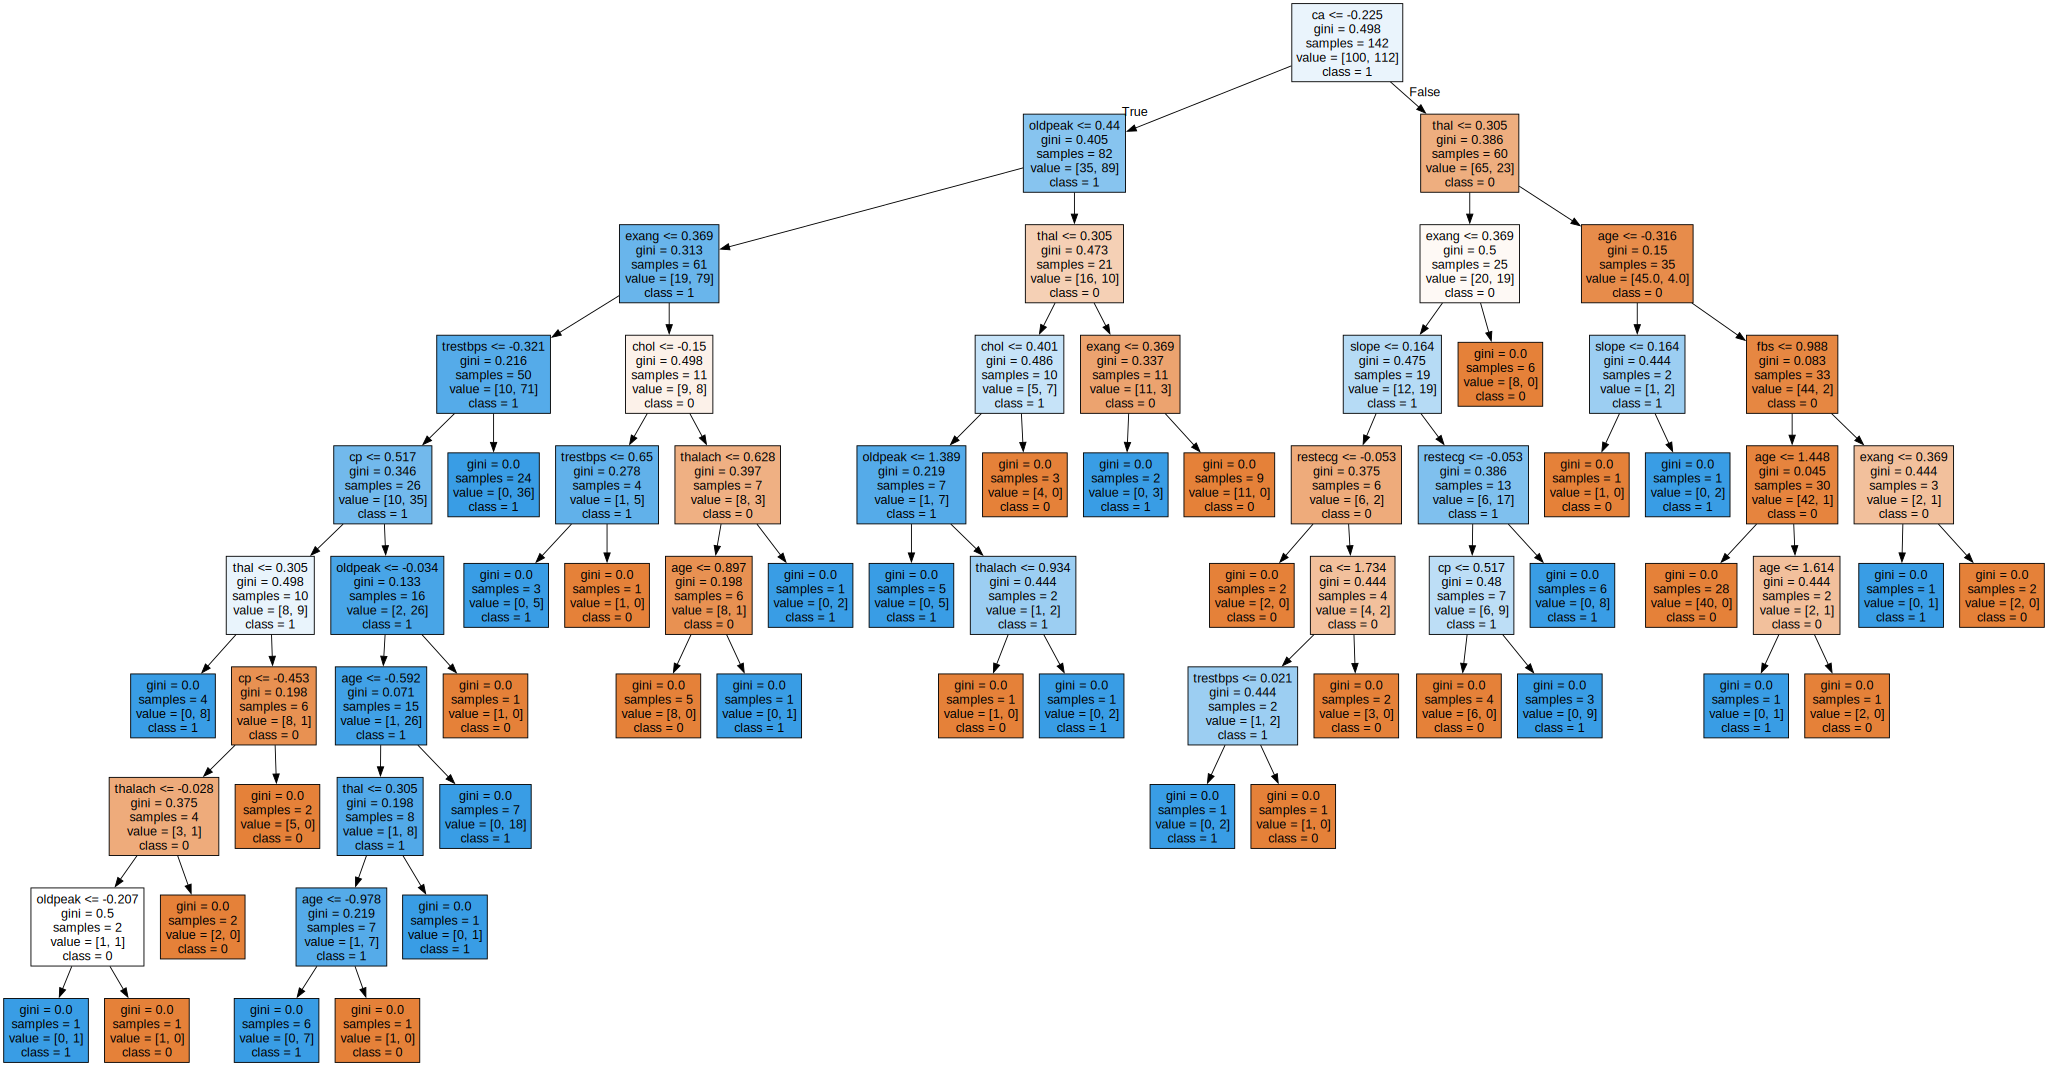

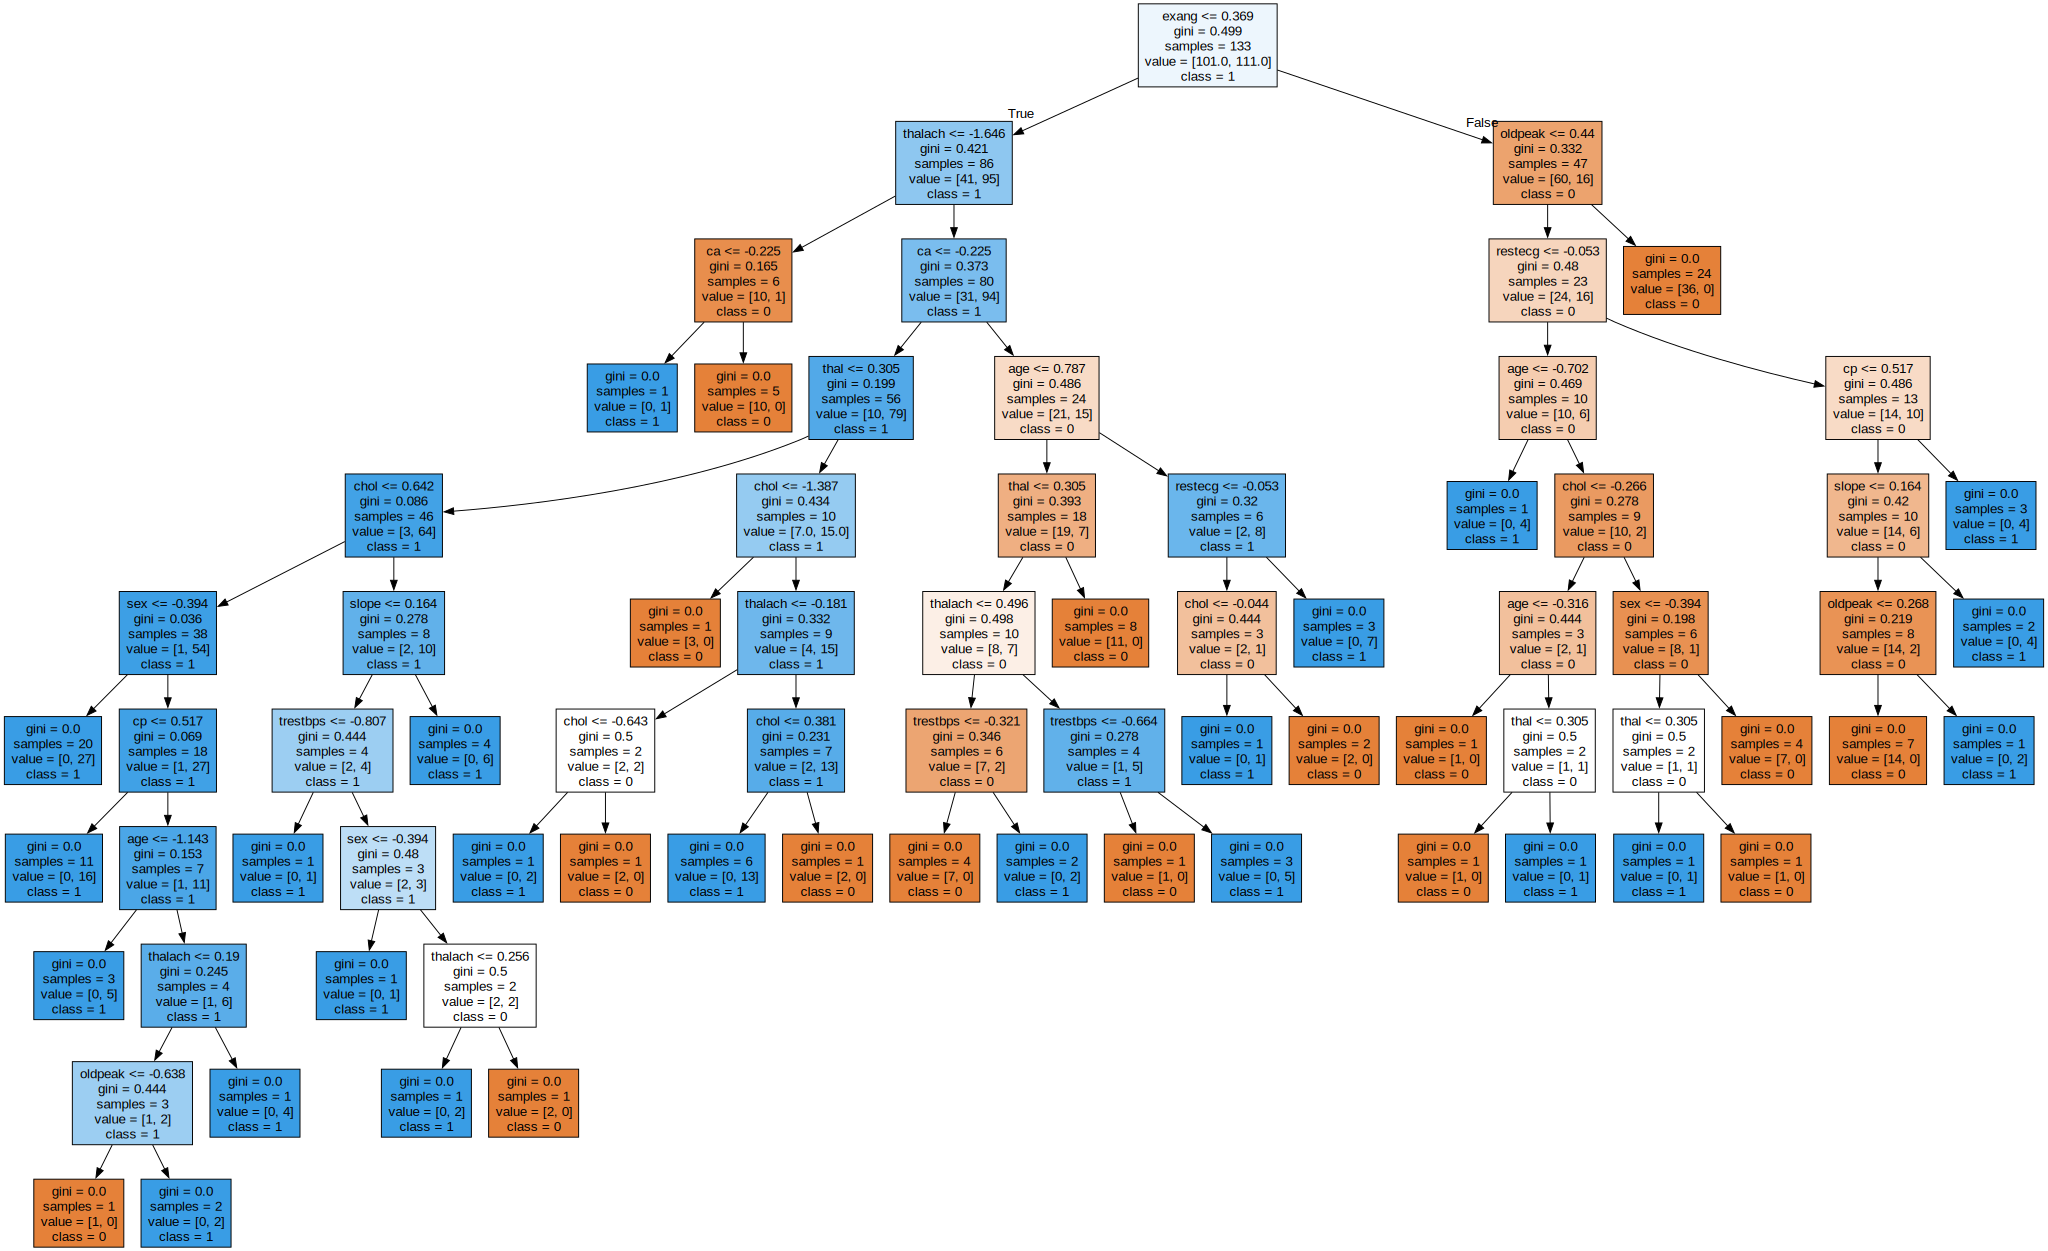

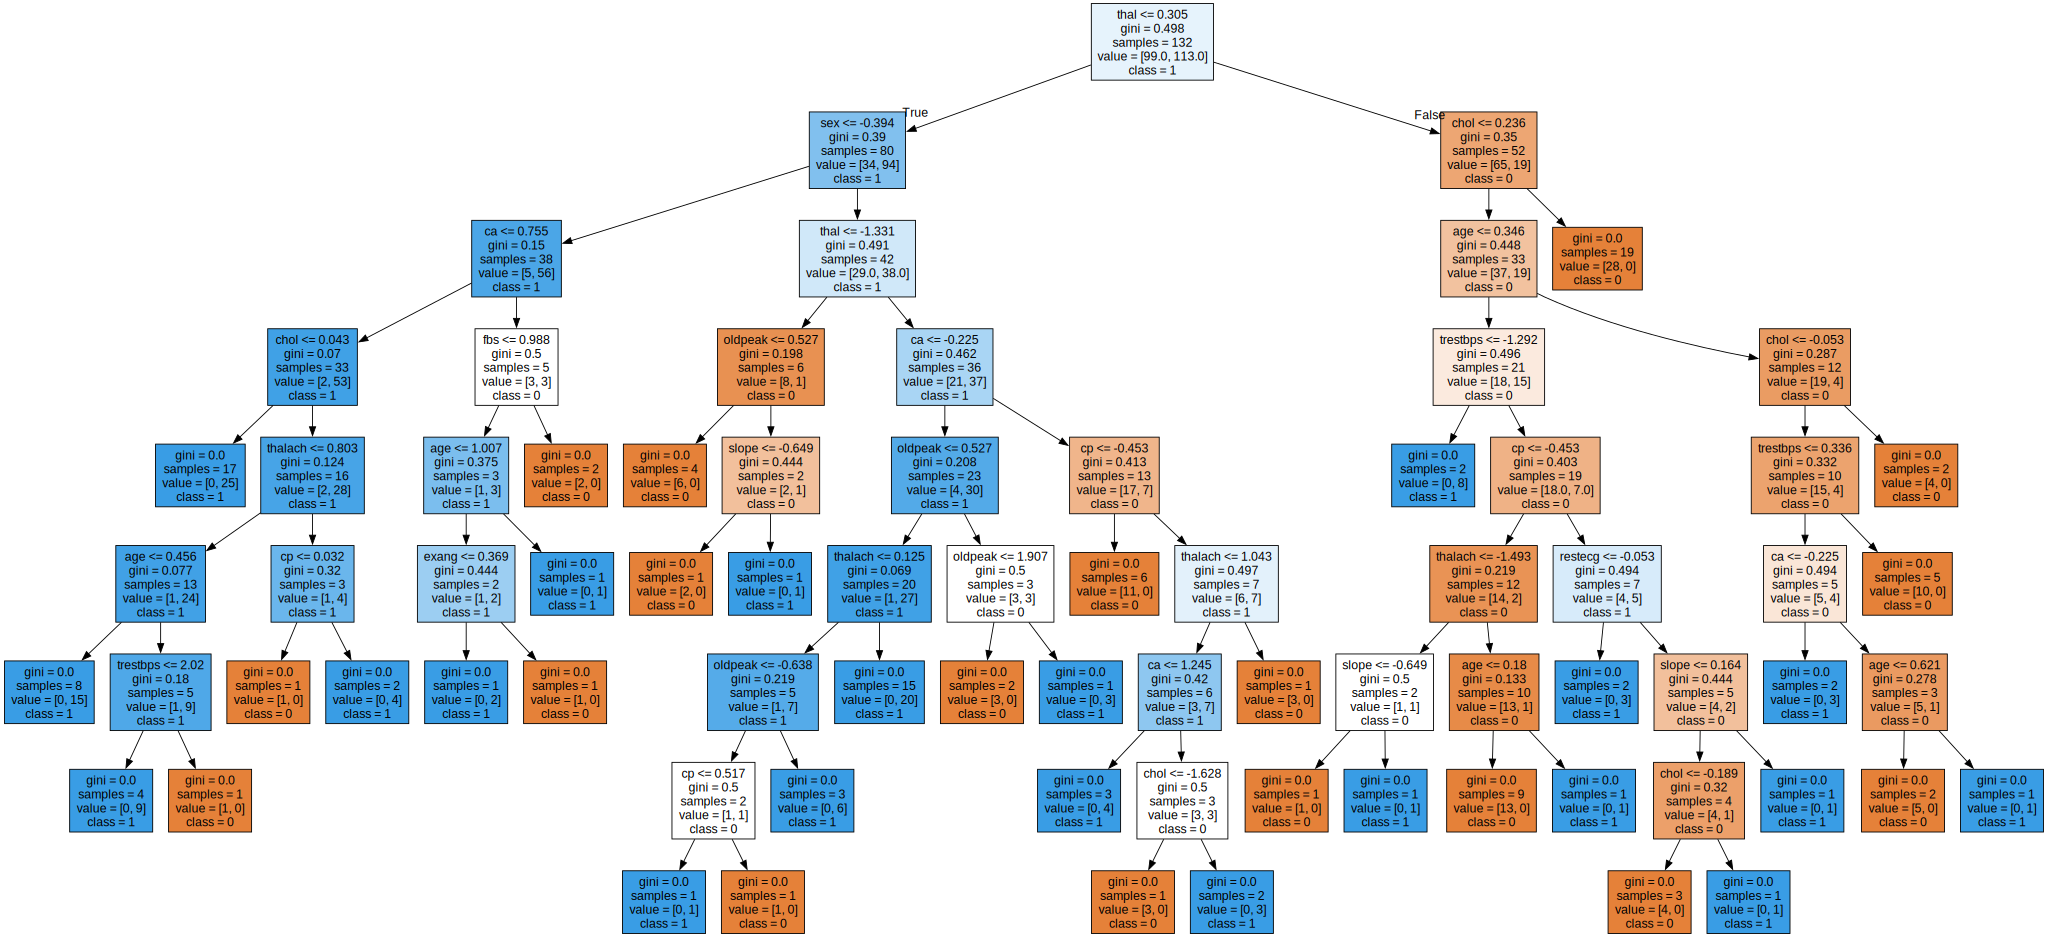

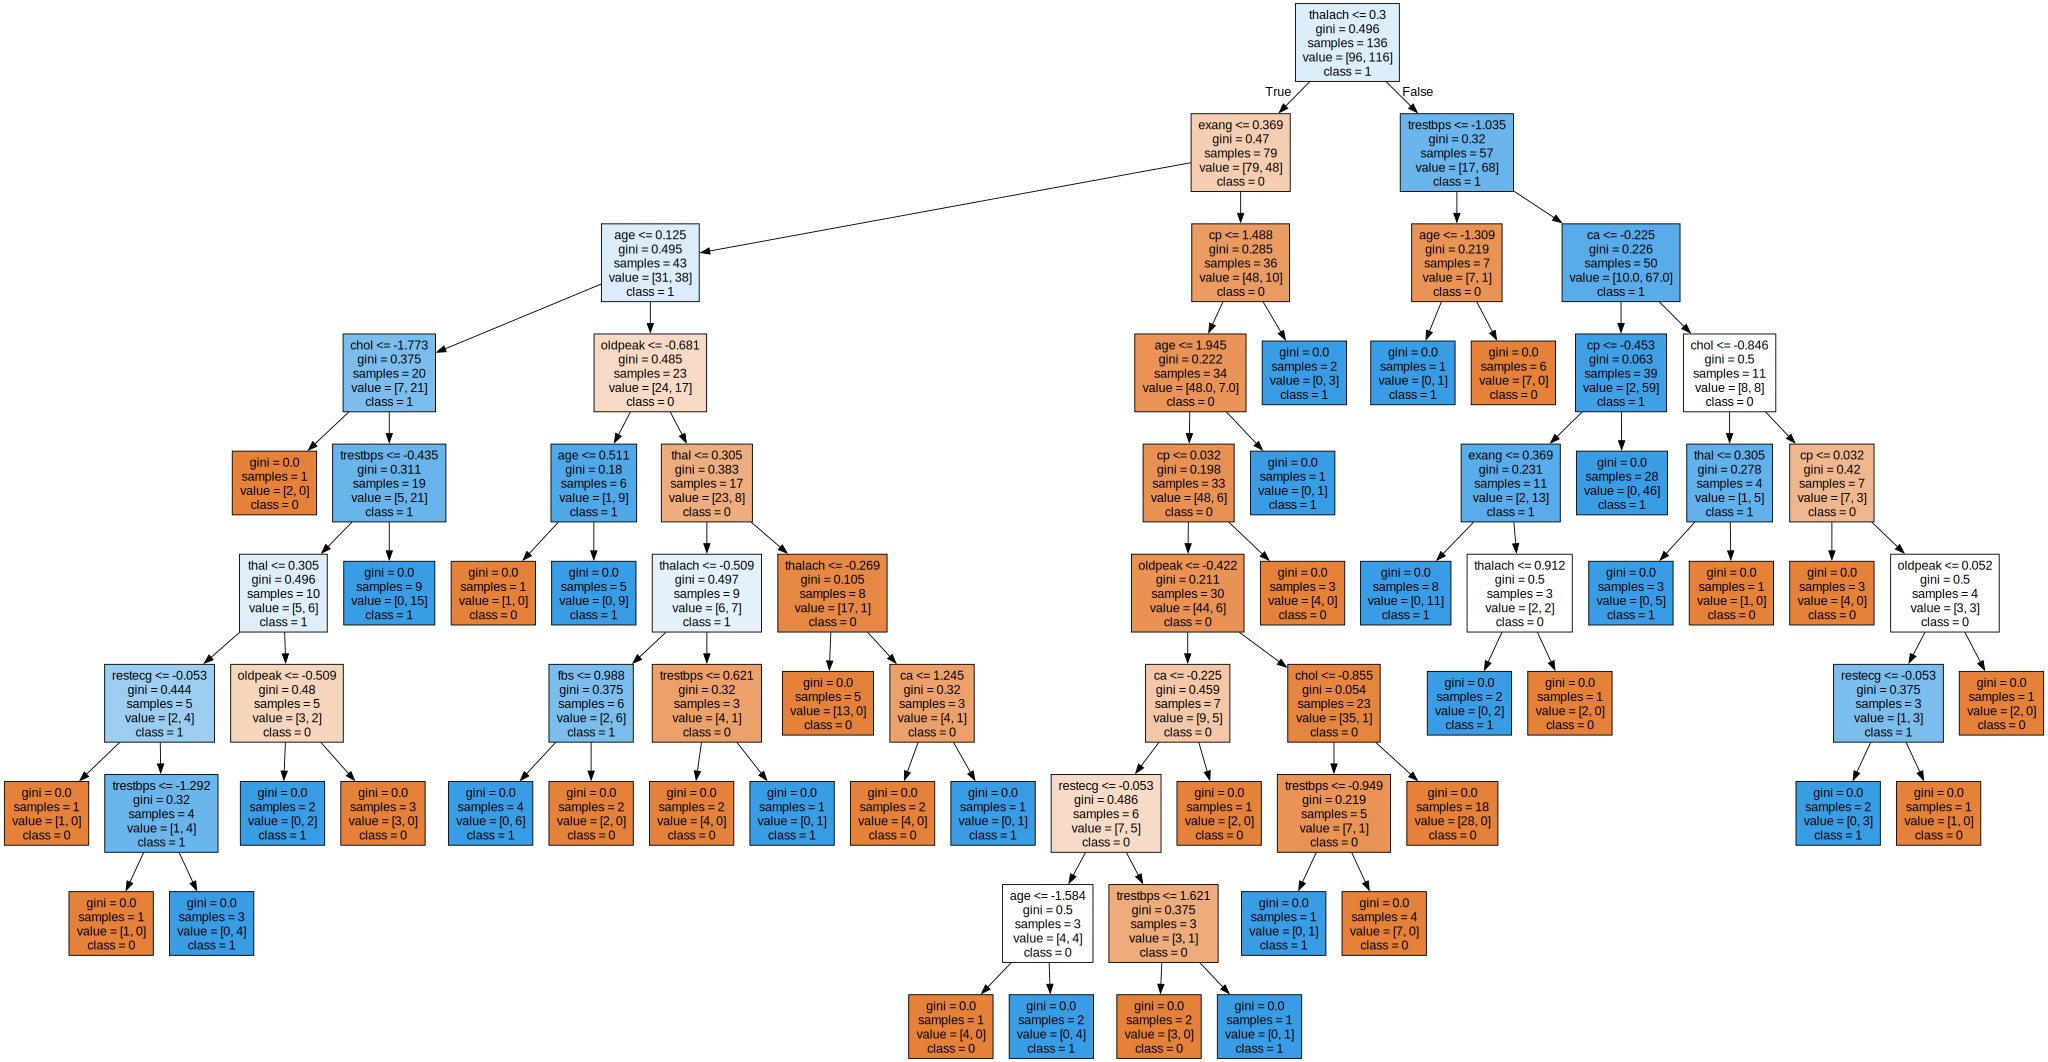

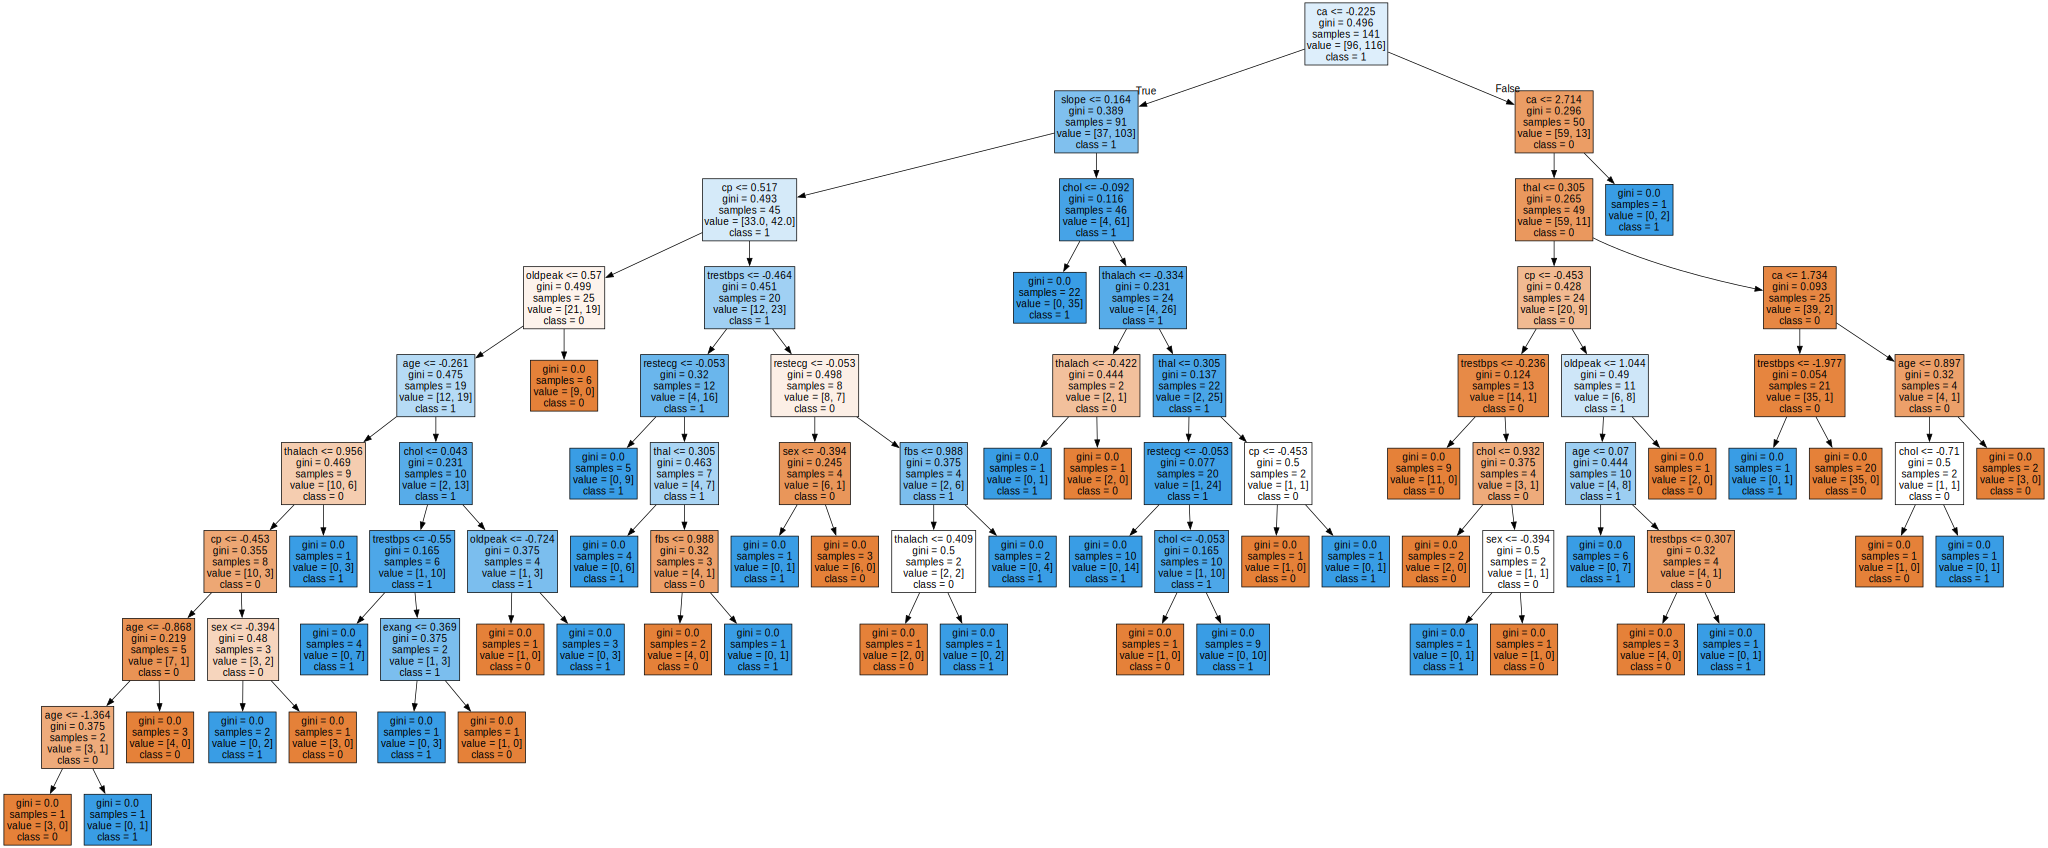

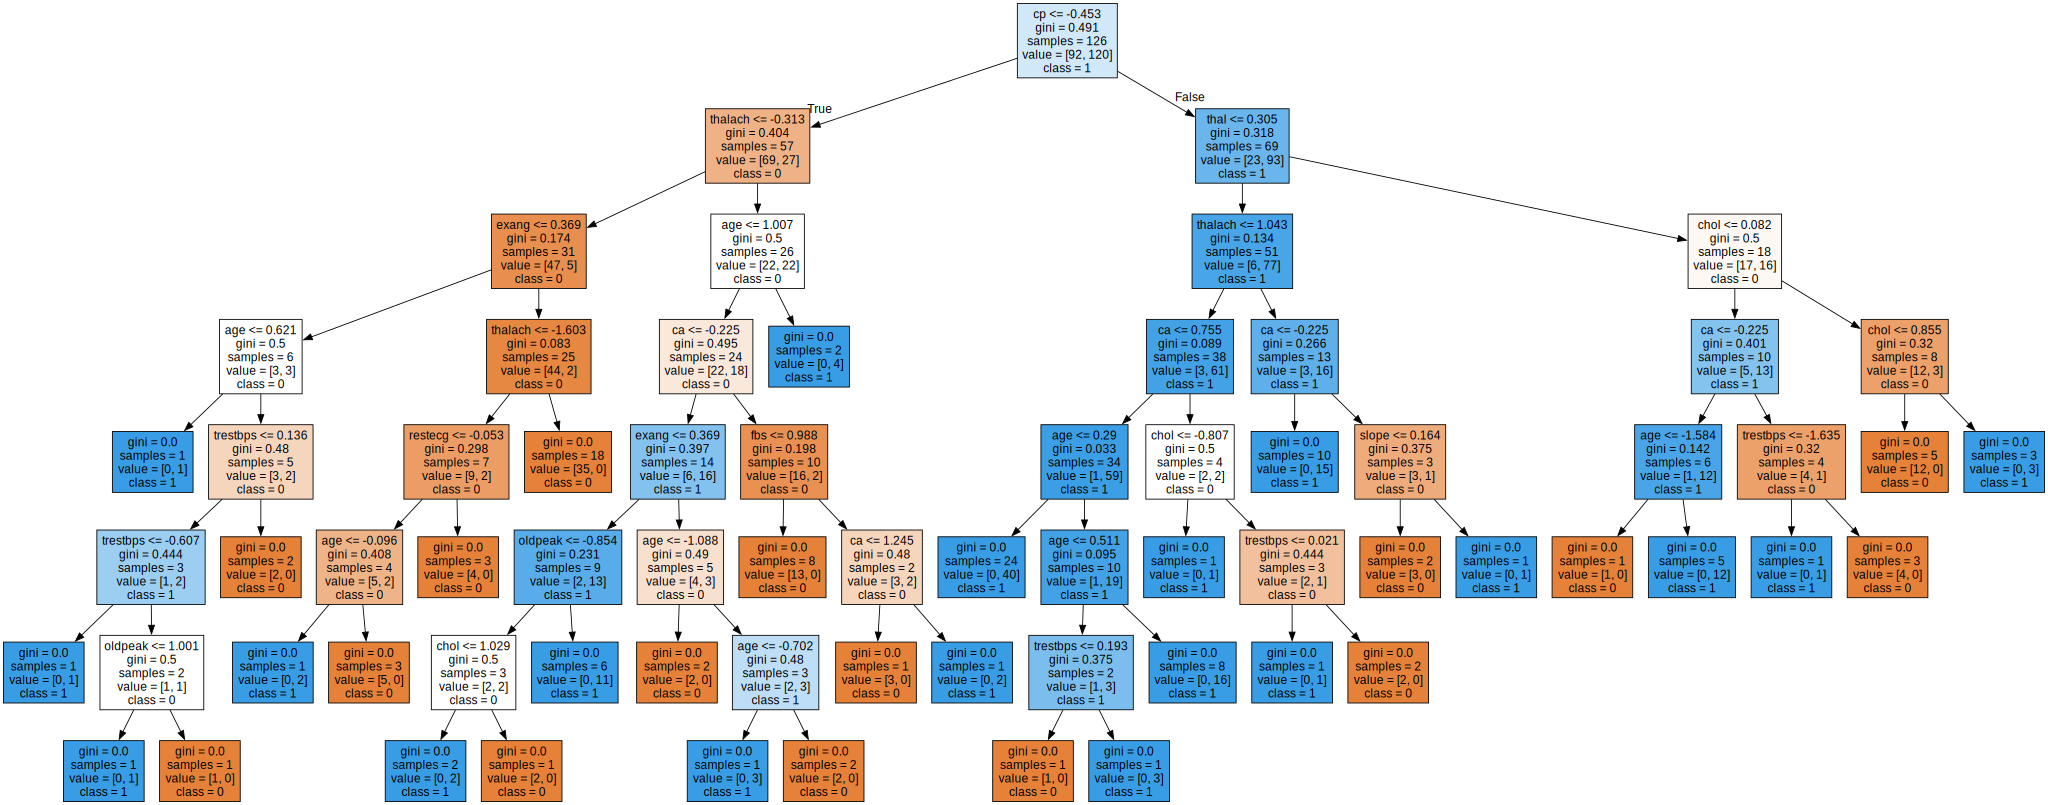

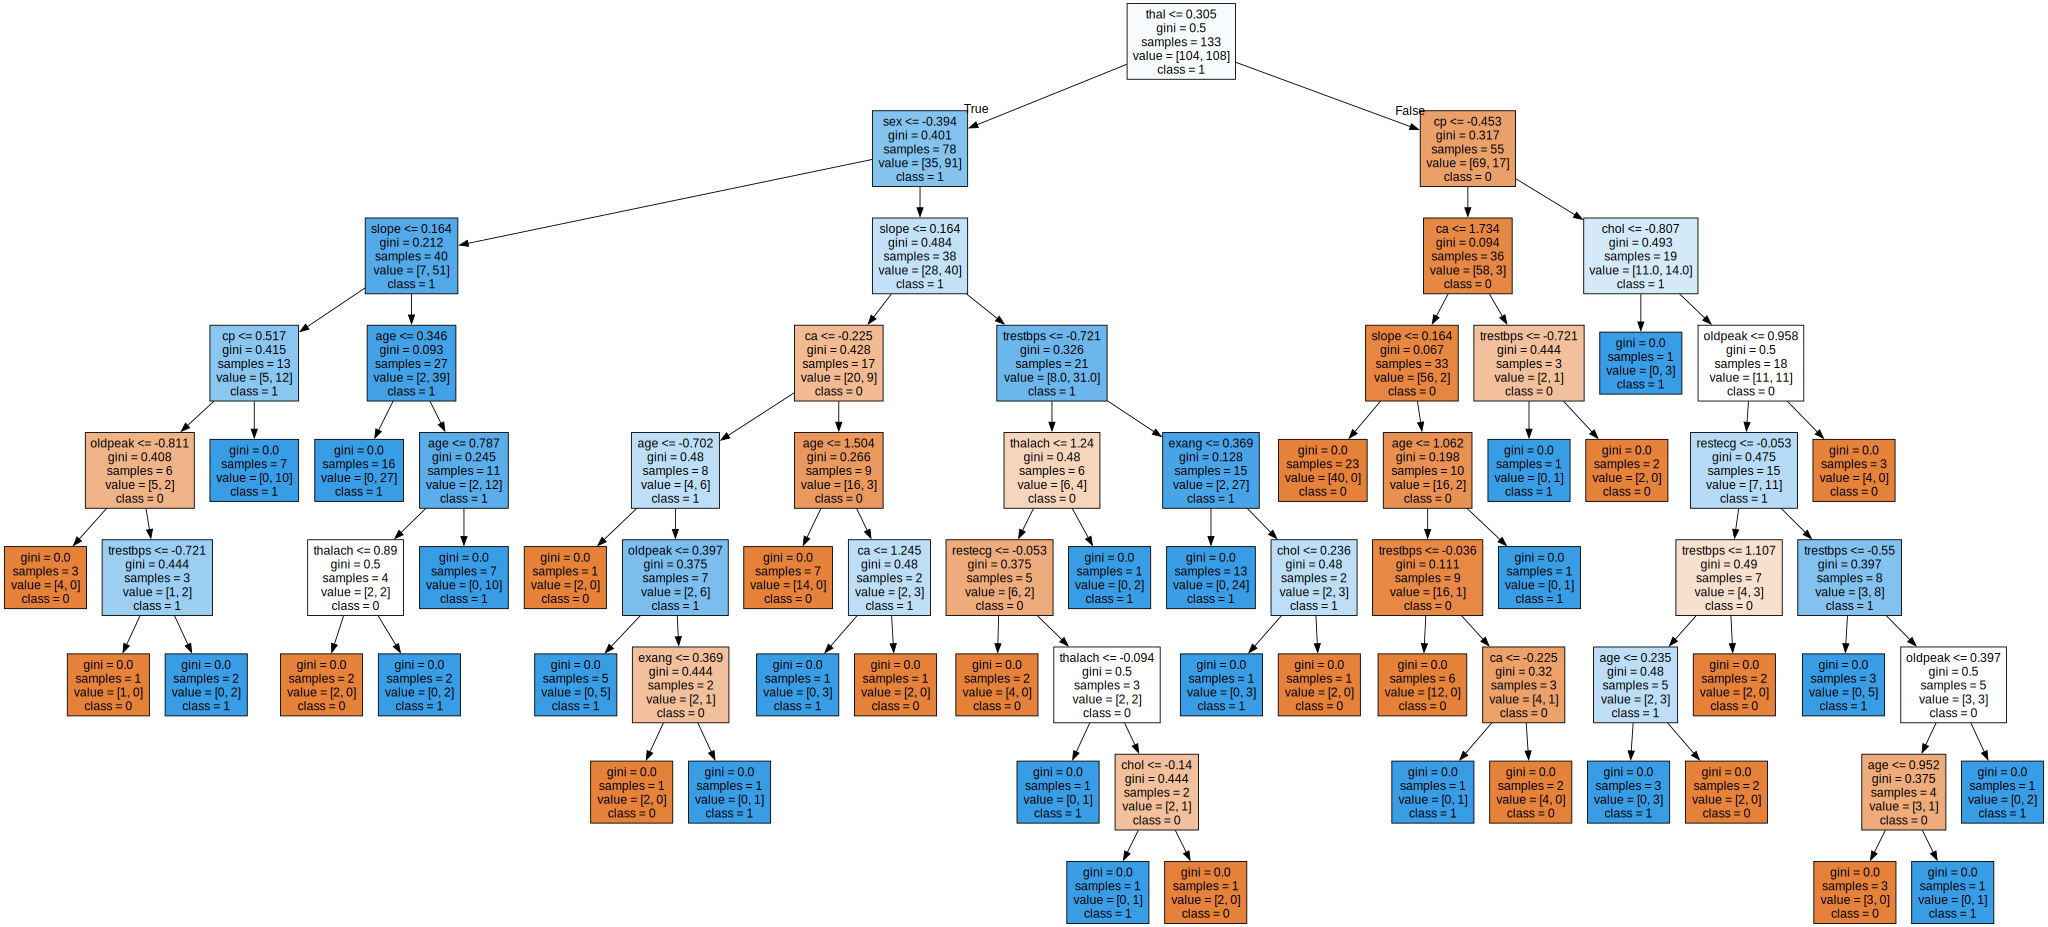

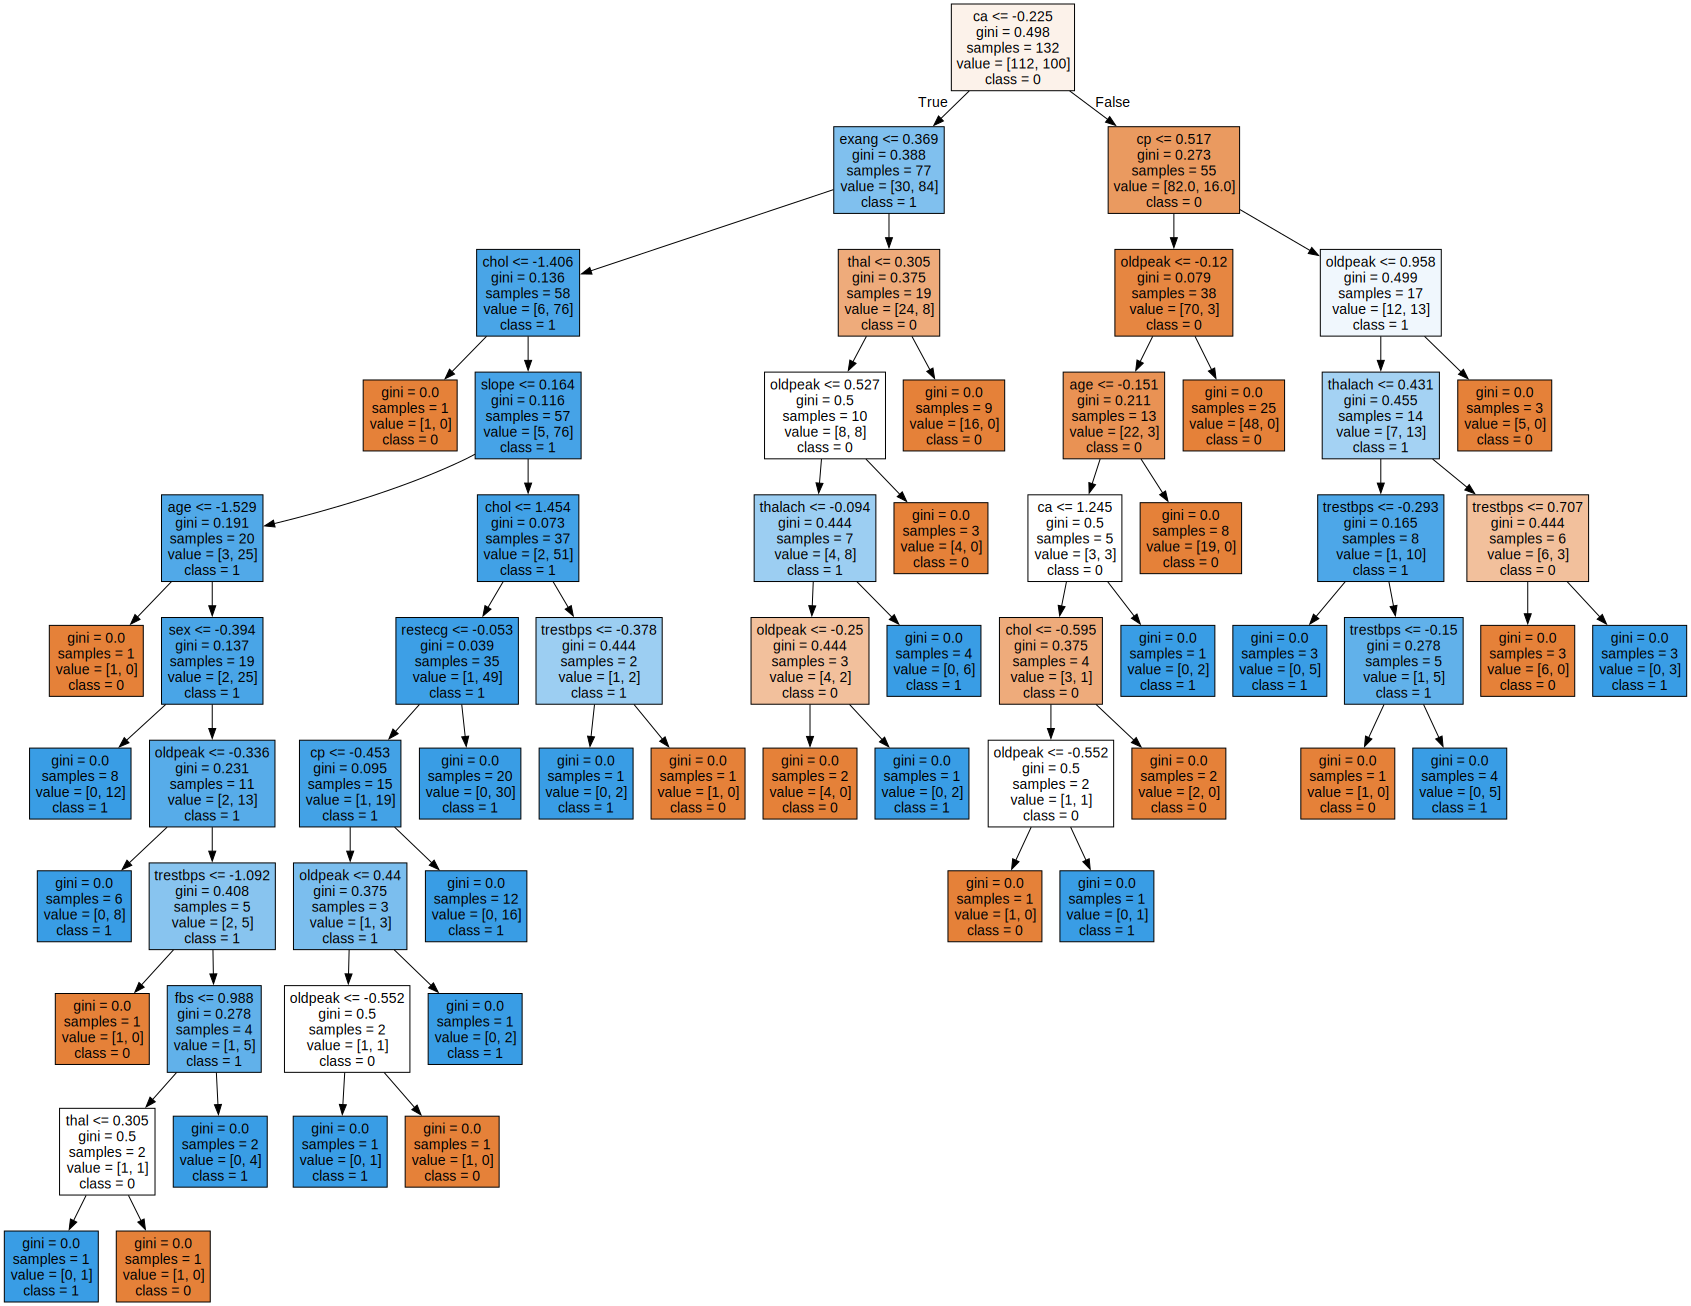

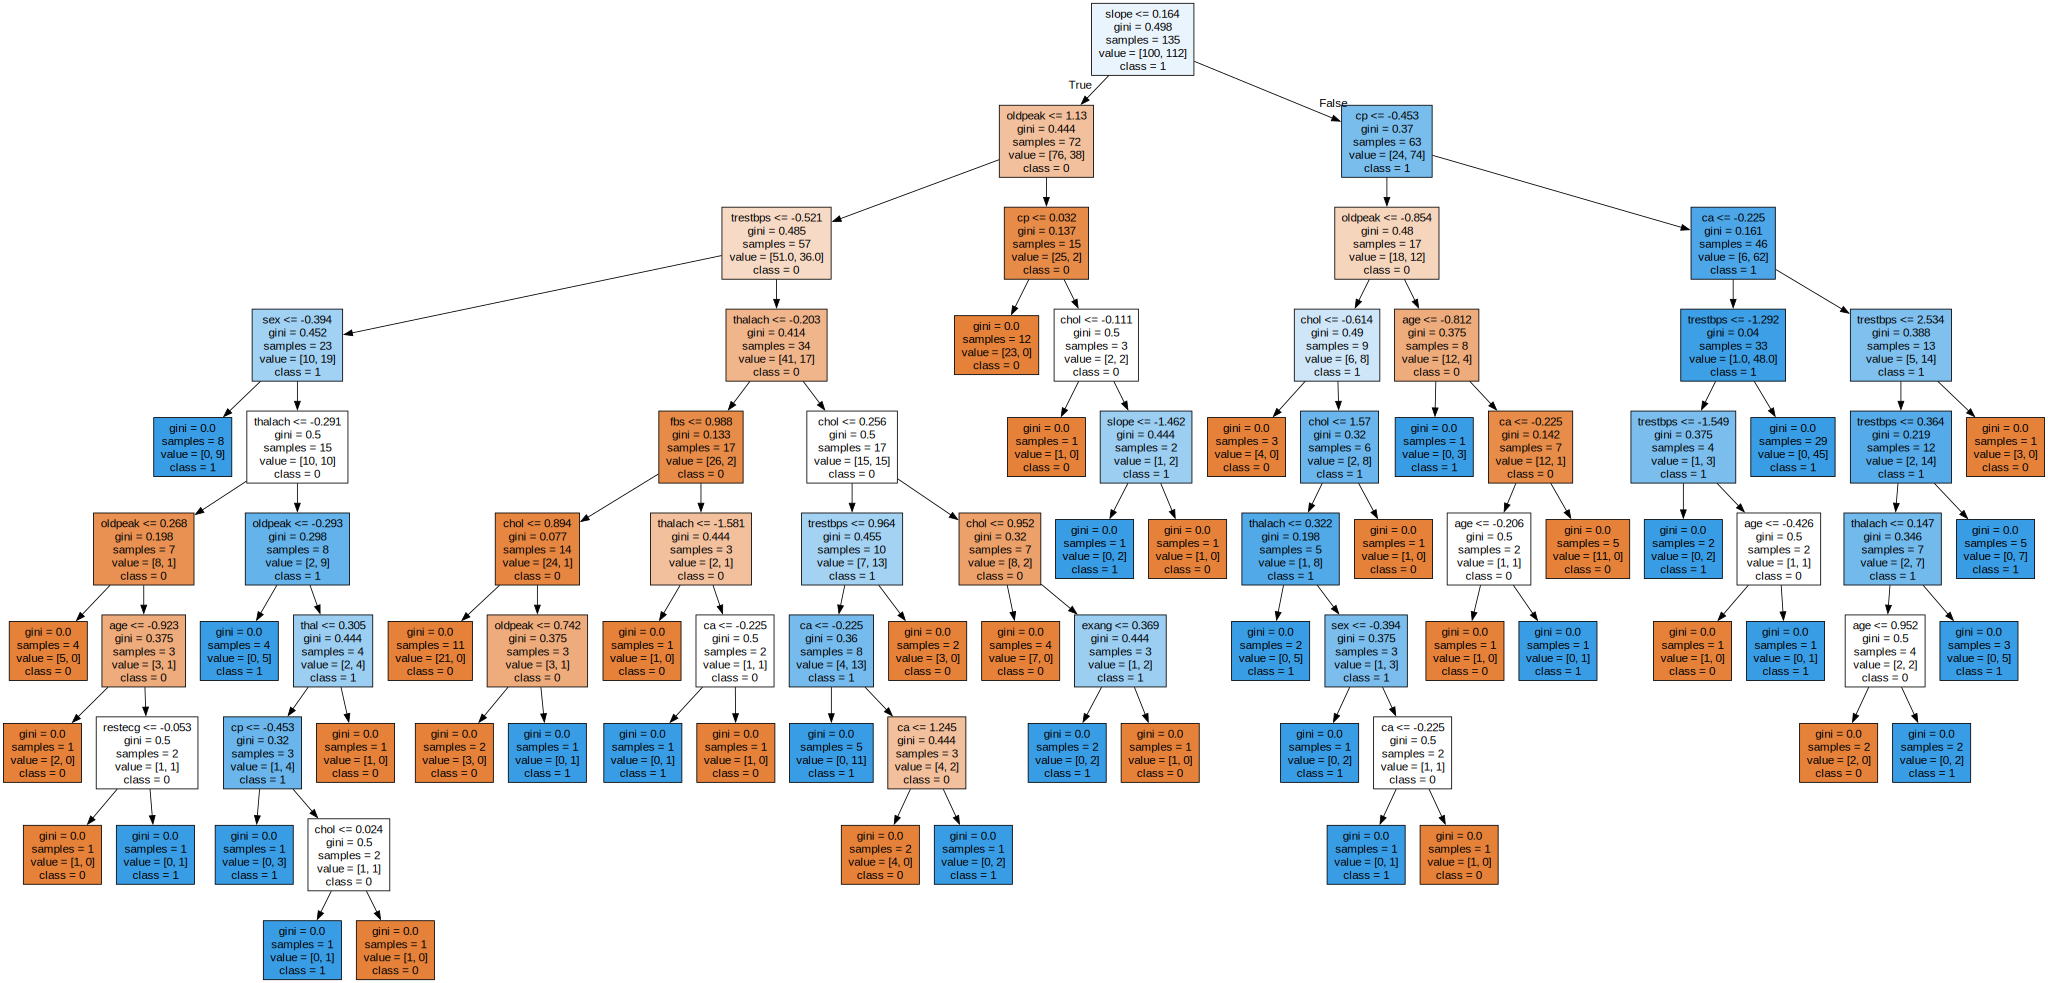

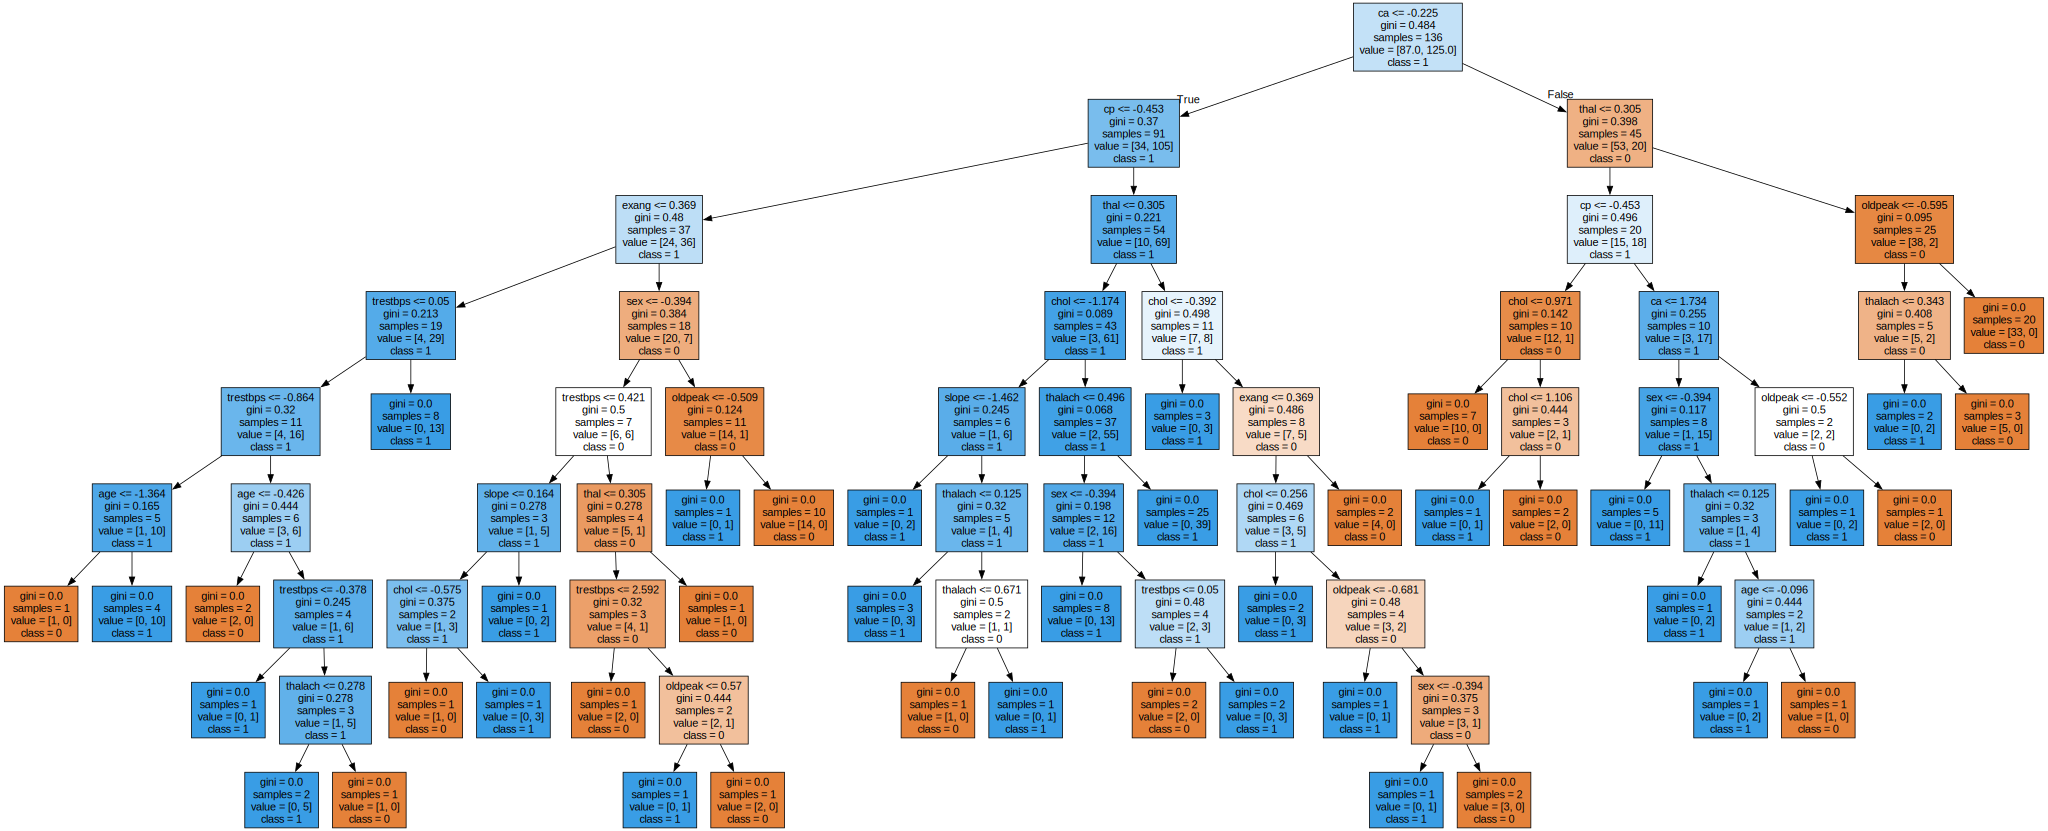

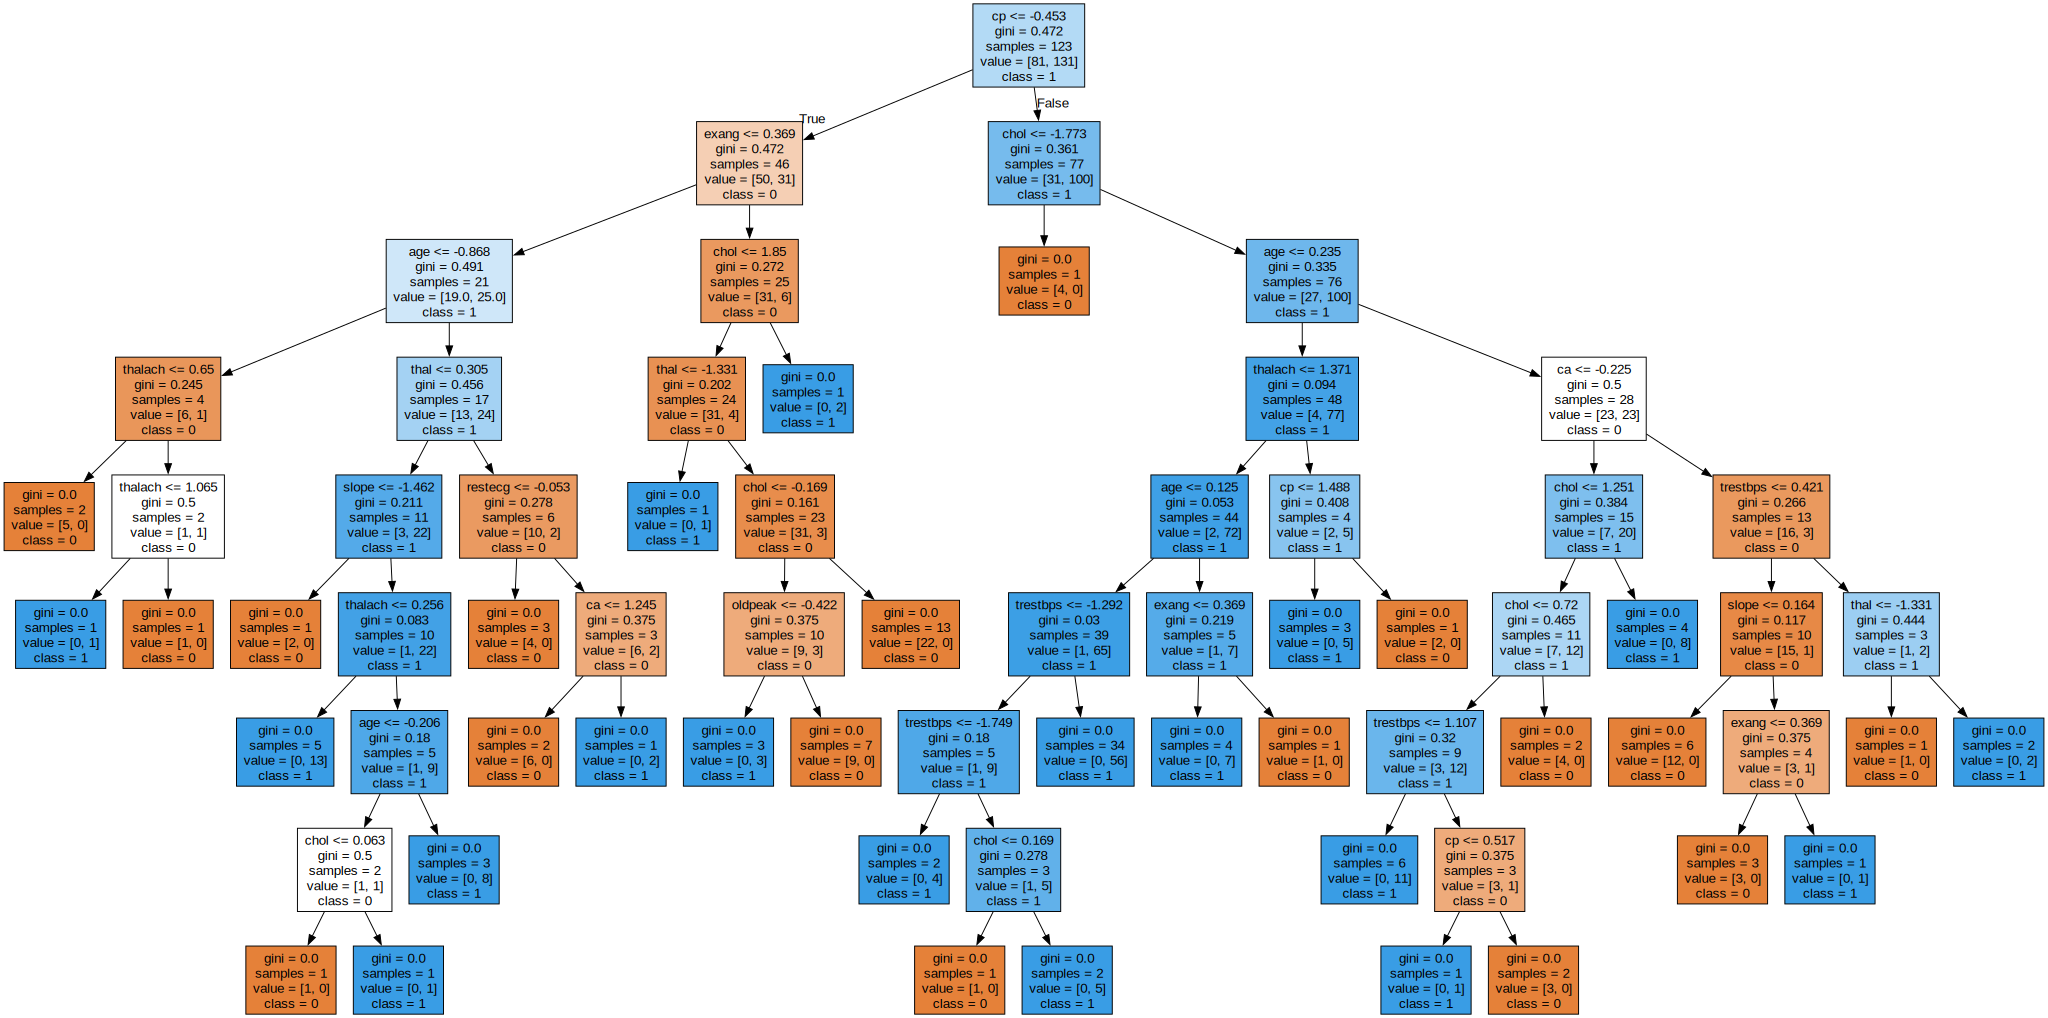

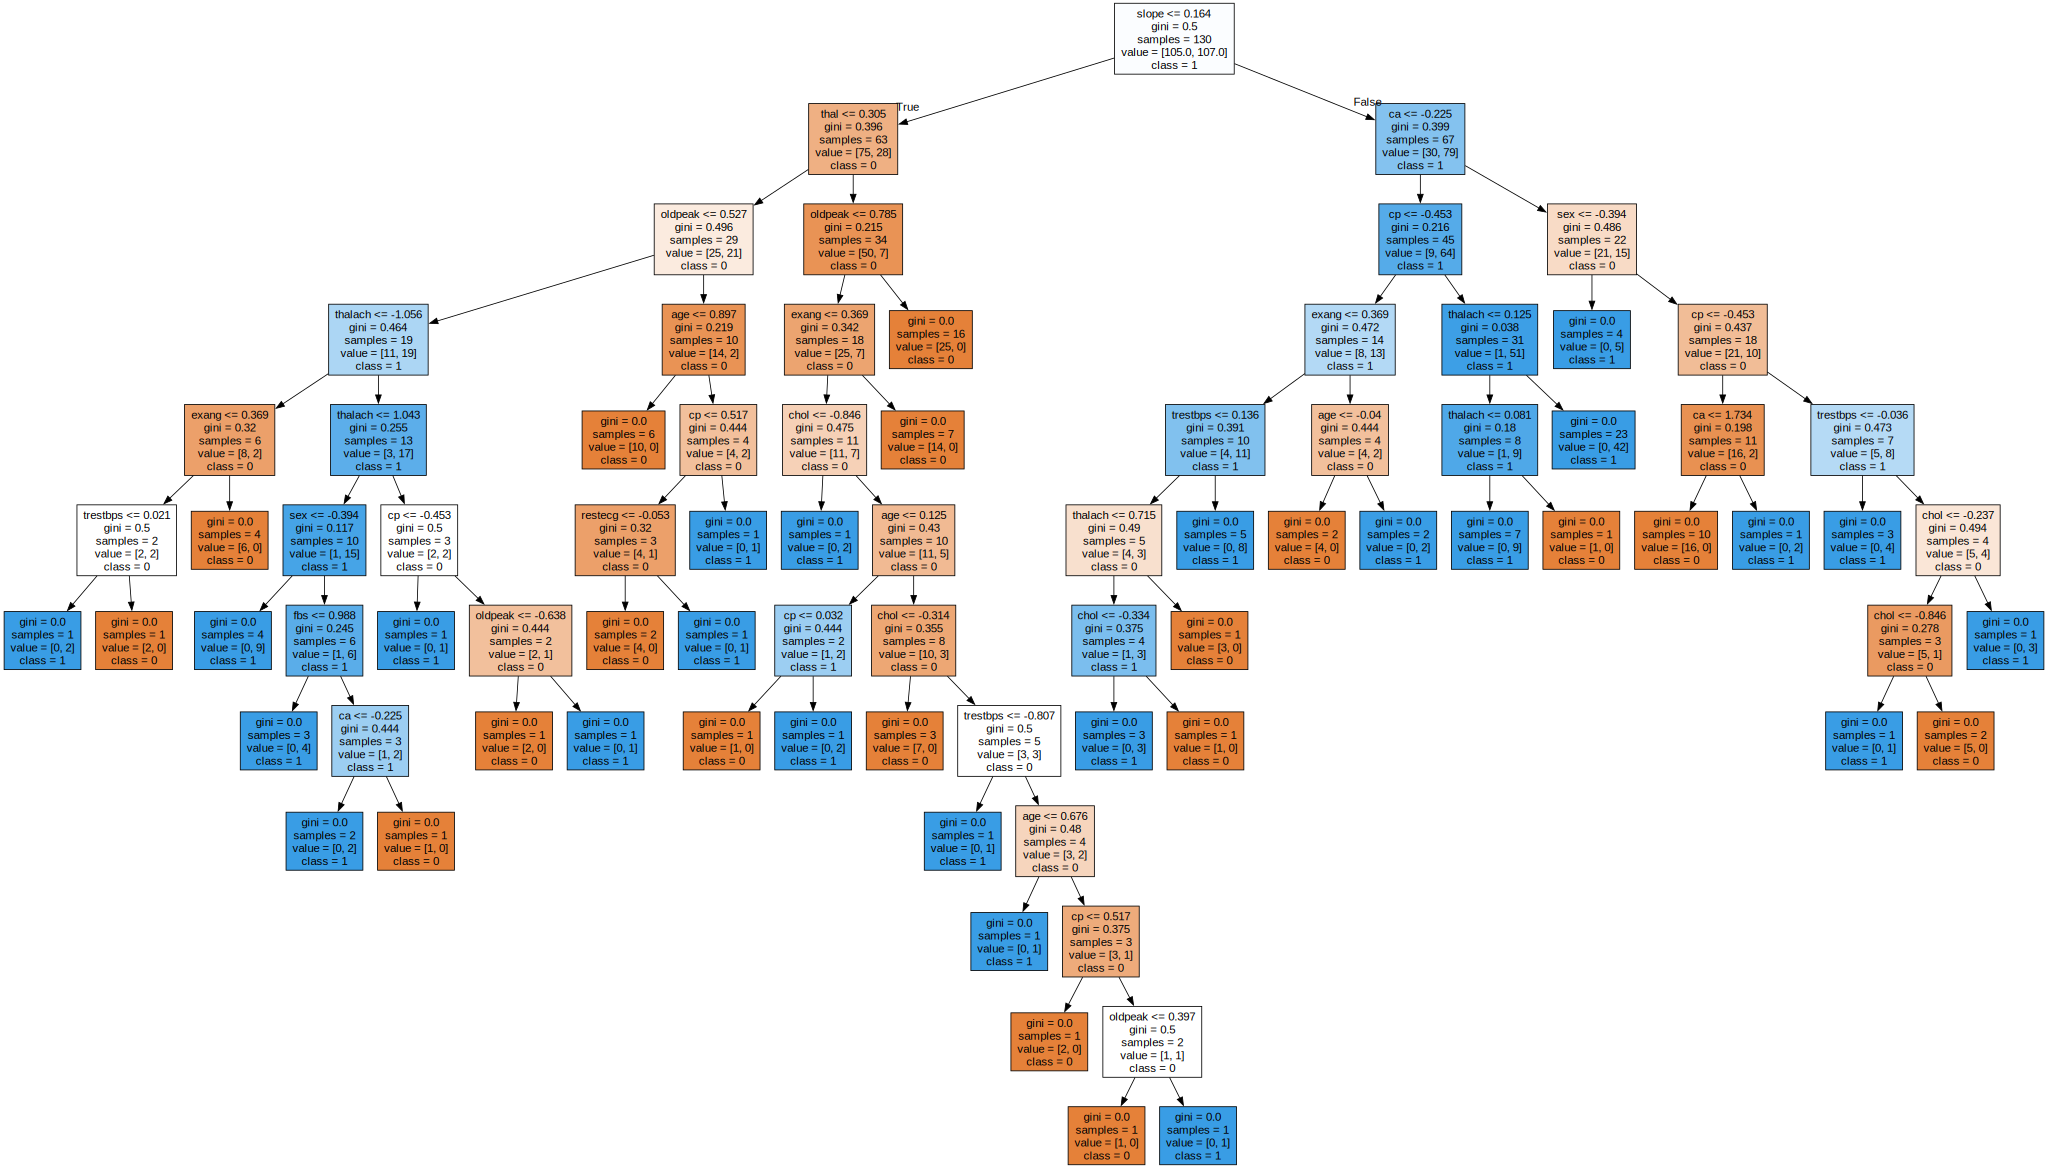

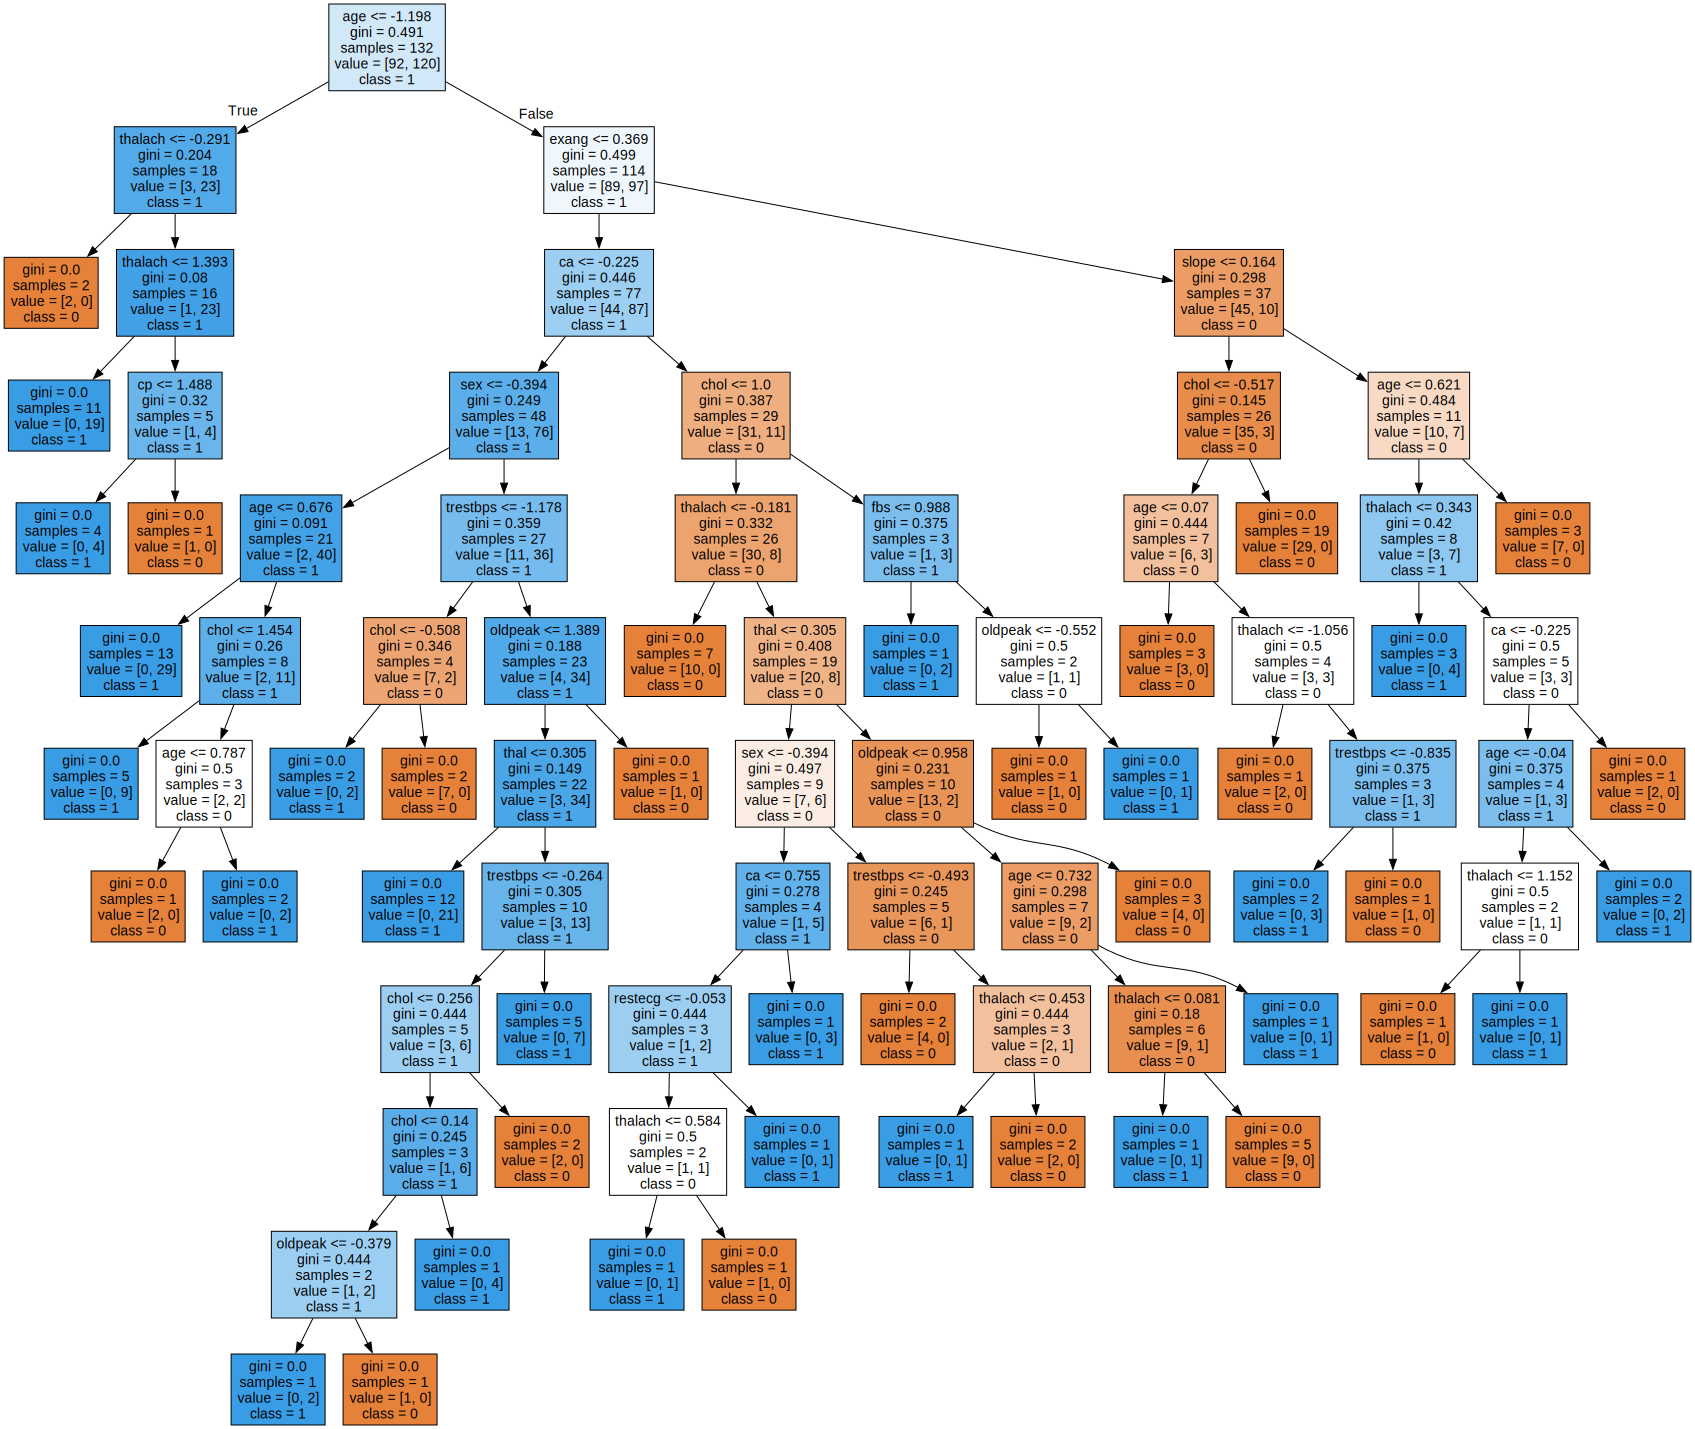

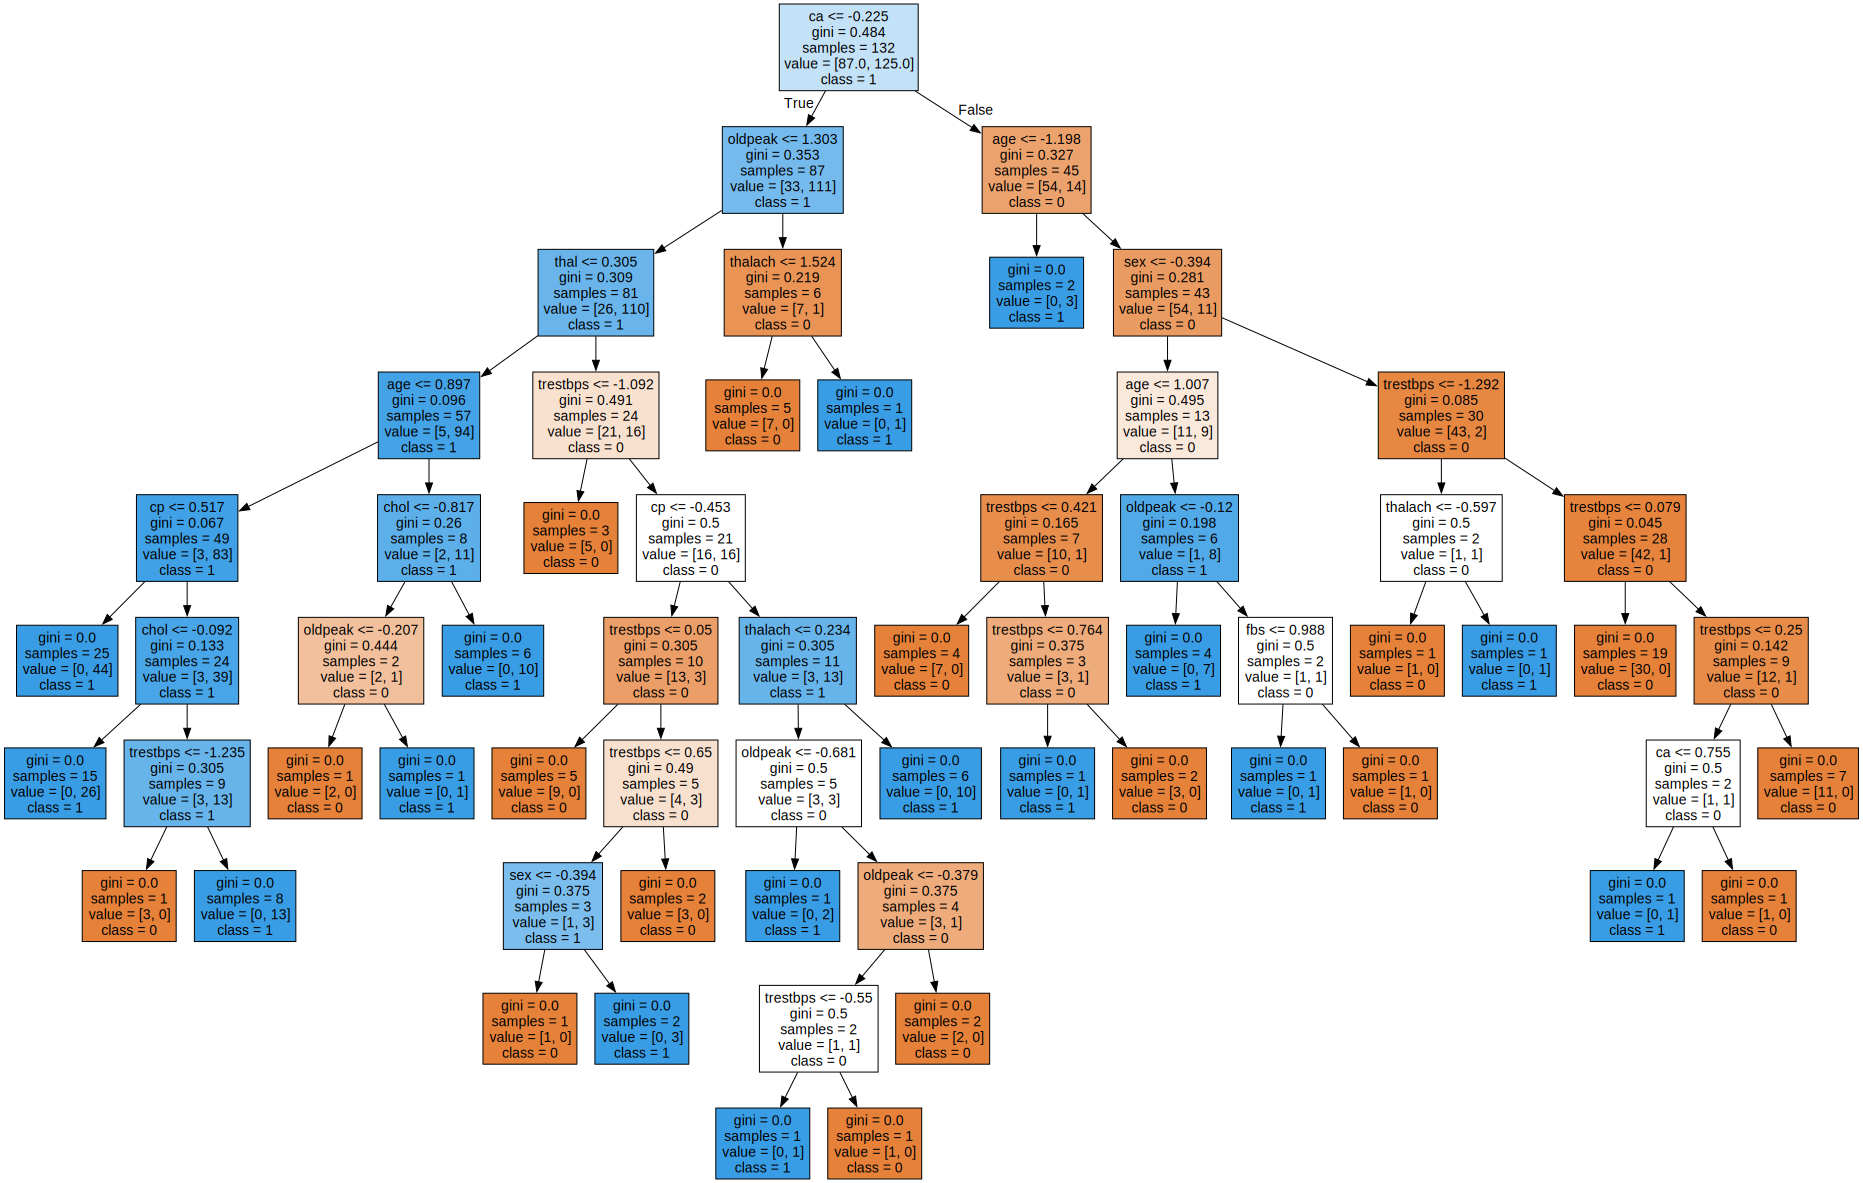

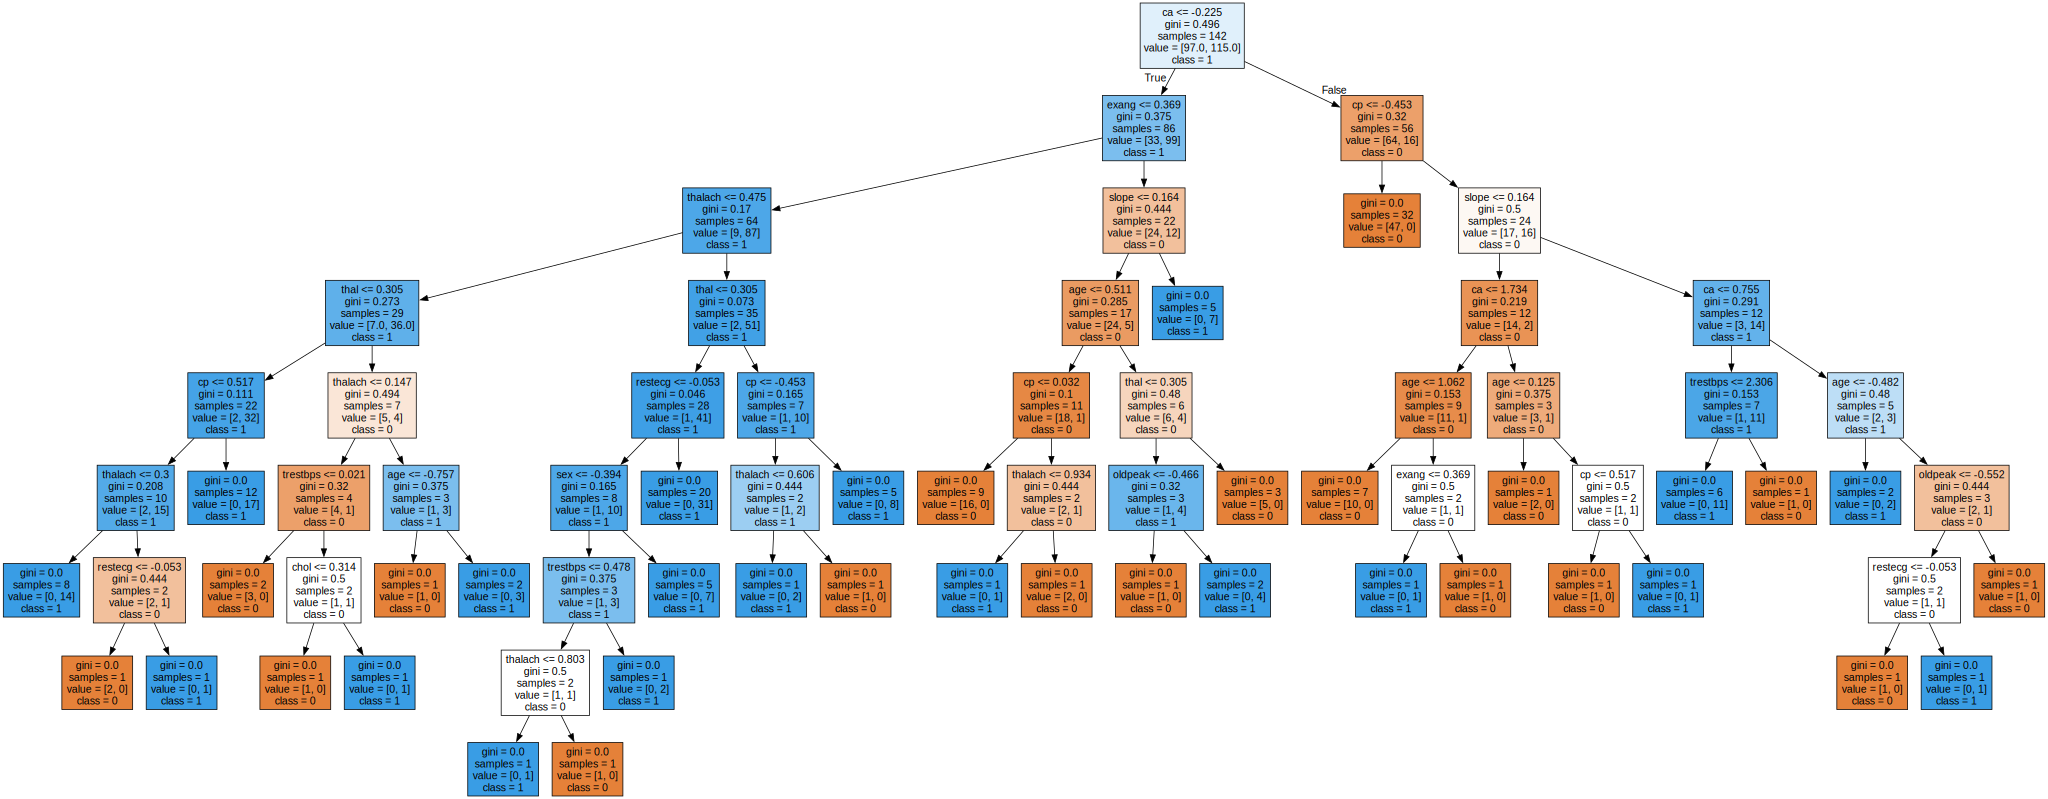

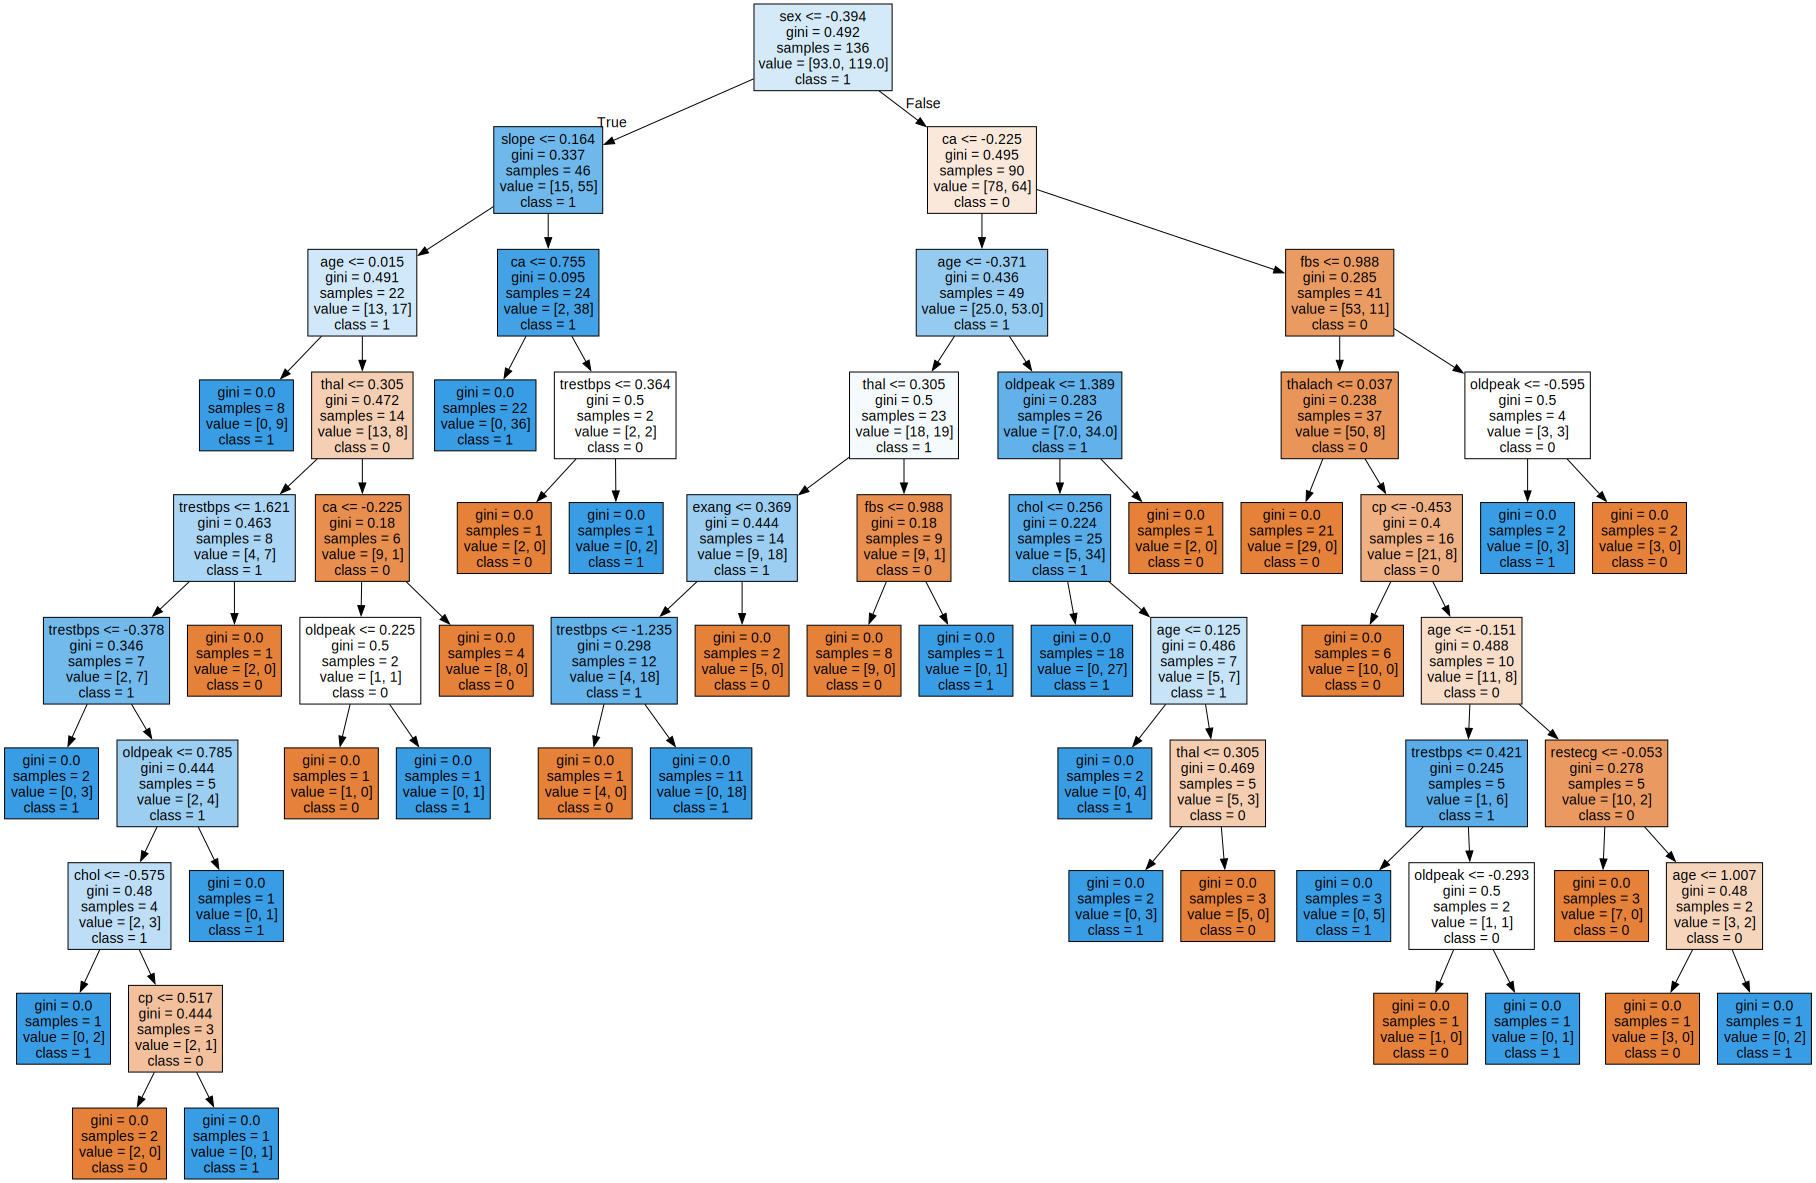

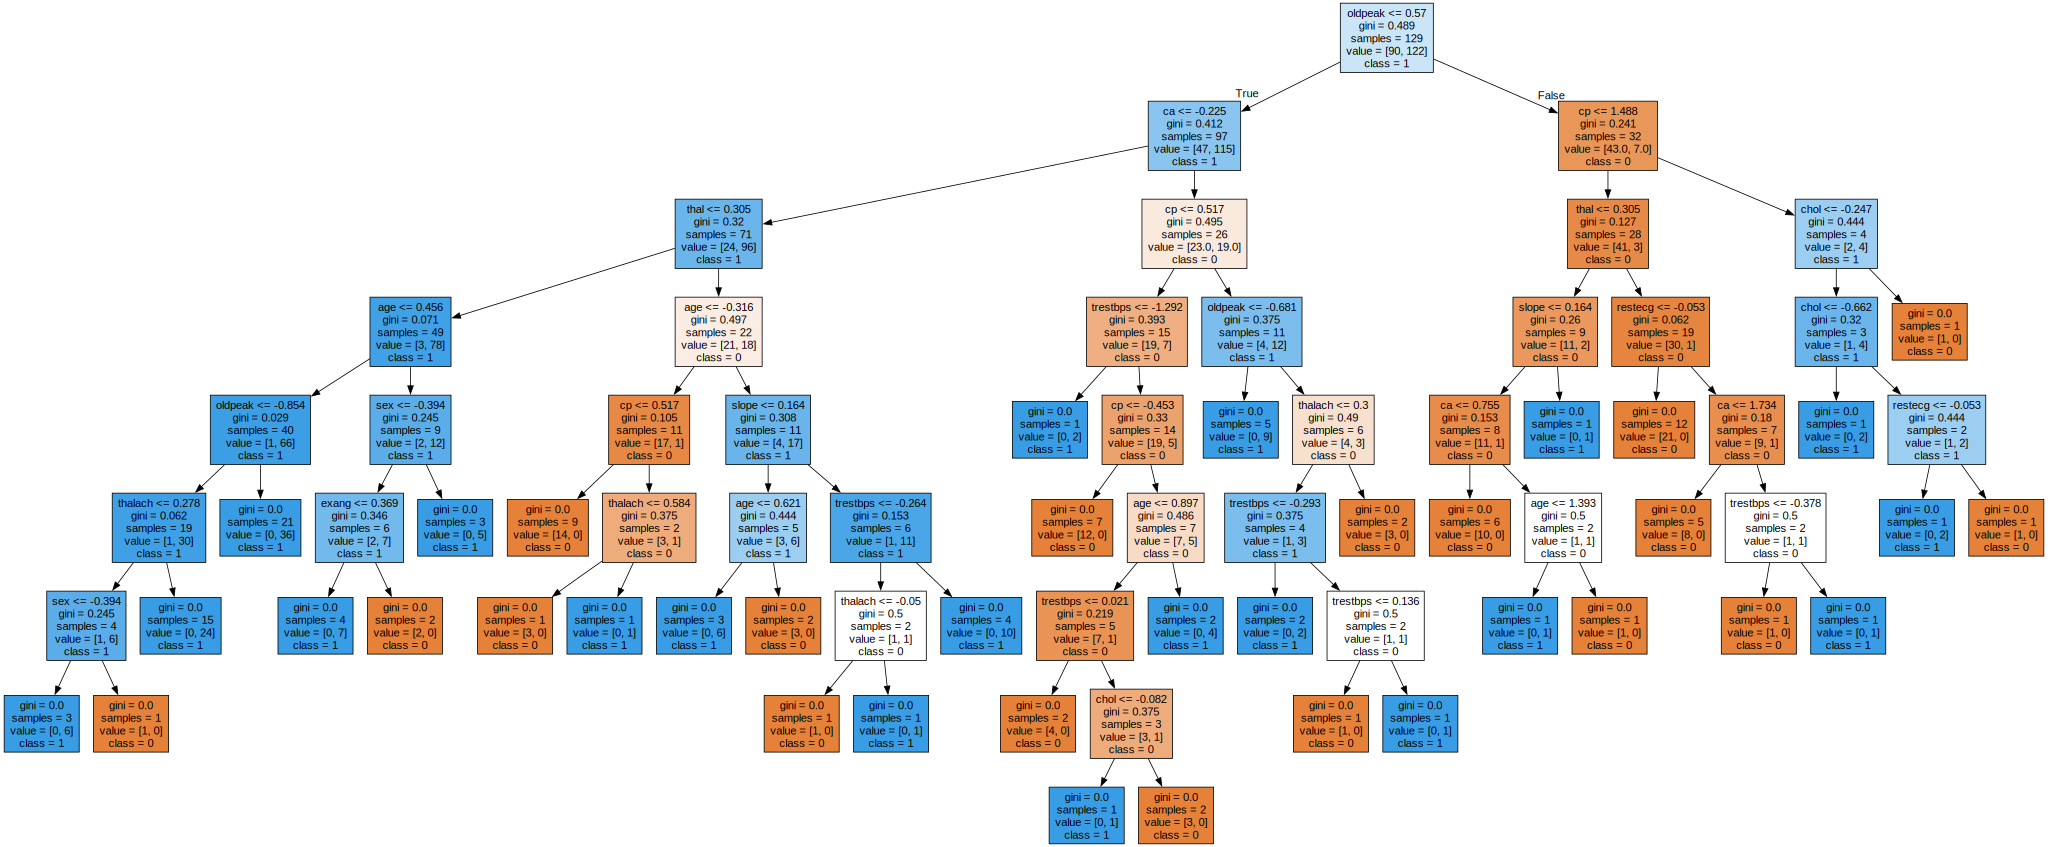

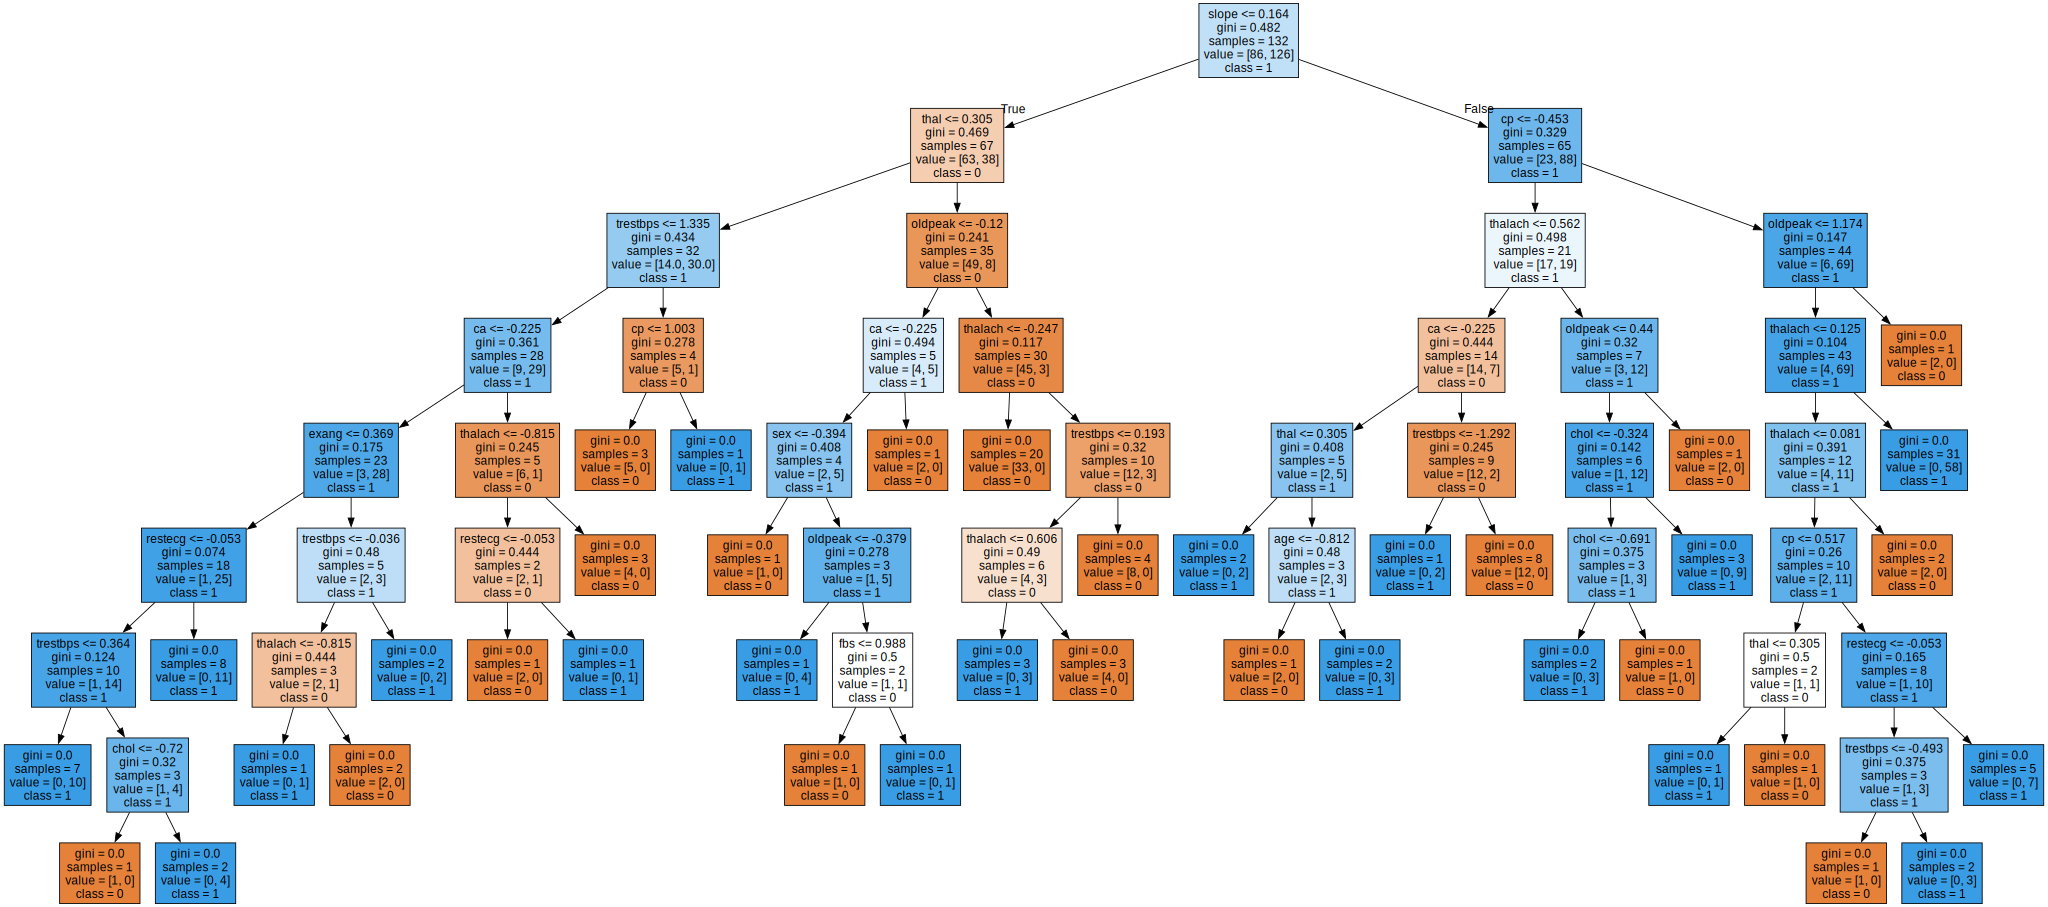

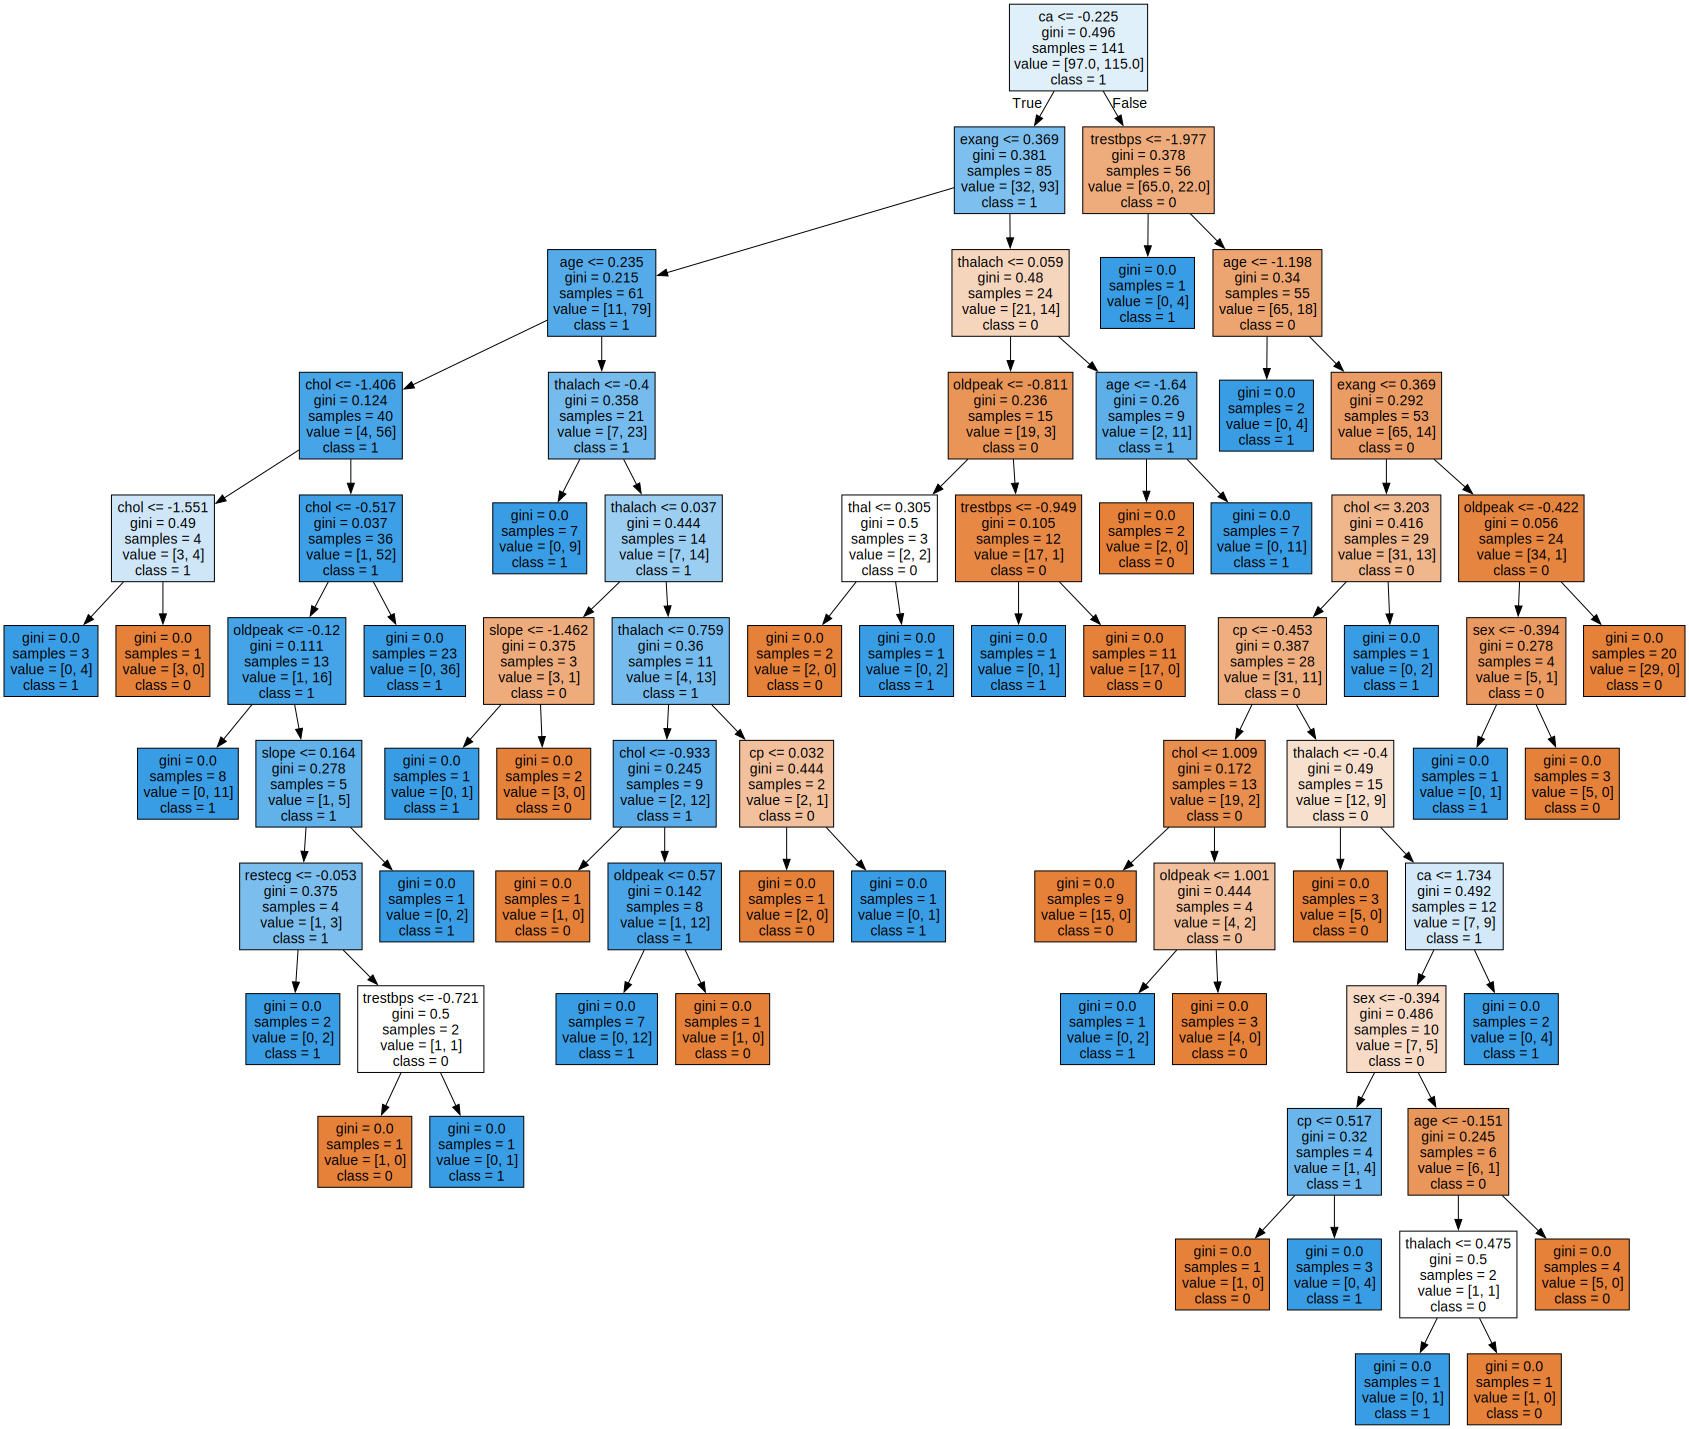

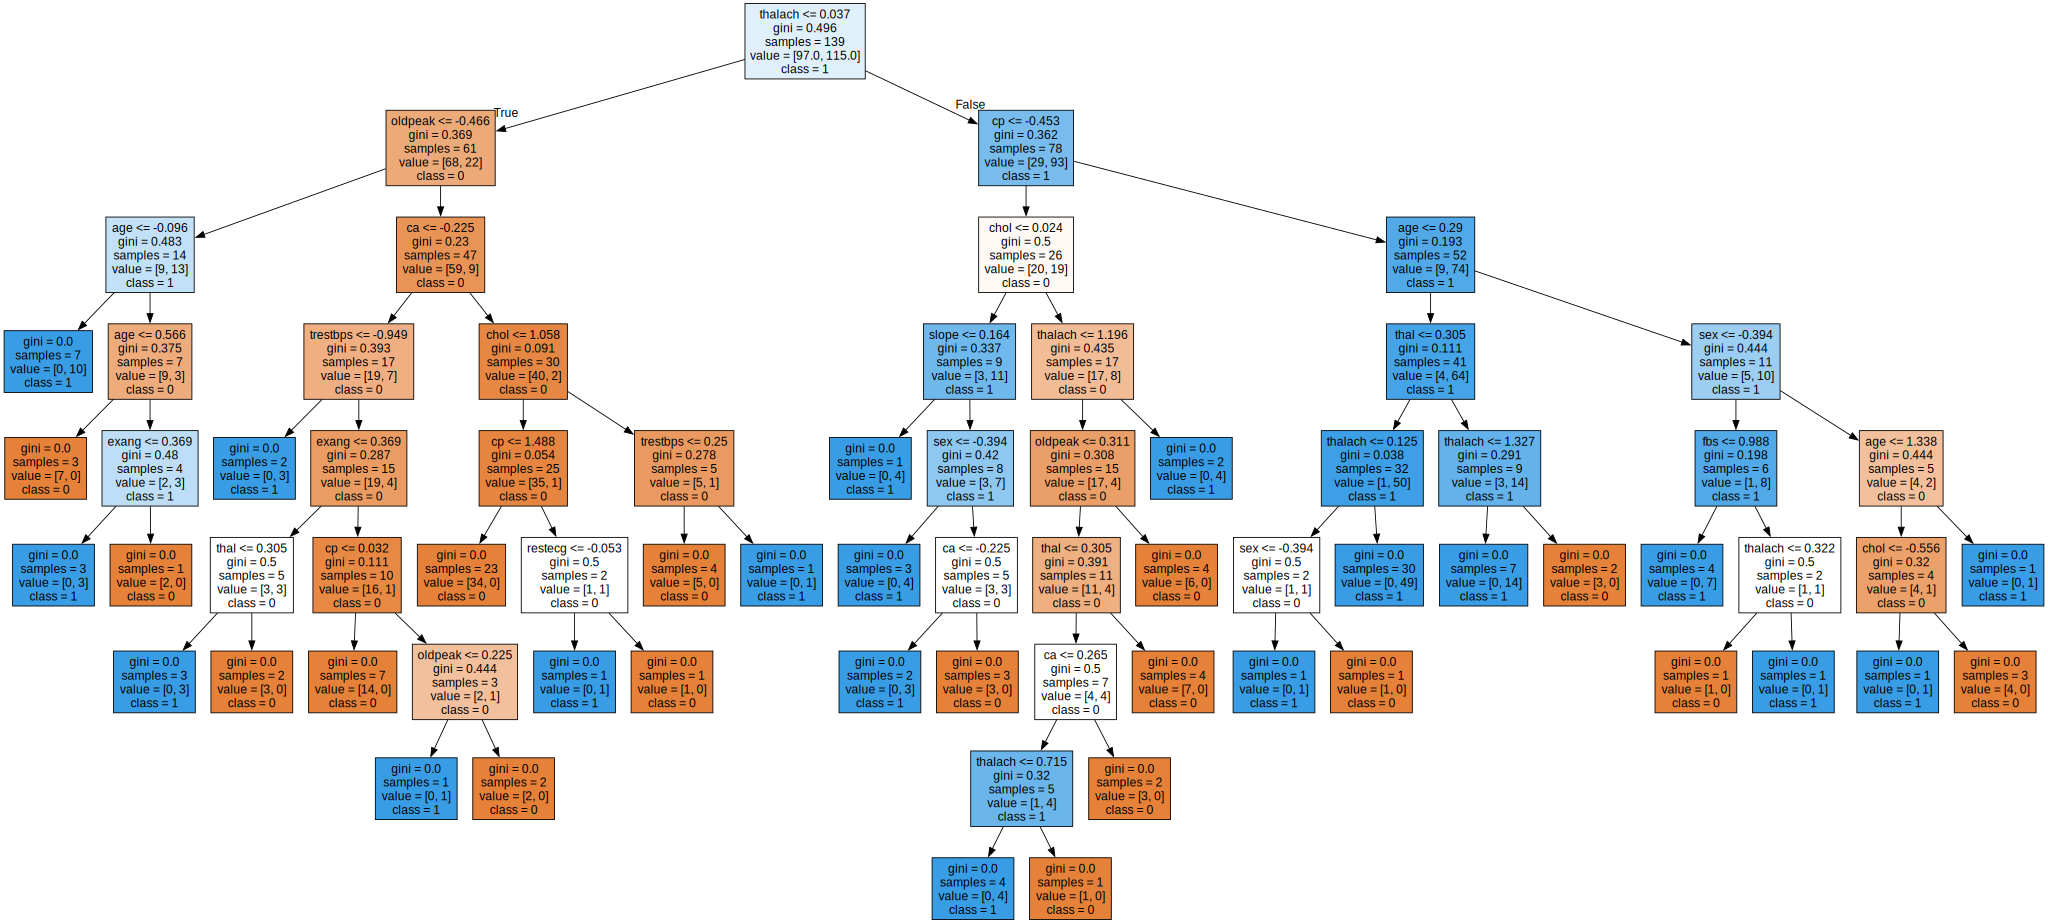

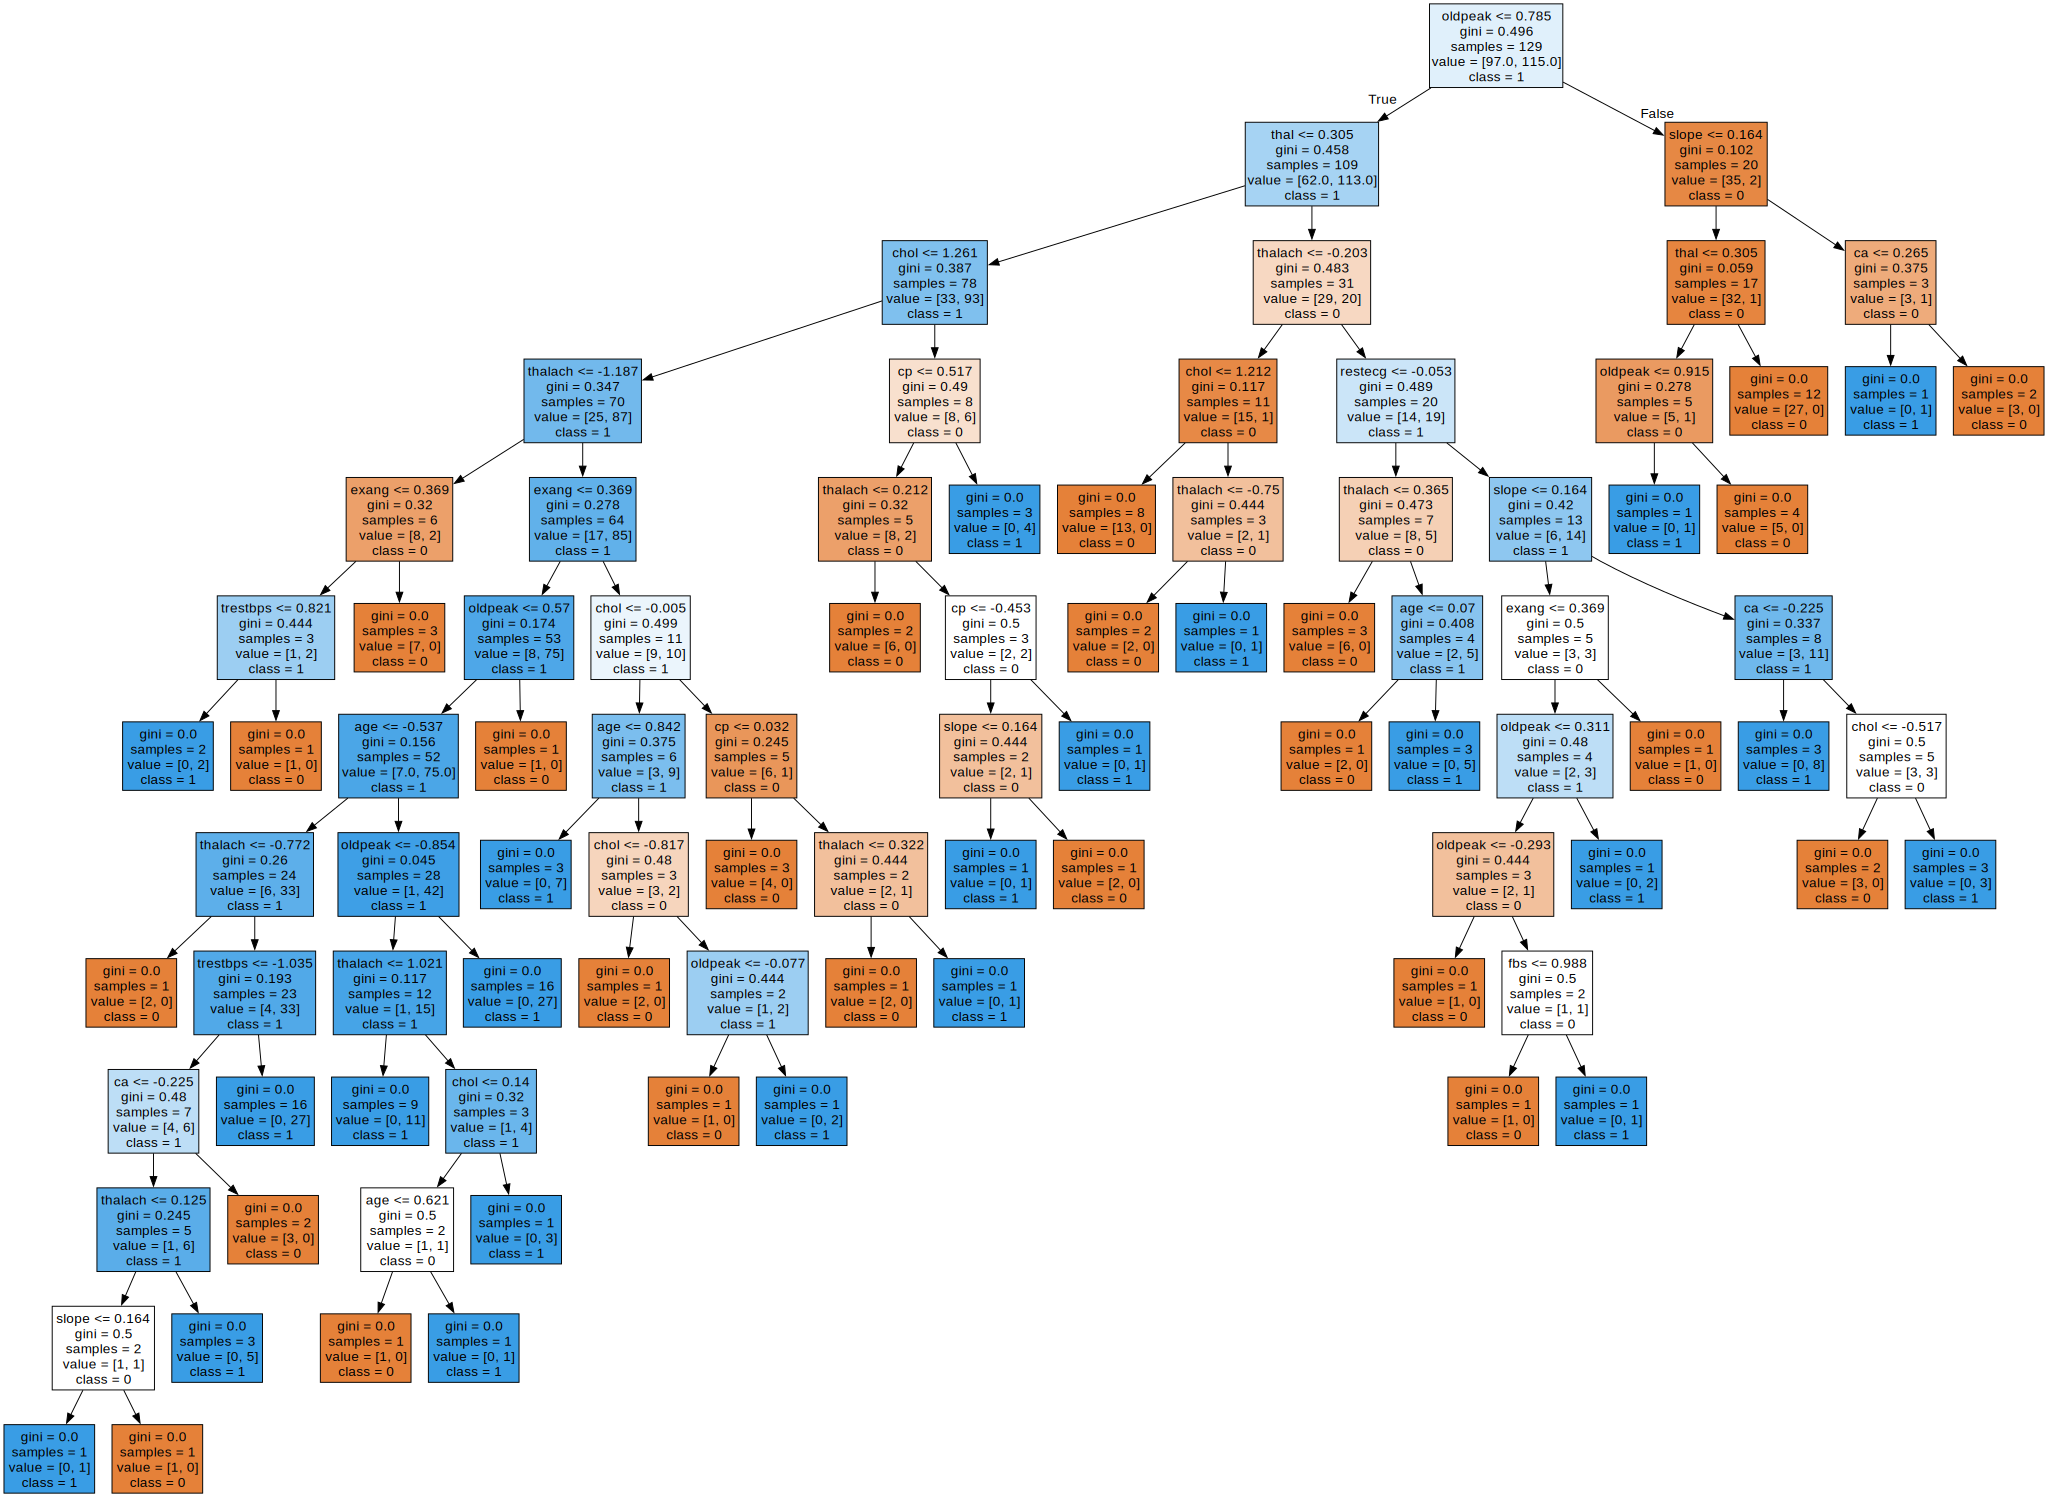

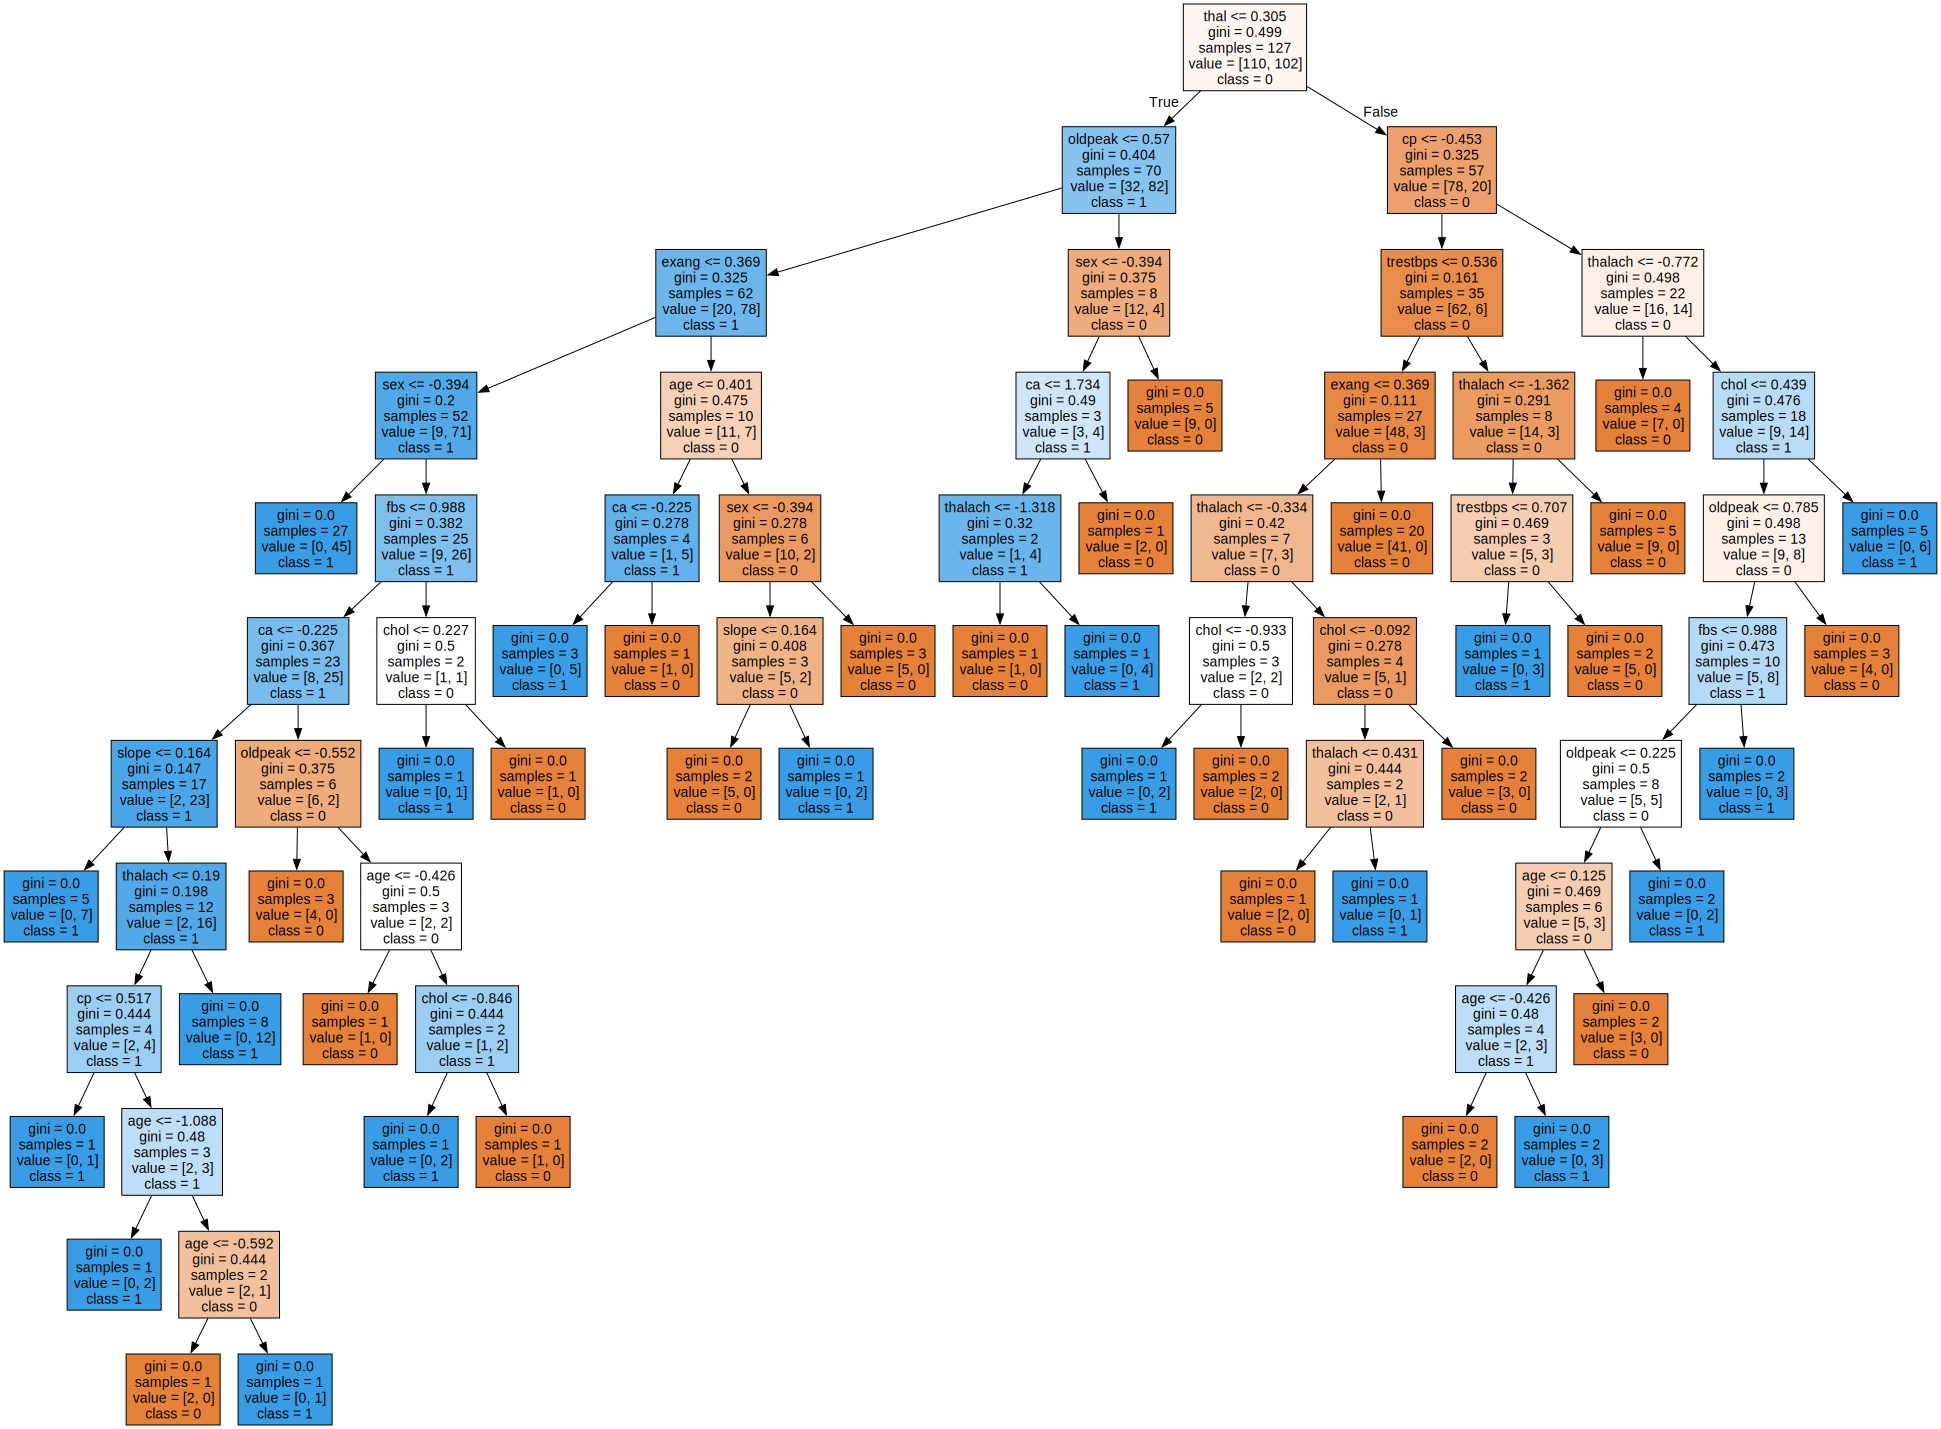

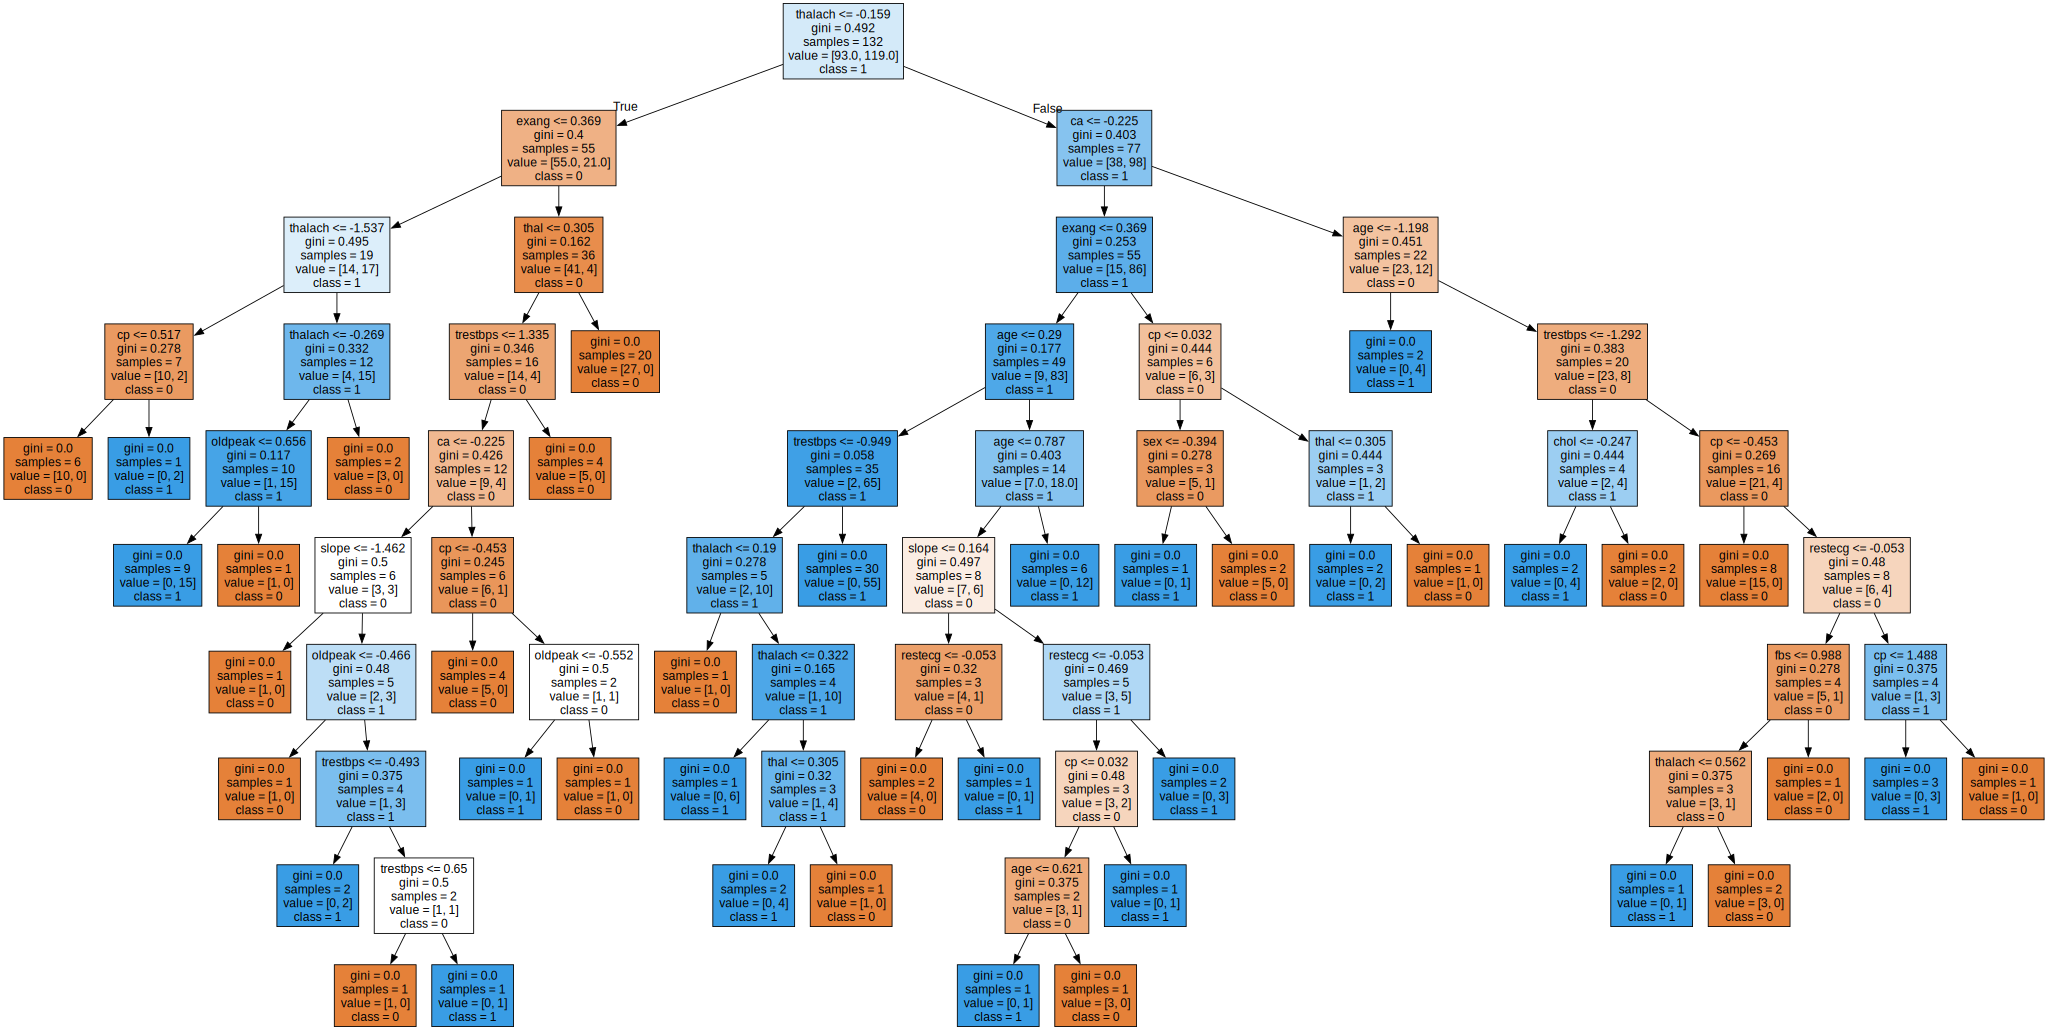

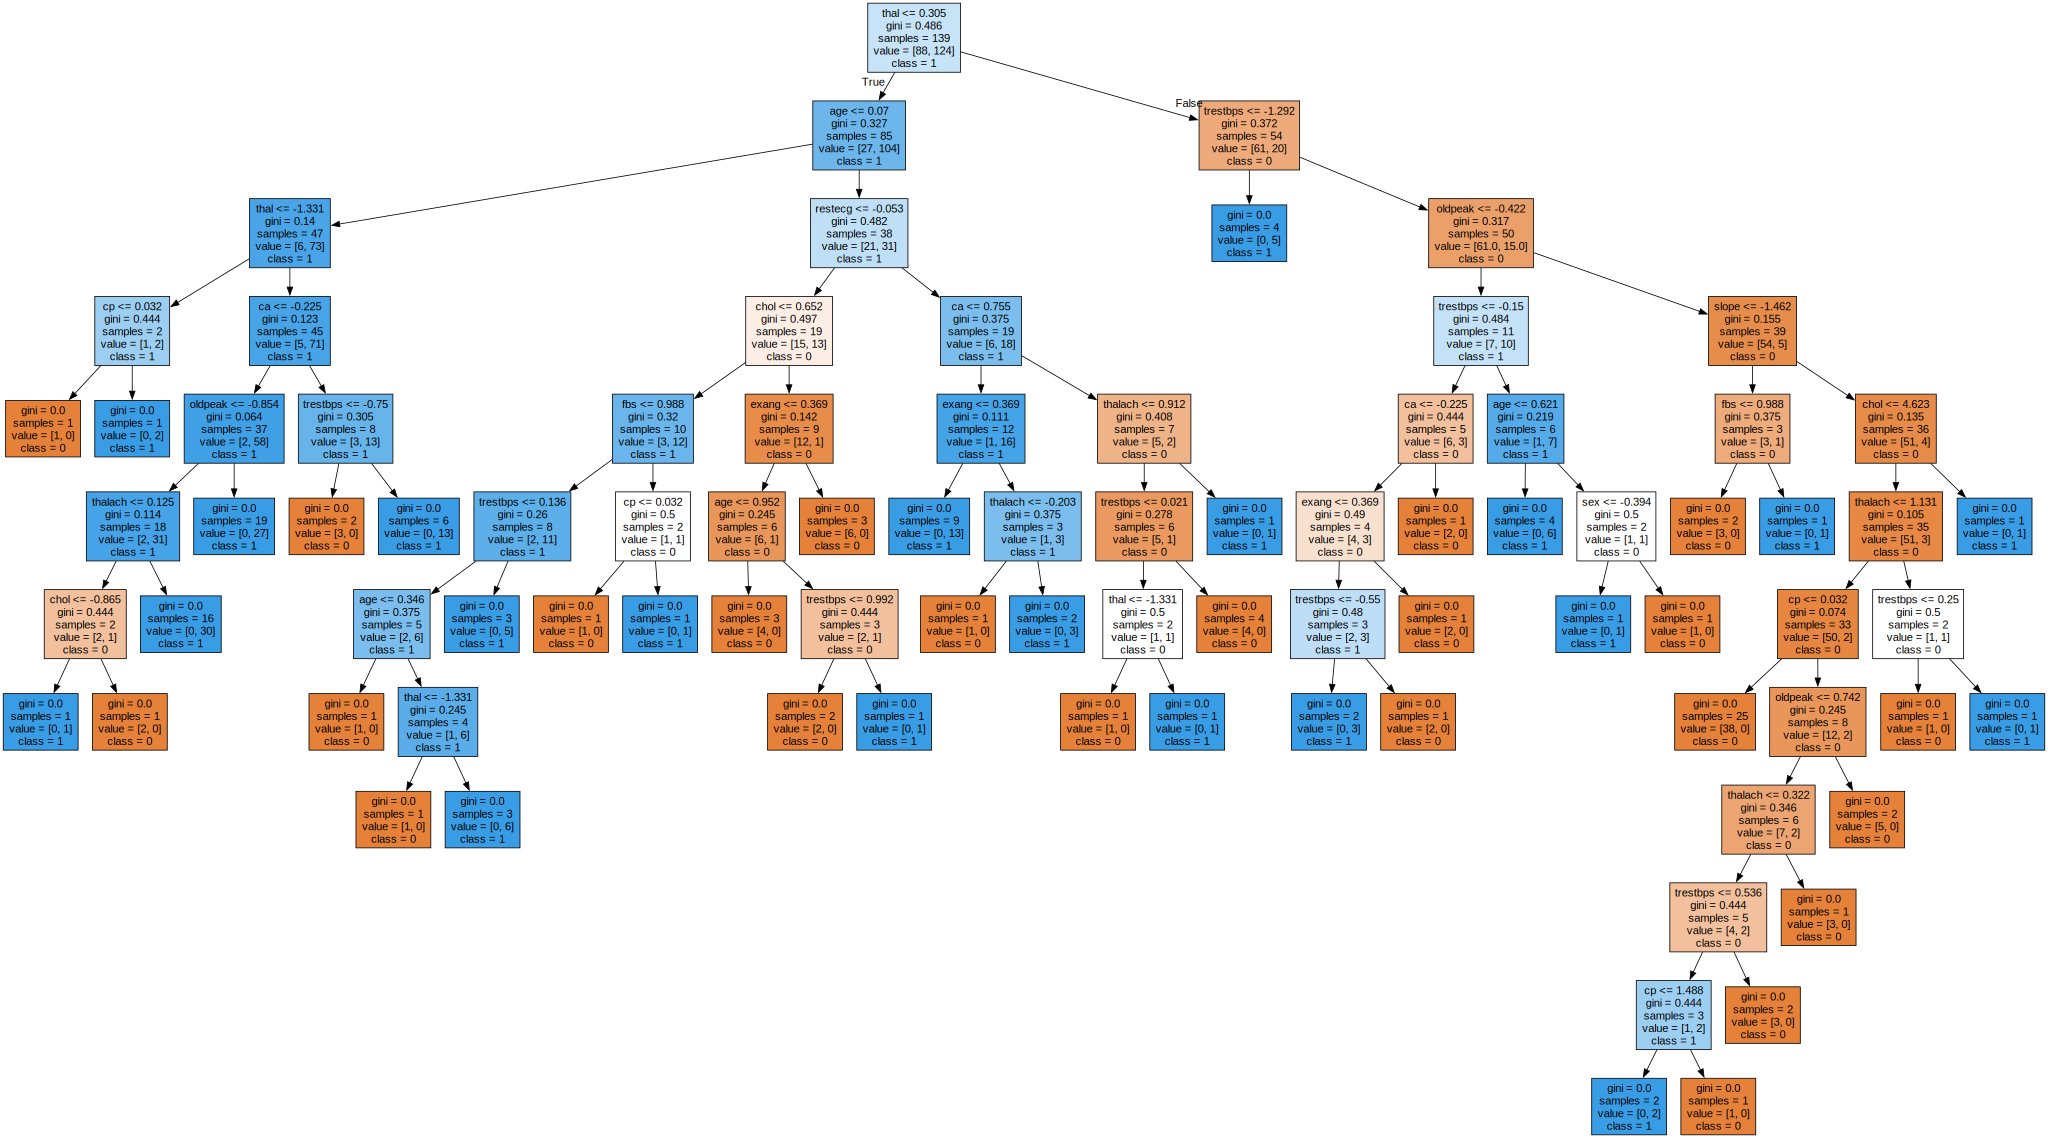

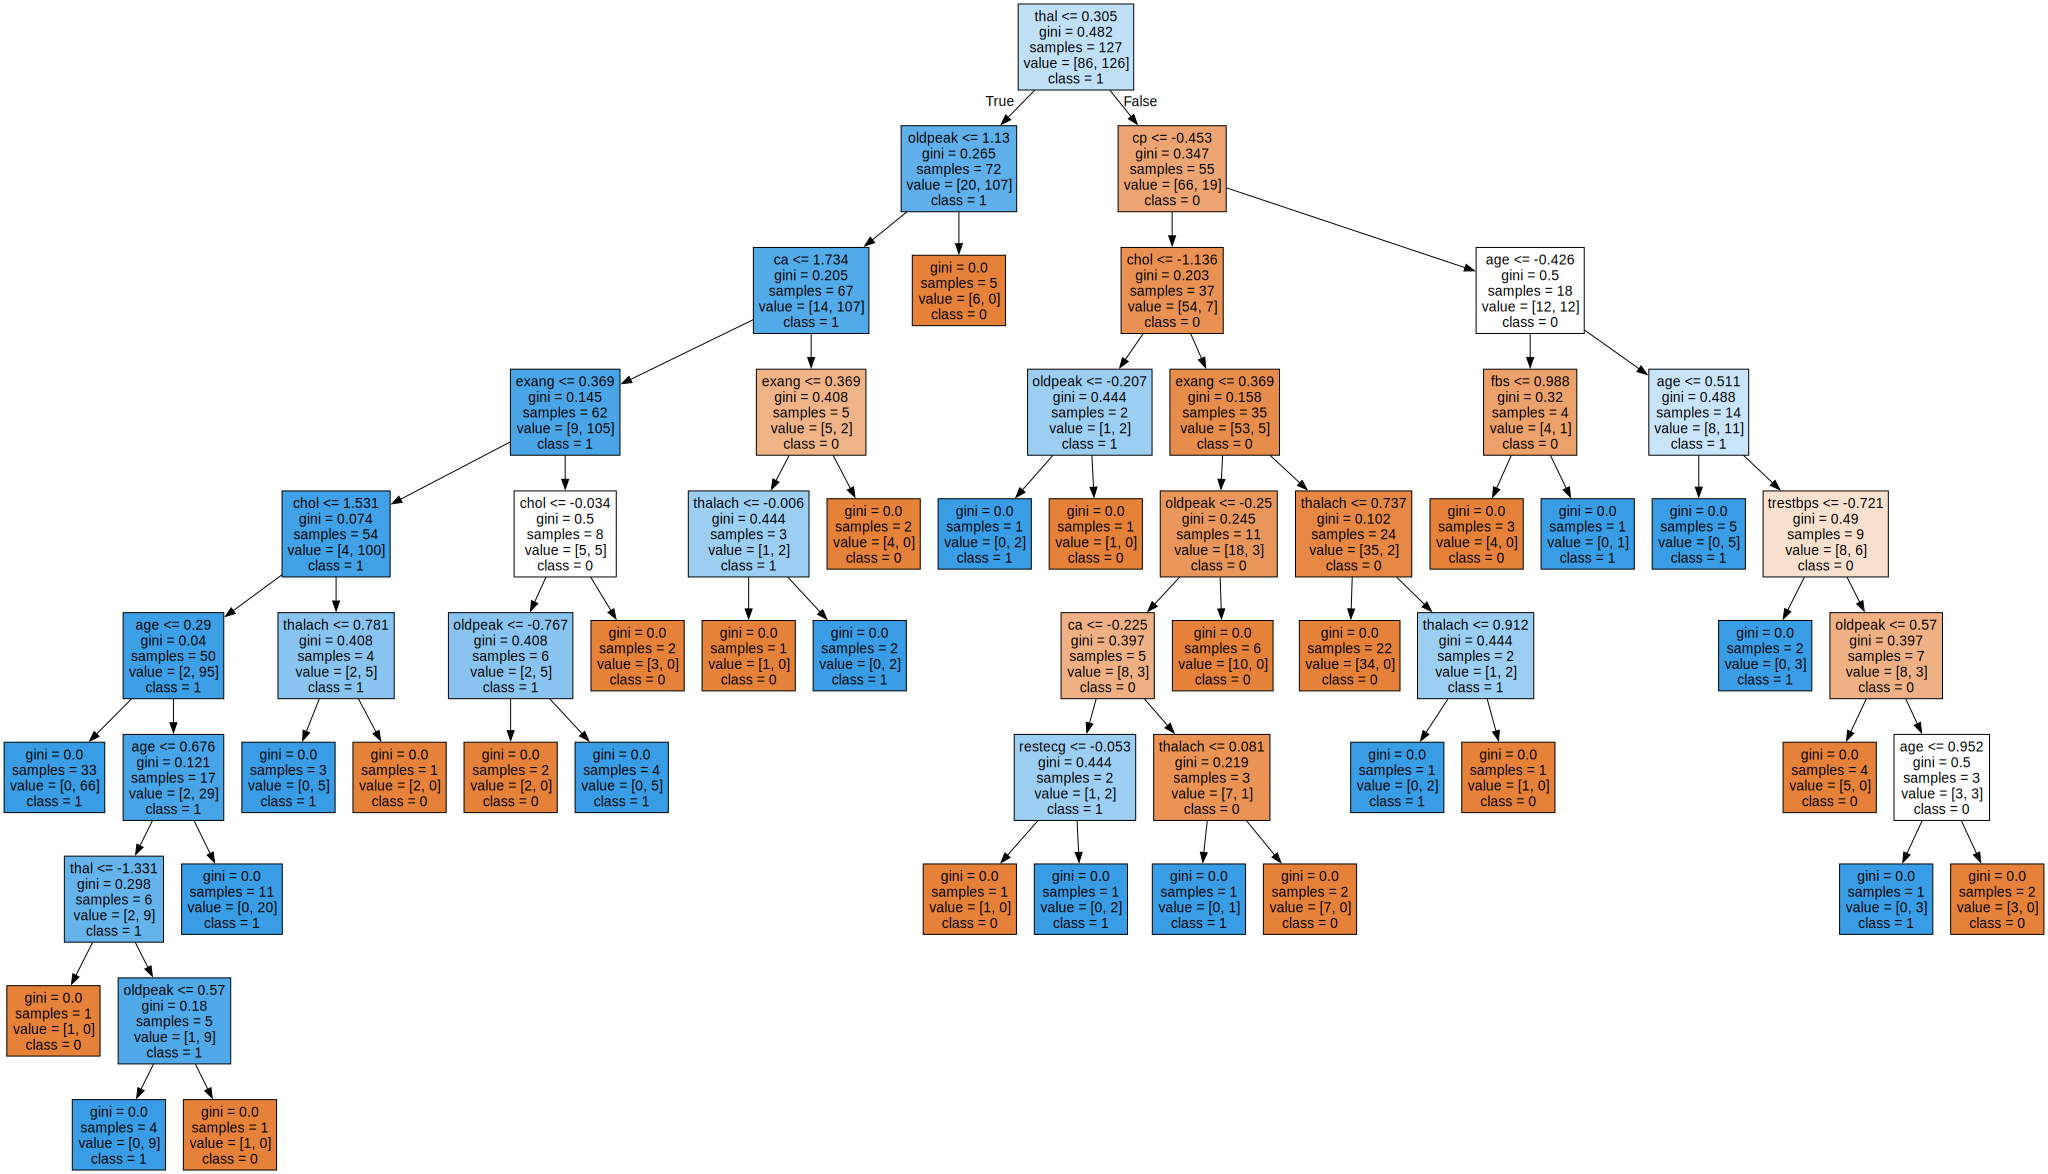

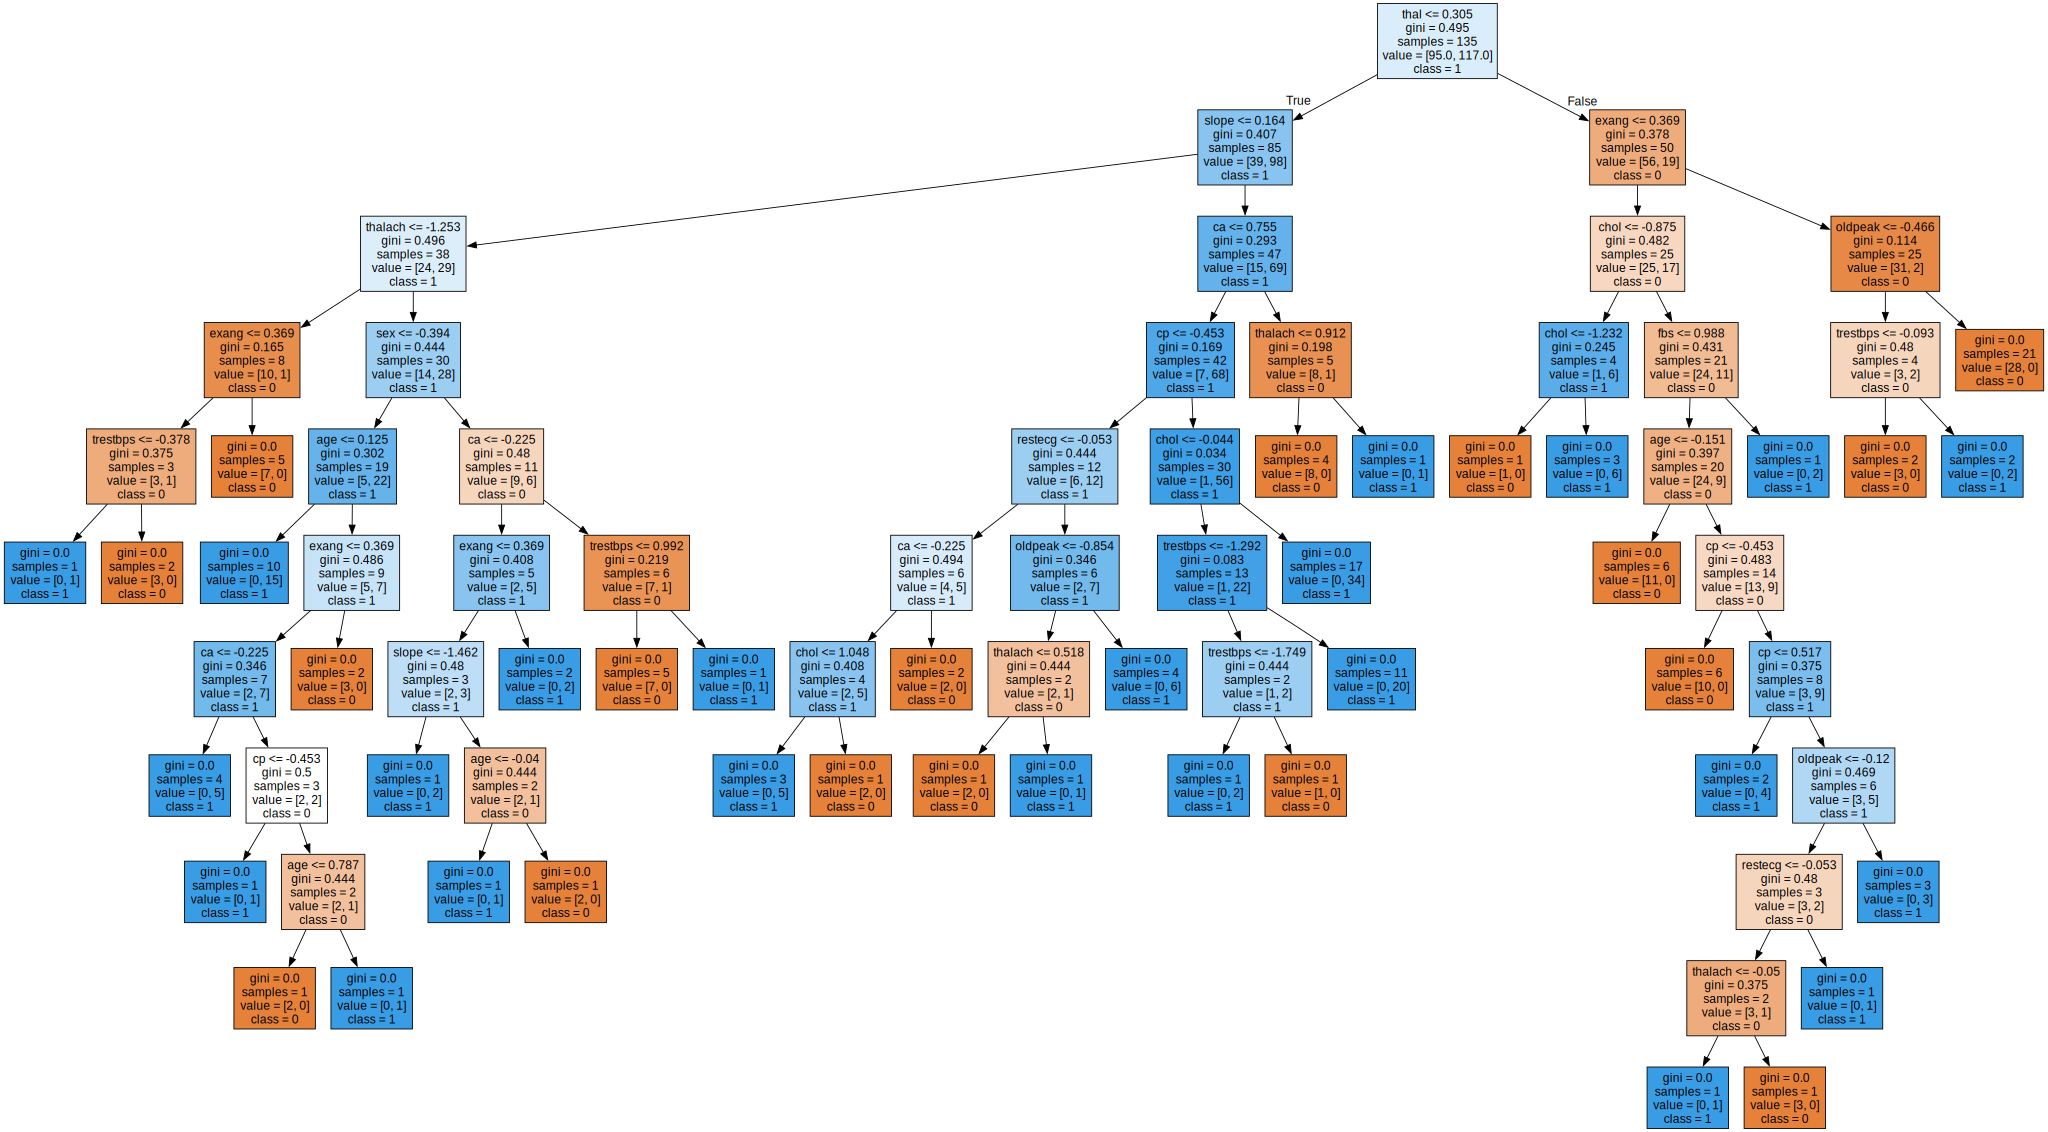

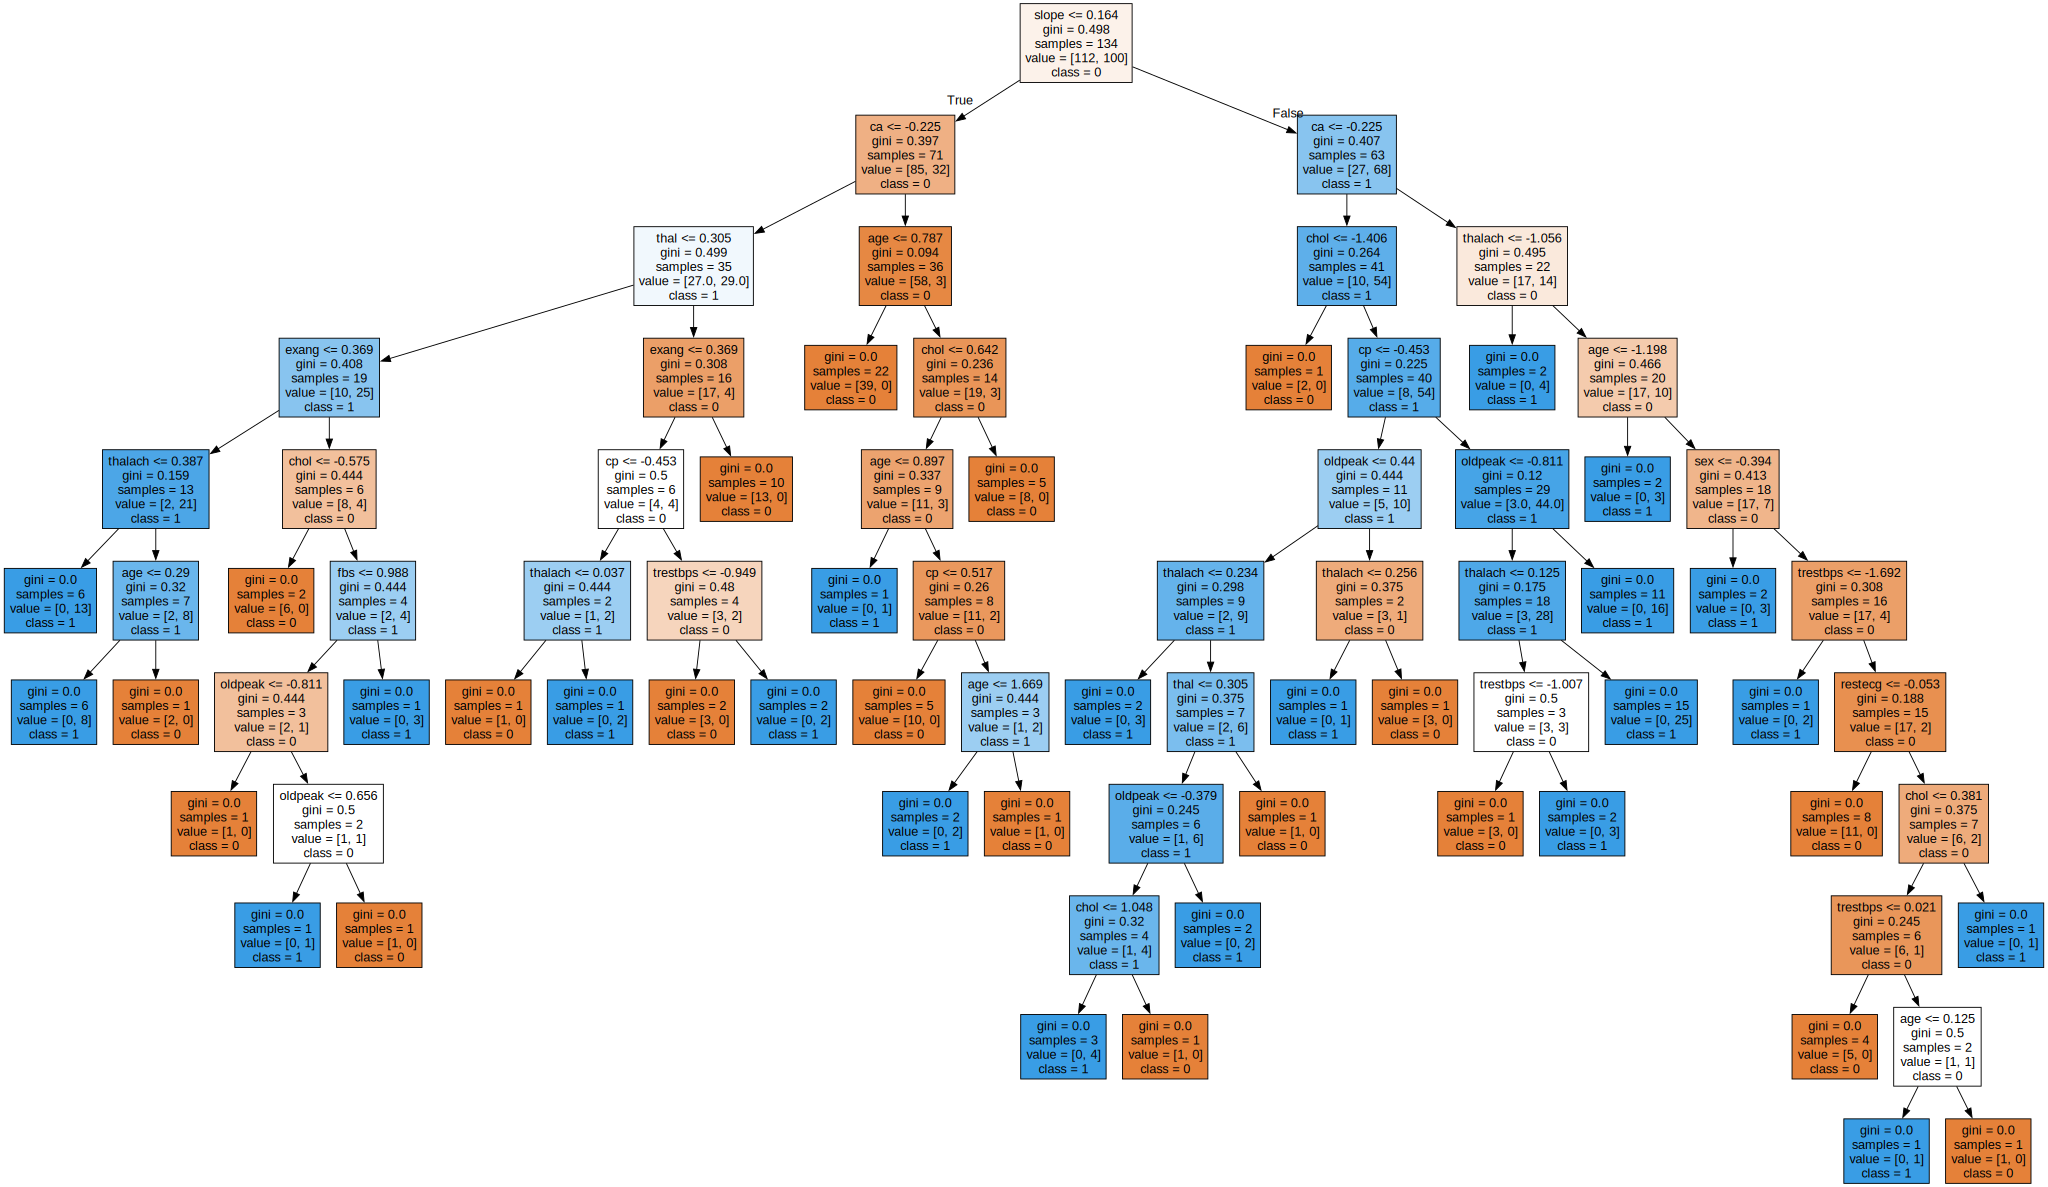

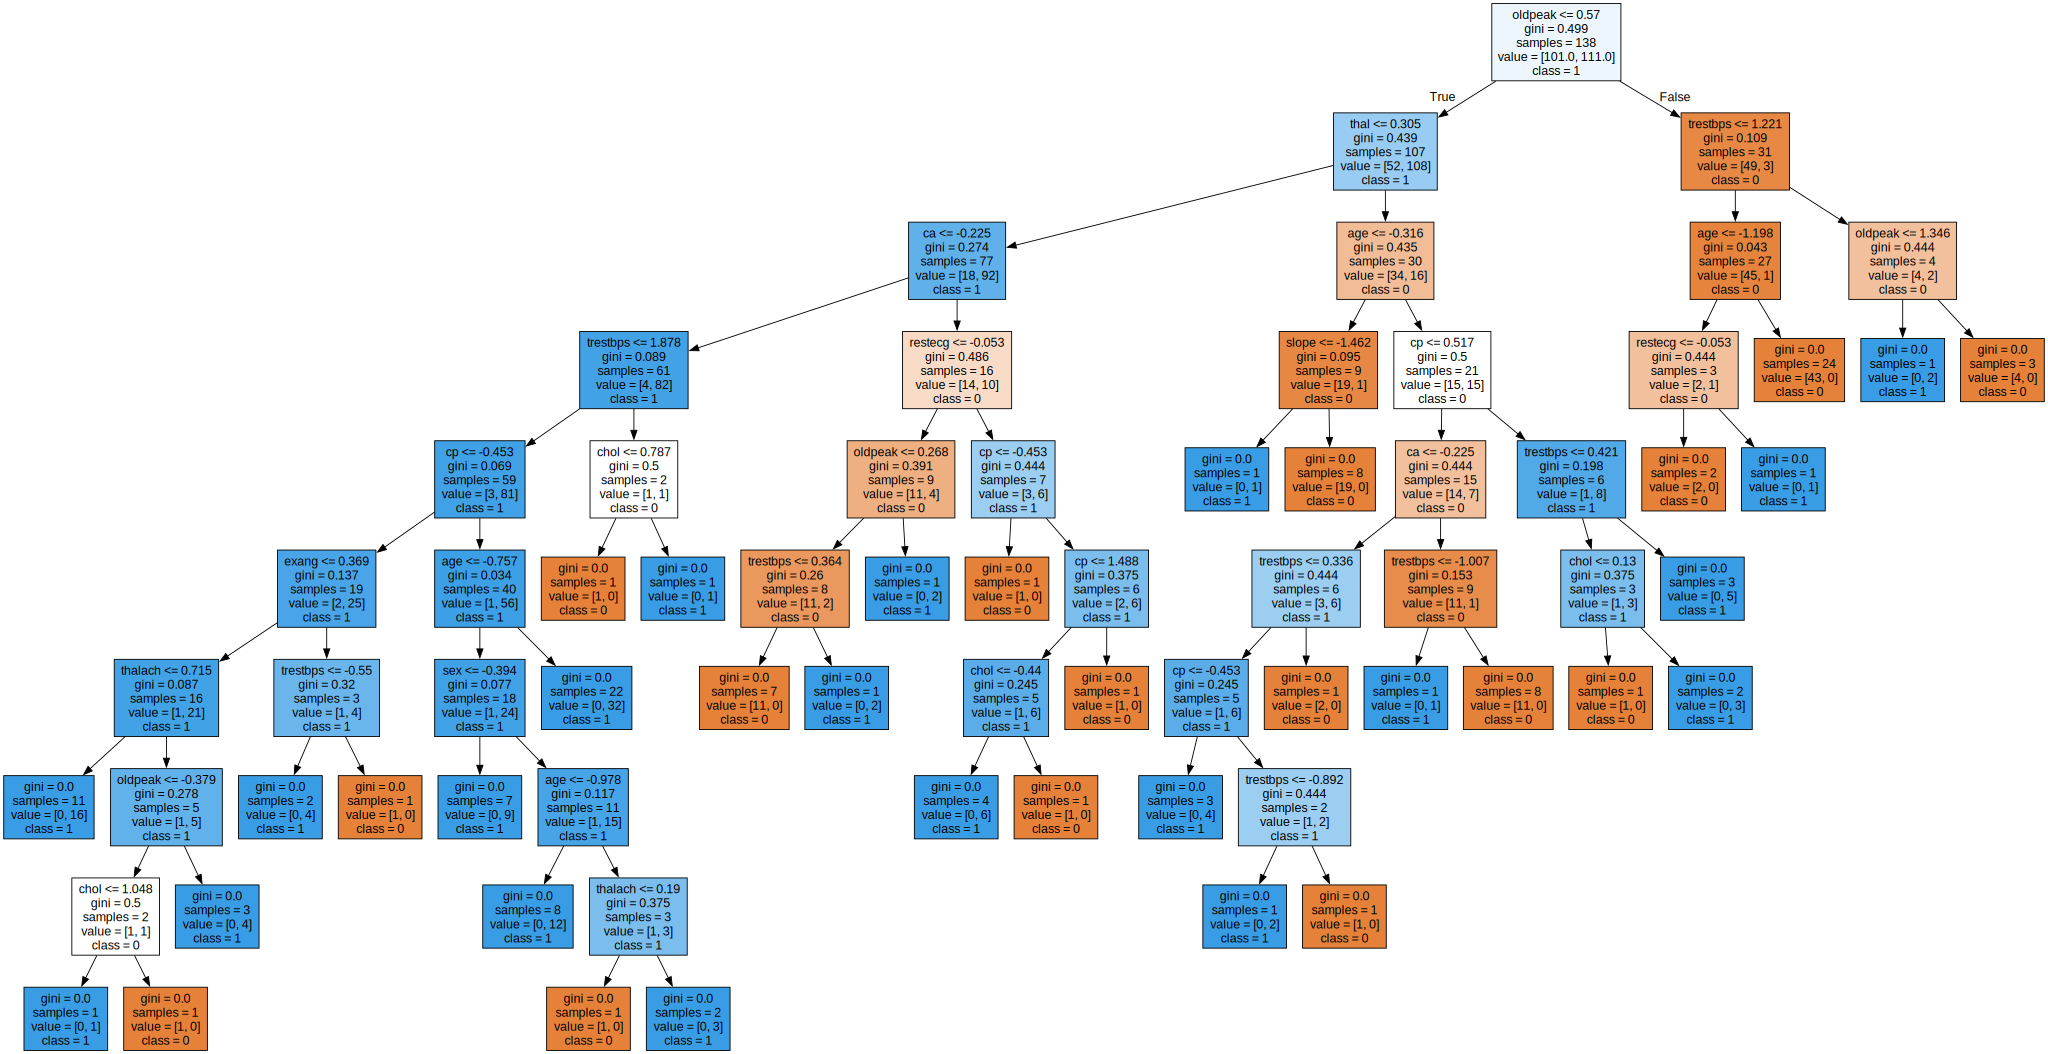

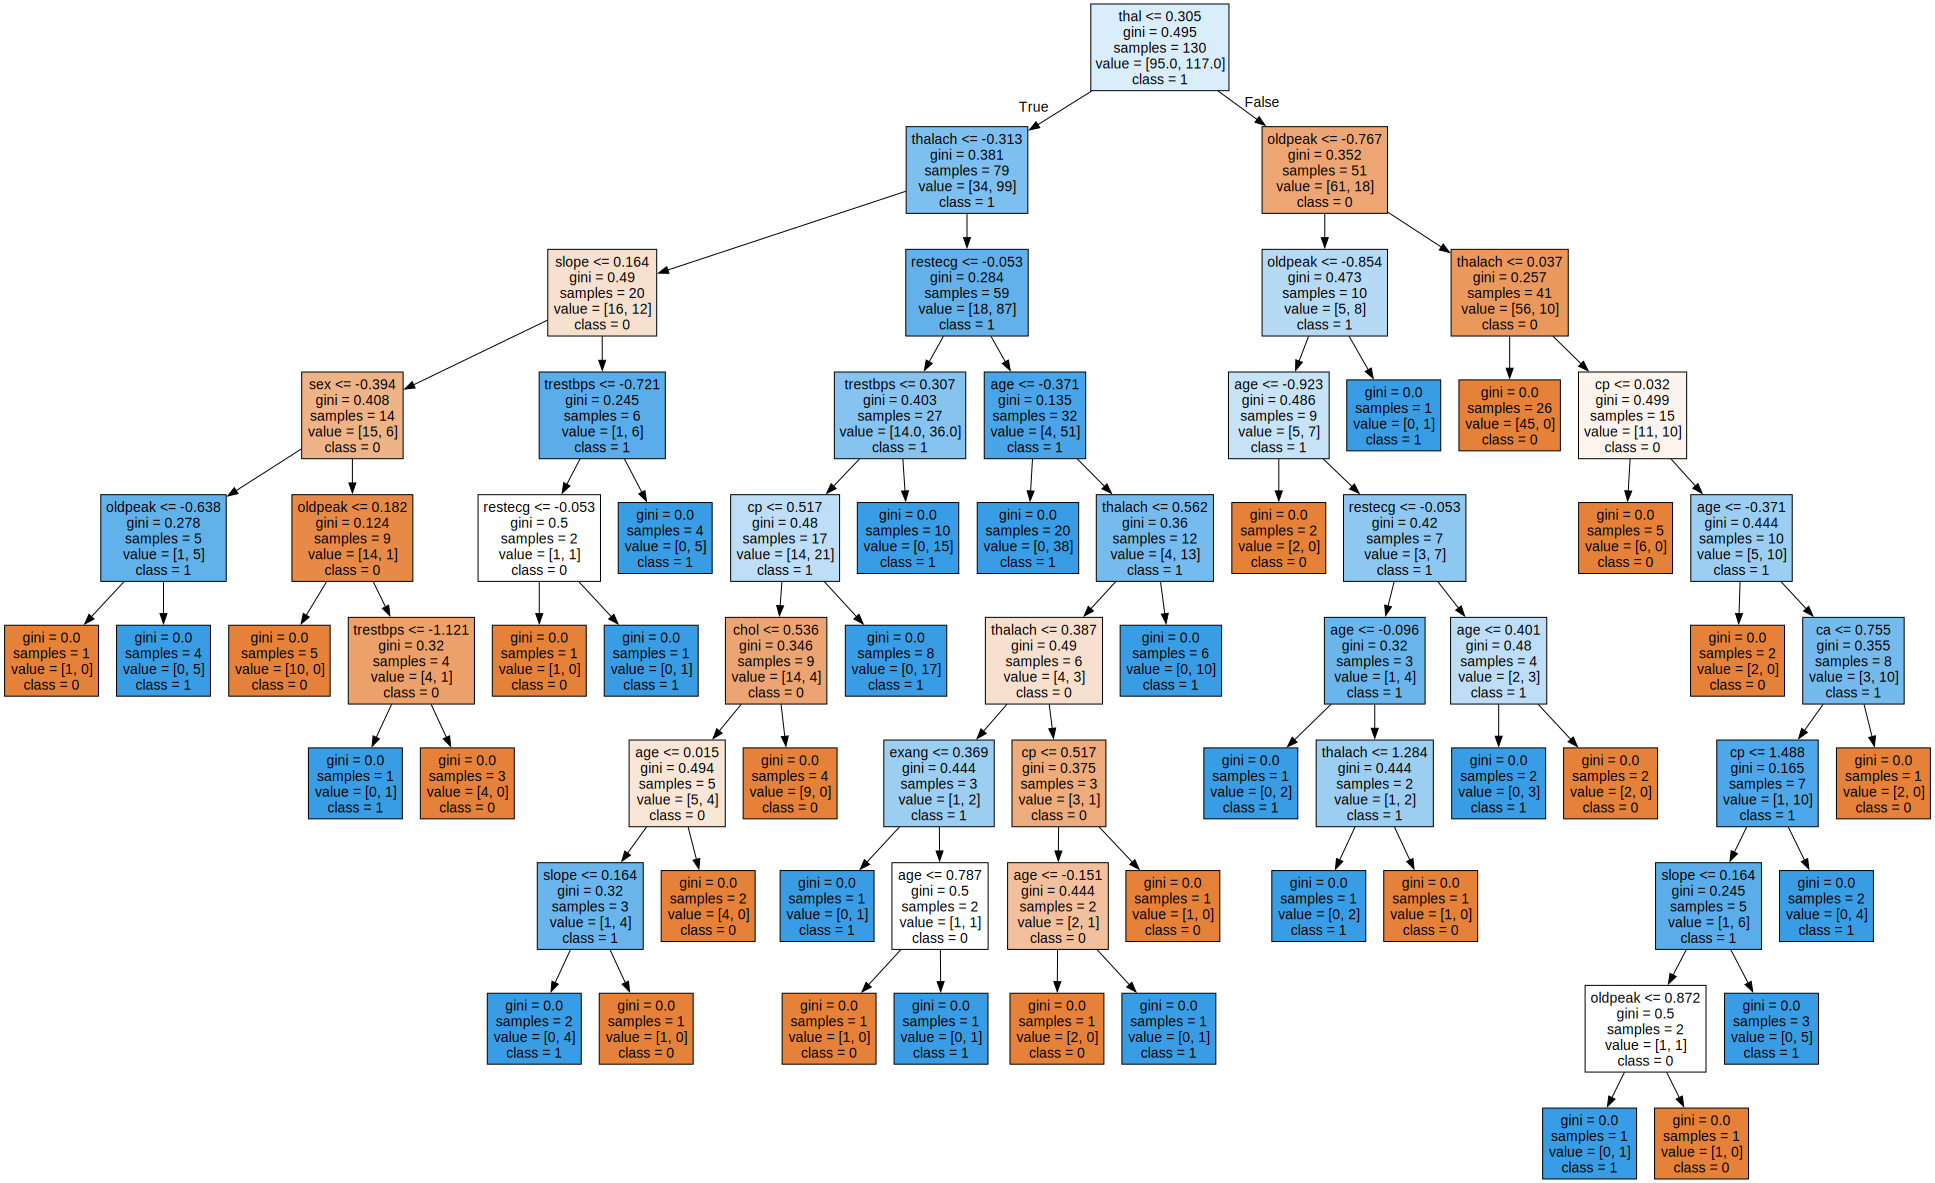

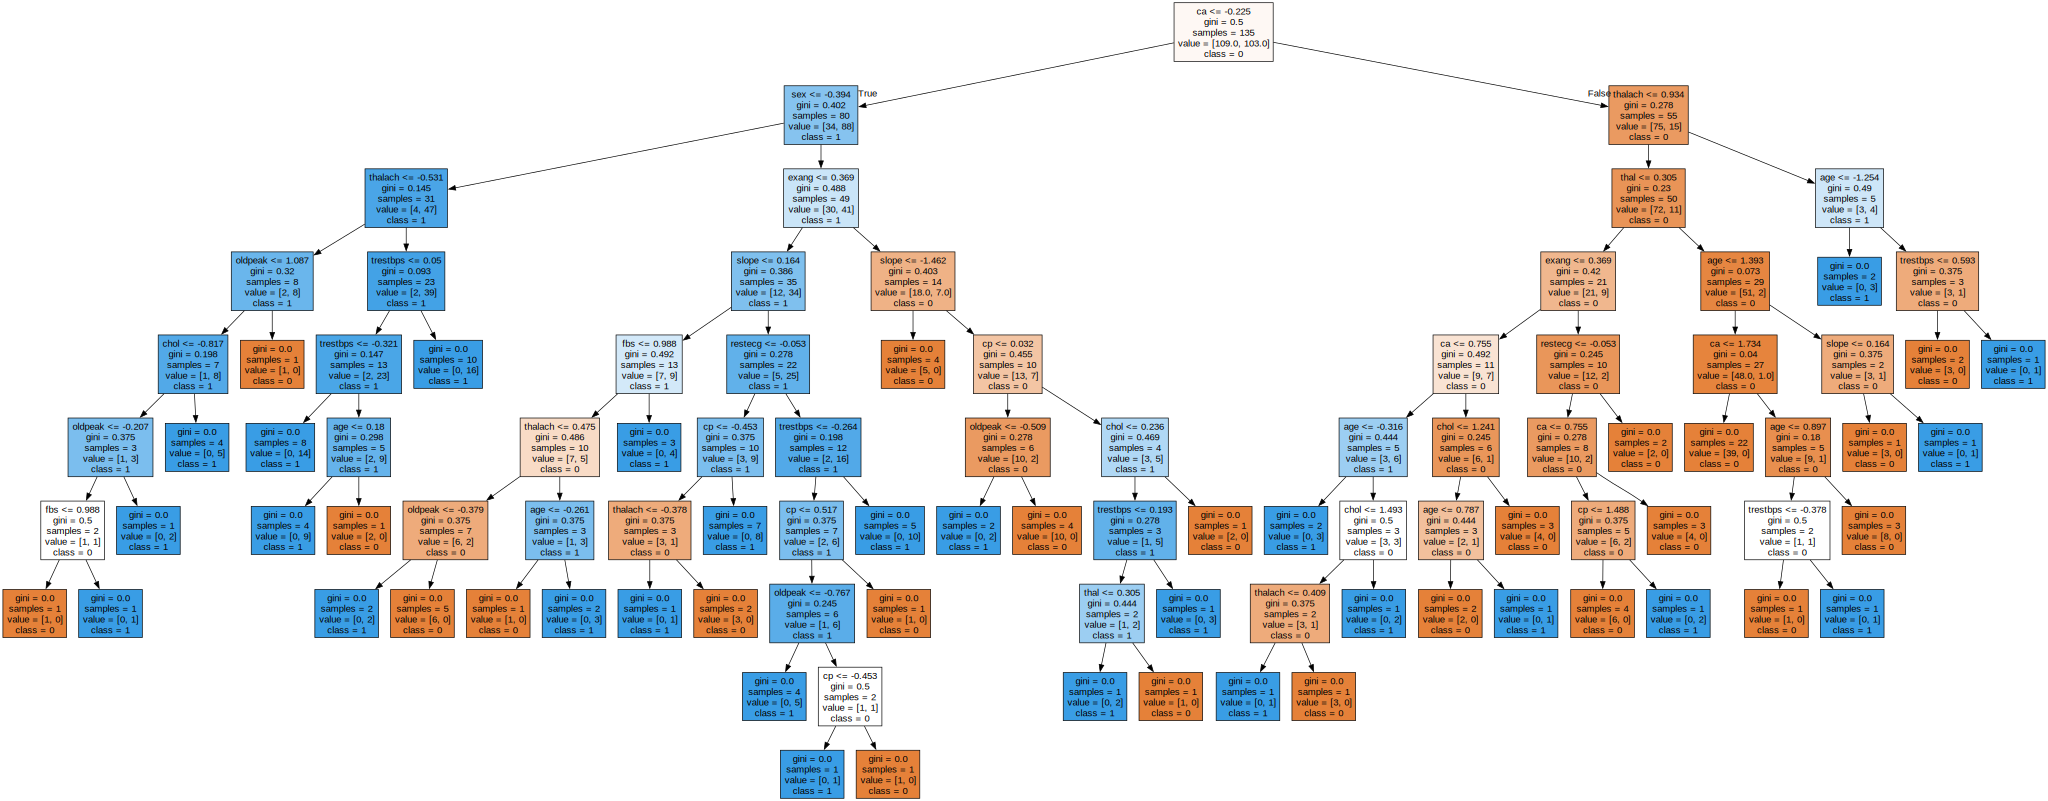

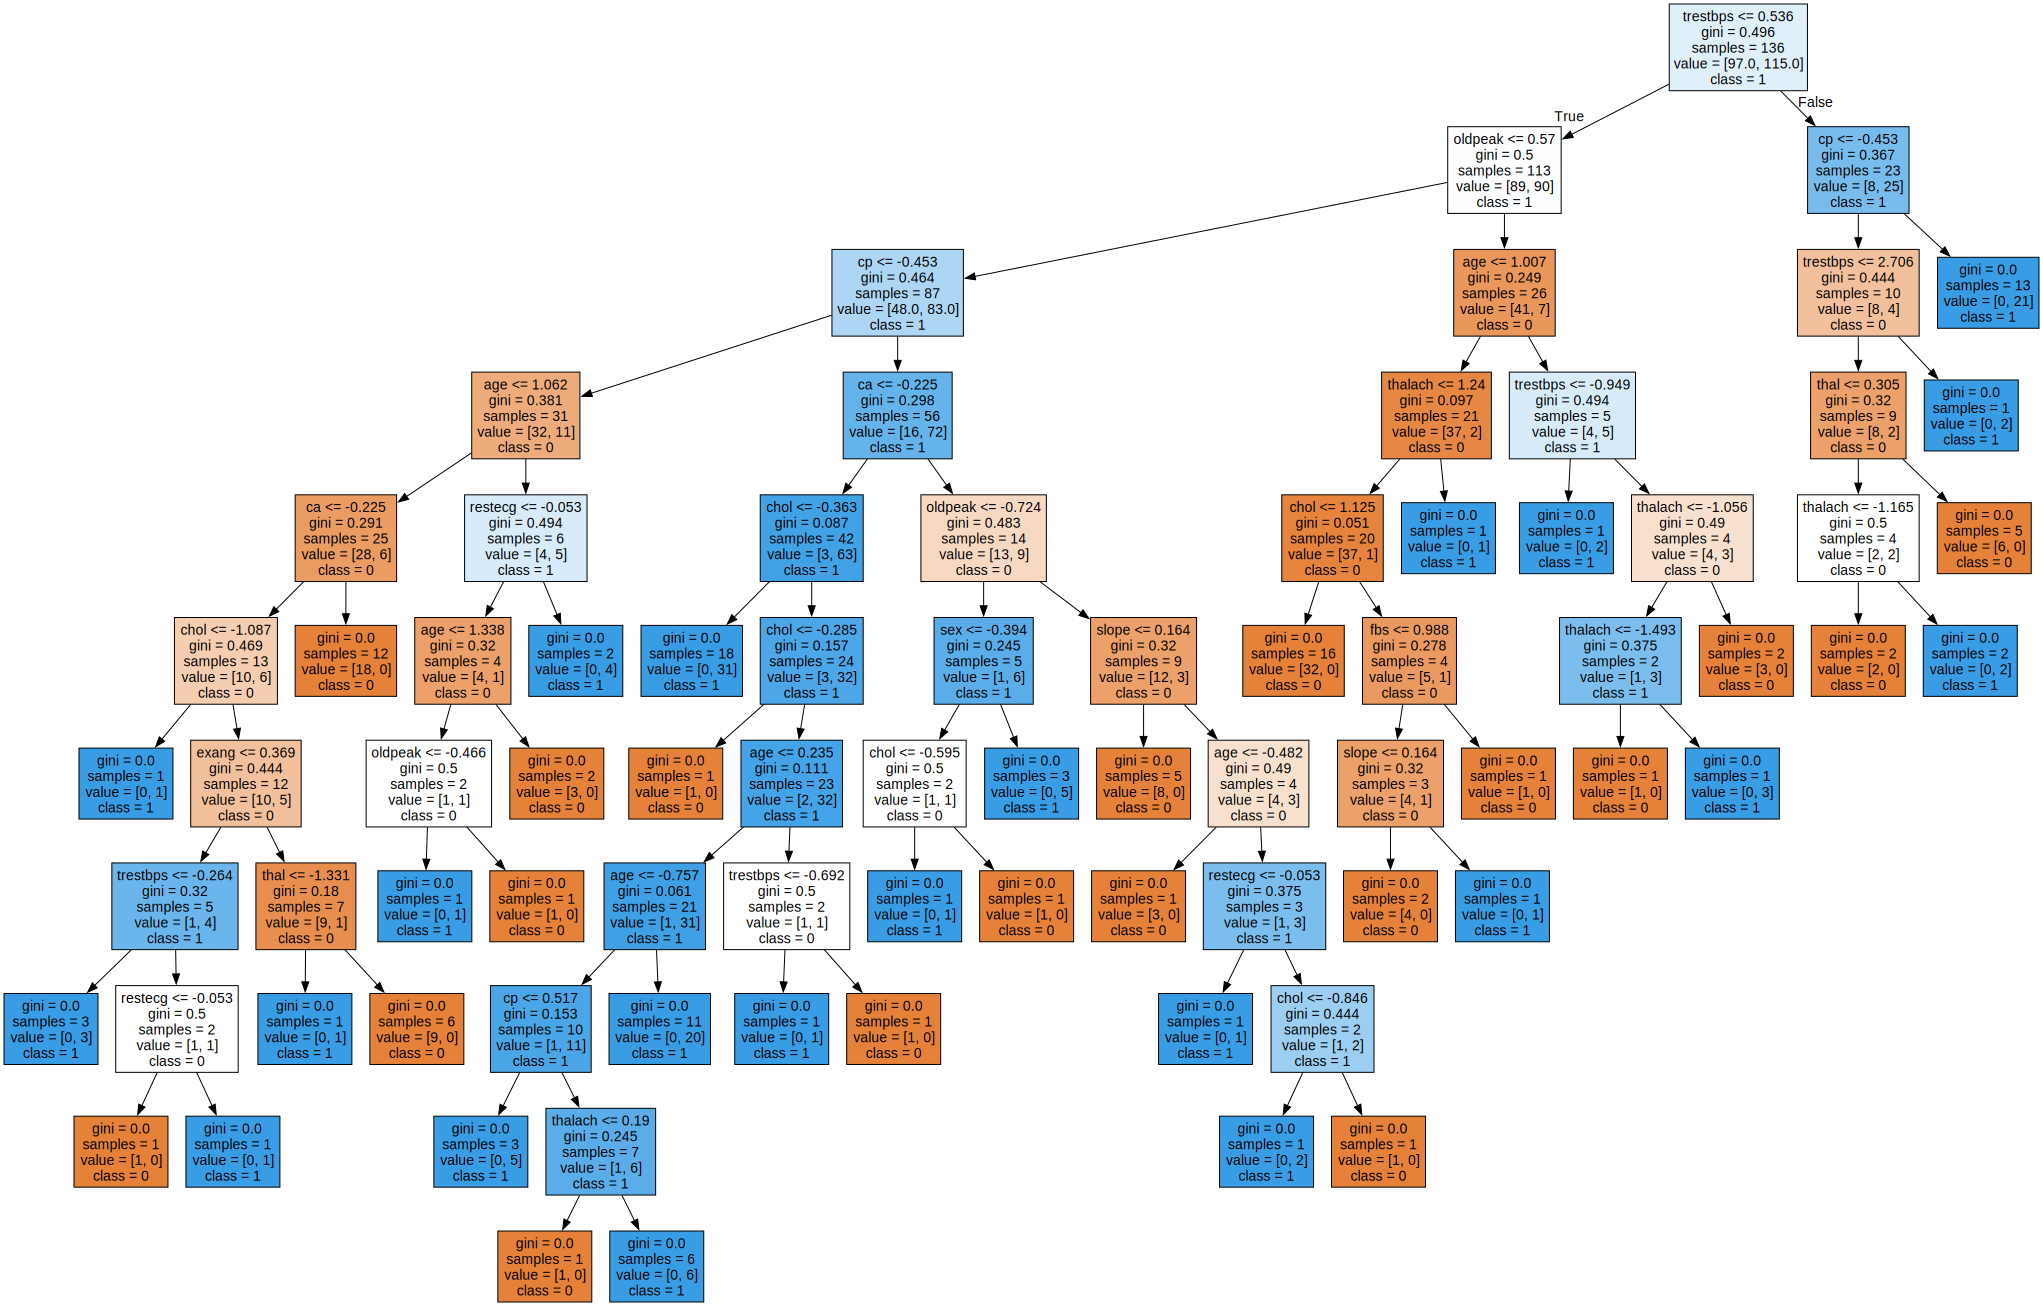

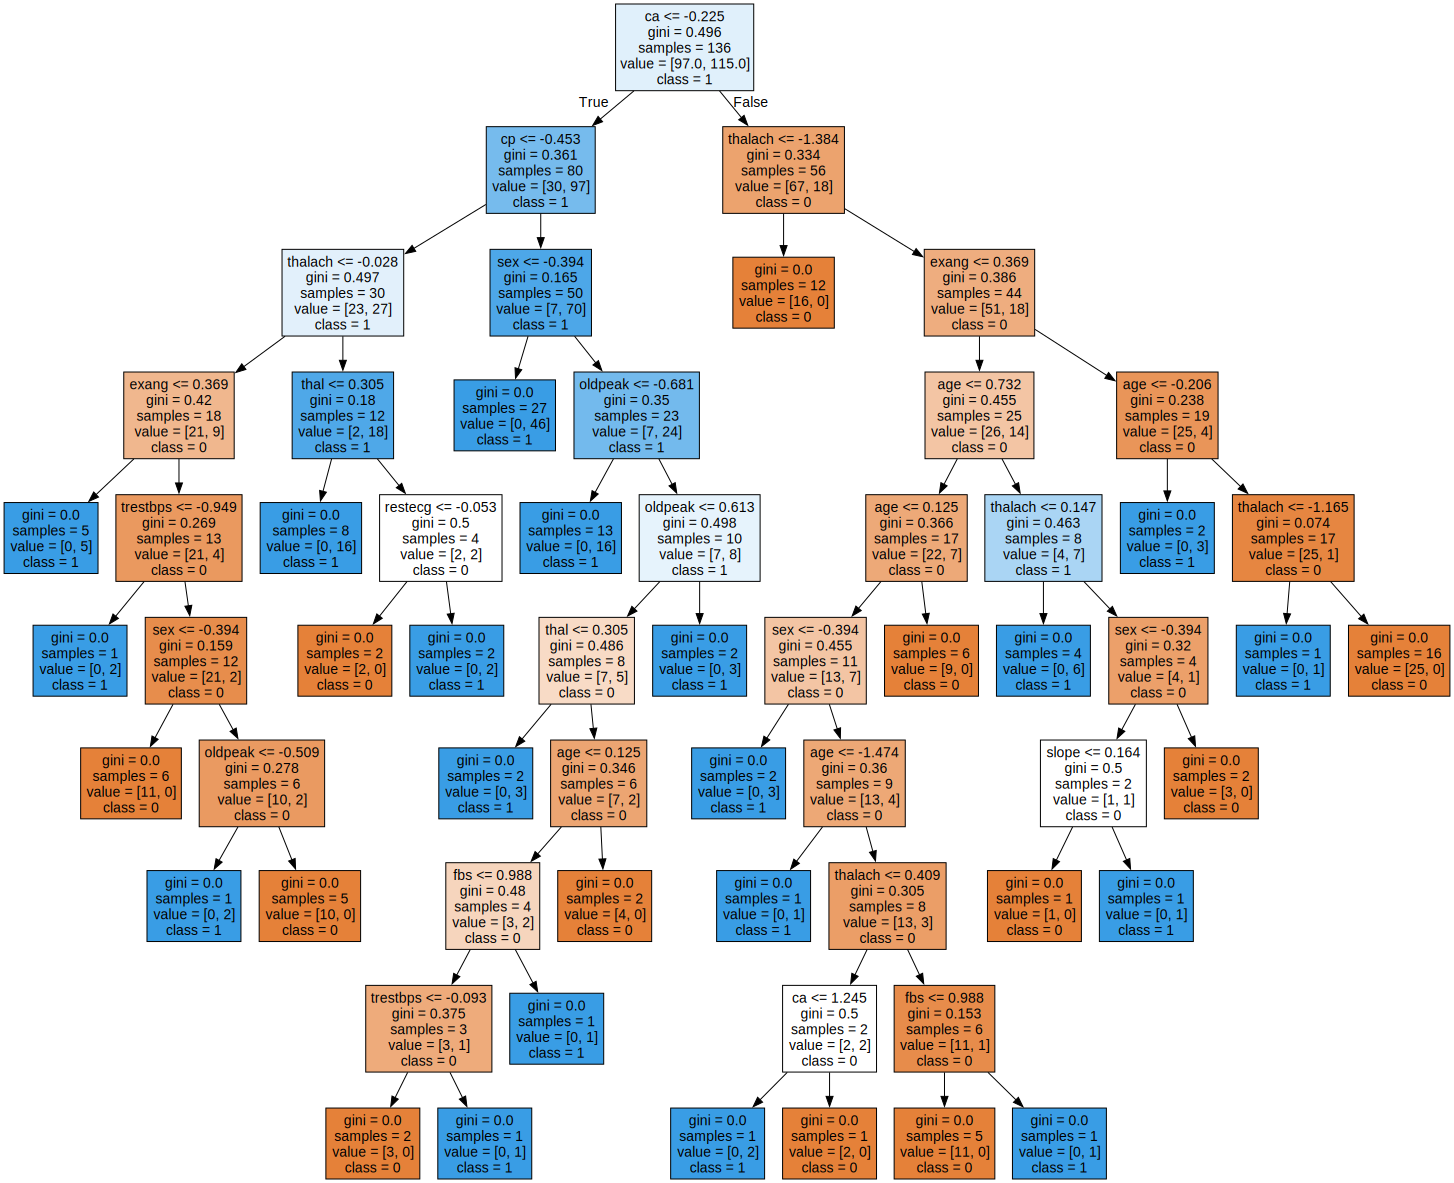

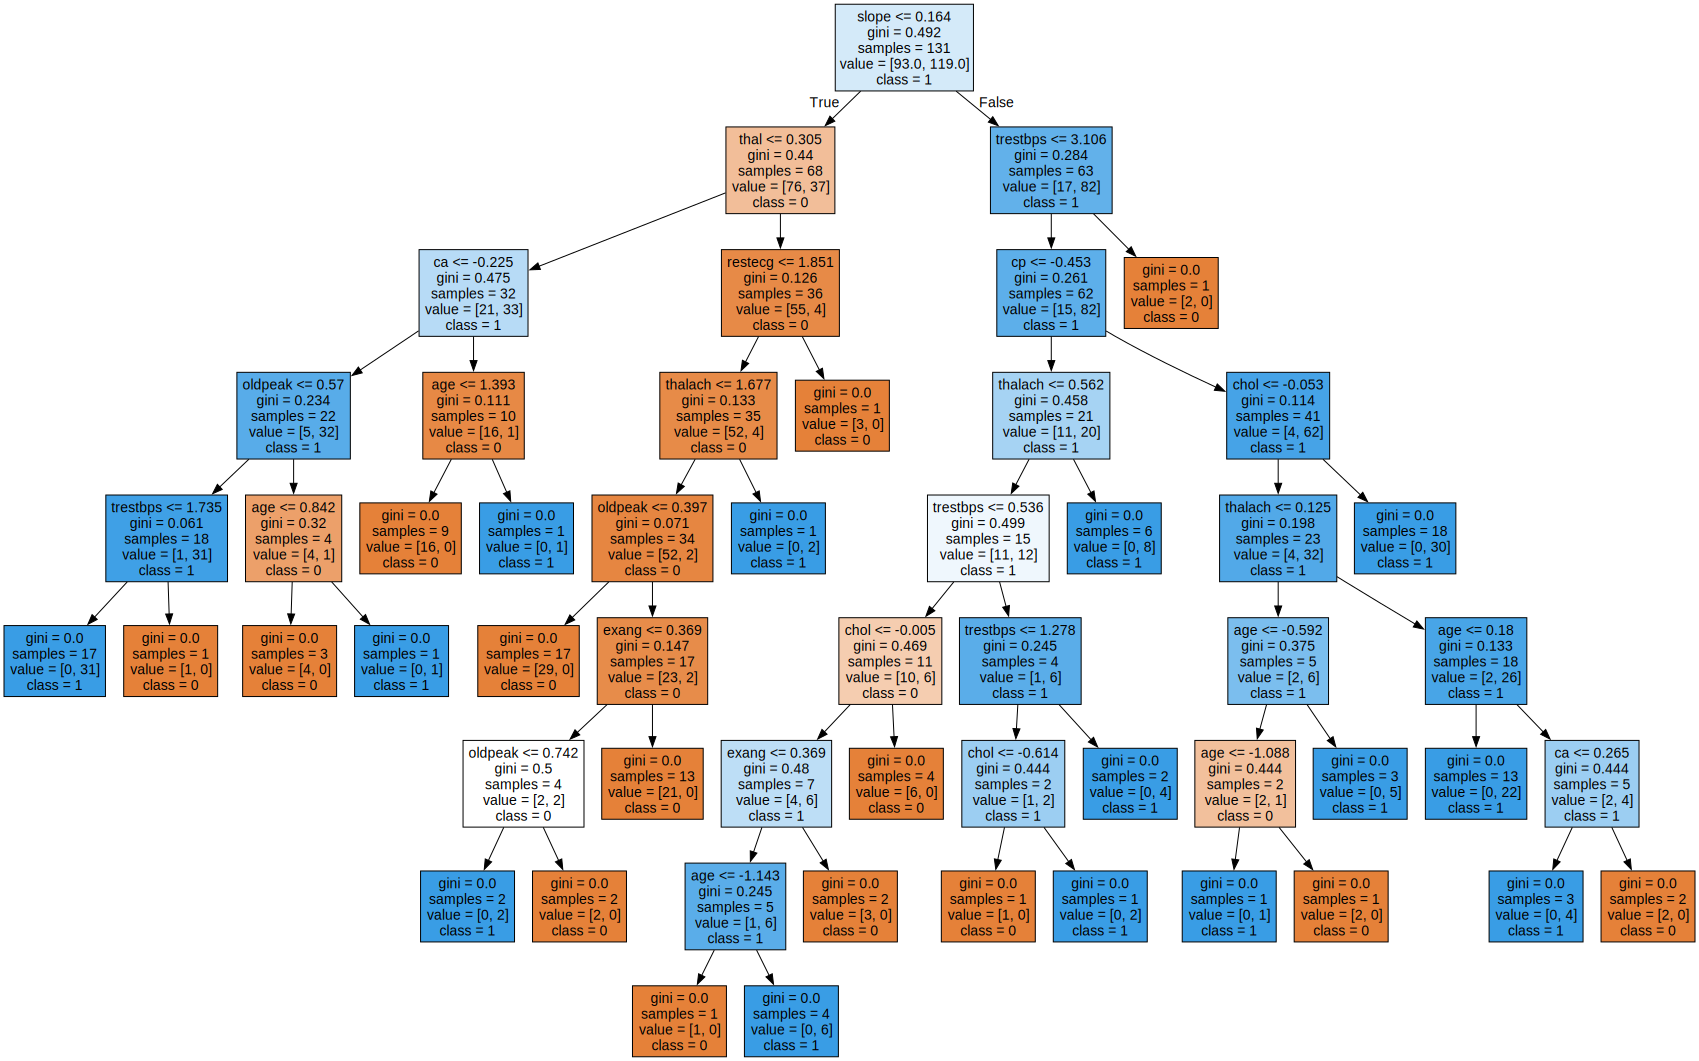

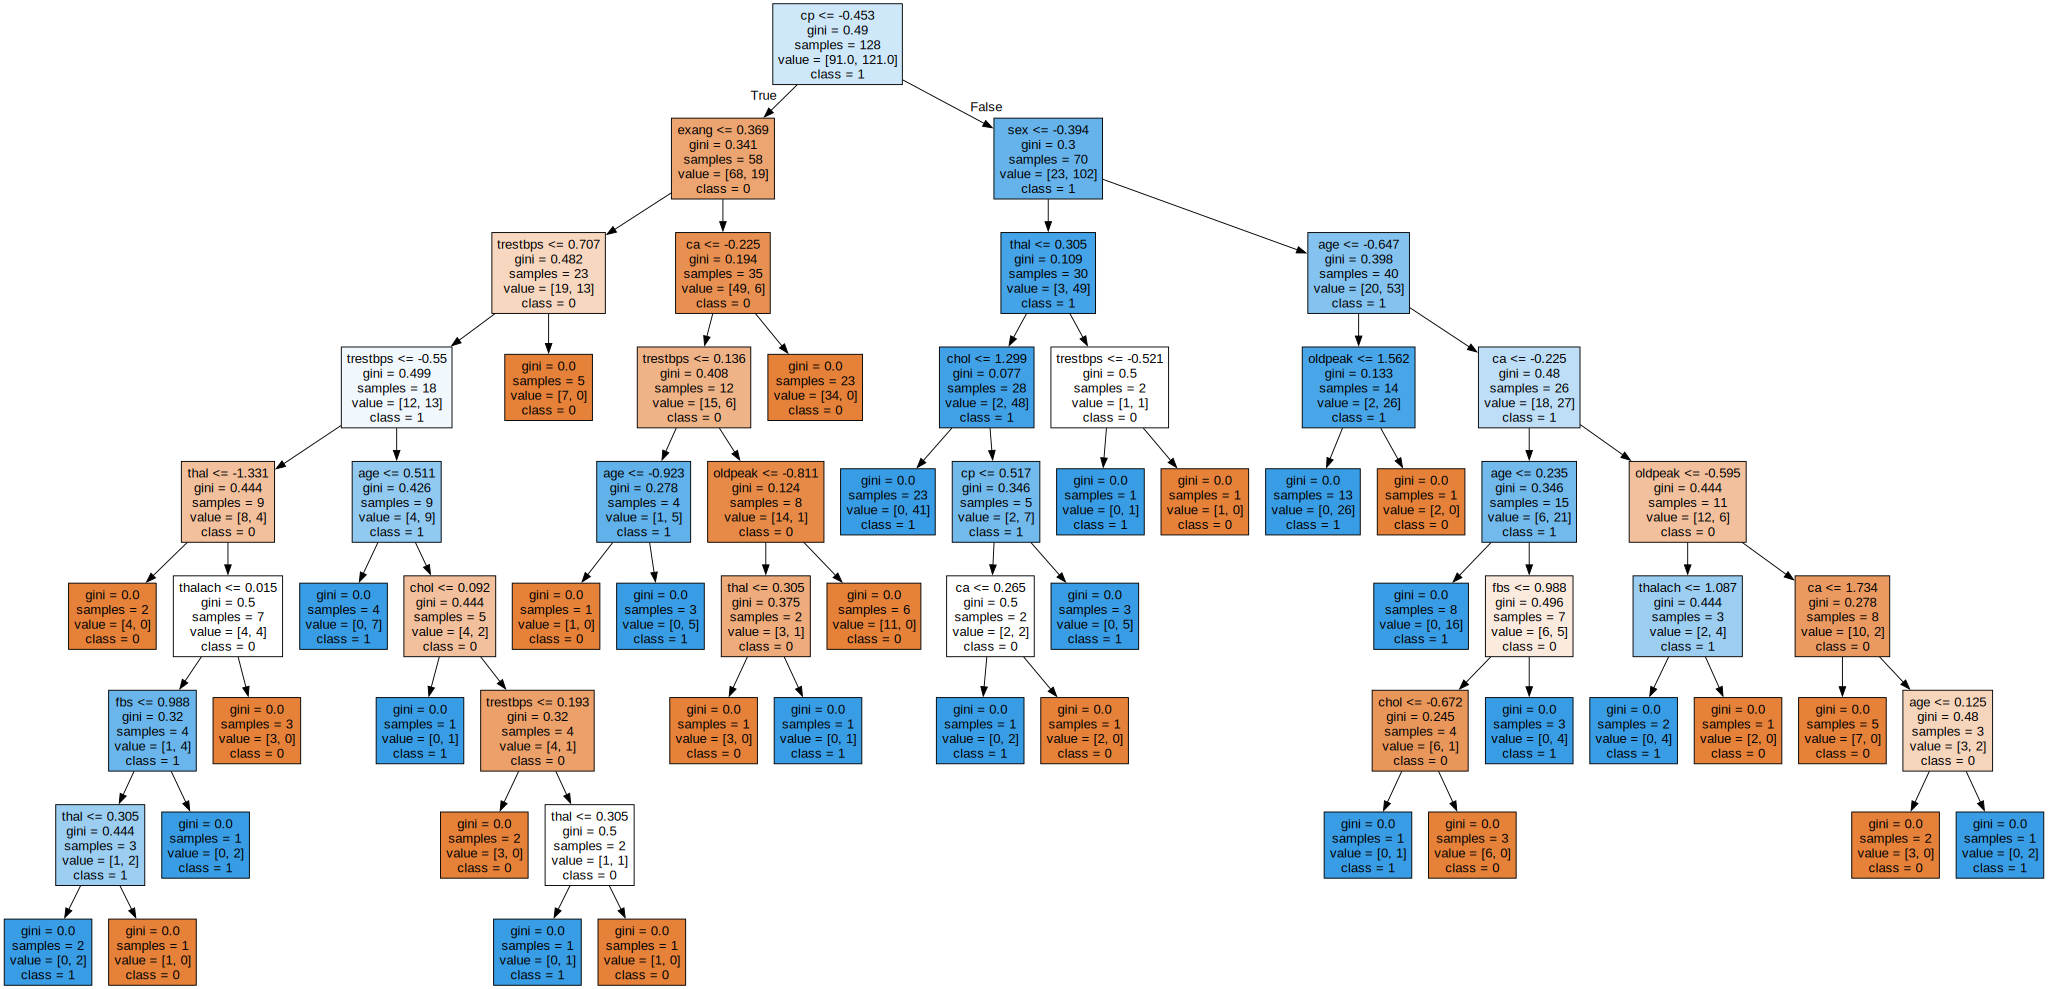

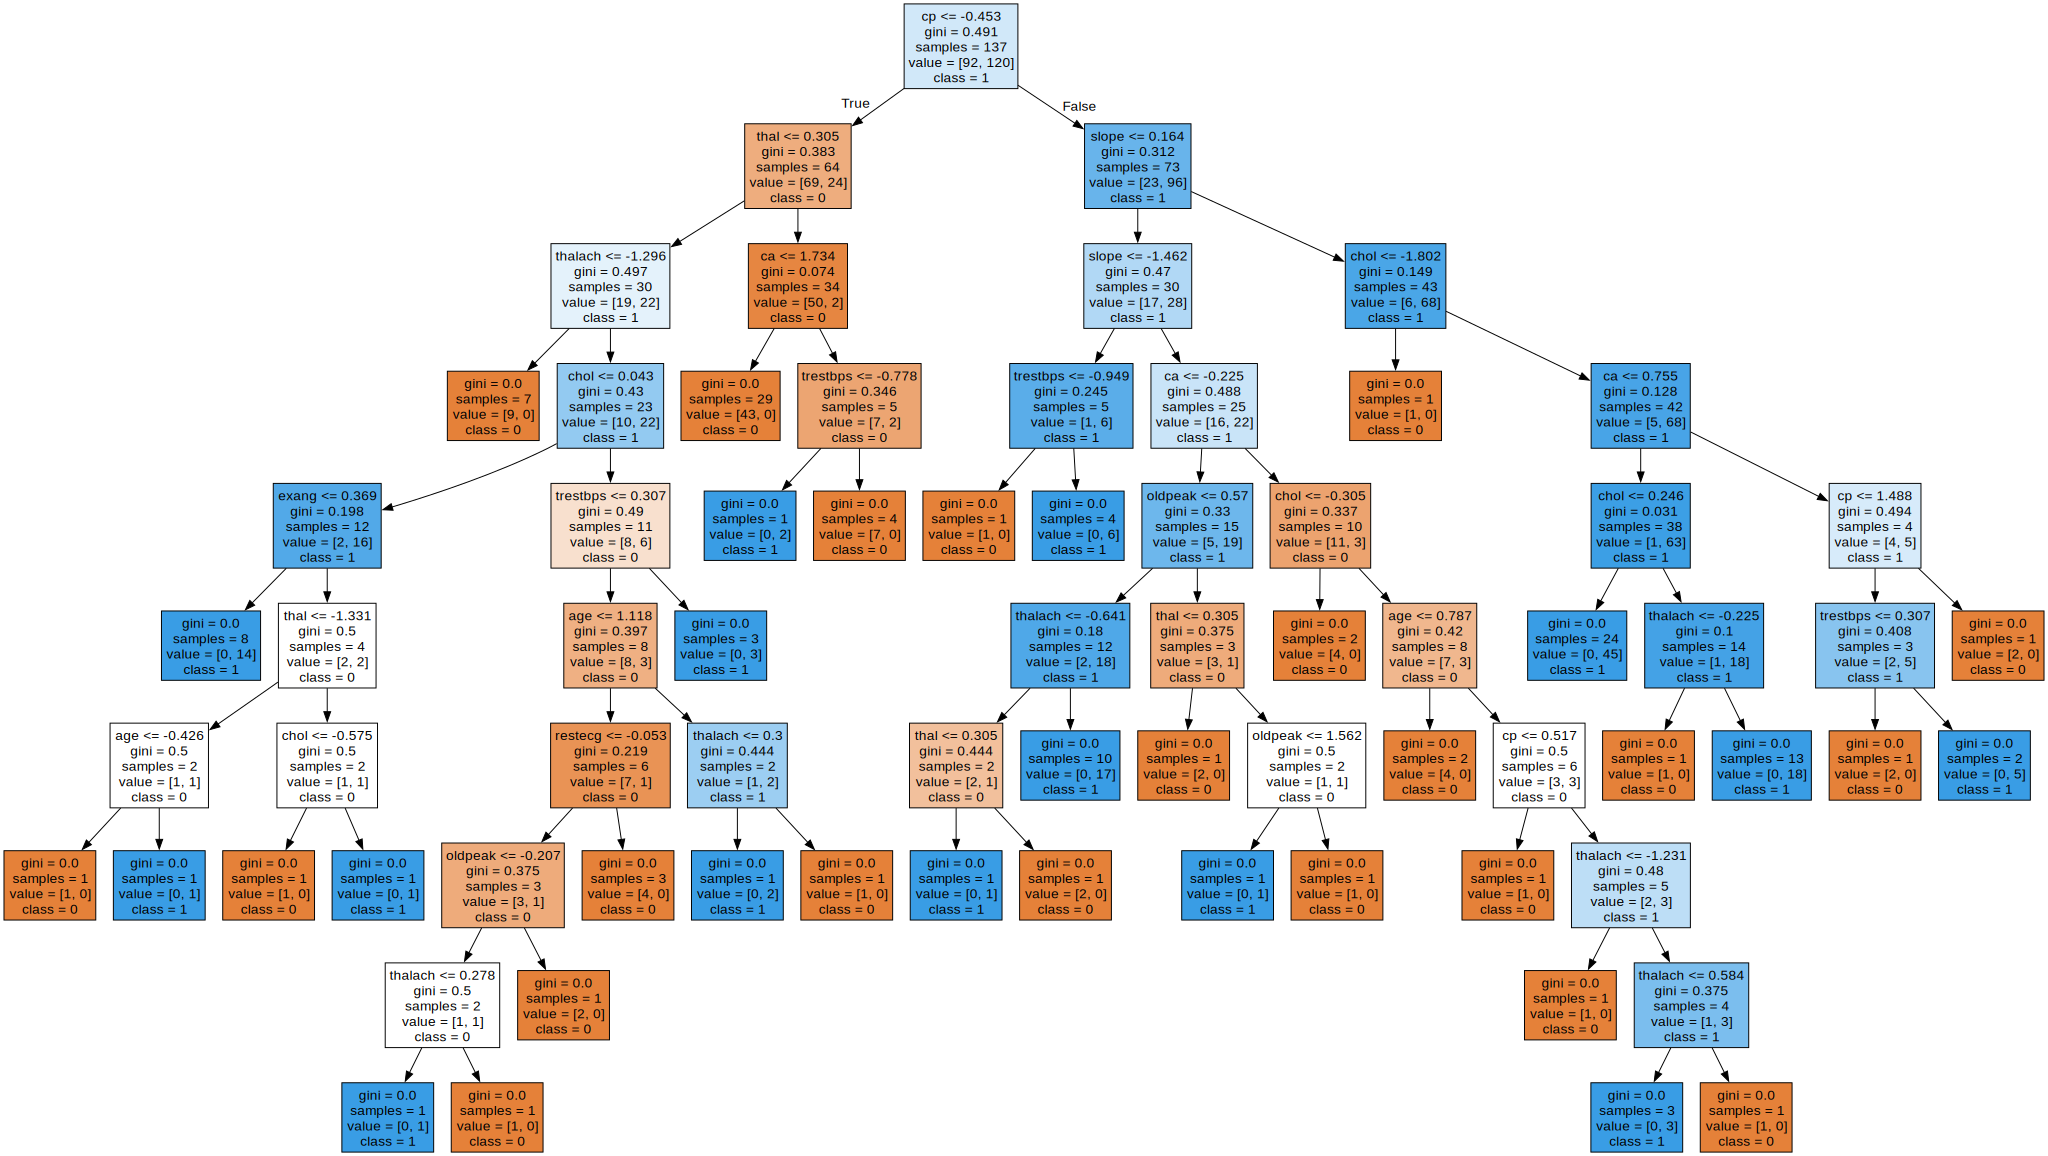

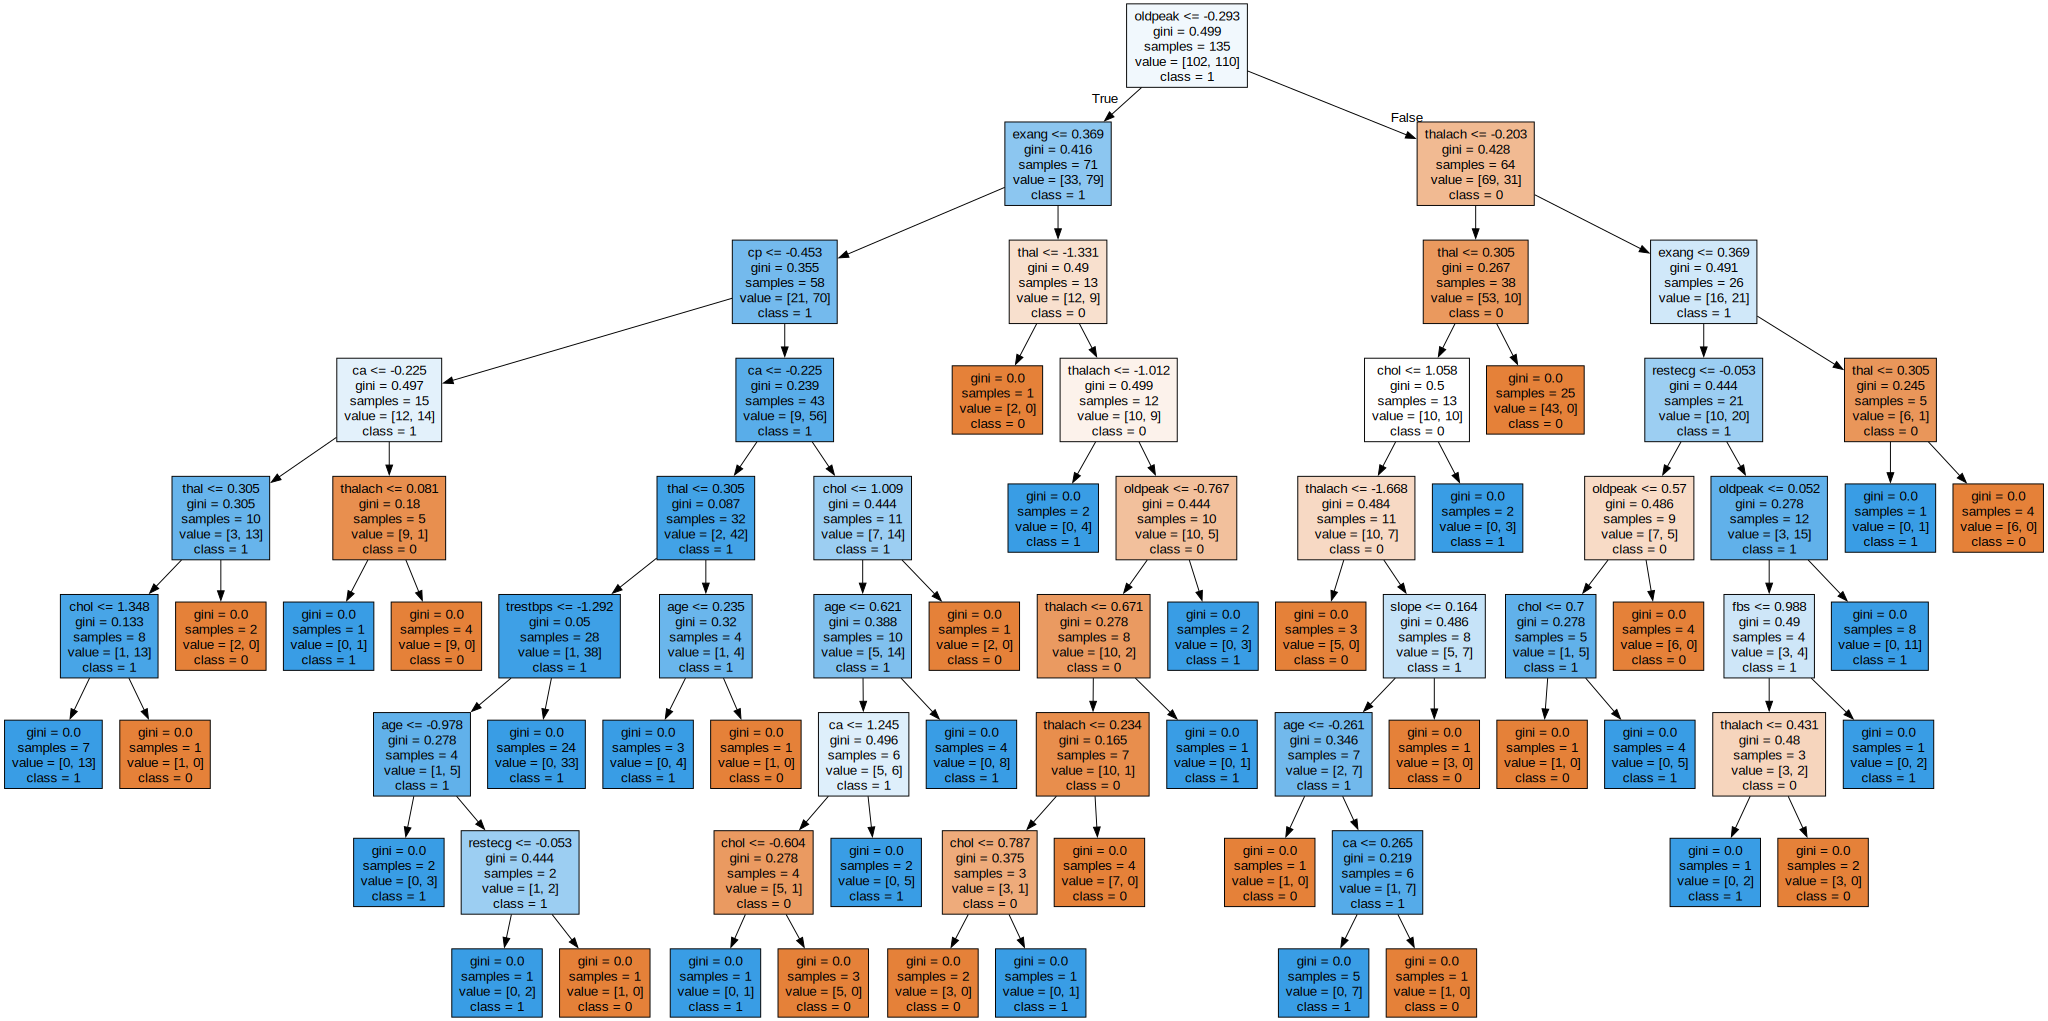

In [25]:
#iv. Visualize the model using the Graphviz package
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source
for i in range(0,rf_cv.best_params_['n_estimators']):
  graph=Source(tree.export_graphviz(rf_cv.best_estimator_[i],out_file=None,filled=True,feature_names=xtrain.columns,class_names=['0','1']))
  display(SVG(graph.pipe(format='svg')))

log_con: [[32  9]
 [ 8 42]] acc: 0.7362637362637363 dt_con: [[31 10]
 [14 36]] acc: 0.8351648351648352 dt_con: [[32  9]
 [ 6 44]]
classification report of logistic regression               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

classification report of decision tree               precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

classification report of random forest               precision    recall  f1-score   support

           0       0.84      0.78     

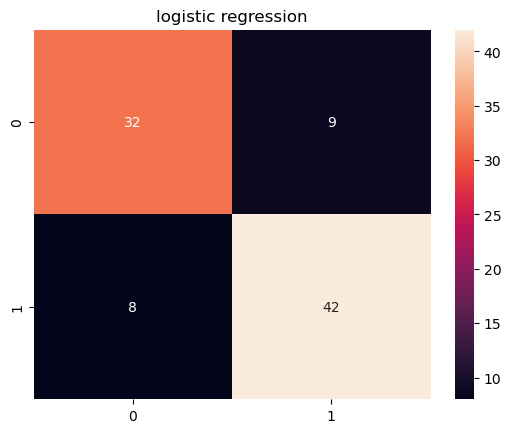

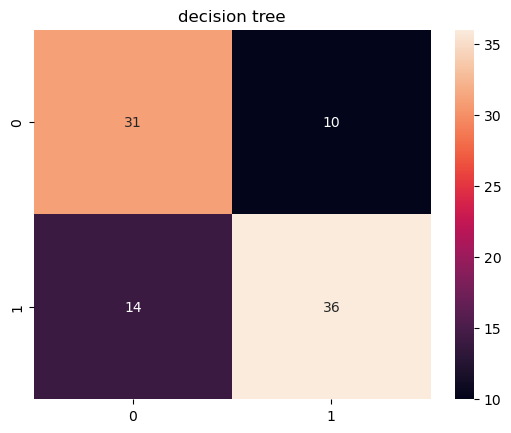

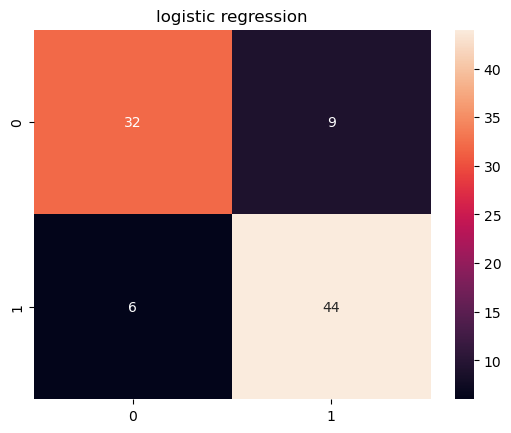

best model: Index(['rf'], dtype='object') best_score: 0.8351648351648352


In [26]:
#6. Select the best model
#a. Print the confusion matrix of all classifiers
print("log_con:",logr_con,"acc:",dt_acc,"dt_con:",dt_con,"acc:",rf_acc,"dt_con:",rf_con)
#b. Print the classification report of all classifiers
from sklearn.metrics import classification_report
print('classification report of logistic regression',classification_report(ytest,logr_pred))
print('classification report of decision tree',classification_report(ytest,dt_pred))
print('classification report of random forest',classification_report(ytest,rf_pred))
#c. Calculate Recall Precision and F1 score of all the models
from sklearn.metrics import precision_score,f1_score,recall_score
logr_pre=precision_score(ytest,logr_pred)
logr_f1=f1_score(ytest,logr_pred)
logr_recall=recall_score(ytest,logr_pred)
dt_pre=precision_score(ytest,dt_pred)
dt_f1=f1_score(ytest,dt_pred)
dt_recall=recall_score(ytest,dt_pred)
rf_pre=precision_score(ytest,rf_pred)
rf_f1=f1_score(ytest,rf_pred)
rf_recall=recall_score(ytest,rf_pred)
print("precision_log:",logr_pre,"f1score_log:",logr_f1,"recall_log:",logr_recall)
print("precision_dt:",dt_pre,"f1score_dt:",dt_f1,"recall_dt:",dt_recall)
print("precision_rf:",rf_pre,"f1score_rf:",rf_f1,"recall_rf:",rf_recall)
#d. Visualize confusion matrix using heatmaps
plt.figure()
sns.heatmap(data=logr_con,annot=True)
plt.title('logistic regression')
plt.show()
plt.figure()
sns.heatmap(data=dt_con,annot=True)
plt.title('decision tree')
plt.show()
plt.figure()
sns.heatmap(data=rf_con,annot=True)
plt.title('logistic regression')
plt.show()
#e. Select the best model based on the best accuracies
bestmodel=pd.Series([logr_acc,dt_acc,rf_acc],index=['log','dt','rf'])
print("best model:",bestmodel[bestmodel==bestmodel.max()].index,'best_score:',bestmodel.max())